#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=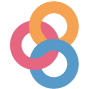)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu'est-ce qu'une API ?  

## Définition

Pour expliquer le principe d'une API, je vais reprendre le début de 
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
> 
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> * Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> * Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> * Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> * Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

L'utilisation accrue d'API dans le cadre de stratégies open-data est l'un
des piliers des 15 feuilles de route ministérielles
en matière d’ouverture, de circulation et de valorisation des données publiques.

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
> 
> * soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> * soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c'est-à-dire un 
compte utilisateur afin de pouvoir accéder aux données. 
Dans un premier temps, 
nous regarderons exclusivement les API ouvertes sans restriction d'accès.  
Certains exercices et exemples permettront néanmoins d'essayer des API
avec restrictions d'accès. 

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
> 
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API. 
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j'emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

* Le __point d’entrée__ d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
l'URL à utiliser pour obtenir des informations sur un produit particulier (l'identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
* Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation. 
* Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).

Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d'excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l'URL de 
requête pour faciliter le travail sur les données Insee. 

## Exemple avec l'API de la Banque Mondiale

Avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1. Le point d'entrée est l'URL <http://api.worldbank.org/v2>
2. Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
que celles telles que `incomeLevel=LMC` (*"Lower middle income"*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

Avec l'API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est *en apparence* joué.


In [ ]:
import requests
req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')
req

```
## <Response [200]>
```

Prenons par exemple les 1000 premiers caractères du résultat :


In [ ]:
print(req.content[:1000])

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?>\r\n<wb:countries page="1" pages="2" per_page="50" total="55" xmlns:wb="http://www.worldbank.org">\r\n  <wb:country id="AGO">\r\n    <wb:iso2Code>AO</wb:iso2Code>\r\n    <wb:name>Angola</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Luanda</wb:capitalCity>\r\n    <wb:longitude>13.242</wb:longitude>\r\n    <wb:latitude>-8.81155</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BEN">\r\n    <wb:iso2Code>BJ</wb:iso2Code>\r\n    <wb:name>Benin</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="'

Quand on regarde de plus près, on voit que les informations suivantes apparaissent : 
 
* Code du pays
* Nom du pays
* Région
* Classification en termes de revenus
* Les types de prêt pour ces pays
* La capitale
* Longitude
* Latitude

Le format XML est fortement balisé, ce qui n'est pas très pratique. 
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json


In [ ]:
import requests
import pandas as pd

req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')

A nouveau, les premiers caractères sont les suivants:


In [ ]:
print(req.content[:1000])

b'[{"page":1,"pages":2,"per_page":"50","total":55},[{"id":"AGO","iso2Code":"AO","name":"Angola","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Luanda","longitude":"13.242","latitude":"-8.81155"},{"id":"BEN","iso2Code":"BJ","name":"Benin","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Porto-Novo","longitude":"2.6323","latitude":"6.4779"},{"id":"BGD","iso2Code":"BD","name":"Bangladesh","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2'

Cela ressemble déjà plus à un dictionnaire `Python`[^1].

[^1]: Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il 
s'agit d'un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

Ici, il n'est même pas nécessaire en première approche 
d'utiliser le package `json`, l'information
étant déjà tabulée dans l'écho renvoyé (on a la même information pour tous les pays):


In [ ]:
wb = req.json()
wb = pd.json_normalize(wb[1])
wb.head(5)

```
##     id iso2Code  ... lendingType.iso2code lendingType.value
## 0  AGO       AO  ...                   XF              IBRD
## 1  BEN       BJ  ...                   XI               IDA
## 2  BGD       BD  ...                   XI               IDA
## 3  BLZ       BZ  ...                   XF              IBRD
## 4  BOL       BO  ...                   XF              IBRD
## 
## [5 rows x 18 columns]
```

Cependant, si on regarde la dimension de l'objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l'API nous apprendrait que c'est le nombre maximal de 
retour possible. Il faut donc faire attention à la documentation et 
ajouter un paramètre `page=2` pour rattraper les derniers échos: 


In [ ]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2])

```
##      id iso2Code  ... lendingType.iso2code lendingType.value
## 0   AGO       AO  ...                   XF              IBRD
## 1   BEN       BJ  ...                   XI               IDA
## 2   BGD       BD  ...                   XI               IDA
## 3   BLZ       BZ  ...                   XF              IBRD
## 4   BOL       BO  ...                   XF              IBRD
## 5   BTN       BT  ...                   XI               IDA
## 6   CIV       CI  ...                   XI               IDA
## 7   CMR       CM  ...                   XH             Blend
## 8   COG       CG  ...                   XH             Blend
## 9   COM       KM  ...                   XI               IDA
## 10  CPV       CV  ...                   XH             Blend
## 11  DJI       DJ  ...                   XI               IDA
## 12  DZA       DZ  ...                   XF              IBRD
## 13  EGY       EG  ...                   XF              IBRD
## 14  FSM       FM  ...                   XI               IDA
## 15  GHA       GH  ...                   XI               IDA
## 16  HND       HN  ...                   XI               IDA
## 17  HTI       HT  ...                   XI               IDA
## 18  IDN       ID  ...                   XF              IBRD
## 19  IND       IN  ...                   XF              IBRD
## 20  IRN       IR  ...                   XF              IBRD
## 21  KEN       KE  ...                   XH             Blend
## 22  KGZ       KG  ...                   XI               IDA
## 23  KHM       KH  ...                   XI               IDA
## 24  KIR       KI  ...                   XI               IDA
## 25  LAO       LA  ...                   XI               IDA
## 26  LKA       LK  ...                   XF              IBRD
## 27  LSO       LS  ...                   XI               IDA
## 28  MAR       MA  ...                   XF              IBRD
## 29  MMR       MM  ...                   XI               IDA
## 30  MNG       MN  ...                   XF              IBRD
## 31  MRT       MR  ...                   XI               IDA
## 32  NGA       NG  ...                   XH             Blend
## 33  NIC       NI  ...                   XI               IDA
## 34  NPL       NP  ...                   XI               IDA
## 35  PAK       PK  ...                   XH             Blend
## 36  PHL       PH  ...                   XF              IBRD
## 37  PNG       PG  ...                   XH             Blend
## 38  PSE       PS  ...                   XX    Not classified
## 39  SEN       SN  ...                   XI               IDA
## 40  SLB       SB  ...                   XI               IDA
## 41  SLV       SV  ...                   XF              IBRD
## 42  STP       ST  ...                   XI               IDA
## 43  SWZ       SZ  ...                   XF              IBRD
## 44  TJK       TJ  ...                   XI               IDA
## 45  TLS       TL  ...                   XH             Blend
## 46  TUN       TN  ...                   XF              IBRD
## 47  TZA       TZ  ...                   XI               IDA
## 48  UKR       UA  ...                   XF              IBRD
## 49  UZB       UZ  ...                   XH             Blend
## 0   VNM       VN  ...                   XF              IBRD
## 1   VUT       VU  ...                   XI               IDA
## 2   WSM       WS  ...                   XI               IDA
## 3   ZMB       ZM  ...                   XI               IDA
## 4   ZWE       ZW  ...                   XH             Blend
## 
## [55 rows x 18 columns]
```

Si on regarde l'information présente dans le DataFrame, on voit qu'elle se
présente sous forme `lendingType.value`. C'est parce que `pandas` a 
concaténé les différents niveaux de notre dictionnaire. Si on désire
s'en assurer, on peut regarder sur un exemple:


In [ ]:
req.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

```
## True
```

## Un catalogue incomplet d'API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-unes très connues : 

- Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
- Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
- Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
- Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci dont les 
données ne sont pas toujours les plus intéressantes. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition 
leurs données sous forme d'API

- [API gouv](https://api.gouv.fr/): beaucoup d'API officielles de l'Etat français 
et accès à de la documentation
- Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589

# L'API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages...) réalisées durant les 5 dernières années.

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>.

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre
carré d'un quartier ou de comparer des régions entre elles. 
L'API DVF permet d'aller plus loin afin de récupérer les résultats dans 
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>.

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)


**Exercice 1 : Exploiter l'API DVF**

:one: 
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées. 


In [ ]:
# Question 1
import json
import requests
import pandas as pd
data_immo = requests.get("http://api.cquest.org/dvf?code_commune=29168").json()
print(data_immo.keys())

In [ ]:
print(data_immo["nb_resultats"])

In [ ]:
ventes = pd.json_normalize(data_immo["resultats"])
ventes.head()

:two: 
N'afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:


In [ ]:
# Question 2
maisons = requests.get("http://api.cquest.org/dvf?code_commune=29168&type_local=Maison").json()
pd.json_normalize(maisons["resultats"])

```
##     code_service_ch reference_document  ... geom.type        geom.coordinates
## 0              None               None  ...     Point  [-4.705626, 48.042047]
## 1              None               None  ...     Point  [-4.709215, 48.038356]
## 2              None               None  ...     Point  [-4.709152, 48.038782]
## 3              None               None  ...     Point  [-4.708496, 48.038467]
## 4              None               None  ...     Point  [-4.708192, 48.038626]
## ..              ...                ...  ...       ...                     ...
## 129            None               None  ...     Point   [-4.70207, 48.039692]
## 130            None               None  ...     Point   [-4.699823, 48.03942]
## 131            None               None  ...     Point  [-4.700808, 48.038956]
## 132            None               None  ...     Point  [-4.700004, 48.037184]
## 133            None               None  ...     Point  [-4.712316, 48.037312]
## 
## [134 rows x 47 columns]
```

:three: Utiliser l'[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff


In [ ]:
# Question 3
#!pip install geopandas
import geopandas as gpd
plgf = gpd.read_file("https://geo.api.gouv.fr/communes/29168?fields=nom,code,codesPostaux,codeDepartement,codeRegion,population&format=geojson&geometry=contour")
plgf.head()

```
##        nom  ...                                           geometry
## 0  Plogoff  ...  MULTIPOLYGON (((-4.75663 48.04070, -4.75658 48...
## 
## [1 rows x 6 columns]
```

:four:
Représenter l'histogramme des prix de vente


In [ ]:
# Question 4
p = ventes["valeur_fonciere"].plot(kind = "hist")
p

N'hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five: 
On va faire une carte des ventes en affichant le prix de l'achat.

Supposons que le DataFrame des ventes s'appelle `ventes`. Il faut d'abord le
convertir
en objet `geopandas`. 


In [ ]:
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes

```
##     code_service_ch reference_document  ... geom                   geometry
## 0              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 1              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 2              None               None  ...  NaN  POINT (-4.70949 48.04230)
## 3              None               None  ...  NaN  POINT (-4.70696 48.04313)
## 4              None               None  ...  NaN  POINT (-4.70555 48.04223)
## ..              ...                ...  ...  ...                        ...
## 434            None               None  ...  NaN  POINT (-4.71243 48.03708)
## 435            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 436            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 437            None               None  ...  NaN  POINT (-4.71186 48.03727)
## 438            None               None  ...  NaN  POINT (-4.71601 48.03396)
## 
## [431 rows x 49 columns]
```

Avant de faire une carte, on va convertir 
les limites de la commune de Plogoff en geoJSON pour faciliter 
sa représentation avec `folium`
([voir la doc `geopandas` à ce propos](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):


In [ ]:
geo_j = plgf.to_json()

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l'exécuter). 


In [ ]:
import folium
import numpy as np

ventes['map_color'] = pd.qcut(ventes['valeur_fonciere'], [0,0.8,1], labels = ['lightblue','red'])
ventes['icon'] = np.where(ventes['type_local']== 'Maison', "home", "")
ventes['num_voie_clean'] = np.where(ventes['numero_voie'].isnull(), "", ventes['numero_voie'])
ventes['text'] = ventes.apply(lambda s: "Adresse: {num} {voie} <br>Vente en {annee} <br>Prix {prix:.0f} €".format(
                        num = s['num_voie_clean'],
                        voie = s["voie"],
                        annee = s['date_mutation'].split("-")[0],
                        prix = s["valeur_fonciere"]),
             axis=1)
             
center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']],
                  popup=ventes.iloc[i]['text'],
                  icon=folium.Icon(color=ventes.iloc[i]['map_color'], icon=ventes.iloc[i]['icon'])).add_to(m)

In [ ]:
m.fit_bounds([sw, ne])

In [ ]:
# Afficher la carte
m

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_1d8eab4179104c33a0f7c7f8f65554d9%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_1d8eab4179104c33a0f7c7f8f65554d9%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_1d8eab4179104c33a0f7c7f8f65554d9%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_1d8eab4179104c33a0f7c7f8f65554d9%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B48.03477472157772%2C%20-4.671743032482598%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20preferCanvas%3A%20false%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20tile_layer_30b9363ec4664b6d9c4dbb05704f6e00%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22https%3A//stamen-tiles-%7Bs%7D.a.ssl.fastly.net/toner/%7Bz%7D/%7Bx%7D/%7By%7D.png%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22attribution%22%3A%20%22Map%20tiles%20by%20%5Cu003ca%20href%3D%5C%22http%3A//stamen.com%5C%22%5Cu003eStamen%20Design%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//creativecommons.org/licenses/by/3.0%5C%22%5Cu003eCC%20BY%203.0%5Cu003c/a%5Cu003e.%20Data%20by%20%5Cu0026copy%3B%20%5Cu003ca%20href%3D%5C%22http%3A//openstreetmap.org%5C%22%5Cu003eOpenStreetMap%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//www.openstreetmap.org/copyright%5C%22%5Cu003eODbL%5Cu003c/a%5Cu003e.%22%2C%20%22detectRetina%22%3A%20false%2C%20%22maxNativeZoom%22%3A%2018%2C%20%22maxZoom%22%3A%2018%2C%20%22minZoom%22%3A%200%2C%20%22noWrap%22%3A%20false%2C%20%22opacity%22%3A%201%2C%20%22subdomains%22%3A%20%22abc%22%2C%20%22tms%22%3A%20false%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_11b23d3898714bd58052e5ec1a45d838%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_66890c0ee95b4891b7392aa9a6c1a502%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_11b23d3898714bd58052e5ec1a45d838.setIcon%28icon_66890c0ee95b4891b7392aa9a6c1a502%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20bd116793e94086bbec7ca4b9f355d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a2367610944a43b4b7d347cdcb2c3998%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a2367610944a43b4b7d347cdcb2c3998%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20176000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20bd116793e94086bbec7ca4b9f355d5.setContent%28html_a2367610944a43b4b7d347cdcb2c3998%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_11b23d3898714bd58052e5ec1a45d838.bindPopup%28popup_20bd116793e94086bbec7ca4b9f355d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5fbaf052b58347848ec0fe1ea99a81af%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3009ccc50c324528afd072290e5724b4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5fbaf052b58347848ec0fe1ea99a81af.setIcon%28icon_3009ccc50c324528afd072290e5724b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_309aed21df664a6db86adf13c2ff6108%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9118f2dcdfb340008895fa541620622a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9118f2dcdfb340008895fa541620622a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_309aed21df664a6db86adf13c2ff6108.setContent%28html_9118f2dcdfb340008895fa541620622a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5fbaf052b58347848ec0fe1ea99a81af.bindPopup%28popup_309aed21df664a6db86adf13c2ff6108%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_874607f4f00e40c0b565dfc6c3adfb70%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042296%2C%20-4.709488%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0ffd75bcbc054799b95b01d2d9646e57%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_874607f4f00e40c0b565dfc6c3adfb70.setIcon%28icon_0ffd75bcbc054799b95b01d2d9646e57%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4556017e82a646e6904b84a9e9c219bf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_53be8d9f19be4d92b025dcb43b189d98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_53be8d9f19be4d92b025dcb43b189d98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4556017e82a646e6904b84a9e9c219bf.setContent%28html_53be8d9f19be4d92b025dcb43b189d98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_874607f4f00e40c0b565dfc6c3adfb70.bindPopup%28popup_4556017e82a646e6904b84a9e9c219bf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_32a3aa0226db4efda968fe26737595f7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.043125%2C%20-4.706963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b1f6541cecf407982a4fc58870cc4ab%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_32a3aa0226db4efda968fe26737595f7.setIcon%28icon_8b1f6541cecf407982a4fc58870cc4ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5e13d78bac224dc09a2c30d9ae8db00a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dbbca4d9b8d34f3a95c00183211511b9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dbbca4d9b8d34f3a95c00183211511b9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5e13d78bac224dc09a2c30d9ae8db00a.setContent%28html_dbbca4d9b8d34f3a95c00183211511b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_32a3aa0226db4efda968fe26737595f7.bindPopup%28popup_5e13d78bac224dc09a2c30d9ae8db00a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a40b1d2dc3b84c698173900e85d2d790%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042232%2C%20-4.705553%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7adb19b42c9846eb8e7a5f496da71c05%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a40b1d2dc3b84c698173900e85d2d790.setIcon%28icon_7adb19b42c9846eb8e7a5f496da71c05%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6990894a6df43819ace04f2f0f31845%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3d4c486195934db49568a055489d08e1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3d4c486195934db49568a055489d08e1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6990894a6df43819ace04f2f0f31845.setContent%28html_3d4c486195934db49568a055489d08e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a40b1d2dc3b84c698173900e85d2d790.bindPopup%28popup_d6990894a6df43819ace04f2f0f31845%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f292a762132b44af91bbb2996f465f0b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042047%2C%20-4.705626%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d98ef18c6926480a9b5e919985c4fa15%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f292a762132b44af91bbb2996f465f0b.setIcon%28icon_d98ef18c6926480a9b5e919985c4fa15%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8b54b5494a2e42169ef0102979ac49c9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_58a233825f7f427d9f613f712cda0e21%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_58a233825f7f427d9f613f712cda0e21%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8b54b5494a2e42169ef0102979ac49c9.setContent%28html_58a233825f7f427d9f613f712cda0e21%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f292a762132b44af91bbb2996f465f0b.bindPopup%28popup_8b54b5494a2e42169ef0102979ac49c9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_09a6cba3b8a544fe995ed39a2d712bd3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038236%2C%20-4.709329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5dfb3239681445cb94b0fa8f6392eed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_09a6cba3b8a544fe995ed39a2d712bd3.setIcon%28icon_b5dfb3239681445cb94b0fa8f6392eed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eb1fa16e9ea94db1bb760ac2849e58aa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_146885f74c22463f8c715e850e8ac40f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_146885f74c22463f8c715e850e8ac40f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eb1fa16e9ea94db1bb760ac2849e58aa.setContent%28html_146885f74c22463f8c715e850e8ac40f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_09a6cba3b8a544fe995ed39a2d712bd3.bindPopup%28popup_eb1fa16e9ea94db1bb760ac2849e58aa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7e0206ecc534430abe009dde7c73bedf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038356%2C%20-4.709215%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cf4817fd5a3e4240bf02bd67498970da%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7e0206ecc534430abe009dde7c73bedf.setIcon%28icon_cf4817fd5a3e4240bf02bd67498970da%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0a822e9c29994d659c41ec2c8a49afa7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_85b668c4f3574669bda4411a3bfd1108%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_85b668c4f3574669bda4411a3bfd1108%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20220%20KREIZ%20AN%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0a822e9c29994d659c41ec2c8a49afa7.setContent%28html_85b668c4f3574669bda4411a3bfd1108%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7e0206ecc534430abe009dde7c73bedf.bindPopup%28popup_0a822e9c29994d659c41ec2c8a49afa7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_23c575fb91374fdb8ea40bd0e5526f3b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039437%2C%20-4.710305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1b4f4cdf97045ad9082a2c64cc8b306%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_23c575fb91374fdb8ea40bd0e5526f3b.setIcon%28icon_c1b4f4cdf97045ad9082a2c64cc8b306%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d89c1a0939674ba4a0298d62b085a69e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_58b183155543490aaa155125bc656226%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_58b183155543490aaa155125bc656226%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d89c1a0939674ba4a0298d62b085a69e.setContent%28html_58b183155543490aaa155125bc656226%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_23c575fb91374fdb8ea40bd0e5526f3b.bindPopup%28popup_d89c1a0939674ba4a0298d62b085a69e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63db877286e94fd198c535e1f3f4799f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038782%2C%20-4.709152%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4b5d959925e44c0980179422eb4aa7b6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63db877286e94fd198c535e1f3f4799f.setIcon%28icon_4b5d959925e44c0980179422eb4aa7b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b8307d393dc343b29d8a8597dbe767fb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f3da7a618f2b43458c7ac7e3392dc1a7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f3da7a618f2b43458c7ac7e3392dc1a7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20215%20AR%20VEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b8307d393dc343b29d8a8597dbe767fb.setContent%28html_f3da7a618f2b43458c7ac7e3392dc1a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63db877286e94fd198c535e1f3f4799f.bindPopup%28popup_b8307d393dc343b29d8a8597dbe767fb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b83e16b477a6407e87804e0b9fbdb2ae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038442%2C%20-4.709021%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0cc2d392bf544b88c15c1577d675328%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b83e16b477a6407e87804e0b9fbdb2ae.setIcon%28icon_f0cc2d392bf544b88c15c1577d675328%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93ca80a2ba6148d3b9a4bcd6cb1c5100%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d384624463ea4fae85bf2acb9c3639b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d384624463ea4fae85bf2acb9c3639b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93ca80a2ba6148d3b9a4bcd6cb1c5100.setContent%28html_d384624463ea4fae85bf2acb9c3639b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b83e16b477a6407e87804e0b9fbdb2ae.bindPopup%28popup_93ca80a2ba6148d3b9a4bcd6cb1c5100%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_595c9b35bf3d475ebc977634ee46cd20%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038467%2C%20-4.708496%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_943e2c25794e4599b6832ba5341f6100%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_595c9b35bf3d475ebc977634ee46cd20.setIcon%28icon_943e2c25794e4599b6832ba5341f6100%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_99808f7e79d149f38d40377e587d6c94%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ffe979deee834641ad79876ec56e89a2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ffe979deee834641ad79876ec56e89a2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20208%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_99808f7e79d149f38d40377e587d6c94.setContent%28html_ffe979deee834641ad79876ec56e89a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_595c9b35bf3d475ebc977634ee46cd20.bindPopup%28popup_99808f7e79d149f38d40377e587d6c94%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f74eb70766340b4af2636c2b7c33924%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038626%2C%20-4.708192%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4181ae2f3d7b4de0b2273faff57793cd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f74eb70766340b4af2636c2b7c33924.setIcon%28icon_4181ae2f3d7b4de0b2273faff57793cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc79d9b59c9d4d22ba6b5f081ef8eac3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b889c92fcb3a4831a8821b2b1195baff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b889c92fcb3a4831a8821b2b1195baff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20206%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc79d9b59c9d4d22ba6b5f081ef8eac3.setContent%28html_b889c92fcb3a4831a8821b2b1195baff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f74eb70766340b4af2636c2b7c33924.bindPopup%28popup_dc79d9b59c9d4d22ba6b5f081ef8eac3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d9029b9573ee4811a83914e2725af5e0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03872%2C%20-4.707889%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_972b9b19c045432682bccbbf7fdb3ef8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d9029b9573ee4811a83914e2725af5e0.setIcon%28icon_972b9b19c045432682bccbbf7fdb3ef8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a948331fc0d34e43b4b14463b45e7817%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3111f561414c46a38f88ab200d59d2e1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3111f561414c46a38f88ab200d59d2e1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a948331fc0d34e43b4b14463b45e7817.setContent%28html_3111f561414c46a38f88ab200d59d2e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d9029b9573ee4811a83914e2725af5e0.bindPopup%28popup_a948331fc0d34e43b4b14463b45e7817%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2ad6fe12e0e740c5ac0ad461691411b6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039763%2C%20-4.706615%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a4c15739292043ba8b792fe54dfa7aee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2ad6fe12e0e740c5ac0ad461691411b6.setIcon%28icon_a4c15739292043ba8b792fe54dfa7aee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e41eb3ebf6cd4c2fa9e8a8557bad4a44%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3000d48bc0f3417fa0b5ff7ba595ad80%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3000d48bc0f3417fa0b5ff7ba595ad80%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2010000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e41eb3ebf6cd4c2fa9e8a8557bad4a44.setContent%28html_3000d48bc0f3417fa0b5ff7ba595ad80%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2ad6fe12e0e740c5ac0ad461691411b6.bindPopup%28popup_e41eb3ebf6cd4c2fa9e8a8557bad4a44%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cd9abc3756394c1ebd062db6fcd5cede%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039617%2C%20-4.706066%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_39ffbbbb091446fb86434d09fc3b07d6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cd9abc3756394c1ebd062db6fcd5cede.setIcon%28icon_39ffbbbb091446fb86434d09fc3b07d6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9e06fc15eeb4445e80a80f74b6d58e70%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5cbe527e396f46b29e675ebde4b415ac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5cbe527e396f46b29e675ebde4b415ac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20198%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9e06fc15eeb4445e80a80f74b6d58e70.setContent%28html_5cbe527e396f46b29e675ebde4b415ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cd9abc3756394c1ebd062db6fcd5cede.bindPopup%28popup_9e06fc15eeb4445e80a80f74b6d58e70%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cb732cb8850b4d39ab970142e429fa28%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1d341ca0d4724f358869aec91296ee90%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cb732cb8850b4d39ab970142e429fa28.setIcon%28icon_1d341ca0d4724f358869aec91296ee90%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43018b2d18f742b788f623a95f7ac134%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b8ad5691ccbc4255922056884ff51bee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b8ad5691ccbc4255922056884ff51bee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43018b2d18f742b788f623a95f7ac134.setContent%28html_b8ad5691ccbc4255922056884ff51bee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cb732cb8850b4d39ab970142e429fa28.bindPopup%28popup_43018b2d18f742b788f623a95f7ac134%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a8d28900b4e848f4a5b8f7a03d3e204f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2651eeca2cd8403c93dd81f5265262e4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a8d28900b4e848f4a5b8f7a03d3e204f.setIcon%28icon_2651eeca2cd8403c93dd81f5265262e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_672e7dd9ad694c038c6b4e156971c3c9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_81dc09fd43d541c9a4b279ddb28b5088%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_81dc09fd43d541c9a4b279ddb28b5088%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_672e7dd9ad694c038c6b4e156971c3c9.setContent%28html_81dc09fd43d541c9a4b279ddb28b5088%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a8d28900b4e848f4a5b8f7a03d3e204f.bindPopup%28popup_672e7dd9ad694c038c6b4e156971c3c9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_76d22e561cfc44a3b616bb6f580568dc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039561%2C%20-4.705858%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cdebd239bee840acb792b6d18c7cae12%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_76d22e561cfc44a3b616bb6f580568dc.setIcon%28icon_cdebd239bee840acb792b6d18c7cae12%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1885e618a3d143b294cd158a413f6d1f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8582d7497df44eb19647ab2b4c1a22bc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8582d7497df44eb19647ab2b4c1a22bc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20197%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1885e618a3d143b294cd158a413f6d1f.setContent%28html_8582d7497df44eb19647ab2b4c1a22bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_76d22e561cfc44a3b616bb6f580568dc.bindPopup%28popup_1885e618a3d143b294cd158a413f6d1f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ec690c6264648949c3fb03c1f970ccd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039599%2C%20-4.70426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_76919ceb9b394909bb5c73f35bdb5a79%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ec690c6264648949c3fb03c1f970ccd.setIcon%28icon_76919ceb9b394909bb5c73f35bdb5a79%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ae83c37d9aca4e71a16a732d2c29e433%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4c0ca97ce7f649ba8061db0e67c48651%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4c0ca97ce7f649ba8061db0e67c48651%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20236%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2027500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ae83c37d9aca4e71a16a732d2c29e433.setContent%28html_4c0ca97ce7f649ba8061db0e67c48651%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ec690c6264648949c3fb03c1f970ccd.bindPopup%28popup_ae83c37d9aca4e71a16a732d2c29e433%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e36e39c665704200946925bdb80acf8c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039585%2C%20-4.704422%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8bb26e9a3a9846f6b98f5500fff2939a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e36e39c665704200946925bdb80acf8c.setIcon%28icon_8bb26e9a3a9846f6b98f5500fff2939a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e44f87b793774708b864e852ae818af3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_91aeae2bb47c44d8b5d68347056d7845%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_91aeae2bb47c44d8b5d68347056d7845%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20235%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e44f87b793774708b864e852ae818af3.setContent%28html_91aeae2bb47c44d8b5d68347056d7845%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e36e39c665704200946925bdb80acf8c.bindPopup%28popup_e44f87b793774708b864e852ae818af3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63736092ef72467d96cb0a416732408e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039474%2C%20-4.704727%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c8d96e9afc624cb6813e43bbc923e20c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63736092ef72467d96cb0a416732408e.setIcon%28icon_c8d96e9afc624cb6813e43bbc923e20c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_759de81966d3455b92eedcdbc85f895a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4bc06ffa44dd46f6bf04b651b6ceb64b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4bc06ffa44dd46f6bf04b651b6ceb64b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20234%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_759de81966d3455b92eedcdbc85f895a.setContent%28html_4bc06ffa44dd46f6bf04b651b6ceb64b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63736092ef72467d96cb0a416732408e.bindPopup%28popup_759de81966d3455b92eedcdbc85f895a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6628c314f39f4ef9a913546492593140%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036863%2C%20-4.709276%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5201ce4c3c9f4716b726d3062f2718f4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6628c314f39f4ef9a913546492593140.setIcon%28icon_5201ce4c3c9f4716b726d3062f2718f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b402bcde7f94c6aaad303aaa3d66ca5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_49bf78f599bc4a499886eeddc451d795%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_49bf78f599bc4a499886eeddc451d795%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b402bcde7f94c6aaad303aaa3d66ca5.setContent%28html_49bf78f599bc4a499886eeddc451d795%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6628c314f39f4ef9a913546492593140.bindPopup%28popup_2b402bcde7f94c6aaad303aaa3d66ca5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b0ab5aec43447e486f2fef7ba2ae388%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036781%2C%20-4.709462%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a7f756ca9b7c4d1b8596386d3899dafa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b0ab5aec43447e486f2fef7ba2ae388.setIcon%28icon_a7f756ca9b7c4d1b8596386d3899dafa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5828954e0a7343dd9b50f5dd55255672%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f0058184e204ca5b5876b9f78b4949c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f0058184e204ca5b5876b9f78b4949c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5828954e0a7343dd9b50f5dd55255672.setContent%28html_9f0058184e204ca5b5876b9f78b4949c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b0ab5aec43447e486f2fef7ba2ae388.bindPopup%28popup_5828954e0a7343dd9b50f5dd55255672%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5564027980cf4782815b4a23e6364fc3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036899%2C%20-4.709473%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ea343beeade4807971910dab0640b47%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5564027980cf4782815b4a23e6364fc3.setIcon%28icon_4ea343beeade4807971910dab0640b47%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_47f5960ddff049239807a97304d90e28%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_173c3cd354bd4f1a9e215bdbd9c86a39%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_173c3cd354bd4f1a9e215bdbd9c86a39%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20278%20DU%20SOLDAT%20DUVAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_47f5960ddff049239807a97304d90e28.setContent%28html_173c3cd354bd4f1a9e215bdbd9c86a39%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5564027980cf4782815b4a23e6364fc3.bindPopup%28popup_47f5960ddff049239807a97304d90e28%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ecd74b4cffaa487fbc05690fd9498798%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038238%2C%20-4.707333%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dfdf643f0dfa47818a0da587fb55077a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ecd74b4cffaa487fbc05690fd9498798.setIcon%28icon_dfdf643f0dfa47818a0da587fb55077a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0fa1fcf4a0f2410781a65f6b130184e9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_99e22dfdeba44f8fba2bb56e6e690450%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_99e22dfdeba44f8fba2bb56e6e690450%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20268%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0fa1fcf4a0f2410781a65f6b130184e9.setContent%28html_99e22dfdeba44f8fba2bb56e6e690450%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ecd74b4cffaa487fbc05690fd9498798.bindPopup%28popup_0fa1fcf4a0f2410781a65f6b130184e9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c03669ad1aab453ba1d4a75bd521e9d5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038774%2C%20-4.708101%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_79d7d803fcba4b19927d25cee7771b3b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c03669ad1aab453ba1d4a75bd521e9d5.setIcon%28icon_79d7d803fcba4b19927d25cee7771b3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_97e0e8c161234153a13a533ed031f739%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce35c770620a49ad9758c0067ee4fb22%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce35c770620a49ad9758c0067ee4fb22%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_97e0e8c161234153a13a533ed031f739.setContent%28html_ce35c770620a49ad9758c0067ee4fb22%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c03669ad1aab453ba1d4a75bd521e9d5.bindPopup%28popup_97e0e8c161234153a13a533ed031f739%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5167f744132b4c07a26bc99e68a374cd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039593%2C%20-4.703711%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f9da729d4ab542a2abfd126fde602738%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5167f744132b4c07a26bc99e68a374cd.setIcon%28icon_f9da729d4ab542a2abfd126fde602738%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_245725f3fb194e77aa18cc4e14875996%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d5cbcea8740d4092aba8b695fcf1f564%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d5cbcea8740d4092aba8b695fcf1f564%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_245725f3fb194e77aa18cc4e14875996.setContent%28html_d5cbcea8740d4092aba8b695fcf1f564%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5167f744132b4c07a26bc99e68a374cd.bindPopup%28popup_245725f3fb194e77aa18cc4e14875996%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_77e59adf30cd4b4c93b3b60ebaaaf043%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039118%2C%20-4.709662%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08dc79a8d1c9484fbff668e3fe892160%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_77e59adf30cd4b4c93b3b60ebaaaf043.setIcon%28icon_08dc79a8d1c9484fbff668e3fe892160%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4affef54240490a921a6d0df6e9087f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6432b322aef14a6b92a0ffe8ca25eb30%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6432b322aef14a6b92a0ffe8ca25eb30%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201268%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4affef54240490a921a6d0df6e9087f.setContent%28html_6432b322aef14a6b92a0ffe8ca25eb30%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_77e59adf30cd4b4c93b3b60ebaaaf043.bindPopup%28popup_f4affef54240490a921a6d0df6e9087f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a19d31c072d44abdb8f14ec8a3f3502e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039244%2C%20-4.709273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1ef4cad1df364adcb4a936b554cb95be%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a19d31c072d44abdb8f14ec8a3f3502e.setIcon%28icon_1ef4cad1df364adcb4a936b554cb95be%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c5abff2a136342ba8bf720becf31c2bb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6e475954a00f47049bfb4ac1413ddcc4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6e475954a00f47049bfb4ac1413ddcc4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201238%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c5abff2a136342ba8bf720becf31c2bb.setContent%28html_6e475954a00f47049bfb4ac1413ddcc4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a19d31c072d44abdb8f14ec8a3f3502e.bindPopup%28popup_c5abff2a136342ba8bf720becf31c2bb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1a8cf758e7bc4efc8fccb18669f50db6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04302%2C%20-4.702863%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4face81d0523423cbca95dce36d4dc08%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1a8cf758e7bc4efc8fccb18669f50db6.setIcon%28icon_4face81d0523423cbca95dce36d4dc08%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2ba62d13f6a347a7a119e53f2142a0ba%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5fa384933aa94a309b5eae870229bb71%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5fa384933aa94a309b5eae870229bb71%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2084%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2ba62d13f6a347a7a119e53f2142a0ba.setContent%28html_5fa384933aa94a309b5eae870229bb71%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1a8cf758e7bc4efc8fccb18669f50db6.bindPopup%28popup_2ba62d13f6a347a7a119e53f2142a0ba%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9d116f2336ff4e018f5110c2bf3b58f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041793%2C%20-4.705125%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1eebf02f4fdb4ecfbce301a71ab086c8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9d116f2336ff4e018f5110c2bf3b58f9.setIcon%28icon_1eebf02f4fdb4ecfbce301a71ab086c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_384b0deafc314441ab6ba8776bbb0f81%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5c4c056821614572aad1e211bc7a1017%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5c4c056821614572aad1e211bc7a1017%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20291%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_384b0deafc314441ab6ba8776bbb0f81.setContent%28html_5c4c056821614572aad1e211bc7a1017%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9d116f2336ff4e018f5110c2bf3b58f9.bindPopup%28popup_384b0deafc314441ab6ba8776bbb0f81%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ebe45a0751e463dbb1ff710cc783319%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041517%2C%20-4.70501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fe529098327f4cf88388f5d9599730c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ebe45a0751e463dbb1ff710cc783319.setIcon%28icon_fe529098327f4cf88388f5d9599730c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5ceea08167294cd8b8fe612a3b7b9d60%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_92069aca8aab4502b15d2db3896921f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_92069aca8aab4502b15d2db3896921f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20213%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5ceea08167294cd8b8fe612a3b7b9d60.setContent%28html_92069aca8aab4502b15d2db3896921f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ebe45a0751e463dbb1ff710cc783319.bindPopup%28popup_5ceea08167294cd8b8fe612a3b7b9d60%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4adc3b37a5d34fa5b3fb8e106b98ad7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040483%2C%20-4.697976%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c89735eddb53457da252fd741207737c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4adc3b37a5d34fa5b3fb8e106b98ad7a.setIcon%28icon_c89735eddb53457da252fd741207737c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_67b40907a7d3438d886b7ad323885ad2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_854f51df91eb44e6a7bde066ea088e9a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_854f51df91eb44e6a7bde066ea088e9a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_67b40907a7d3438d886b7ad323885ad2.setContent%28html_854f51df91eb44e6a7bde066ea088e9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4adc3b37a5d34fa5b3fb8e106b98ad7a.bindPopup%28popup_67b40907a7d3438d886b7ad323885ad2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b3406547962b40a3885b92684f9ae1da%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041406%2C%20-4.700591%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2b41df857e424c988f09d87b9d27875c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b3406547962b40a3885b92684f9ae1da.setIcon%28icon_2b41df857e424c988f09d87b9d27875c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6e5ca8fadb324725a7ce2ee46f1a52ff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7a5f16202ea448169285e1eb386c6d55%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7a5f16202ea448169285e1eb386c6d55%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20137%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20125000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6e5ca8fadb324725a7ce2ee46f1a52ff.setContent%28html_7a5f16202ea448169285e1eb386c6d55%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b3406547962b40a3885b92684f9ae1da.bindPopup%28popup_6e5ca8fadb324725a7ce2ee46f1a52ff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d8e52fc0e4444608bd8073288bdf07ac%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041625%2C%20-4.700293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e69e3bb204e48b1bc6c2ac5b1346738%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d8e52fc0e4444608bd8073288bdf07ac.setIcon%28icon_1e69e3bb204e48b1bc6c2ac5b1346738%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0484c223e0954fa5a461ef021612f6b6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e4aa51b302694858b703cddafef65e6c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e4aa51b302694858b703cddafef65e6c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20138%20KERHERNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20178675%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0484c223e0954fa5a461ef021612f6b6.setContent%28html_e4aa51b302694858b703cddafef65e6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d8e52fc0e4444608bd8073288bdf07ac.bindPopup%28popup_0484c223e0954fa5a461ef021612f6b6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b3126e91f1614d6185be9166f764629c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d699ba76e04e4a6da7614619b6477275%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b3126e91f1614d6185be9166f764629c.setIcon%28icon_d699ba76e04e4a6da7614619b6477275%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_667441f084c44373aaa570ced42bff52%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9e8284fca7bb45cbaee78511a886ca47%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9e8284fca7bb45cbaee78511a886ca47%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_667441f084c44373aaa570ced42bff52.setContent%28html_9e8284fca7bb45cbaee78511a886ca47%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b3126e91f1614d6185be9166f764629c.bindPopup%28popup_667441f084c44373aaa570ced42bff52%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5f7e9f164ea426c8a656837ca5edd6a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d0bedbff79ce453aae83d6e6d23c39d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5f7e9f164ea426c8a656837ca5edd6a.setIcon%28icon_d0bedbff79ce453aae83d6e6d23c39d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c66b8c53f9b944b6b234d34f0361dd43%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_355f87347bf6476ebee7695458af2e34%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_355f87347bf6476ebee7695458af2e34%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c66b8c53f9b944b6b234d34f0361dd43.setContent%28html_355f87347bf6476ebee7695458af2e34%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5f7e9f164ea426c8a656837ca5edd6a.bindPopup%28popup_c66b8c53f9b944b6b234d34f0361dd43%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ae9d88ae78a14b1db6105790169785b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040302%2C%20-4.703544%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4432a1292c234c4da597b0ddffc1723f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ae9d88ae78a14b1db6105790169785b9.setIcon%28icon_4432a1292c234c4da597b0ddffc1723f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81ffbf67df1645a2a80d1125baa83e79%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fda60b1b41ae4f6885ad3e80a8e80000%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fda60b1b41ae4f6885ad3e80a8e80000%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81ffbf67df1645a2a80d1125baa83e79.setContent%28html_fda60b1b41ae4f6885ad3e80a8e80000%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ae9d88ae78a14b1db6105790169785b9.bindPopup%28popup_81ffbf67df1645a2a80d1125baa83e79%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a90086169ee542bb811ff60bf988e0c1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0401%2C%20-4.703612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_49b06dfcca144464a1109f2de677303d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a90086169ee542bb811ff60bf988e0c1.setIcon%28icon_49b06dfcca144464a1109f2de677303d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0d631d7c1824461bba7161bf45a2dae3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_793030c78abb4714858879c73c0ebd06%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_793030c78abb4714858879c73c0ebd06%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20162%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0d631d7c1824461bba7161bf45a2dae3.setContent%28html_793030c78abb4714858879c73c0ebd06%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a90086169ee542bb811ff60bf988e0c1.bindPopup%28popup_0d631d7c1824461bba7161bf45a2dae3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5d685e128bba4a6382831429919b4454%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04055%2C%20-4.699342%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1c4923e5032540e08afa34d3b8b0d063%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5d685e128bba4a6382831429919b4454.setIcon%28icon_1c4923e5032540e08afa34d3b8b0d063%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e5707b7507e840c2a19d9f6ad89e2572%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3aaa2add867246ccba10fe3d7c603a88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3aaa2add867246ccba10fe3d7c603a88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20144%20D%20IROISE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e5707b7507e840c2a19d9f6ad89e2572.setContent%28html_3aaa2add867246ccba10fe3d7c603a88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5d685e128bba4a6382831429919b4454.bindPopup%28popup_e5707b7507e840c2a19d9f6ad89e2572%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1d1c8ef950a84021a164dc6fed8805d9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039907%2C%20-4.703508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_65a242dfaff84071af2b4b324e56e8de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1d1c8ef950a84021a164dc6fed8805d9.setIcon%28icon_65a242dfaff84071af2b4b324e56e8de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d767fcfcc38497b8b331b405b587898%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d8a655ce57184c41a6341597344bd092%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d8a655ce57184c41a6341597344bd092%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20161%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d767fcfcc38497b8b331b405b587898.setContent%28html_d8a655ce57184c41a6341597344bd092%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1d1c8ef950a84021a164dc6fed8805d9.bindPopup%28popup_1d767fcfcc38497b8b331b405b587898%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d157edc457046398fdc0bb87fa7b716%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039851%2C%20-4.703561%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_376540d3077f4f968261d1e8c136915b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d157edc457046398fdc0bb87fa7b716.setIcon%28icon_376540d3077f4f968261d1e8c136915b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b7c89d6c17824fc8bac641543114cdee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_500aceb4b2ef4436a95a76c90159a464%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_500aceb4b2ef4436a95a76c90159a464%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b7c89d6c17824fc8bac641543114cdee.setContent%28html_500aceb4b2ef4436a95a76c90159a464%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d157edc457046398fdc0bb87fa7b716.bindPopup%28popup_b7c89d6c17824fc8bac641543114cdee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_14f6c28095fa4c889600f726d6919d25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f74e5e24670849148270b9080e642fbb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_14f6c28095fa4c889600f726d6919d25.setIcon%28icon_f74e5e24670849148270b9080e642fbb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8672a27027074d78adccd06d93e3c736%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a1530fc76e24434abf5064cdcd188a3b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a1530fc76e24434abf5064cdcd188a3b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8672a27027074d78adccd06d93e3c736.setContent%28html_a1530fc76e24434abf5064cdcd188a3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_14f6c28095fa4c889600f726d6919d25.bindPopup%28popup_8672a27027074d78adccd06d93e3c736%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aa25caf6845446f08f4d09c805a91503%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc14a8fe57044ab4a418d7a8431b18b5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aa25caf6845446f08f4d09c805a91503.setIcon%28icon_cc14a8fe57044ab4a418d7a8431b18b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e5874436412488fb7b94c7cb78006ad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_36accb0806ba49cb8c45a83873101817%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_36accb0806ba49cb8c45a83873101817%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e5874436412488fb7b94c7cb78006ad.setContent%28html_36accb0806ba49cb8c45a83873101817%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aa25caf6845446f08f4d09c805a91503.bindPopup%28popup_8e5874436412488fb7b94c7cb78006ad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f8834f9ca06f485cb9633b2c4211b11a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041286%2C%20-4.705006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fc70b8ff511347668125516f159f769f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f8834f9ca06f485cb9633b2c4211b11a.setIcon%28icon_fc70b8ff511347668125516f159f769f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d9399d8d712f4c52a8d77b3f8c1fd34f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_00a943a287f943ddad45a019381b96b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_00a943a287f943ddad45a019381b96b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d9399d8d712f4c52a8d77b3f8c1fd34f.setContent%28html_00a943a287f943ddad45a019381b96b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f8834f9ca06f485cb9633b2c4211b11a.bindPopup%28popup_d9399d8d712f4c52a8d77b3f8c1fd34f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8bca05699779491a80ae6e7d440d61ce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041188%2C%20-4.70479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8984e295d6be48c4a3930dbe2b4be78d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8bca05699779491a80ae6e7d440d61ce.setIcon%28icon_8984e295d6be48c4a3930dbe2b4be78d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_668bddf0357d4e76988e7c6dbe911d74%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_96127c7584734418bf2a31966bea1b4f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_96127c7584734418bf2a31966bea1b4f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_668bddf0357d4e76988e7c6dbe911d74.setContent%28html_96127c7584734418bf2a31966bea1b4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8bca05699779491a80ae6e7d440d61ce.bindPopup%28popup_668bddf0357d4e76988e7c6dbe911d74%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2c855f1d2544483ca7785eefd89c387e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041079%2C%20-4.70486%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_069e2f2e7fee4bd19f6669a4745e319f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2c855f1d2544483ca7785eefd89c387e.setIcon%28icon_069e2f2e7fee4bd19f6669a4745e319f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0af815a1a1e14e2686f05ff42a4e8a63%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c968b7bb8b5d4760a52a8ed7b38224aa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c968b7bb8b5d4760a52a8ed7b38224aa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0af815a1a1e14e2686f05ff42a4e8a63.setContent%28html_c968b7bb8b5d4760a52a8ed7b38224aa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2c855f1d2544483ca7785eefd89c387e.bindPopup%28popup_0af815a1a1e14e2686f05ff42a4e8a63%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b5c1e20490074e968c306101fed2935a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041902%2C%20-4.705415%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_87abbe407e8346889d813015dc920449%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b5c1e20490074e968c306101fed2935a.setIcon%28icon_87abbe407e8346889d813015dc920449%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e8bb461fc8554c8e81af4ff1e43cc267%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7550aeb000e14cdc8abc25055dba21de%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7550aeb000e14cdc8abc25055dba21de%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2050%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e8bb461fc8554c8e81af4ff1e43cc267.setContent%28html_7550aeb000e14cdc8abc25055dba21de%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b5c1e20490074e968c306101fed2935a.bindPopup%28popup_e8bb461fc8554c8e81af4ff1e43cc267%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_35ece9932fbb441aa6ffbe5700e452d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040589%2C%20-4.690298%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9a7b40ed30da4ec580250f0113cc7e90%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_35ece9932fbb441aa6ffbe5700e452d1.setIcon%28icon_9a7b40ed30da4ec580250f0113cc7e90%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8f4a1271a82d42938a789ef7de144eb1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_460df309bda04662b2518110fe965f15%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_460df309bda04662b2518110fe965f15%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8f4a1271a82d42938a789ef7de144eb1.setContent%28html_460df309bda04662b2518110fe965f15%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_35ece9932fbb441aa6ffbe5700e452d1.bindPopup%28popup_8f4a1271a82d42938a789ef7de144eb1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7f5ba9138ddb43b8b14941c7127b2723%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040075%2C%20-4.69014%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d05a3deb9e574973ad56752d89498d6a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7f5ba9138ddb43b8b14941c7127b2723.setIcon%28icon_d05a3deb9e574973ad56752d89498d6a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8b35a507f9134ee6929ad010e79661ad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_760becd4d23241078a45064007b14a17%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_760becd4d23241078a45064007b14a17%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20110%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8b35a507f9134ee6929ad010e79661ad.setContent%28html_760becd4d23241078a45064007b14a17%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7f5ba9138ddb43b8b14941c7127b2723.bindPopup%28popup_8b35a507f9134ee6929ad010e79661ad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_50330345716c4e98bea2edc285034230%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041337%2C%20-4.691061%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5c83fe0a10814d69a7c59c7aabae0ff4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_50330345716c4e98bea2edc285034230.setIcon%28icon_5c83fe0a10814d69a7c59c7aabae0ff4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6250e7be2d184360b04e19d8f7a3c517%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4bc2f86e19344b42ab7cdf776395ddfa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4bc2f86e19344b42ab7cdf776395ddfa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6250e7be2d184360b04e19d8f7a3c517.setContent%28html_4bc2f86e19344b42ab7cdf776395ddfa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_50330345716c4e98bea2edc285034230.bindPopup%28popup_6250e7be2d184360b04e19d8f7a3c517%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a32a9730101b407187c05bc7abe96fd1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040514%2C%20-4.691955%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dbacb865e01240948178866d09646641%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a32a9730101b407187c05bc7abe96fd1.setIcon%28icon_dbacb865e01240948178866d09646641%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c7162e2dc2ba4a15bca3aa5e208ee471%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a8d9c9026ae64df88bc32851bd807268%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a8d9c9026ae64df88bc32851bd807268%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c7162e2dc2ba4a15bca3aa5e208ee471.setContent%28html_a8d9c9026ae64df88bc32851bd807268%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a32a9730101b407187c05bc7abe96fd1.bindPopup%28popup_c7162e2dc2ba4a15bca3aa5e208ee471%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e834d1bffab432da7575f7720280ea3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040574%2C%20-4.691787%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f310a1a7d6bd42ae92b3a09e98ad9202%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e834d1bffab432da7575f7720280ea3.setIcon%28icon_f310a1a7d6bd42ae92b3a09e98ad9202%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_96506d6ff1df49aab694e20bb8984c32%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08110930d8994060a983298b59b2c00d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08110930d8994060a983298b59b2c00d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_96506d6ff1df49aab694e20bb8984c32.setContent%28html_08110930d8994060a983298b59b2c00d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e834d1bffab432da7575f7720280ea3.bindPopup%28popup_96506d6ff1df49aab694e20bb8984c32%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cf89bffc2f39463292002f054a7e8bae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040049%2C%20-4.690408%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ef1c520ef6774b61881b7eebccf0666c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cf89bffc2f39463292002f054a7e8bae.setIcon%28icon_ef1c520ef6774b61881b7eebccf0666c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24da40992fdd43cf9c66d6bcf03dc4c6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b0b778e5aa249adbc640c209d94831c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b0b778e5aa249adbc640c209d94831c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20111%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24da40992fdd43cf9c66d6bcf03dc4c6.setContent%28html_5b0b778e5aa249adbc640c209d94831c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cf89bffc2f39463292002f054a7e8bae.bindPopup%28popup_24da40992fdd43cf9c66d6bcf03dc4c6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_337f768e9a3b4b21a0682814e6915961%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039988%2C%20-4.683359%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b33c30ade6d496aae50d02e687651f7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_337f768e9a3b4b21a0682814e6915961.setIcon%28icon_6b33c30ade6d496aae50d02e687651f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c24c9a6433ea414f9f90f1b40dc4ad22%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2427eb6d343945a9acadb939baf70dbc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2427eb6d343945a9acadb939baf70dbc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2098%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c24c9a6433ea414f9f90f1b40dc4ad22.setContent%28html_2427eb6d343945a9acadb939baf70dbc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_337f768e9a3b4b21a0682814e6915961.bindPopup%28popup_c24c9a6433ea414f9f90f1b40dc4ad22%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b3942c8248b43db90b220fabd09f907%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040099%2C%20-4.68336%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_25544c834ffb400fb6d8d831b8c95483%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b3942c8248b43db90b220fabd09f907.setIcon%28icon_25544c834ffb400fb6d8d831b8c95483%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c3fb83638a7c47128871dd2207d17110%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4633292c9a6343cb90392c88b0c7884e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4633292c9a6343cb90392c88b0c7884e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c3fb83638a7c47128871dd2207d17110.setContent%28html_4633292c9a6343cb90392c88b0c7884e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b3942c8248b43db90b220fabd09f907.bindPopup%28popup_c3fb83638a7c47128871dd2207d17110%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d5306e43c2da4ba7bcfd37d12b55fbce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040522%2C%20-4.688371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b6d3d2a2aa9647bd9f82ec7068497f9d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d5306e43c2da4ba7bcfd37d12b55fbce.setIcon%28icon_b6d3d2a2aa9647bd9f82ec7068497f9d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b9125f7791674ea6bd164802e37b9e07%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_583d9a3b777c47e6b3bde3a369cc08f2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_583d9a3b777c47e6b3bde3a369cc08f2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b9125f7791674ea6bd164802e37b9e07.setContent%28html_583d9a3b777c47e6b3bde3a369cc08f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d5306e43c2da4ba7bcfd37d12b55fbce.bindPopup%28popup_b9125f7791674ea6bd164802e37b9e07%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_91e2137f20bf41589486efc691dfeb09%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040618%2C%20-4.68813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2d9349d69a4494c8b350bcd01bdc0c9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_91e2137f20bf41589486efc691dfeb09.setIcon%28icon_e2d9349d69a4494c8b350bcd01bdc0c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24095a05969543b89d47a99184e09746%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7d22fd90757b4b36bbdce470da8213d9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7d22fd90757b4b36bbdce470da8213d9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24095a05969543b89d47a99184e09746.setContent%28html_7d22fd90757b4b36bbdce470da8213d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_91e2137f20bf41589486efc691dfeb09.bindPopup%28popup_24095a05969543b89d47a99184e09746%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2481786bba964e1a94af59b2a0fe56a6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040487%2C%20-4.688305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e081377db3f54c61b955ac78df15cbb4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2481786bba964e1a94af59b2a0fe56a6.setIcon%28icon_e081377db3f54c61b955ac78df15cbb4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_025ea40ed34241f3b2c4336f19dc9a98%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fe896bf661c244a2a6bc092dcc9447c4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fe896bf661c244a2a6bc092dcc9447c4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20453%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_025ea40ed34241f3b2c4336f19dc9a98.setContent%28html_fe896bf661c244a2a6bc092dcc9447c4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2481786bba964e1a94af59b2a0fe56a6.bindPopup%28popup_025ea40ed34241f3b2c4336f19dc9a98%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bc30fa0b0f574aed8e34aabc29f02745%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8ef5356e66c44ad58a370901a9497a4a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bc30fa0b0f574aed8e34aabc29f02745.setIcon%28icon_8ef5356e66c44ad58a370901a9497a4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb68a91a8ec4457b9500843eb46c2f7d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb2dbdd926b641bea34eca8f06dedd8b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb2dbdd926b641bea34eca8f06dedd8b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb68a91a8ec4457b9500843eb46c2f7d.setContent%28html_bb2dbdd926b641bea34eca8f06dedd8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bc30fa0b0f574aed8e34aabc29f02745.bindPopup%28popup_bb68a91a8ec4457b9500843eb46c2f7d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3174319ac02a4e56b1e79f2ac5f30006%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fa15f8c6a0c94b1c89c5e98c535fd9d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3174319ac02a4e56b1e79f2ac5f30006.setIcon%28icon_fa15f8c6a0c94b1c89c5e98c535fd9d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f61e590480b842bf9da7e427777f21cf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_994e9ea3d17647f089817601396ea04c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_994e9ea3d17647f089817601396ea04c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f61e590480b842bf9da7e427777f21cf.setContent%28html_994e9ea3d17647f089817601396ea04c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3174319ac02a4e56b1e79f2ac5f30006.bindPopup%28popup_f61e590480b842bf9da7e427777f21cf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e0765ddccdf84bc7837ec1e166a623cd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04061%2C%20-4.688259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc5d8bf26f264e089847e8ba930714fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e0765ddccdf84bc7837ec1e166a623cd.setIcon%28icon_dc5d8bf26f264e089847e8ba930714fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_94854013102a4515b0889a125ac03c97%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8a6b045beb7e4c2b84828a72f99c63af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8a6b045beb7e4c2b84828a72f99c63af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_94854013102a4515b0889a125ac03c97.setContent%28html_8a6b045beb7e4c2b84828a72f99c63af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e0765ddccdf84bc7837ec1e166a623cd.bindPopup%28popup_94854013102a4515b0889a125ac03c97%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7361c9fb1fca4943b53f04378de94eb4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042198%2C%20-4.6794%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_96efe781d99f4d61a50ad7fc84f2d6ee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7361c9fb1fca4943b53f04378de94eb4.setIcon%28icon_96efe781d99f4d61a50ad7fc84f2d6ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4cdee26478e64aa2b202e90e45669f94%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f5869ef421e347c4bd8b2eeee0010b14%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f5869ef421e347c4bd8b2eeee0010b14%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201055%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4cdee26478e64aa2b202e90e45669f94.setContent%28html_f5869ef421e347c4bd8b2eeee0010b14%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7361c9fb1fca4943b53f04378de94eb4.bindPopup%28popup_4cdee26478e64aa2b202e90e45669f94%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fdf2b66db14f44ae99b2928873ab599a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041142%2C%20-4.681685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4cd1d5e28ff145d99178d90f678fd637%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fdf2b66db14f44ae99b2928873ab599a.setIcon%28icon_4cd1d5e28ff145d99178d90f678fd637%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6d35d942087b41e3b887763865ec684b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7e014c9a69e74a30a0ea856c2f1efccb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7e014c9a69e74a30a0ea856c2f1efccb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6d35d942087b41e3b887763865ec684b.setContent%28html_7e014c9a69e74a30a0ea856c2f1efccb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fdf2b66db14f44ae99b2928873ab599a.bindPopup%28popup_6d35d942087b41e3b887763865ec684b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7e6eff0db542480eb4e011d887a1c555%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041191%2C%20-4.681444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ec52ee85ad14e3fa1b36765768e35a0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7e6eff0db542480eb4e011d887a1c555.setIcon%28icon_7ec52ee85ad14e3fa1b36765768e35a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_23efea8f98cc4fdab0ceb718dd479356%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d9ce72c8daa243769878369b1eae0c9d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d9ce72c8daa243769878369b1eae0c9d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_23efea8f98cc4fdab0ceb718dd479356.setContent%28html_d9ce72c8daa243769878369b1eae0c9d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7e6eff0db542480eb4e011d887a1c555.bindPopup%28popup_23efea8f98cc4fdab0ceb718dd479356%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_93dca02ce2da41e1acca80e822a7d5b7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b3079ad00114c3fadff0ce4e071ce9a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_93dca02ce2da41e1acca80e822a7d5b7.setIcon%28icon_6b3079ad00114c3fadff0ce4e071ce9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c7a017eb8431459bb0e492ccfb4eb85a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_537465eb4cc1447e9df080a15bda65c0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_537465eb4cc1447e9df080a15bda65c0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c7a017eb8431459bb0e492ccfb4eb85a.setContent%28html_537465eb4cc1447e9df080a15bda65c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_93dca02ce2da41e1acca80e822a7d5b7.bindPopup%28popup_c7a017eb8431459bb0e492ccfb4eb85a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e6706b5f8efb46a08a3ce34e601d4eec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_99e08375a53043a8a20bb41f83a1b655%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e6706b5f8efb46a08a3ce34e601d4eec.setIcon%28icon_99e08375a53043a8a20bb41f83a1b655%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7fc2baa772ec46d1bd362570148f35d7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e98ac181edb44dac9468a2fc5736f20f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e98ac181edb44dac9468a2fc5736f20f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7fc2baa772ec46d1bd362570148f35d7.setContent%28html_e98ac181edb44dac9468a2fc5736f20f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e6706b5f8efb46a08a3ce34e601d4eec.bindPopup%28popup_7fc2baa772ec46d1bd362570148f35d7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de90d4e739e14f8b9746fa388a37a84f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f2090c3b0c0a49b6ae8183a666bca1ad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de90d4e739e14f8b9746fa388a37a84f.setIcon%28icon_f2090c3b0c0a49b6ae8183a666bca1ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c78075bcddca490b9de85f8a8281bf89%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9531e190240d48888403fb7650aed057%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9531e190240d48888403fb7650aed057%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c78075bcddca490b9de85f8a8281bf89.setContent%28html_9531e190240d48888403fb7650aed057%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de90d4e739e14f8b9746fa388a37a84f.bindPopup%28popup_c78075bcddca490b9de85f8a8281bf89%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_db10d834dc1c468bb7d21a88b454ec4e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c427033847174edb851e75f431381c91%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_db10d834dc1c468bb7d21a88b454ec4e.setIcon%28icon_c427033847174edb851e75f431381c91%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_175c4c323967422cb12b712cf21ba7d0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0303b54a82a74143b11b96220ab4a3ec%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0303b54a82a74143b11b96220ab4a3ec%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_175c4c323967422cb12b712cf21ba7d0.setContent%28html_0303b54a82a74143b11b96220ab4a3ec%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_db10d834dc1c468bb7d21a88b454ec4e.bindPopup%28popup_175c4c323967422cb12b712cf21ba7d0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_93c1bd1201d047cd8720e24c5aa8aedf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037827%2C%20-4.674444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b4622fa19e754cc596d7bf06f814ab3b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_93c1bd1201d047cd8720e24c5aa8aedf.setIcon%28icon_b4622fa19e754cc596d7bf06f814ab3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7f7b15f8c8064e2cbb024d7f9f92baa5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_82cd93d6e52f4f72ba31b90dca84ef96%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_82cd93d6e52f4f72ba31b90dca84ef96%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7f7b15f8c8064e2cbb024d7f9f92baa5.setContent%28html_82cd93d6e52f4f72ba31b90dca84ef96%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_93c1bd1201d047cd8720e24c5aa8aedf.bindPopup%28popup_7f7b15f8c8064e2cbb024d7f9f92baa5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6b21d155ba8b48bc80cdd09d93ab8c21%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f763ad334aa441bfa791217b65751bb5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6b21d155ba8b48bc80cdd09d93ab8c21.setIcon%28icon_f763ad334aa441bfa791217b65751bb5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a878e0a26d404c75b9fb1920e787a1cd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_26e7ce1a23754b0e947e984b8bf7b70f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_26e7ce1a23754b0e947e984b8bf7b70f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a878e0a26d404c75b9fb1920e787a1cd.setContent%28html_26e7ce1a23754b0e947e984b8bf7b70f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6b21d155ba8b48bc80cdd09d93ab8c21.bindPopup%28popup_a878e0a26d404c75b9fb1920e787a1cd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_318c826502174df191fe4fc4bb163a0c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bcc90bf994ed481b8fbfb5f114af1d11%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_318c826502174df191fe4fc4bb163a0c.setIcon%28icon_bcc90bf994ed481b8fbfb5f114af1d11%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b587d18d0fb94ace9d0de94b1f0ac493%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a35772f8456042359d8e61ec702a9727%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a35772f8456042359d8e61ec702a9727%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b587d18d0fb94ace9d0de94b1f0ac493.setContent%28html_a35772f8456042359d8e61ec702a9727%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_318c826502174df191fe4fc4bb163a0c.bindPopup%28popup_b587d18d0fb94ace9d0de94b1f0ac493%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ad79db8563a493fb658747659644bbd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038092%2C%20-4.67556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f067b0bfb8834f12b13f6b432635f2a0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ad79db8563a493fb658747659644bbd.setIcon%28icon_f067b0bfb8834f12b13f6b432635f2a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e730d4196ef547e19ffdc6a556fe421f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_339f69fbb4a74d769fad97e96a50739d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_339f69fbb4a74d769fad97e96a50739d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e730d4196ef547e19ffdc6a556fe421f.setContent%28html_339f69fbb4a74d769fad97e96a50739d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ad79db8563a493fb658747659644bbd.bindPopup%28popup_e730d4196ef547e19ffdc6a556fe421f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_99c30825e89f47adb1472aa6fa61617a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040436%2C%20-4.678833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a4c749696efd4adaaad7a126acfb8c73%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_99c30825e89f47adb1472aa6fa61617a.setIcon%28icon_a4c749696efd4adaaad7a126acfb8c73%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3b08a5a612a54a5fb3d3ae520d8c8281%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa6e0ee46fe344f78e487dd0c7e87806%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa6e0ee46fe344f78e487dd0c7e87806%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3b08a5a612a54a5fb3d3ae520d8c8281.setContent%28html_aa6e0ee46fe344f78e487dd0c7e87806%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_99c30825e89f47adb1472aa6fa61617a.bindPopup%28popup_3b08a5a612a54a5fb3d3ae520d8c8281%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6209b8c2fb4f454c9d3fe7ff85485d51%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040259%2C%20-4.679053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a1bf087d0064578b894e16ba1c6de0f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6209b8c2fb4f454c9d3fe7ff85485d51.setIcon%28icon_1a1bf087d0064578b894e16ba1c6de0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_48e5e4a7901e43908473cced075cd2e1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e93926802c6046128b885b7cdef4eddf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e93926802c6046128b885b7cdef4eddf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_48e5e4a7901e43908473cced075cd2e1.setContent%28html_e93926802c6046128b885b7cdef4eddf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6209b8c2fb4f454c9d3fe7ff85485d51.bindPopup%28popup_48e5e4a7901e43908473cced075cd2e1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2089c715f044f70a1db6e6a9319528f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040209%2C%20-4.679209%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_17076d394e094ce3a900d6ad76767f7a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2089c715f044f70a1db6e6a9319528f.setIcon%28icon_17076d394e094ce3a900d6ad76767f7a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35545a3c5f99451e9004f90ac98b8f52%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a3293762f6fc40f280875e5e38387288%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a3293762f6fc40f280875e5e38387288%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205061%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35545a3c5f99451e9004f90ac98b8f52.setContent%28html_a3293762f6fc40f280875e5e38387288%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2089c715f044f70a1db6e6a9319528f.bindPopup%28popup_35545a3c5f99451e9004f90ac98b8f52%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e55ef7ad5ad243ee9691dadcca671992%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040547%2C%20-4.679162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4354e5d1859b40c784d6b92d4be16d0a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e55ef7ad5ad243ee9691dadcca671992.setIcon%28icon_4354e5d1859b40c784d6b92d4be16d0a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_501a2ffc42be441998c1c76dfeec339f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_75df5ccc0e7f4586af3d68db20fa529f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_75df5ccc0e7f4586af3d68db20fa529f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_501a2ffc42be441998c1c76dfeec339f.setContent%28html_75df5ccc0e7f4586af3d68db20fa529f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e55ef7ad5ad243ee9691dadcca671992.bindPopup%28popup_501a2ffc42be441998c1c76dfeec339f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cf04d937edc04c09b503588dbfbadef1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040569%2C%20-4.679556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_150118bbe61f42889e53652ba0c5207c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cf04d937edc04c09b503588dbfbadef1.setIcon%28icon_150118bbe61f42889e53652ba0c5207c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e435a1982964466ae3572b95a62b881%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cd6bfefb24c1403c9e9f46b2a41355d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cd6bfefb24c1403c9e9f46b2a41355d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e435a1982964466ae3572b95a62b881.setContent%28html_cd6bfefb24c1403c9e9f46b2a41355d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cf04d937edc04c09b503588dbfbadef1.bindPopup%28popup_8e435a1982964466ae3572b95a62b881%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_868afb0b8b324354abedf50d39ba815f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040599%2C%20-4.67922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b8655456b40f47e8a70458e37a733f19%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_868afb0b8b324354abedf50d39ba815f.setIcon%28icon_b8655456b40f47e8a70458e37a733f19%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2ed4e5cc1376408ab812d48b3f1c7758%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d28723550f2343cea3331d2bec49b347%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d28723550f2343cea3331d2bec49b347%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2ed4e5cc1376408ab812d48b3f1c7758.setContent%28html_d28723550f2343cea3331d2bec49b347%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_868afb0b8b324354abedf50d39ba815f.bindPopup%28popup_2ed4e5cc1376408ab812d48b3f1c7758%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_31c08c0d79d3416994fe2244ea35f710%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040654%2C%20-4.679536%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_16e678d3b3a44e5aae001f6f916d2cd7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_31c08c0d79d3416994fe2244ea35f710.setIcon%28icon_16e678d3b3a44e5aae001f6f916d2cd7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1ec47bd848ed4e5c9bfe50174c850b12%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_71a58b3c23fb46b2921d072d2c9d7a7f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_71a58b3c23fb46b2921d072d2c9d7a7f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2085%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1ec47bd848ed4e5c9bfe50174c850b12.setContent%28html_71a58b3c23fb46b2921d072d2c9d7a7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_31c08c0d79d3416994fe2244ea35f710.bindPopup%28popup_1ec47bd848ed4e5c9bfe50174c850b12%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3c5f8aea02b4b24a0e04948d4513677%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038994%2C%20-4.678002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6013fd41b26b4ec0bdf6b9b00d6d2703%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3c5f8aea02b4b24a0e04948d4513677.setIcon%28icon_6013fd41b26b4ec0bdf6b9b00d6d2703%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_892c852027cb4a4cb2e0a5d350ad81ef%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_55e9820281f04b169321be0795ff5793%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_55e9820281f04b169321be0795ff5793%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_892c852027cb4a4cb2e0a5d350ad81ef.setContent%28html_55e9820281f04b169321be0795ff5793%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3c5f8aea02b4b24a0e04948d4513677.bindPopup%28popup_892c852027cb4a4cb2e0a5d350ad81ef%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cbe65baa0a0a4c4a886e019baefda201%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039681%2C%20-4.67822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_30f67b2513bf46a0b4fca617251daebb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cbe65baa0a0a4c4a886e019baefda201.setIcon%28icon_30f67b2513bf46a0b4fca617251daebb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9c555a86876f410187b93ec5d406b429%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_976d516b789d4186b3dca4eccb24ea9b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_976d516b789d4186b3dca4eccb24ea9b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20344%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9c555a86876f410187b93ec5d406b429.setContent%28html_976d516b789d4186b3dca4eccb24ea9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cbe65baa0a0a4c4a886e019baefda201.bindPopup%28popup_9c555a86876f410187b93ec5d406b429%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5a131a4caae64fb39a2fc7c59e38d648%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037644%2C%20-4.666085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fdb559cb2a004cc69d0bf8f429ff3724%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5a131a4caae64fb39a2fc7c59e38d648.setIcon%28icon_fdb559cb2a004cc69d0bf8f429ff3724%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_99e2cba2ec134e66b849120d93de409c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72b9f3286fae4800a7ba8d9243b7bf79%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72b9f3286fae4800a7ba8d9243b7bf79%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2027%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_99e2cba2ec134e66b849120d93de409c.setContent%28html_72b9f3286fae4800a7ba8d9243b7bf79%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5a131a4caae64fb39a2fc7c59e38d648.bindPopup%28popup_99e2cba2ec134e66b849120d93de409c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2b92b47145aa4e20a0ac148981e7577d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036503%2C%20-4.665601%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_42a5eb5b9a5f40fd8008cf6ff2ae226e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2b92b47145aa4e20a0ac148981e7577d.setIcon%28icon_42a5eb5b9a5f40fd8008cf6ff2ae226e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68e84270afd74745b964e2d5d09d2ae2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0d41e17c0b84f54a879536cd94b7b4f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0d41e17c0b84f54a879536cd94b7b4f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68e84270afd74745b964e2d5d09d2ae2.setContent%28html_a0d41e17c0b84f54a879536cd94b7b4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2b92b47145aa4e20a0ac148981e7577d.bindPopup%28popup_68e84270afd74745b964e2d5d09d2ae2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b781e5efa0a649638703ea8e2cd08157%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036537%2C%20-4.665724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc7fb24cff13437caf5f47cd68319f30%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b781e5efa0a649638703ea8e2cd08157.setIcon%28icon_dc7fb24cff13437caf5f47cd68319f30%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0581c441025740909b2bb05868a6d4bc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_51711d1c6941458293adcabd9e25d628%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_51711d1c6941458293adcabd9e25d628%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0581c441025740909b2bb05868a6d4bc.setContent%28html_51711d1c6941458293adcabd9e25d628%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b781e5efa0a649638703ea8e2cd08157.bindPopup%28popup_0581c441025740909b2bb05868a6d4bc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_19fb375160b840d2bcc84082ebbfc95f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_545c695593614fe0ae396f453a178f63%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_19fb375160b840d2bcc84082ebbfc95f.setIcon%28icon_545c695593614fe0ae396f453a178f63%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_735f66a5a67a4bf98311de9349262793%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb42aba84b0545669cb4d2113cd468d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb42aba84b0545669cb4d2113cd468d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_735f66a5a67a4bf98311de9349262793.setContent%28html_bb42aba84b0545669cb4d2113cd468d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_19fb375160b840d2bcc84082ebbfc95f.bindPopup%28popup_735f66a5a67a4bf98311de9349262793%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2726a35f079a40bc8a5e37e6279d3a5a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3733a3fd4e744c56b141a6399bf17c95%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2726a35f079a40bc8a5e37e6279d3a5a.setIcon%28icon_3733a3fd4e744c56b141a6399bf17c95%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d030df1bd0da457d9f02080c4b355bf1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5c55cf92139f411c928603956f6e72b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5c55cf92139f411c928603956f6e72b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d030df1bd0da457d9f02080c4b355bf1.setContent%28html_5c55cf92139f411c928603956f6e72b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2726a35f079a40bc8a5e37e6279d3a5a.bindPopup%28popup_d030df1bd0da457d9f02080c4b355bf1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_472c7c3829744b53af5a2cb6c86f11d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bf7386f6503640b8ab2a7684ad1fba35%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_472c7c3829744b53af5a2cb6c86f11d1.setIcon%28icon_bf7386f6503640b8ab2a7684ad1fba35%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_89122cbe3e1742f6b0d2c3d2fc28e0f7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1a51f50126ec4f6ebc0514e9b4e3321c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1a51f50126ec4f6ebc0514e9b4e3321c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_89122cbe3e1742f6b0d2c3d2fc28e0f7.setContent%28html_1a51f50126ec4f6ebc0514e9b4e3321c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_472c7c3829744b53af5a2cb6c86f11d1.bindPopup%28popup_89122cbe3e1742f6b0d2c3d2fc28e0f7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_65f90938affb46738d248604d423f2bb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6dc59419bbb24112bc09148596039d47%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_65f90938affb46738d248604d423f2bb.setIcon%28icon_6dc59419bbb24112bc09148596039d47%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e182cfb1d6564112b76aeebdacf7430f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9cff92d01f5d41cba00e064e076d82d7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9cff92d01f5d41cba00e064e076d82d7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e182cfb1d6564112b76aeebdacf7430f.setContent%28html_9cff92d01f5d41cba00e064e076d82d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_65f90938affb46738d248604d423f2bb.bindPopup%28popup_e182cfb1d6564112b76aeebdacf7430f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_521bca1206264490b675b9b743ec5134%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03823%2C%20-4.666243%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ed124169197416ea72ae6bae25428fb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_521bca1206264490b675b9b743ec5134.setIcon%28icon_5ed124169197416ea72ae6bae25428fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c241b598911043189434911c68d1de48%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_596f8062dfcc41f2a11d3c9be3358330%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_596f8062dfcc41f2a11d3c9be3358330%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2023%20PONT%20YANN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2032000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c241b598911043189434911c68d1de48.setContent%28html_596f8062dfcc41f2a11d3c9be3358330%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_521bca1206264490b675b9b743ec5134.bindPopup%28popup_c241b598911043189434911c68d1de48%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c94f6e51c9ca45629e5743015f7d53e8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037832%2C%20-4.666753%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8a0450ab693b4688a732929342d9069c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c94f6e51c9ca45629e5743015f7d53e8.setIcon%28icon_8a0450ab693b4688a732929342d9069c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_af31d8bcd3bf40a99a6c23af481a3241%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_04d8e0a0f12b492fb36f7cdd7480e658%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_04d8e0a0f12b492fb36f7cdd7480e658%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2012%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2049000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_af31d8bcd3bf40a99a6c23af481a3241.setContent%28html_04d8e0a0f12b492fb36f7cdd7480e658%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c94f6e51c9ca45629e5743015f7d53e8.bindPopup%28popup_af31d8bcd3bf40a99a6c23af481a3241%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cbf39d92a50749dda203a1e2a48ee572%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d44a32500789469a893cc98e4b8c6a2c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cbf39d92a50749dda203a1e2a48ee572.setIcon%28icon_d44a32500789469a893cc98e4b8c6a2c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b119edd2acc4c7d961ea5e6a1814960%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a29314ac1ee24ba2adf40d93301188d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a29314ac1ee24ba2adf40d93301188d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b119edd2acc4c7d961ea5e6a1814960.setContent%28html_a29314ac1ee24ba2adf40d93301188d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cbf39d92a50749dda203a1e2a48ee572.bindPopup%28popup_2b119edd2acc4c7d961ea5e6a1814960%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff05ca30280f4371a8e5e83aa893bd67%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_271a607dda884740b32894f7e1b52729%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff05ca30280f4371a8e5e83aa893bd67.setIcon%28icon_271a607dda884740b32894f7e1b52729%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef96072d3ecf40818e0f3faabb0adfcc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e3bc583672dc4c01a421519ff06fa12d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e3bc583672dc4c01a421519ff06fa12d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef96072d3ecf40818e0f3faabb0adfcc.setContent%28html_e3bc583672dc4c01a421519ff06fa12d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff05ca30280f4371a8e5e83aa893bd67.bindPopup%28popup_ef96072d3ecf40818e0f3faabb0adfcc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0ab544076d6249c7986ea25056167db5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036936%2C%20-4.665258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eef7e0e069d048b19cf380810228561d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0ab544076d6249c7986ea25056167db5.setIcon%28icon_eef7e0e069d048b19cf380810228561d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_be103257f9a84bb9aad254e8ef98997a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3fd81809586b46d2aff4d742a2fd8e6f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3fd81809586b46d2aff4d742a2fd8e6f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205267%20DES%20DEMOISELLES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20114000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_be103257f9a84bb9aad254e8ef98997a.setContent%28html_3fd81809586b46d2aff4d742a2fd8e6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0ab544076d6249c7986ea25056167db5.bindPopup%28popup_be103257f9a84bb9aad254e8ef98997a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d81948bade854f008d25b1f75f8a6c03%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e0304b56268242f989bdb0aaa359d9f4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d81948bade854f008d25b1f75f8a6c03.setIcon%28icon_e0304b56268242f989bdb0aaa359d9f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3171faef9575407f8cb6982b056ef034%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4e8b5a809083406eb1cba51ad97c9001%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4e8b5a809083406eb1cba51ad97c9001%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3171faef9575407f8cb6982b056ef034.setContent%28html_4e8b5a809083406eb1cba51ad97c9001%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d81948bade854f008d25b1f75f8a6c03.bindPopup%28popup_3171faef9575407f8cb6982b056ef034%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_67a3ebc930594e0eb7b2dbe60a17bd98%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_86785c355f1a4277849a670e47dbc6ae%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_67a3ebc930594e0eb7b2dbe60a17bd98.setIcon%28icon_86785c355f1a4277849a670e47dbc6ae%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5d30081bd99247b58f32eac6c0fbf238%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_942f018996794fd495143e3c10785f9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_942f018996794fd495143e3c10785f9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5d30081bd99247b58f32eac6c0fbf238.setContent%28html_942f018996794fd495143e3c10785f9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_67a3ebc930594e0eb7b2dbe60a17bd98.bindPopup%28popup_5d30081bd99247b58f32eac6c0fbf238%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1a9c05155cba418382bdf921e7541543%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034854%2C%20-4.659846%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d1e521b0e8854a1c80cca40a3ae76f2d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1a9c05155cba418382bdf921e7541543.setIcon%28icon_d1e521b0e8854a1c80cca40a3ae76f2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3ef4ed10993d424da2c39e0fc720c979%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_952a1bef395949a9a1ff3a9bcfda8347%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_952a1bef395949a9a1ff3a9bcfda8347%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLAER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3ef4ed10993d424da2c39e0fc720c979.setContent%28html_952a1bef395949a9a1ff3a9bcfda8347%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1a9c05155cba418382bdf921e7541543.bindPopup%28popup_3ef4ed10993d424da2c39e0fc720c979%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ba13d4dadff14d7aa3c1d1fd58926961%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_01e4f3e694ac48a1a06cdcac557ca893%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ba13d4dadff14d7aa3c1d1fd58926961.setIcon%28icon_01e4f3e694ac48a1a06cdcac557ca893%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d7fb0049e51a431698f8c32963f0ce40%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a6b368d1b5284052aa3db4fdde674633%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a6b368d1b5284052aa3db4fdde674633%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d7fb0049e51a431698f8c32963f0ce40.setContent%28html_a6b368d1b5284052aa3db4fdde674633%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ba13d4dadff14d7aa3c1d1fd58926961.bindPopup%28popup_d7fb0049e51a431698f8c32963f0ce40%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1eecbfb36d624b34aac544a9f942bca9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a28accb8d204d1e9e52c33a7e1f0647%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1eecbfb36d624b34aac544a9f942bca9.setIcon%28icon_1a28accb8d204d1e9e52c33a7e1f0647%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cef80d0326c842029a5bc2253cf5d0bb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_31253ea93cde4104a9101ab62face1ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_31253ea93cde4104a9101ab62face1ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cef80d0326c842029a5bc2253cf5d0bb.setContent%28html_31253ea93cde4104a9101ab62face1ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1eecbfb36d624b34aac544a9f942bca9.bindPopup%28popup_cef80d0326c842029a5bc2253cf5d0bb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_28b718f0c2cd4bd0bc80f8ec56a2efb9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f203dedef2e4139819903c209bfa3f5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_28b718f0c2cd4bd0bc80f8ec56a2efb9.setIcon%28icon_2f203dedef2e4139819903c209bfa3f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95cf98321db249eca0b894762435f629%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d470761135164703a87e069e6db7949d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d470761135164703a87e069e6db7949d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95cf98321db249eca0b894762435f629.setContent%28html_d470761135164703a87e069e6db7949d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_28b718f0c2cd4bd0bc80f8ec56a2efb9.bindPopup%28popup_95cf98321db249eca0b894762435f629%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5dfed6b7ba7e4d18ae6427f689e56bd4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_489511b8969a4e7397d01557f54f7b5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5dfed6b7ba7e4d18ae6427f689e56bd4.setIcon%28icon_489511b8969a4e7397d01557f54f7b5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_09efbe2097714a598ca0ccdcacb31822%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_30e1b6fe0bd94436bcc4a5fa61f9d1b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_30e1b6fe0bd94436bcc4a5fa61f9d1b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_09efbe2097714a598ca0ccdcacb31822.setContent%28html_30e1b6fe0bd94436bcc4a5fa61f9d1b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5dfed6b7ba7e4d18ae6427f689e56bd4.bindPopup%28popup_09efbe2097714a598ca0ccdcacb31822%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c6d69e4a186f4601ba1efc41f762b4cb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bff371a368cc45a2b0e50bd1d5815931%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c6d69e4a186f4601ba1efc41f762b4cb.setIcon%28icon_bff371a368cc45a2b0e50bd1d5815931%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7d2c647a3dc7462fbf456205cfb1e2e3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2f94c7a277244fa3a7f9d9405cc2f055%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2f94c7a277244fa3a7f9d9405cc2f055%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7d2c647a3dc7462fbf456205cfb1e2e3.setContent%28html_2f94c7a277244fa3a7f9d9405cc2f055%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c6d69e4a186f4601ba1efc41f762b4cb.bindPopup%28popup_7d2c647a3dc7462fbf456205cfb1e2e3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1d76a619a39d47f385768833461d1daf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_15c5bbdeac684c9fbd7d8fff8fb1f014%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1d76a619a39d47f385768833461d1daf.setIcon%28icon_15c5bbdeac684c9fbd7d8fff8fb1f014%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4076f10365d4662b9dab86c67895c16%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d08a7072b9864c3ba5bf07746e7bae49%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d08a7072b9864c3ba5bf07746e7bae49%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4076f10365d4662b9dab86c67895c16.setContent%28html_d08a7072b9864c3ba5bf07746e7bae49%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1d76a619a39d47f385768833461d1daf.bindPopup%28popup_f4076f10365d4662b9dab86c67895c16%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ac65d4754d140fd849ec7b95796b3a3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8e3161fbd6e0427292b877a46ea4f476%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ac65d4754d140fd849ec7b95796b3a3.setIcon%28icon_8e3161fbd6e0427292b877a46ea4f476%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20b14c78b2d54c86a6a729a2e048e3b9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e88207612e62466d9aab5cecd57808c2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e88207612e62466d9aab5cecd57808c2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20b14c78b2d54c86a6a729a2e048e3b9.setContent%28html_e88207612e62466d9aab5cecd57808c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ac65d4754d140fd849ec7b95796b3a3.bindPopup%28popup_20b14c78b2d54c86a6a729a2e048e3b9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2cd36d874b74dc8917d753bcd1b485f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba53ce58ae464008af08d7fca952da29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2cd36d874b74dc8917d753bcd1b485f.setIcon%28icon_ba53ce58ae464008af08d7fca952da29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4da729f4228f45f3bdd9b0e6f25bd85b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_236addbb656941268c77fea3d6caf030%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_236addbb656941268c77fea3d6caf030%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4da729f4228f45f3bdd9b0e6f25bd85b.setContent%28html_236addbb656941268c77fea3d6caf030%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2cd36d874b74dc8917d753bcd1b485f.bindPopup%28popup_4da729f4228f45f3bdd9b0e6f25bd85b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9196b85598f14e968496a846150db420%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034369%2C%20-4.663451%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f34ef955097b4226807fc98f17dcb8a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9196b85598f14e968496a846150db420.setIcon%28icon_f34ef955097b4226807fc98f17dcb8a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aad93f4226504ef6877483fd004d0d0c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_459e4b67f6064177adc693d6ba02934b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_459e4b67f6064177adc693d6ba02934b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20553%20DU%20STADE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aad93f4226504ef6877483fd004d0d0c.setContent%28html_459e4b67f6064177adc693d6ba02934b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9196b85598f14e968496a846150db420.bindPopup%28popup_aad93f4226504ef6877483fd004d0d0c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8297f8cac00a4e839241819740f55278%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035872%2C%20-4.665043%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6318b00febf64ef3a21929c9b7ff9f60%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8297f8cac00a4e839241819740f55278.setIcon%28icon_6318b00febf64ef3a21929c9b7ff9f60%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0962f7c5b1bb4733950f543d076ef7b9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb028eccc7db4f628efc0954c2672abc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb028eccc7db4f628efc0954c2672abc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20539%20DU%20STADE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20180000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0962f7c5b1bb4733950f543d076ef7b9.setContent%28html_eb028eccc7db4f628efc0954c2672abc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8297f8cac00a4e839241819740f55278.bindPopup%28popup_0962f7c5b1bb4733950f543d076ef7b9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5c2cdf47862843d6a32a2c60d129bf81%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035915%2C%20-4.665145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0881886ba0114784b827484aa3b4db6c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5c2cdf47862843d6a32a2c60d129bf81.setIcon%28icon_0881886ba0114784b827484aa3b4db6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2a90cb3d524544319b892321ee181fa6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9538e63d910b4292a9a8cb0c5d24f303%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9538e63d910b4292a9a8cb0c5d24f303%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20366%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20158000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2a90cb3d524544319b892321ee181fa6.setContent%28html_9538e63d910b4292a9a8cb0c5d24f303%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5c2cdf47862843d6a32a2c60d129bf81.bindPopup%28popup_2a90cb3d524544319b892321ee181fa6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_62b2c144a14d47528afb01a483b59b5c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035314%2C%20-4.661167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d5e259402f0d406ca7a2a13a946f53fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_62b2c144a14d47528afb01a483b59b5c.setIcon%28icon_d5e259402f0d406ca7a2a13a946f53fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a1ef36a569244bdf803d6e1c87871a7e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f87e02de7f9e41559887615aa590edae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f87e02de7f9e41559887615aa590edae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2018000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a1ef36a569244bdf803d6e1c87871a7e.setContent%28html_f87e02de7f9e41559887615aa590edae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_62b2c144a14d47528afb01a483b59b5c.bindPopup%28popup_a1ef36a569244bdf803d6e1c87871a7e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f01e1fd24bc472480711dce388d6e32%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_86abc6d7c0ab46f8b381092f428e13c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f01e1fd24bc472480711dce388d6e32.setIcon%28icon_86abc6d7c0ab46f8b381092f428e13c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c625f39ae3e8448dbb2e024d54e5a500%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_299c993b86114003b54e5d20e2f4652f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_299c993b86114003b54e5d20e2f4652f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c625f39ae3e8448dbb2e024d54e5a500.setContent%28html_299c993b86114003b54e5d20e2f4652f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f01e1fd24bc472480711dce388d6e32.bindPopup%28popup_c625f39ae3e8448dbb2e024d54e5a500%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_52af2bda52cb46399adb6ecc52781c1a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0b99ba3ec7844a039d335591237aee7b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_52af2bda52cb46399adb6ecc52781c1a.setIcon%28icon_0b99ba3ec7844a039d335591237aee7b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9ea71fd0b81f4cbcbed81f4c9cb61e69%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_57711c2d16aa4b698cf3e0e55155663f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_57711c2d16aa4b698cf3e0e55155663f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9ea71fd0b81f4cbcbed81f4c9cb61e69.setContent%28html_57711c2d16aa4b698cf3e0e55155663f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_52af2bda52cb46399adb6ecc52781c1a.bindPopup%28popup_9ea71fd0b81f4cbcbed81f4c9cb61e69%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_491bbe7df526424eb684b05c75c96186%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035181%2C%20-4.663474%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed55800b085443edbb80c306d1669879%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_491bbe7df526424eb684b05c75c96186.setIcon%28icon_ed55800b085443edbb80c306d1669879%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_002113696ba148198918722beae4916b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5c8932921caa48cb86a25668110d020c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5c8932921caa48cb86a25668110d020c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_002113696ba148198918722beae4916b.setContent%28html_5c8932921caa48cb86a25668110d020c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_491bbe7df526424eb684b05c75c96186.bindPopup%28popup_002113696ba148198918722beae4916b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0f320694132b449ea4b276fb1b8d7656%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036215%2C%20-4.662535%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c46573a18aa42cbb57e41560ebb3f3a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0f320694132b449ea4b276fb1b8d7656.setIcon%28icon_8c46573a18aa42cbb57e41560ebb3f3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_efce4a1f48b943d1b83135d5bf050d72%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_04a0ae60c1b4442bbf95828c67a525b6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_04a0ae60c1b4442bbf95828c67a525b6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_efce4a1f48b943d1b83135d5bf050d72.setContent%28html_04a0ae60c1b4442bbf95828c67a525b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0f320694132b449ea4b276fb1b8d7656.bindPopup%28popup_efce4a1f48b943d1b83135d5bf050d72%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_46252e0e241c4336977fb21240e1eacb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0343%2C%20-4.663426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_376b24809e314271927fc235e03786a8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_46252e0e241c4336977fb21240e1eacb.setIcon%28icon_376b24809e314271927fc235e03786a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_515ce1d2436f4085b3a9af44c8d4bdd9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7fd453d66d7647819a512deb4dc2426f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7fd453d66d7647819a512deb4dc2426f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_515ce1d2436f4085b3a9af44c8d4bdd9.setContent%28html_7fd453d66d7647819a512deb4dc2426f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_46252e0e241c4336977fb21240e1eacb.bindPopup%28popup_515ce1d2436f4085b3a9af44c8d4bdd9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a14aac6be8cf45ecb94a38b16bfb10de%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036046%2C%20-4.662337%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e4bc06ac95a436e8add55f2814cb40a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a14aac6be8cf45ecb94a38b16bfb10de.setIcon%28icon_1e4bc06ac95a436e8add55f2814cb40a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3061f4487688407cb2e641a90f87d44d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4c8aa1d2c6df4973b9706dc7eea3e9f2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4c8aa1d2c6df4973b9706dc7eea3e9f2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205195%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3061f4487688407cb2e641a90f87d44d.setContent%28html_4c8aa1d2c6df4973b9706dc7eea3e9f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a14aac6be8cf45ecb94a38b16bfb10de.bindPopup%28popup_3061f4487688407cb2e641a90f87d44d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fa71ead7eed541cc940930bd7fd9635d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036173%2C%20-4.662448%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a239a8ed821143afabb35eaa8133ba51%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fa71ead7eed541cc940930bd7fd9635d.setIcon%28icon_a239a8ed821143afabb35eaa8133ba51%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7d0a97d5136a47969c02cc5757848df2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b5305595a7324447b3a0e009f5b026c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b5305595a7324447b3a0e009f5b026c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7d0a97d5136a47969c02cc5757848df2.setContent%28html_b5305595a7324447b3a0e009f5b026c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fa71ead7eed541cc940930bd7fd9635d.bindPopup%28popup_7d0a97d5136a47969c02cc5757848df2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_59dfc4ec157d4c3393ab3c8e38a5b410%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035448%2C%20-4.661123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f70f1c8546a94fd08a719e73a9b2d792%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_59dfc4ec157d4c3393ab3c8e38a5b410.setIcon%28icon_f70f1c8546a94fd08a719e73a9b2d792%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c8b9cfdd8524b8ca5e08017297f4b9e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3f1fcbc5256048aca3473ca5046023df%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3f1fcbc5256048aca3473ca5046023df%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c8b9cfdd8524b8ca5e08017297f4b9e.setContent%28html_3f1fcbc5256048aca3473ca5046023df%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_59dfc4ec157d4c3393ab3c8e38a5b410.bindPopup%28popup_2c8b9cfdd8524b8ca5e08017297f4b9e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fc86cad0852847429a14c0ee7a3dc254%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035284%2C%20-4.661045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1853c2f3567a4636ad97a0edf71dbf9b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fc86cad0852847429a14c0ee7a3dc254.setIcon%28icon_1853c2f3567a4636ad97a0edf71dbf9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b897b048f904ba0b8dec0f6407c9337%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e33340ebc0bd4884afae5a30699f32c0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e33340ebc0bd4884afae5a30699f32c0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b897b048f904ba0b8dec0f6407c9337.setContent%28html_e33340ebc0bd4884afae5a30699f32c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fc86cad0852847429a14c0ee7a3dc254.bindPopup%28popup_1b897b048f904ba0b8dec0f6407c9337%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3437e6a3b92c4bc09a343425daed5083%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039444%2C%20-4.65788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_345eb8443e354b4c8d78d8b9d7fe0acb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3437e6a3b92c4bc09a343425daed5083.setIcon%28icon_345eb8443e354b4c8d78d8b9d7fe0acb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4d8d640456ee4542ae7fa57c8e774f96%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9fbfa579d2ee4e378047e4fd3e1554ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9fbfa579d2ee4e378047e4fd3e1554ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4d8d640456ee4542ae7fa57c8e774f96.setContent%28html_9fbfa579d2ee4e378047e4fd3e1554ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3437e6a3b92c4bc09a343425daed5083.bindPopup%28popup_4d8d640456ee4542ae7fa57c8e774f96%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b0f6e6e4a10244c6b341c1046a05fc83%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039855%2C%20-4.656933%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ecb6a6e81fdd4ce394e979251ab4ca98%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b0f6e6e4a10244c6b341c1046a05fc83.setIcon%28icon_ecb6a6e81fdd4ce394e979251ab4ca98%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0e9a8f35dd1c48d09826c27f06c697ff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_083105afea4043d68d04d9e9c4875138%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_083105afea4043d68d04d9e9c4875138%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0e9a8f35dd1c48d09826c27f06c697ff.setContent%28html_083105afea4043d68d04d9e9c4875138%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b0f6e6e4a10244c6b341c1046a05fc83.bindPopup%28popup_0e9a8f35dd1c48d09826c27f06c697ff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4fcd3186e232470589198435adfe2b0b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040807%2C%20-4.655411%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_abce6a4e93c74968b0ceb559d6add6dc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4fcd3186e232470589198435adfe2b0b.setIcon%28icon_abce6a4e93c74968b0ceb559d6add6dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_32b1ae8f5777441d89053a8867c0be62%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f49b88cf1e6940538056a84c18bd3bb9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f49b88cf1e6940538056a84c18bd3bb9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_32b1ae8f5777441d89053a8867c0be62.setContent%28html_f49b88cf1e6940538056a84c18bd3bb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4fcd3186e232470589198435adfe2b0b.bindPopup%28popup_32b1ae8f5777441d89053a8867c0be62%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4d9dc8f59d5745788ccc7cc023740393%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040194%2C%20-4.655155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fcceb4ccebba4c24a4c1446bb9b8a9f9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4d9dc8f59d5745788ccc7cc023740393.setIcon%28icon_fcceb4ccebba4c24a4c1446bb9b8a9f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0abe3987df274326943b46e0e6c45a95%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a9322c171def43c3879fab9918f94d7e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a9322c171def43c3879fab9918f94d7e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0abe3987df274326943b46e0e6c45a95.setContent%28html_a9322c171def43c3879fab9918f94d7e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4d9dc8f59d5745788ccc7cc023740393.bindPopup%28popup_0abe3987df274326943b46e0e6c45a95%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8564e353c5324522949ce0b067ca1333%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038705%2C%20-4.656586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d901f63f44774c3387acb20808149471%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8564e353c5324522949ce0b067ca1333.setIcon%28icon_d901f63f44774c3387acb20808149471%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5623729e8b0a430ea8e07df8f6cba843%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_11448f684da6495693d8875331c75026%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_11448f684da6495693d8875331c75026%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5623729e8b0a430ea8e07df8f6cba843.setContent%28html_11448f684da6495693d8875331c75026%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8564e353c5324522949ce0b067ca1333.bindPopup%28popup_5623729e8b0a430ea8e07df8f6cba843%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cc2e8f18a91f430188990222d6f69824%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038894%2C%20-4.657775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_651991c44d4c4e16b863a3afd4a43072%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cc2e8f18a91f430188990222d6f69824.setIcon%28icon_651991c44d4c4e16b863a3afd4a43072%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf44b3beb627413ea3cacb43beef4c5d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a2b0f204c2cb4c4aaf3a6cb0cc86af80%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a2b0f204c2cb4c4aaf3a6cb0cc86af80%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf44b3beb627413ea3cacb43beef4c5d.setContent%28html_a2b0f204c2cb4c4aaf3a6cb0cc86af80%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cc2e8f18a91f430188990222d6f69824.bindPopup%28popup_bf44b3beb627413ea3cacb43beef4c5d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_41f5ae00eea948e5b1d32164f7f166d8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040666%2C%20-4.657822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e937a380bb914a70a4081df039dd0bcb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_41f5ae00eea948e5b1d32164f7f166d8.setIcon%28icon_e937a380bb914a70a4081df039dd0bcb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fb25f9d263f543159a58e660e83d1f76%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e6ddc85f22fb4432bce86f08bf128e27%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e6ddc85f22fb4432bce86f08bf128e27%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fb25f9d263f543159a58e660e83d1f76.setContent%28html_e6ddc85f22fb4432bce86f08bf128e27%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_41f5ae00eea948e5b1d32164f7f166d8.bindPopup%28popup_fb25f9d263f543159a58e660e83d1f76%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4c6232c8680d438cb6d934ae197b28af%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041186%2C%20-4.658173%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e05c1abdf3f649d8ba04dd20179fbbbd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4c6232c8680d438cb6d934ae197b28af.setIcon%28icon_e05c1abdf3f649d8ba04dd20179fbbbd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0111b32b62514cf193dbe2ff16cf430a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_32a89e32aed64b59b0b3f8d57bc12b3b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_32a89e32aed64b59b0b3f8d57bc12b3b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0111b32b62514cf193dbe2ff16cf430a.setContent%28html_32a89e32aed64b59b0b3f8d57bc12b3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4c6232c8680d438cb6d934ae197b28af.bindPopup%28popup_0111b32b62514cf193dbe2ff16cf430a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_43a8d723f4c84f189220b739983ac52d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040056%2C%20-4.661341%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08d7bf8180a849e3b9fcb742a454b3df%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_43a8d723f4c84f189220b739983ac52d.setIcon%28icon_08d7bf8180a849e3b9fcb742a454b3df%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ba31289222ea4325be6048cbe0d84b82%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cf6763650450445ca9d5ee51b23fde3a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cf6763650450445ca9d5ee51b23fde3a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ba31289222ea4325be6048cbe0d84b82.setContent%28html_cf6763650450445ca9d5ee51b23fde3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_43a8d723f4c84f189220b739983ac52d.bindPopup%28popup_ba31289222ea4325be6048cbe0d84b82%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f2bf78a9d482490cbe1b13b0d95a7f56%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039981%2C%20-4.661334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1f89d65656714342bc20ef19774faece%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f2bf78a9d482490cbe1b13b0d95a7f56.setIcon%28icon_1f89d65656714342bc20ef19774faece%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d9ff1e33098140d99f77c669b340919f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae40ba0ac68a44408c0826c1f9fea88b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae40ba0ac68a44408c0826c1f9fea88b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d9ff1e33098140d99f77c669b340919f.setContent%28html_ae40ba0ac68a44408c0826c1f9fea88b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f2bf78a9d482490cbe1b13b0d95a7f56.bindPopup%28popup_d9ff1e33098140d99f77c669b340919f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_403ee8aece1d43ef9278e0e4ce1d862d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035011%2C%20-4.652971%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_26c9d382674a4351999980f45a2cecc5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_403ee8aece1d43ef9278e0e4ce1d862d.setIcon%28icon_26c9d382674a4351999980f45a2cecc5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e96a96c1727465a84672f91297edf1a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d097d2bf2e3424d8f05612a9218cf47%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d097d2bf2e3424d8f05612a9218cf47%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20689%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e96a96c1727465a84672f91297edf1a.setContent%28html_4d097d2bf2e3424d8f05612a9218cf47%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_403ee8aece1d43ef9278e0e4ce1d862d.bindPopup%28popup_8e96a96c1727465a84672f91297edf1a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_50b47aa2fb1343c19db636f90d8c60e5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034606%2C%20-4.648016%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fe1393e7b0d94e9c806dbc12296f2b8a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_50b47aa2fb1343c19db636f90d8c60e5.setIcon%28icon_fe1393e7b0d94e9c806dbc12296f2b8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_165f4d4c0e1541fe9cb04d7d75c1eec3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bed12204a0cf43a98ed22fb16068ba4a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bed12204a0cf43a98ed22fb16068ba4a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20719%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_165f4d4c0e1541fe9cb04d7d75c1eec3.setContent%28html_bed12204a0cf43a98ed22fb16068ba4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_50b47aa2fb1343c19db636f90d8c60e5.bindPopup%28popup_165f4d4c0e1541fe9cb04d7d75c1eec3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_caba8711e7e949499b575ae3cc4a84c1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034506%2C%20-4.647731%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_214ecdec9db247ba97461b1d9e9ec1a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_caba8711e7e949499b575ae3cc4a84c1.setIcon%28icon_214ecdec9db247ba97461b1d9e9ec1a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7f9fee87130547f58f283e2d4ac4ac4a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6792031ace6242a398b9bd5fec3a162c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6792031ace6242a398b9bd5fec3a162c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7f9fee87130547f58f283e2d4ac4ac4a.setContent%28html_6792031ace6242a398b9bd5fec3a162c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_caba8711e7e949499b575ae3cc4a84c1.bindPopup%28popup_7f9fee87130547f58f283e2d4ac4ac4a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6752b2cdc27d4fe7832ea4c76f232bba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ea2ae0a8075430390d70491addeb703%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6752b2cdc27d4fe7832ea4c76f232bba.setIcon%28icon_7ea2ae0a8075430390d70491addeb703%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_29a84446f5164e8789ffaf04d7d0f17a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_123da21eab9b48dc8c5e56614ebe8eea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_123da21eab9b48dc8c5e56614ebe8eea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_29a84446f5164e8789ffaf04d7d0f17a.setContent%28html_123da21eab9b48dc8c5e56614ebe8eea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6752b2cdc27d4fe7832ea4c76f232bba.bindPopup%28popup_29a84446f5164e8789ffaf04d7d0f17a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0b27d49a72ac4649b4bbfc676ea756a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c92a5e4c7c294541bb27e90751eede67%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0b27d49a72ac4649b4bbfc676ea756a9.setIcon%28icon_c92a5e4c7c294541bb27e90751eede67%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43faea4d898142a5becf7f7dafa14a4d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e1c44ffc620f48559b23997c7fc68fae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e1c44ffc620f48559b23997c7fc68fae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43faea4d898142a5becf7f7dafa14a4d.setContent%28html_e1c44ffc620f48559b23997c7fc68fae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0b27d49a72ac4649b4bbfc676ea756a9.bindPopup%28popup_43faea4d898142a5becf7f7dafa14a4d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_23fc3bf5089c43eb861b3c2e2a8893cf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8998a356546a431b84f3d9d315e9fc45%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_23fc3bf5089c43eb861b3c2e2a8893cf.setIcon%28icon_8998a356546a431b84f3d9d315e9fc45%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_62b70949f3734c6b8f2141ab8005ce16%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_68e6688a8b7b48e5852f22df3af4f460%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_68e6688a8b7b48e5852f22df3af4f460%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_62b70949f3734c6b8f2141ab8005ce16.setContent%28html_68e6688a8b7b48e5852f22df3af4f460%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_23fc3bf5089c43eb861b3c2e2a8893cf.bindPopup%28popup_62b70949f3734c6b8f2141ab8005ce16%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82dfee346e804f1eb29cf1c6265f3e06%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_49f733165bb34c9fba707cea2653ea39%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_82dfee346e804f1eb29cf1c6265f3e06.setIcon%28icon_49f733165bb34c9fba707cea2653ea39%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd8966b71b53401495663904c139c1d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7653b3d839ef411d95da8db5cb4cc011%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7653b3d839ef411d95da8db5cb4cc011%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd8966b71b53401495663904c139c1d3.setContent%28html_7653b3d839ef411d95da8db5cb4cc011%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82dfee346e804f1eb29cf1c6265f3e06.bindPopup%28popup_cd8966b71b53401495663904c139c1d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9f99651678cf4d6e95a9eb93be74789f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033976%2C%20-4.64739%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6a58fcf59fcd44d693f193fc39b6bdaa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9f99651678cf4d6e95a9eb93be74789f.setIcon%28icon_6a58fcf59fcd44d693f193fc39b6bdaa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_caa89f6310474802bd9d56586c23e9bf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_81730abb23ed49e9bacfe9634a2e8e1b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_81730abb23ed49e9bacfe9634a2e8e1b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_caa89f6310474802bd9d56586c23e9bf.setContent%28html_81730abb23ed49e9bacfe9634a2e8e1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9f99651678cf4d6e95a9eb93be74789f.bindPopup%28popup_caa89f6310474802bd9d56586c23e9bf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c37de7bb7fc74e7487ba88b67648c1c2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03423%2C%20-4.647783%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_11da2ad334f14b33aa2a34c933b0d773%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c37de7bb7fc74e7487ba88b67648c1c2.setIcon%28icon_11da2ad334f14b33aa2a34c933b0d773%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8da9982f6d08436996255e0d22656520%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_edf540e4756241c1a0c7e01f9abd6aae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_edf540e4756241c1a0c7e01f9abd6aae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20728%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8da9982f6d08436996255e0d22656520.setContent%28html_edf540e4756241c1a0c7e01f9abd6aae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c37de7bb7fc74e7487ba88b67648c1c2.bindPopup%28popup_8da9982f6d08436996255e0d22656520%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_095f585f45ba4ceca740cd0b14b97897%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033912%2C%20-4.647668%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_44ede4a3fe8847f58bb9494089cb0d6b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_095f585f45ba4ceca740cd0b14b97897.setIcon%28icon_44ede4a3fe8847f58bb9494089cb0d6b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_59e3cccc7f6f427191d49524b983f6ce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ee2118d35f29464aa882e9d4283ce217%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ee2118d35f29464aa882e9d4283ce217%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_59e3cccc7f6f427191d49524b983f6ce.setContent%28html_ee2118d35f29464aa882e9d4283ce217%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_095f585f45ba4ceca740cd0b14b97897.bindPopup%28popup_59e3cccc7f6f427191d49524b983f6ce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4dd4a0c25f584df88348d35ed641f789%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.647744%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0db9060b06894c7095d5803604f00a0b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4dd4a0c25f584df88348d35ed641f789.setIcon%28icon_0db9060b06894c7095d5803604f00a0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_45076a8d1f9446159e69cb4d9bca6b9a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e15cd8c289884259aec6aea6cf630cf9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e15cd8c289884259aec6aea6cf630cf9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_45076a8d1f9446159e69cb4d9bca6b9a.setContent%28html_e15cd8c289884259aec6aea6cf630cf9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4dd4a0c25f584df88348d35ed641f789.bindPopup%28popup_45076a8d1f9446159e69cb4d9bca6b9a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d2abc0f6c9574f36b4acd0cbc97980c1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0349%2C%20-4.653065%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b34a39b247984aa9944db628b9c66aed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d2abc0f6c9574f36b4acd0cbc97980c1.setIcon%28icon_b34a39b247984aa9944db628b9c66aed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b592c5085c8b4d60b96ffcf9cd8d0cc1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_31322f8b449841639949cdf839ed1dc4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_31322f8b449841639949cdf839ed1dc4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b592c5085c8b4d60b96ffcf9cd8d0cc1.setContent%28html_31322f8b449841639949cdf839ed1dc4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d2abc0f6c9574f36b4acd0cbc97980c1.bindPopup%28popup_b592c5085c8b4d60b96ffcf9cd8d0cc1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a693a3bd3c3e4faaa97873218fa2691c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035251%2C%20-4.652811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bdd2e0d9b98c4c27a581a67d7a75f8ef%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a693a3bd3c3e4faaa97873218fa2691c.setIcon%28icon_bdd2e0d9b98c4c27a581a67d7a75f8ef%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5d659193990240dd9b7764d29f368e50%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8b7c8d1b820a4e1ea67c408b0cadc1dc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8b7c8d1b820a4e1ea67c408b0cadc1dc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5d659193990240dd9b7764d29f368e50.setContent%28html_8b7c8d1b820a4e1ea67c408b0cadc1dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a693a3bd3c3e4faaa97873218fa2691c.bindPopup%28popup_5d659193990240dd9b7764d29f368e50%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_874c04ad4ed94eb8aa3048121efe29df%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034188%2C%20-4.641871%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d43bc2ef45674e3a9cd2052ffa673a78%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_874c04ad4ed94eb8aa3048121efe29df.setIcon%28icon_d43bc2ef45674e3a9cd2052ffa673a78%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b006d54d260648088f6d686f585ec12f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b970f231bdec40df83b02e2fdc44a31a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b970f231bdec40df83b02e2fdc44a31a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b006d54d260648088f6d686f585ec12f.setContent%28html_b970f231bdec40df83b02e2fdc44a31a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_874c04ad4ed94eb8aa3048121efe29df.bindPopup%28popup_b006d54d260648088f6d686f585ec12f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f280338b4a0d4c8bbe7725840188d9ad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034458%2C%20-4.641992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_667d70a81a9e4cdabc0bab60503ddd51%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f280338b4a0d4c8bbe7725840188d9ad.setIcon%28icon_667d70a81a9e4cdabc0bab60503ddd51%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65e6c124a15c4f1498a81484c705fce0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eaec377335254633a36b9bf6a4b504bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eaec377335254633a36b9bf6a4b504bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65e6c124a15c4f1498a81484c705fce0.setContent%28html_eaec377335254633a36b9bf6a4b504bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f280338b4a0d4c8bbe7725840188d9ad.bindPopup%28popup_65e6c124a15c4f1498a81484c705fce0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e25737f0b3424bc7b0b885aa21aaf6fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_53a6a9884a9341ceb85ee06a34aac060%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e25737f0b3424bc7b0b885aa21aaf6fd.setIcon%28icon_53a6a9884a9341ceb85ee06a34aac060%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4913e8f12313438eaf67bf10079bf1cc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f6bd87162b404a4baa24b6dec1b65223%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f6bd87162b404a4baa24b6dec1b65223%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4913e8f12313438eaf67bf10079bf1cc.setContent%28html_f6bd87162b404a4baa24b6dec1b65223%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e25737f0b3424bc7b0b885aa21aaf6fd.bindPopup%28popup_4913e8f12313438eaf67bf10079bf1cc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0ef263fc92a3489da10c6db5a5389717%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_559537842fd34c77a04048192c489d90%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0ef263fc92a3489da10c6db5a5389717.setIcon%28icon_559537842fd34c77a04048192c489d90%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_85748e699f234dc4bade4e10c47feb78%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa0ca1fb027c4cb097609a18ea80b5d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa0ca1fb027c4cb097609a18ea80b5d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_85748e699f234dc4bade4e10c47feb78.setContent%28html_aa0ca1fb027c4cb097609a18ea80b5d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0ef263fc92a3489da10c6db5a5389717.bindPopup%28popup_85748e699f234dc4bade4e10c47feb78%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6320e7bd4e334435921df21e15e322df%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034718%2C%20-4.641516%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b082edb984a44db0aa8568f89f03b8f9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6320e7bd4e334435921df21e15e322df.setIcon%28icon_b082edb984a44db0aa8568f89f03b8f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dedb3160aea54830bb22fb4196bdda68%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_65e794bcbf12484eb599a743927c32f0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_65e794bcbf12484eb599a743927c32f0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20883%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dedb3160aea54830bb22fb4196bdda68.setContent%28html_65e794bcbf12484eb599a743927c32f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6320e7bd4e334435921df21e15e322df.bindPopup%28popup_dedb3160aea54830bb22fb4196bdda68%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_07b8294bf1904193b5138cea4381c962%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034035%2C%20-4.63992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_476e97bd3d5f4e39b5c1d5f185b27fc9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_07b8294bf1904193b5138cea4381c962.setIcon%28icon_476e97bd3d5f4e39b5c1d5f185b27fc9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf6e304d2cb84e2ab052ca2d00f09410%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_edc0b1247feb4fb2b52b721ee7ca53e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_edc0b1247feb4fb2b52b721ee7ca53e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf6e304d2cb84e2ab052ca2d00f09410.setContent%28html_edc0b1247feb4fb2b52b721ee7ca53e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_07b8294bf1904193b5138cea4381c962.bindPopup%28popup_bf6e304d2cb84e2ab052ca2d00f09410%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0ce73e478cb24f99b0a73a8a789935b3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033365%2C%20-4.641745%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c0df6474b41497681cf360bef999eb8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0ce73e478cb24f99b0a73a8a789935b3.setIcon%28icon_8c0df6474b41497681cf360bef999eb8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0efb45a5672a486290f2eaf14ac87549%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cb5dc1f99e8d4a74ba29748afbf58285%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cb5dc1f99e8d4a74ba29748afbf58285%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0efb45a5672a486290f2eaf14ac87549.setContent%28html_cb5dc1f99e8d4a74ba29748afbf58285%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0ce73e478cb24f99b0a73a8a789935b3.bindPopup%28popup_0efb45a5672a486290f2eaf14ac87549%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_67d78f799dc4426ea8138e045fe325a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03465%2C%20-4.641562%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3519d83a979b4f86b9daadbc479a462f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_67d78f799dc4426ea8138e045fe325a5.setIcon%28icon_3519d83a979b4f86b9daadbc479a462f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_465065f01df847b19b854fcb6f0c42f3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_141ec64b372f4530ab37fefcade267e9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_141ec64b372f4530ab37fefcade267e9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_465065f01df847b19b854fcb6f0c42f3.setContent%28html_141ec64b372f4530ab37fefcade267e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_67d78f799dc4426ea8138e045fe325a5.bindPopup%28popup_465065f01df847b19b854fcb6f0c42f3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b908303690c643efa49f63f3ce5092ce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034452%2C%20-4.643022%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f3adbdd535ee4f1cac929e6b49e6e818%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b908303690c643efa49f63f3ce5092ce.setIcon%28icon_f3adbdd535ee4f1cac929e6b49e6e818%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0b8a9ef2f9bd4cc2b0a063db79b2345c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bbdf950c815c468381fcdd78ffaf3e20%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bbdf950c815c468381fcdd78ffaf3e20%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20890%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0b8a9ef2f9bd4cc2b0a063db79b2345c.setContent%28html_bbdf950c815c468381fcdd78ffaf3e20%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b908303690c643efa49f63f3ce5092ce.bindPopup%28popup_0b8a9ef2f9bd4cc2b0a063db79b2345c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d50092470aa74e468ab9c214230aa685%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034468%2C%20-4.642943%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d15fad99049042da8d3211ec83b9e9af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d50092470aa74e468ab9c214230aa685.setIcon%28icon_d15fad99049042da8d3211ec83b9e9af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9f1958b03081497eb4db72c7e5001d79%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef5ff9a768af49ab93f40482dfde98da%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef5ff9a768af49ab93f40482dfde98da%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9f1958b03081497eb4db72c7e5001d79.setContent%28html_ef5ff9a768af49ab93f40482dfde98da%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d50092470aa74e468ab9c214230aa685.bindPopup%28popup_9f1958b03081497eb4db72c7e5001d79%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ade1b9f46ff84a44872cb39f49361429%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034629%2C%20-4.643036%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b951de49e2f940c8932f006e9beee7f1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ade1b9f46ff84a44872cb39f49361429.setIcon%28icon_b951de49e2f940c8932f006e9beee7f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4e03114a7be548c6a828103601364823%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5a03cf1fd36743e4aaa6a6841d5d7048%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5a03cf1fd36743e4aaa6a6841d5d7048%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205244%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4e03114a7be548c6a828103601364823.setContent%28html_5a03cf1fd36743e4aaa6a6841d5d7048%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ade1b9f46ff84a44872cb39f49361429.bindPopup%28popup_4e03114a7be548c6a828103601364823%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_49cd21c592eb45a180734c5a47451cbe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a6ff037aeae94d0cb204b6a1e8158faa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_49cd21c592eb45a180734c5a47451cbe.setIcon%28icon_a6ff037aeae94d0cb204b6a1e8158faa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ce206bd995da4861b65c1e6a39d31ca8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c8b7c7099ee94c4c98ea3a5358657ac1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c8b7c7099ee94c4c98ea3a5358657ac1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ce206bd995da4861b65c1e6a39d31ca8.setContent%28html_c8b7c7099ee94c4c98ea3a5358657ac1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_49cd21c592eb45a180734c5a47451cbe.bindPopup%28popup_ce206bd995da4861b65c1e6a39d31ca8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_72612bd587754f688faa695ccd0c82b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_81ea3e22502f4f38bddc71d51b935599%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_72612bd587754f688faa695ccd0c82b9.setIcon%28icon_81ea3e22502f4f38bddc71d51b935599%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9759febbed3f43b6819fcc49ddde2b6e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b5b70fff2e4240099f2aa6f259f7ef2a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b5b70fff2e4240099f2aa6f259f7ef2a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9759febbed3f43b6819fcc49ddde2b6e.setContent%28html_b5b70fff2e4240099f2aa6f259f7ef2a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_72612bd587754f688faa695ccd0c82b9.bindPopup%28popup_9759febbed3f43b6819fcc49ddde2b6e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_71b25f09e588436587f146a1ae3bfa95%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034453%2C%20-4.64313%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1204afb760a044c4a4db218c38349719%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_71b25f09e588436587f146a1ae3bfa95.setIcon%28icon_1204afb760a044c4a4db218c38349719%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_85a9aaed687f4c7b9c66c1b8a29b7593%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2d9d1761d8e64d44ad2e95e7958cb2c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2d9d1761d8e64d44ad2e95e7958cb2c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_85a9aaed687f4c7b9c66c1b8a29b7593.setContent%28html_2d9d1761d8e64d44ad2e95e7958cb2c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_71b25f09e588436587f146a1ae3bfa95.bindPopup%28popup_85a9aaed687f4c7b9c66c1b8a29b7593%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a820792113e449e5b98175bd68c2b96f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034679%2C%20-4.643321%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8ac7ba0701fb4628a0dbb593fab498b0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a820792113e449e5b98175bd68c2b96f.setIcon%28icon_8ac7ba0701fb4628a0dbb593fab498b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_16900114c84e46b8a203d0f65698071d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_62069fcbd9444f10870931face2a195b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_62069fcbd9444f10870931face2a195b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_16900114c84e46b8a203d0f65698071d.setContent%28html_62069fcbd9444f10870931face2a195b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a820792113e449e5b98175bd68c2b96f.bindPopup%28popup_16900114c84e46b8a203d0f65698071d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e1d62154906543d18cb2c38c9aa2fa86%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03437%2C%20-4.64299%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_45b0aa642ead4038a47637843d3d9085%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e1d62154906543d18cb2c38c9aa2fa86.setIcon%28icon_45b0aa642ead4038a47637843d3d9085%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_453cd2bb8e244044b69b08fea280f9cf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77cf7cf3e1344e5e986a1cd1db148338%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77cf7cf3e1344e5e986a1cd1db148338%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_453cd2bb8e244044b69b08fea280f9cf.setContent%28html_77cf7cf3e1344e5e986a1cd1db148338%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e1d62154906543d18cb2c38c9aa2fa86.bindPopup%28popup_453cd2bb8e244044b69b08fea280f9cf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38ecaffd74714263a792cd06ff0f0458%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033664%2C%20-4.642346%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_220ac50122524eac8c37e10563d7f4f1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38ecaffd74714263a792cd06ff0f0458.setIcon%28icon_220ac50122524eac8c37e10563d7f4f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2348c328b64f49a387fbd5481318552b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_62c4a3a96cb343d892b8047b44e66688%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_62c4a3a96cb343d892b8047b44e66688%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20520%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2348c328b64f49a387fbd5481318552b.setContent%28html_62c4a3a96cb343d892b8047b44e66688%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38ecaffd74714263a792cd06ff0f0458.bindPopup%28popup_2348c328b64f49a387fbd5481318552b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_698fef6667b04b72807df9adc47b6f2b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_afac9ce8e45d4321aaf903828c684c21%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_698fef6667b04b72807df9adc47b6f2b.setIcon%28icon_afac9ce8e45d4321aaf903828c684c21%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_05907def1b9d4bdab3f69e118ebe4087%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_48eb4fec08e8449aa74a801df413d53e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_48eb4fec08e8449aa74a801df413d53e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_05907def1b9d4bdab3f69e118ebe4087.setContent%28html_48eb4fec08e8449aa74a801df413d53e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_698fef6667b04b72807df9adc47b6f2b.bindPopup%28popup_05907def1b9d4bdab3f69e118ebe4087%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c02390ed0b8e4047a67c3738d45eb76d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_281ba6cfbdd8443fa7c8aaf15c74586d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c02390ed0b8e4047a67c3738d45eb76d.setIcon%28icon_281ba6cfbdd8443fa7c8aaf15c74586d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0afa33d873d5424286a6e8fde411d9a0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c6f6c9cb9d584505a7d965e8c0886b85%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c6f6c9cb9d584505a7d965e8c0886b85%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0afa33d873d5424286a6e8fde411d9a0.setContent%28html_c6f6c9cb9d584505a7d965e8c0886b85%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c02390ed0b8e4047a67c3738d45eb76d.bindPopup%28popup_0afa33d873d5424286a6e8fde411d9a0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63726d4f328748f285ef362bb60100d7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030674%2C%20-4.635427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bafffcbf011e4db094259fa82307cd70%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63726d4f328748f285ef362bb60100d7.setIcon%28icon_bafffcbf011e4db094259fa82307cd70%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3bcbb359dd844b3ba62031bd02492383%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6fd377bd70484e39959dd7e46b6f75b9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6fd377bd70484e39959dd7e46b6f75b9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20DU%20YUN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3bcbb359dd844b3ba62031bd02492383.setContent%28html_6fd377bd70484e39959dd7e46b6f75b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63726d4f328748f285ef362bb60100d7.bindPopup%28popup_3bcbb359dd844b3ba62031bd02492383%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_272ea70ef20942a5921174d6fe77a1e5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030889%2C%20-4.635429%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_87bb60a23ee24d6da7b4870497400aa0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_272ea70ef20942a5921174d6fe77a1e5.setIcon%28icon_87bb60a23ee24d6da7b4870497400aa0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd17fbf78a0c44968f79e324fab6c422%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ba4b81a19a4c4f349de34c22e7f825db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ba4b81a19a4c4f349de34c22e7f825db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd17fbf78a0c44968f79e324fab6c422.setContent%28html_ba4b81a19a4c4f349de34c22e7f825db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_272ea70ef20942a5921174d6fe77a1e5.bindPopup%28popup_cd17fbf78a0c44968f79e324fab6c422%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_611bb920f3724a5cb07bb4f7441df8e1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030399%2C%20-4.635129%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a2135fbf08e0425e8d330704d63d2964%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_611bb920f3724a5cb07bb4f7441df8e1.setIcon%28icon_a2135fbf08e0425e8d330704d63d2964%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_be877dbd0cc343ca86d74d89c0a6bc65%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_972021e38a054c28a3ae3937782eab96%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_972021e38a054c28a3ae3937782eab96%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%204500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_be877dbd0cc343ca86d74d89c0a6bc65.setContent%28html_972021e38a054c28a3ae3937782eab96%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_611bb920f3724a5cb07bb4f7441df8e1.bindPopup%28popup_be877dbd0cc343ca86d74d89c0a6bc65%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d007b67b38a148fea1bc214804ee1b83%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aa8a0d295078487eb59f705abd9c3a9d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d007b67b38a148fea1bc214804ee1b83.setIcon%28icon_aa8a0d295078487eb59f705abd9c3a9d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b9bb5c83f2004a3da186e8c4dd32f09c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1d58bbd70ded4143bebfb236ecffa846%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1d58bbd70ded4143bebfb236ecffa846%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b9bb5c83f2004a3da186e8c4dd32f09c.setContent%28html_1d58bbd70ded4143bebfb236ecffa846%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d007b67b38a148fea1bc214804ee1b83.bindPopup%28popup_b9bb5c83f2004a3da186e8c4dd32f09c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_df506259f60941e9a62494b0f785a8ba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1f373fe61714f8bbf9aedfdeb4b0b59%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_df506259f60941e9a62494b0f785a8ba.setIcon%28icon_c1f373fe61714f8bbf9aedfdeb4b0b59%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9fcab6d499d748b6bfc9d2e7538411c9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_564519db54d7491a82aed37c55ce3aea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_564519db54d7491a82aed37c55ce3aea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9fcab6d499d748b6bfc9d2e7538411c9.setContent%28html_564519db54d7491a82aed37c55ce3aea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_df506259f60941e9a62494b0f785a8ba.bindPopup%28popup_9fcab6d499d748b6bfc9d2e7538411c9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd4ed910ef764e0eb1c1348242e999dd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028923%2C%20-4.639614%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e40848b7016f4ecbab5033f4a1db5c9c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd4ed910ef764e0eb1c1348242e999dd.setIcon%28icon_e40848b7016f4ecbab5033f4a1db5c9c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6f3af0ef69564f0bbdfed60319f63246%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3b5b79caf3c24cbf943e4878ac2a78d1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3b5b79caf3c24cbf943e4878ac2a78d1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6f3af0ef69564f0bbdfed60319f63246.setContent%28html_3b5b79caf3c24cbf943e4878ac2a78d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd4ed910ef764e0eb1c1348242e999dd.bindPopup%28popup_6f3af0ef69564f0bbdfed60319f63246%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5089878744b462c9d7bbb152789c68e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eba2fe1bf2704d2abc4a77a07c181b3f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5089878744b462c9d7bbb152789c68e.setIcon%28icon_eba2fe1bf2704d2abc4a77a07c181b3f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d4a3b3731d1740fc869aab3267efd03c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0f1d65e38293449c9d169aa2f3c11ece%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0f1d65e38293449c9d169aa2f3c11ece%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d4a3b3731d1740fc869aab3267efd03c.setContent%28html_0f1d65e38293449c9d169aa2f3c11ece%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5089878744b462c9d7bbb152789c68e.bindPopup%28popup_d4a3b3731d1740fc869aab3267efd03c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd7f3842d36c4813a6809eb0b4d1ce4e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed9758a0da614ff98444aa8c5551fdc5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd7f3842d36c4813a6809eb0b4d1ce4e.setIcon%28icon_ed9758a0da614ff98444aa8c5551fdc5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0cafdd319c884211b8ebd3cf8d30cd38%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_189bf92d1c834b849c549c3841b17f5d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_189bf92d1c834b849c549c3841b17f5d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0cafdd319c884211b8ebd3cf8d30cd38.setContent%28html_189bf92d1c834b849c549c3841b17f5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd7f3842d36c4813a6809eb0b4d1ce4e.bindPopup%28popup_0cafdd319c884211b8ebd3cf8d30cd38%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a02c7f394e7442788d29d57057814ec2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031144%2C%20-4.639588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_52ee4d5238034803b09154a3c98f4fd7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a02c7f394e7442788d29d57057814ec2.setIcon%28icon_52ee4d5238034803b09154a3c98f4fd7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35e97aaeea7d4164b243a095d5db74d4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_79b27c21ed0d48fe8621c3b10bf2bc24%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_79b27c21ed0d48fe8621c3b10bf2bc24%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20848%20DES%20STERNES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35e97aaeea7d4164b243a095d5db74d4.setContent%28html_79b27c21ed0d48fe8621c3b10bf2bc24%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a02c7f394e7442788d29d57057814ec2.bindPopup%28popup_35e97aaeea7d4164b243a095d5db74d4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_70d9a878f55e4389b8393f642571d470%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aeb710d5719e4eb0aa58c7f878510bc7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_70d9a878f55e4389b8393f642571d470.setIcon%28icon_aeb710d5719e4eb0aa58c7f878510bc7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0489443145e04a3ea1857f552a2cc906%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5307409280cc4fd5bf00692e27eaab19%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5307409280cc4fd5bf00692e27eaab19%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0489443145e04a3ea1857f552a2cc906.setContent%28html_5307409280cc4fd5bf00692e27eaab19%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_70d9a878f55e4389b8393f642571d470.bindPopup%28popup_0489443145e04a3ea1857f552a2cc906%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b86022592ee34df9874f591b201a0250%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_970e7de364e445458eb89ec3b89423f1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b86022592ee34df9874f591b201a0250.setIcon%28icon_970e7de364e445458eb89ec3b89423f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e22ec98a2174cd2a704b6113605dd5c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ec77de3334f42e49a0d73ff57212114%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ec77de3334f42e49a0d73ff57212114%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e22ec98a2174cd2a704b6113605dd5c.setContent%28html_9ec77de3334f42e49a0d73ff57212114%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b86022592ee34df9874f591b201a0250.bindPopup%28popup_2e22ec98a2174cd2a704b6113605dd5c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_84090446c07b460ebceaa890438b190a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7156e11a249646a9b3d6260f58f91495%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_84090446c07b460ebceaa890438b190a.setIcon%28icon_7156e11a249646a9b3d6260f58f91495%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4e849ed7339b4c2cad0d7b9ac89b1778%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad97e78e1d7147f5b6164cbd3e807252%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad97e78e1d7147f5b6164cbd3e807252%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4e849ed7339b4c2cad0d7b9ac89b1778.setContent%28html_ad97e78e1d7147f5b6164cbd3e807252%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_84090446c07b460ebceaa890438b190a.bindPopup%28popup_4e849ed7339b4c2cad0d7b9ac89b1778%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_066aea7ebea740e798509762fbd5b30e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0a2556c915804518bf568abd434945e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_066aea7ebea740e798509762fbd5b30e.setIcon%28icon_0a2556c915804518bf568abd434945e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_66b94ea628f247379e68413d61176275%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d188d66fea6242ad988489b20821db7b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d188d66fea6242ad988489b20821db7b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_66b94ea628f247379e68413d61176275.setContent%28html_d188d66fea6242ad988489b20821db7b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_066aea7ebea740e798509762fbd5b30e.bindPopup%28popup_66b94ea628f247379e68413d61176275%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3985d588d6d640e48ffd157782bf8d36%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5bde08b002eb4d4e8ad0aa8f407d86a1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3985d588d6d640e48ffd157782bf8d36.setIcon%28icon_5bde08b002eb4d4e8ad0aa8f407d86a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6036f0907a2f41fc965b556e275f653d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_904c38442a4c4e2fae11d95a4bb20759%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_904c38442a4c4e2fae11d95a4bb20759%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6036f0907a2f41fc965b556e275f653d.setContent%28html_904c38442a4c4e2fae11d95a4bb20759%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3985d588d6d640e48ffd157782bf8d36.bindPopup%28popup_6036f0907a2f41fc965b556e275f653d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_69558570894a4a82b42f9e1a2b697bdc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_05dd148fa68d42a7873e922c76836e62%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_69558570894a4a82b42f9e1a2b697bdc.setIcon%28icon_05dd148fa68d42a7873e922c76836e62%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c6711bb5b264999b1db4154692b5ed8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4ce07beb40b9432f844a7075d8e7c2da%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4ce07beb40b9432f844a7075d8e7c2da%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c6711bb5b264999b1db4154692b5ed8.setContent%28html_4ce07beb40b9432f844a7075d8e7c2da%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_69558570894a4a82b42f9e1a2b697bdc.bindPopup%28popup_3c6711bb5b264999b1db4154692b5ed8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5f652dddb664c4686c488c215168507%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_da3528add6ee4d99bdb8fb3a3299246a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5f652dddb664c4686c488c215168507.setIcon%28icon_da3528add6ee4d99bdb8fb3a3299246a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10c7aaa168be474f89249faa5c3e11cb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8fbb3148ac3f4925afc518dd45e8ccc9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8fbb3148ac3f4925afc518dd45e8ccc9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10c7aaa168be474f89249faa5c3e11cb.setContent%28html_8fbb3148ac3f4925afc518dd45e8ccc9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5f652dddb664c4686c488c215168507.bindPopup%28popup_10c7aaa168be474f89249faa5c3e11cb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_517031c1602646c9a956cd738c88054a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1ee43ca6bd5042a79a49c523635c9d0c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_517031c1602646c9a956cd738c88054a.setIcon%28icon_1ee43ca6bd5042a79a49c523635c9d0c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4a68d497481f4141aaec82c747dbf8d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa17f2071327456c82b6ca3f25f76adf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa17f2071327456c82b6ca3f25f76adf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4a68d497481f4141aaec82c747dbf8d6.setContent%28html_aa17f2071327456c82b6ca3f25f76adf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_517031c1602646c9a956cd738c88054a.bindPopup%28popup_4a68d497481f4141aaec82c747dbf8d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b52fe4bb981d4016916fa58b047260ca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1131333c2d244d4ab07909c283dabedd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b52fe4bb981d4016916fa58b047260ca.setIcon%28icon_1131333c2d244d4ab07909c283dabedd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ff7347592ad6414090880399dbb9b315%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb867fe03879433198b72c65a37dc287%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb867fe03879433198b72c65a37dc287%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ff7347592ad6414090880399dbb9b315.setContent%28html_eb867fe03879433198b72c65a37dc287%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b52fe4bb981d4016916fa58b047260ca.bindPopup%28popup_ff7347592ad6414090880399dbb9b315%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d69bf05022b94a83a97cb7430061d795%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3afac651169a41a0842a83efae86b75a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d69bf05022b94a83a97cb7430061d795.setIcon%28icon_3afac651169a41a0842a83efae86b75a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_073a76d2af7f4a2bb3f31d7c92980d60%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c502cc0005794b068205b3b8de8ad88b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c502cc0005794b068205b3b8de8ad88b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_073a76d2af7f4a2bb3f31d7c92980d60.setContent%28html_c502cc0005794b068205b3b8de8ad88b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d69bf05022b94a83a97cb7430061d795.bindPopup%28popup_073a76d2af7f4a2bb3f31d7c92980d60%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4b1f319c596c4da382df0c95ecc1cf54%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028267%2C%20-4.639354%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_58585e10de3a4131af4712935564f2d2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4b1f319c596c4da382df0c95ecc1cf54.setIcon%28icon_58585e10de3a4131af4712935564f2d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_edc988375f0e46a0a4f89e87c0faaa9f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5c87edb70a9e4f38bd54830429d39425%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5c87edb70a9e4f38bd54830429d39425%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_edc988375f0e46a0a4f89e87c0faaa9f.setContent%28html_5c87edb70a9e4f38bd54830429d39425%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4b1f319c596c4da382df0c95ecc1cf54.bindPopup%28popup_edc988375f0e46a0a4f89e87c0faaa9f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ccf9cedeae434d88a65a2c790df210ef%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cf9f9349022d4260a423937495d7b840%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ccf9cedeae434d88a65a2c790df210ef.setIcon%28icon_cf9f9349022d4260a423937495d7b840%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_57e2f22fcaec402cb3bddb3ab05aa1d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_634eab2c26de4c9f8fcdcc852cc819e4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_634eab2c26de4c9f8fcdcc852cc819e4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_57e2f22fcaec402cb3bddb3ab05aa1d6.setContent%28html_634eab2c26de4c9f8fcdcc852cc819e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ccf9cedeae434d88a65a2c790df210ef.bindPopup%28popup_57e2f22fcaec402cb3bddb3ab05aa1d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a97ab423b1ee4e51932738ad0214a833%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3821286d1f84f2e839278f4c788cb91%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a97ab423b1ee4e51932738ad0214a833.setIcon%28icon_a3821286d1f84f2e839278f4c788cb91%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_50f2c526384a44a3997e9d1779eff86a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_47c8f9b4b1d744d5a85247820bba8e30%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_47c8f9b4b1d744d5a85247820bba8e30%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_50f2c526384a44a3997e9d1779eff86a.setContent%28html_47c8f9b4b1d744d5a85247820bba8e30%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a97ab423b1ee4e51932738ad0214a833.bindPopup%28popup_50f2c526384a44a3997e9d1779eff86a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_917d58824f964a95afbfb44a32dabfb9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_67d0c1d5a273475d900e8fcbdba17d55%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_917d58824f964a95afbfb44a32dabfb9.setIcon%28icon_67d0c1d5a273475d900e8fcbdba17d55%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_defc498a513841fa8a22c4d4815ab357%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_651399c2348042cdadecb511615504af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_651399c2348042cdadecb511615504af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_defc498a513841fa8a22c4d4815ab357.setContent%28html_651399c2348042cdadecb511615504af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_917d58824f964a95afbfb44a32dabfb9.bindPopup%28popup_defc498a513841fa8a22c4d4815ab357%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e1797bd272fd4dc9a4744a90eccf3b6c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_24fa87a4febb428496b1327f04eb29b6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e1797bd272fd4dc9a4744a90eccf3b6c.setIcon%28icon_24fa87a4febb428496b1327f04eb29b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a1c46be9bca44e3fa4ffdc364c3a9204%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_749912e4ca1146d6b4c9fac5f6c25576%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_749912e4ca1146d6b4c9fac5f6c25576%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a1c46be9bca44e3fa4ffdc364c3a9204.setContent%28html_749912e4ca1146d6b4c9fac5f6c25576%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e1797bd272fd4dc9a4744a90eccf3b6c.bindPopup%28popup_a1c46be9bca44e3fa4ffdc364c3a9204%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b60f65dddfc74a09bddfded85b7f35b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030041%2C%20-4.633801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_147ece487ef9469fa4a3b8d6b4eff0e6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b60f65dddfc74a09bddfded85b7f35b9.setIcon%28icon_147ece487ef9469fa4a3b8d6b4eff0e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1076a816d9434a3895afc1476272837f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9cbc397600d548c7b87a1b7fb4fb7ab1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9cbc397600d548c7b87a1b7fb4fb7ab1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1076a816d9434a3895afc1476272837f.setContent%28html_9cbc397600d548c7b87a1b7fb4fb7ab1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b60f65dddfc74a09bddfded85b7f35b9.bindPopup%28popup_1076a816d9434a3895afc1476272837f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2fe6447cc9c141b49f228d328c602e51%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029785%2C%20-4.634077%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f688c267ffef4ebaaecefbe441450caf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2fe6447cc9c141b49f228d328c602e51.setIcon%28icon_f688c267ffef4ebaaecefbe441450caf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b0fccbb1a704c589371c81fff1d0f97%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1e37ac527c024c1986030eb621d61d4f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1e37ac527c024c1986030eb621d61d4f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b0fccbb1a704c589371c81fff1d0f97.setContent%28html_1e37ac527c024c1986030eb621d61d4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2fe6447cc9c141b49f228d328c602e51.bindPopup%28popup_1b0fccbb1a704c589371c81fff1d0f97%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_706c44ade47c4e3395b7e0d64b00d121%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029924%2C%20-4.633868%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6a235f79a14f4b3495c7e2e88d9d439d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_706c44ade47c4e3395b7e0d64b00d121.setIcon%28icon_6a235f79a14f4b3495c7e2e88d9d439d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_db33f33a6eba44ce81e1cf6f3ca920e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0c223aec0b1f47a49e9249852aaf5125%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0c223aec0b1f47a49e9249852aaf5125%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205167%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_db33f33a6eba44ce81e1cf6f3ca920e5.setContent%28html_0c223aec0b1f47a49e9249852aaf5125%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_706c44ade47c4e3395b7e0d64b00d121.bindPopup%28popup_db33f33a6eba44ce81e1cf6f3ca920e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e24470453fec49d9a7f7730802ab40d8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030961%2C%20-4.637232%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_14a8c11a9cfc405092d29515b45df5d1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e24470453fec49d9a7f7730802ab40d8.setIcon%28icon_14a8c11a9cfc405092d29515b45df5d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35c945725e60458c86d07a7abce17cbd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a7b823cb7a474166a981e63c795eec66%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a7b823cb7a474166a981e63c795eec66%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35c945725e60458c86d07a7abce17cbd.setContent%28html_a7b823cb7a474166a981e63c795eec66%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e24470453fec49d9a7f7730802ab40d8.bindPopup%28popup_35c945725e60458c86d07a7abce17cbd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_684dc875cb604afba14d2c5e161829ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03099%2C%20-4.636993%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_abb83e436dce4988afa4f9bd14b7c498%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_684dc875cb604afba14d2c5e161829ed.setIcon%28icon_abb83e436dce4988afa4f9bd14b7c498%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f459508d4dc3490fa75eeffe261c3569%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_33c18a3f78d64c6dbeacdff28afddfab%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_33c18a3f78d64c6dbeacdff28afddfab%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f459508d4dc3490fa75eeffe261c3569.setContent%28html_33c18a3f78d64c6dbeacdff28afddfab%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_684dc875cb604afba14d2c5e161829ed.bindPopup%28popup_f459508d4dc3490fa75eeffe261c3569%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_016027a54dea45349d10f7af366ce837%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028939%2C%20-4.637948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b7561183c30f43dc985b411e33f2909f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_016027a54dea45349d10f7af366ce837.setIcon%28icon_b7561183c30f43dc985b411e33f2909f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cb071bcc34104dbb8bfa31c3751423ca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d320f347c2946dead7661d9c421c173%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d320f347c2946dead7661d9c421c173%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cb071bcc34104dbb8bfa31c3751423ca.setContent%28html_4d320f347c2946dead7661d9c421c173%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_016027a54dea45349d10f7af366ce837.bindPopup%28popup_cb071bcc34104dbb8bfa31c3751423ca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd490c274d4e4eb694599ea0fc892aa9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_49cd838399da467f9ab003714d5908dc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd490c274d4e4eb694599ea0fc892aa9.setIcon%28icon_49cd838399da467f9ab003714d5908dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_63df962258114a86a549bf35783db59c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_665571982a894fe08e9c0a2e90adea09%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_665571982a894fe08e9c0a2e90adea09%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_63df962258114a86a549bf35783db59c.setContent%28html_665571982a894fe08e9c0a2e90adea09%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd490c274d4e4eb694599ea0fc892aa9.bindPopup%28popup_63df962258114a86a549bf35783db59c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_31bd270edfdb4ae9b03ba7766f4328a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d176e99beaf44036b94807c2f68d8ff8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_31bd270edfdb4ae9b03ba7766f4328a0.setIcon%28icon_d176e99beaf44036b94807c2f68d8ff8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_877753cbbcd342aea9cbb84db1afbae7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b93fd51b9a744d0fa9be6deae09d33f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b93fd51b9a744d0fa9be6deae09d33f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_877753cbbcd342aea9cbb84db1afbae7.setContent%28html_b93fd51b9a744d0fa9be6deae09d33f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_31bd270edfdb4ae9b03ba7766f4328a0.bindPopup%28popup_877753cbbcd342aea9cbb84db1afbae7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b992e104243f4f65b9f7e3d57a33fcf1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.638978%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9517d3f84cf447348aaea0dfd75f2f08%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b992e104243f4f65b9f7e3d57a33fcf1.setIcon%28icon_9517d3f84cf447348aaea0dfd75f2f08%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6af29476d97b4a918ba7ecae1edbd19d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d1b701b9c7342bab6472fdf7c601885%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d1b701b9c7342bab6472fdf7c601885%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6af29476d97b4a918ba7ecae1edbd19d.setContent%28html_5d1b701b9c7342bab6472fdf7c601885%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b992e104243f4f65b9f7e3d57a33fcf1.bindPopup%28popup_6af29476d97b4a918ba7ecae1edbd19d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fe93c56ec20048909320ce49629fec35%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031284%2C%20-4.638403%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_822c7fafd9c2428f966c79877717e8cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fe93c56ec20048909320ce49629fec35.setIcon%28icon_822c7fafd9c2428f966c79877717e8cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91b3f1f246ef4b078adab9d9e2446ff1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9fe221ed744b4a41801d25c328fa7a10%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9fe221ed744b4a41801d25c328fa7a10%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91b3f1f246ef4b078adab9d9e2446ff1.setContent%28html_9fe221ed744b4a41801d25c328fa7a10%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fe93c56ec20048909320ce49629fec35.bindPopup%28popup_91b3f1f246ef4b078adab9d9e2446ff1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_648496cd3d12455fad9bdcf417fd7f8e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031255%2C%20-4.638835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_51c71c3d89d34628b41b9fbacadd1588%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_648496cd3d12455fad9bdcf417fd7f8e.setIcon%28icon_51c71c3d89d34628b41b9fbacadd1588%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_be8fef59e55b4709b0b5fd5e872817bc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c755fcf12dee4438b03d9d7d1818e7b8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c755fcf12dee4438b03d9d7d1818e7b8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205248%20DU%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_be8fef59e55b4709b0b5fd5e872817bc.setContent%28html_c755fcf12dee4438b03d9d7d1818e7b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_648496cd3d12455fad9bdcf417fd7f8e.bindPopup%28popup_be8fef59e55b4709b0b5fd5e872817bc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2a885c56aed24ed18bcaeb9376e8463b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030932%2C%20-4.637457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_199e69bb03f6413a8eaaf30d50de0216%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2a885c56aed24ed18bcaeb9376e8463b.setIcon%28icon_199e69bb03f6413a8eaaf30d50de0216%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6c72c900ad54369a0f688d1e3ee38c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_de0cf936941e47548a4a9c95f31ee112%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_de0cf936941e47548a4a9c95f31ee112%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6c72c900ad54369a0f688d1e3ee38c1.setContent%28html_de0cf936941e47548a4a9c95f31ee112%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2a885c56aed24ed18bcaeb9376e8463b.bindPopup%28popup_d6c72c900ad54369a0f688d1e3ee38c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_73c421ac432845aca3113926d0e388f2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031303%2C%20-4.637572%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_336da01365e34bc386952874ef14ce2c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_73c421ac432845aca3113926d0e388f2.setIcon%28icon_336da01365e34bc386952874ef14ce2c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f7a7e0f006d94ddd9a87b2aefc72afd0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1b601d8881df45679b0e00c7ee439c6c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1b601d8881df45679b0e00c7ee439c6c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2033%20DU%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f7a7e0f006d94ddd9a87b2aefc72afd0.setContent%28html_1b601d8881df45679b0e00c7ee439c6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_73c421ac432845aca3113926d0e388f2.bindPopup%28popup_f7a7e0f006d94ddd9a87b2aefc72afd0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5b605d7c583a449d8579e516caec93d6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031569%2C%20-4.637401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c4fed4811c404ea695a967a01339aadd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5b605d7c583a449d8579e516caec93d6.setIcon%28icon_c4fed4811c404ea695a967a01339aadd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c529fc94e1394732aa7cff4d6305fa62%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa8e7ad905e44e88808f7aae02ebc610%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa8e7ad905e44e88808f7aae02ebc610%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c529fc94e1394732aa7cff4d6305fa62.setContent%28html_aa8e7ad905e44e88808f7aae02ebc610%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5b605d7c583a449d8579e516caec93d6.bindPopup%28popup_c529fc94e1394732aa7cff4d6305fa62%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6a3eb6f3515446a8b2574af095ff2e3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031601%2C%20-4.637284%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_03be17b7a9c04d92a0e3c21356a57733%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6a3eb6f3515446a8b2574af095ff2e3.setIcon%28icon_03be17b7a9c04d92a0e3c21356a57733%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a773ba8aca3e404f884944d84cf04823%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74cbbacb92bb4a4f98f42614f470ac6b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74cbbacb92bb4a4f98f42614f470ac6b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a773ba8aca3e404f884944d84cf04823.setContent%28html_74cbbacb92bb4a4f98f42614f470ac6b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6a3eb6f3515446a8b2574af095ff2e3.bindPopup%28popup_a773ba8aca3e404f884944d84cf04823%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8eabf7ba87104b4cb5a2d01dd924fabc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028933%2C%20-4.642586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6c7148f9bf284de4b0c69d28eafabd05%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8eabf7ba87104b4cb5a2d01dd924fabc.setIcon%28icon_6c7148f9bf284de4b0c69d28eafabd05%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_af9961acbe0a4a4aa045b9533bf13378%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b343b31c11c43618dea9ad883d8b4b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b343b31c11c43618dea9ad883d8b4b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20560%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_af9961acbe0a4a4aa045b9533bf13378.setContent%28html_0b343b31c11c43618dea9ad883d8b4b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8eabf7ba87104b4cb5a2d01dd924fabc.bindPopup%28popup_af9961acbe0a4a4aa045b9533bf13378%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f26235c5869543f181ecff223671b30f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030008%2C%20-4.646097%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2659c30f667f447da5178477427e8143%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f26235c5869543f181ecff223671b30f.setIcon%28icon_2659c30f667f447da5178477427e8143%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b2a4b83067648a28f005663323e920b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a166de6c2ec447f3b877b45f700138c1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a166de6c2ec447f3b877b45f700138c1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b2a4b83067648a28f005663323e920b.setContent%28html_a166de6c2ec447f3b877b45f700138c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f26235c5869543f181ecff223671b30f.bindPopup%28popup_2b2a4b83067648a28f005663323e920b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b18531a3365c40b3b4df969bb86860c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030147%2C%20-4.645953%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ebd791c06c94a2388f1ba1e243d7f71%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b18531a3365c40b3b4df969bb86860c0.setIcon%28icon_5ebd791c06c94a2388f1ba1e243d7f71%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f54e63d050984584982f8b3928df9f4e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_15c8ea893ff440f7bde895e6c515c8d2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_15c8ea893ff440f7bde895e6c515c8d2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f54e63d050984584982f8b3928df9f4e.setContent%28html_15c8ea893ff440f7bde895e6c515c8d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b18531a3365c40b3b4df969bb86860c0.bindPopup%28popup_f54e63d050984584982f8b3928df9f4e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5478626ccadb4030983ed1ed9a9f4961%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032362%2C%20-4.648255%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_931c32a9db11460a9e9a6930acf10e45%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5478626ccadb4030983ed1ed9a9f4961.setIcon%28icon_931c32a9db11460a9e9a6930acf10e45%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8c254d0a5169472ca350c019152e6374%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d511478b63144671b93589dc1bf4fc9f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d511478b63144671b93589dc1bf4fc9f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8c254d0a5169472ca350c019152e6374.setContent%28html_d511478b63144671b93589dc1bf4fc9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5478626ccadb4030983ed1ed9a9f4961.bindPopup%28popup_8c254d0a5169472ca350c019152e6374%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ac2fa7474ff4e398dfbc362b1537111%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0d0d283943ba4f10b0ed78e7960a96f3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ac2fa7474ff4e398dfbc362b1537111.setIcon%28icon_0d0d283943ba4f10b0ed78e7960a96f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df729a3a30b04b528c4b52d8bf4e30cb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d8bdcc663135483fad21b3218aea26ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d8bdcc663135483fad21b3218aea26ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df729a3a30b04b528c4b52d8bf4e30cb.setContent%28html_d8bdcc663135483fad21b3218aea26ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ac2fa7474ff4e398dfbc362b1537111.bindPopup%28popup_df729a3a30b04b528c4b52d8bf4e30cb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_470091a1bbd246b2adf94c12392121db%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5cc158f7117a46d4b388f15f0fe613d8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_470091a1bbd246b2adf94c12392121db.setIcon%28icon_5cc158f7117a46d4b388f15f0fe613d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6c52c0053af54d2ba9a1a37e091a6006%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e132bd8ba2034d2d8566880507ed7ca8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e132bd8ba2034d2d8566880507ed7ca8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6c52c0053af54d2ba9a1a37e091a6006.setContent%28html_e132bd8ba2034d2d8566880507ed7ca8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_470091a1bbd246b2adf94c12392121db.bindPopup%28popup_6c52c0053af54d2ba9a1a37e091a6006%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bb57d5eeac474fb09c80d2ca0e110cfb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031123%2C%20-4.645797%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f66d2c6e5a64c3091110f2102882020%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bb57d5eeac474fb09c80d2ca0e110cfb.setIcon%28icon_6f66d2c6e5a64c3091110f2102882020%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_62e6a0a530d641a69c4d04abe9baac68%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_76717f2412804ae09463ce28742d780c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_76717f2412804ae09463ce28742d780c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_62e6a0a530d641a69c4d04abe9baac68.setContent%28html_76717f2412804ae09463ce28742d780c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bb57d5eeac474fb09c80d2ca0e110cfb.bindPopup%28popup_62e6a0a530d641a69c4d04abe9baac68%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4e656dc042b149109d06a5f091d19be4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031165%2C%20-4.645752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0cdf0e513ad14cf3a1d68d6073514ece%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4e656dc042b149109d06a5f091d19be4.setIcon%28icon_0cdf0e513ad14cf3a1d68d6073514ece%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a2b4baf177044bbb5a21413811baeb4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c6e2b66a40894dc591d870edac56a1f7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c6e2b66a40894dc591d870edac56a1f7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a2b4baf177044bbb5a21413811baeb4.setContent%28html_c6e2b66a40894dc591d870edac56a1f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4e656dc042b149109d06a5f091d19be4.bindPopup%28popup_6a2b4baf177044bbb5a21413811baeb4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_361c6cc963ad471c9871574efe4c6359%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030417%2C%20-4.644902%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8980cc82b7544761a08bd733041e062a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_361c6cc963ad471c9871574efe4c6359.setIcon%28icon_8980cc82b7544761a08bd733041e062a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1104e58c90d848c5846ca7f28b4571c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4a6e0766a8b24ee6a0d1f3fcab0cdb90%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4a6e0766a8b24ee6a0d1f3fcab0cdb90%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1104e58c90d848c5846ca7f28b4571c7.setContent%28html_4a6e0766a8b24ee6a0d1f3fcab0cdb90%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_361c6cc963ad471c9871574efe4c6359.bindPopup%28popup_1104e58c90d848c5846ca7f28b4571c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_95416e8ad1da46fbac5178d5449dfbb7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030485%2C%20-4.644543%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d9bd941210de473795002ec07f3bc9a3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_95416e8ad1da46fbac5178d5449dfbb7.setIcon%28icon_d9bd941210de473795002ec07f3bc9a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e41166f495eb4758a0ccc999556b09a8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9377dd93da8b43e8a2d66f5e98a156af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9377dd93da8b43e8a2d66f5e98a156af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20767%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e41166f495eb4758a0ccc999556b09a8.setContent%28html_9377dd93da8b43e8a2d66f5e98a156af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_95416e8ad1da46fbac5178d5449dfbb7.bindPopup%28popup_e41166f495eb4758a0ccc999556b09a8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_21d373dd1cae47fd962281daa9095ae6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02989%2C%20-4.644552%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9384acefc4e541fc9084bf51856f9158%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_21d373dd1cae47fd962281daa9095ae6.setIcon%28icon_9384acefc4e541fc9084bf51856f9158%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ab15bf0e663547fca14a288c7e1da465%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_747b91950d2249408fb7565623581663%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_747b91950d2249408fb7565623581663%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PEN%20A%20LEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ab15bf0e663547fca14a288c7e1da465.setContent%28html_747b91950d2249408fb7565623581663%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_21d373dd1cae47fd962281daa9095ae6.bindPopup%28popup_ab15bf0e663547fca14a288c7e1da465%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_164f1363ebed4536a44a5fe762bc9ca6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029767%2C%20-4.644502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_de71c6c0faef4796a1c686341d17a2db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_164f1363ebed4536a44a5fe762bc9ca6.setIcon%28icon_de71c6c0faef4796a1c686341d17a2db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_137fc2afbed844a588aec621331fd523%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d5883b8e21b74ee7be9dbc6cb91e1a69%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d5883b8e21b74ee7be9dbc6cb91e1a69%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_137fc2afbed844a588aec621331fd523.setContent%28html_d5883b8e21b74ee7be9dbc6cb91e1a69%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_164f1363ebed4536a44a5fe762bc9ca6.bindPopup%28popup_137fc2afbed844a588aec621331fd523%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d9bdf28407c643e89e2e87ae28cdb810%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030563%2C%20-4.644659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8853d0e7130d4b389ed6e34be86d7837%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d9bdf28407c643e89e2e87ae28cdb810.setIcon%28icon_8853d0e7130d4b389ed6e34be86d7837%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_58f3de101dfd4379806a8c46776c51d8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a45ec47cf6434c39850e4048016ece9a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a45ec47cf6434c39850e4048016ece9a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_58f3de101dfd4379806a8c46776c51d8.setContent%28html_a45ec47cf6434c39850e4048016ece9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d9bdf28407c643e89e2e87ae28cdb810.bindPopup%28popup_58f3de101dfd4379806a8c46776c51d8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_58652bdc7e4f414399dd259a9d7342aa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031085%2C%20-4.645836%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aa424ac08dea4eec9a114ff75211a68f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_58652bdc7e4f414399dd259a9d7342aa.setIcon%28icon_aa424ac08dea4eec9a114ff75211a68f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8f53dd1337884fdba914aaa2008d3590%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dd5d279cc945427bba4b0b07c98a0376%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dd5d279cc945427bba4b0b07c98a0376%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8f53dd1337884fdba914aaa2008d3590.setContent%28html_dd5d279cc945427bba4b0b07c98a0376%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_58652bdc7e4f414399dd259a9d7342aa.bindPopup%28popup_8f53dd1337884fdba914aaa2008d3590%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b2a32ff626ad43a09cfeb40b41454ee6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029711%2C%20-4.644406%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_62efa83b3387423c94033680267b88b7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b2a32ff626ad43a09cfeb40b41454ee6.setIcon%28icon_62efa83b3387423c94033680267b88b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06ca1d4850074dcaa348ad3dc1b44e68%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c312c3cb8859415eb3994f9474ccf617%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c312c3cb8859415eb3994f9474ccf617%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205179%20DES%20COURLIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06ca1d4850074dcaa348ad3dc1b44e68.setContent%28html_c312c3cb8859415eb3994f9474ccf617%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b2a32ff626ad43a09cfeb40b41454ee6.bindPopup%28popup_06ca1d4850074dcaa348ad3dc1b44e68%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_891c17c3d761409e8192f94fa9c0a3c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02926%2C%20-4.644694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb21ef14dab84be9977708cafe06cdf1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_891c17c3d761409e8192f94fa9c0a3c7.setIcon%28icon_cb21ef14dab84be9977708cafe06cdf1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2726f9963c53448e8aeb113d813d19ed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b3f6c575fb604ed6aacf25c0f45f06dc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b3f6c575fb604ed6aacf25c0f45f06dc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20787%20DES%20CANARIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2726f9963c53448e8aeb113d813d19ed.setContent%28html_b3f6c575fb604ed6aacf25c0f45f06dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_891c17c3d761409e8192f94fa9c0a3c7.bindPopup%28popup_2726f9963c53448e8aeb113d813d19ed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_232d34361b7349db95b29dbd7cb6c8b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029383%2C%20-4.644508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d42c8c6a37d6420997d7ce058c974161%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_232d34361b7349db95b29dbd7cb6c8b8.setIcon%28icon_d42c8c6a37d6420997d7ce058c974161%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6e3f44e911244646a4d2d4229ff72242%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_760dbf9ddeb649819c234eb6886f1cc8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_760dbf9ddeb649819c234eb6886f1cc8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20100%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6e3f44e911244646a4d2d4229ff72242.setContent%28html_760dbf9ddeb649819c234eb6886f1cc8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_232d34361b7349db95b29dbd7cb6c8b8.bindPopup%28popup_6e3f44e911244646a4d2d4229ff72242%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_79bba485d6564bc998c213a30e2084fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029287%2C%20-4.644565%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_24fdf901aba241ea96308c376d63c7b6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_79bba485d6564bc998c213a30e2084fd.setIcon%28icon_24fdf901aba241ea96308c376d63c7b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3a72120b27594191bf484acfd187c1ae%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0e5c5773732e4960936ba8ebe97ccdcf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0e5c5773732e4960936ba8ebe97ccdcf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3a72120b27594191bf484acfd187c1ae.setContent%28html_0e5c5773732e4960936ba8ebe97ccdcf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_79bba485d6564bc998c213a30e2084fd.bindPopup%28popup_3a72120b27594191bf484acfd187c1ae%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0dfb1bf553454a9e8845960bb967f088%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029233%2C%20-4.644453%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4a2b8fb40ee6414e9da7e7af09e549be%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0dfb1bf553454a9e8845960bb967f088.setIcon%28icon_4a2b8fb40ee6414e9da7e7af09e549be%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7e27fde8606d45a489b2bc689f816ef9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2b7595a6b4bc4bf485a0567bd382eedd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2b7595a6b4bc4bf485a0567bd382eedd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7e27fde8606d45a489b2bc689f816ef9.setContent%28html_2b7595a6b4bc4bf485a0567bd382eedd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0dfb1bf553454a9e8845960bb967f088.bindPopup%28popup_7e27fde8606d45a489b2bc689f816ef9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fb198564b710475c9f28891eb6f8dbef%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028687%2C%20-4.64324%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e67c96000ddc41ce80de25c03d28ba00%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fb198564b710475c9f28891eb6f8dbef.setIcon%28icon_e67c96000ddc41ce80de25c03d28ba00%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1e2c505887934e7687c92f6684539b7c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb3aee5cd0d44ecbad40dee7ca2565da%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb3aee5cd0d44ecbad40dee7ca2565da%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20470%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1e2c505887934e7687c92f6684539b7c.setContent%28html_eb3aee5cd0d44ecbad40dee7ca2565da%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fb198564b710475c9f28891eb6f8dbef.bindPopup%28popup_1e2c505887934e7687c92f6684539b7c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c6683a6190104db4907ab99fc757a6b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028761%2C%20-4.64309%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_825a4a6465fc4fb3a558805daca1125d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c6683a6190104db4907ab99fc757a6b8.setIcon%28icon_825a4a6465fc4fb3a558805daca1125d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_44b5de9a24e345dfbf8f90c1c229cf90%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_99ae7be409f848c9a1950b2ba7584c3b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_99ae7be409f848c9a1950b2ba7584c3b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_44b5de9a24e345dfbf8f90c1c229cf90.setContent%28html_99ae7be409f848c9a1950b2ba7584c3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c6683a6190104db4907ab99fc757a6b8.bindPopup%28popup_44b5de9a24e345dfbf8f90c1c229cf90%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_46d21e92adcf4a188bab63f27e39f900%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028075%2C%20-4.642873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_57fec578e9b74800a422e21a21122ae4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_46d21e92adcf4a188bab63f27e39f900.setIcon%28icon_57fec578e9b74800a422e21a21122ae4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1177fc6ddaf34dca99121165b0d252e1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d3f4ce1c2124bba817fdbc4add0fea0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d3f4ce1c2124bba817fdbc4add0fea0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20252%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1177fc6ddaf34dca99121165b0d252e1.setContent%28html_8d3f4ce1c2124bba817fdbc4add0fea0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_46d21e92adcf4a188bab63f27e39f900.bindPopup%28popup_1177fc6ddaf34dca99121165b0d252e1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c6e25df89134a8b83e91b6b8ca6402c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028192%2C%20-4.659539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e42dd0afe5749b2887aafd8214f2f2d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c6e25df89134a8b83e91b6b8ca6402c.setIcon%28icon_1e42dd0afe5749b2887aafd8214f2f2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1559de326d1a49baa5d02b16b43b6a89%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_65dd43b4280241e0bc8f9cfed43d4a78%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_65dd43b4280241e0bc8f9cfed43d4a78%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20627%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1559de326d1a49baa5d02b16b43b6a89.setContent%28html_65dd43b4280241e0bc8f9cfed43d4a78%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c6e25df89134a8b83e91b6b8ca6402c.bindPopup%28popup_1559de326d1a49baa5d02b16b43b6a89%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e933353486644e96a5e07ce079e12552%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027647%2C%20-4.660189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ebac2d6ccdc142d1a0e3515c2c4d9178%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e933353486644e96a5e07ce079e12552.setIcon%28icon_ebac2d6ccdc142d1a0e3515c2c4d9178%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3cc871a6287a43bf8022fbc15f126f99%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_39c973b39ff74b1ab336261863da3277%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_39c973b39ff74b1ab336261863da3277%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20624%20MAURICE%20BARLIER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3cc871a6287a43bf8022fbc15f126f99.setContent%28html_39c973b39ff74b1ab336261863da3277%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e933353486644e96a5e07ce079e12552.bindPopup%28popup_3cc871a6287a43bf8022fbc15f126f99%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ebd5277dba6e4aa587229513f13faec6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_94e03b4445164ebb92b1977dfd00a5b7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ebd5277dba6e4aa587229513f13faec6.setIcon%28icon_94e03b4445164ebb92b1977dfd00a5b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c3082c106a1d449eb6face2f3149ad55%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d71ffc14cb844a8b31ba7095f250ad6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d71ffc14cb844a8b31ba7095f250ad6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c3082c106a1d449eb6face2f3149ad55.setContent%28html_8d71ffc14cb844a8b31ba7095f250ad6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ebd5277dba6e4aa587229513f13faec6.bindPopup%28popup_c3082c106a1d449eb6face2f3149ad55%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_70a3797081b1431399e841325fdeb28e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fe50d1e421e545819a8b9e8c8e2863c0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_70a3797081b1431399e841325fdeb28e.setIcon%28icon_fe50d1e421e545819a8b9e8c8e2863c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_98af229d3542485ebcf1465444b05862%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_daec82d597234b52b3269711384ff474%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_daec82d597234b52b3269711384ff474%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_98af229d3542485ebcf1465444b05862.setContent%28html_daec82d597234b52b3269711384ff474%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_70a3797081b1431399e841325fdeb28e.bindPopup%28popup_98af229d3542485ebcf1465444b05862%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fea127d252804c67929f63b0501daa18%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027649%2C%20-4.660502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5c8eab1f4b60436ba5bd7a3b92b33a4c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fea127d252804c67929f63b0501daa18.setIcon%28icon_5c8eab1f4b60436ba5bd7a3b92b33a4c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_33fb3fe88fdb4cb68889a8061ce42a0d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_44a37d7bb3ee4d2ea917fbf25a1ca7c0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_44a37d7bb3ee4d2ea917fbf25a1ca7c0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_33fb3fe88fdb4cb68889a8061ce42a0d.setContent%28html_44a37d7bb3ee4d2ea917fbf25a1ca7c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fea127d252804c67929f63b0501daa18.bindPopup%28popup_33fb3fe88fdb4cb68889a8061ce42a0d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_90219034e0454582ad9c897321cbe254%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027566%2C%20-4.659833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a2858e1879af440ba9f56a60cf3334cd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_90219034e0454582ad9c897321cbe254.setIcon%28icon_a2858e1879af440ba9f56a60cf3334cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f3ec26afc4a5489da874b5b0adff317e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b10c770b2df842c8b4f41ba034903394%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b10c770b2df842c8b4f41ba034903394%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f3ec26afc4a5489da874b5b0adff317e.setContent%28html_b10c770b2df842c8b4f41ba034903394%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_90219034e0454582ad9c897321cbe254.bindPopup%28popup_f3ec26afc4a5489da874b5b0adff317e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2a0ebcb29a1b4203aa7a4c0dd058cee8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027423%2C%20-4.659046%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ae970d0fbb7140f4824c706b8dd84acf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2a0ebcb29a1b4203aa7a4c0dd058cee8.setIcon%28icon_ae970d0fbb7140f4824c706b8dd84acf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd40303e455b418ca1674a07afec04b6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_140dd0a7d27d463e9ced06f135840517%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_140dd0a7d27d463e9ced06f135840517%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd40303e455b418ca1674a07afec04b6.setContent%28html_140dd0a7d27d463e9ced06f135840517%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2a0ebcb29a1b4203aa7a4c0dd058cee8.bindPopup%28popup_dd40303e455b418ca1674a07afec04b6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_66a823b81fd5444185f4570280188fd6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027025%2C%20-4.659069%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0e9c64d4e3ec475e8b518973b351439f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_66a823b81fd5444185f4570280188fd6.setIcon%28icon_0e9c64d4e3ec475e8b518973b351439f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_04decc3f37c3466a8f2786ae8f21b704%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a187a55aafd43d0bd5e2b40909956c1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a187a55aafd43d0bd5e2b40909956c1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_04decc3f37c3466a8f2786ae8f21b704.setContent%28html_9a187a55aafd43d0bd5e2b40909956c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_66a823b81fd5444185f4570280188fd6.bindPopup%28popup_04decc3f37c3466a8f2786ae8f21b704%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6f55bfde961446fc95478bfc27d530f4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d878cc0fadda4228b49c151671ec387a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6f55bfde961446fc95478bfc27d530f4.setIcon%28icon_d878cc0fadda4228b49c151671ec387a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bc7efc117fae4b95bd4089be06d2ac52%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13c81a1605764200840ec2592b7b06bb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13c81a1605764200840ec2592b7b06bb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bc7efc117fae4b95bd4089be06d2ac52.setContent%28html_13c81a1605764200840ec2592b7b06bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6f55bfde961446fc95478bfc27d530f4.bindPopup%28popup_bc7efc117fae4b95bd4089be06d2ac52%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f0e0452a5c842d686edbf7c942c54cb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e9c5defdbc31470c960bba419094e111%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f0e0452a5c842d686edbf7c942c54cb.setIcon%28icon_e9c5defdbc31470c960bba419094e111%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_00c44ec2bc6e45a7837d52703737e65b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f75aaa6ba6ac4e9eaa1338bdbac62e46%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f75aaa6ba6ac4e9eaa1338bdbac62e46%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_00c44ec2bc6e45a7837d52703737e65b.setContent%28html_f75aaa6ba6ac4e9eaa1338bdbac62e46%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f0e0452a5c842d686edbf7c942c54cb.bindPopup%28popup_00c44ec2bc6e45a7837d52703737e65b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c0fed1e6603e4be08b84356c8e20a0bf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027655%2C%20-4.658694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_041e2d639343424cbbb2d2b45c9c46a8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c0fed1e6603e4be08b84356c8e20a0bf.setIcon%28icon_041e2d639343424cbbb2d2b45c9c46a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e5c03a4517204338bab9274a2c6cc5f7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d0ab5c1abb64893a8377c4fad4d7e33%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d0ab5c1abb64893a8377c4fad4d7e33%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e5c03a4517204338bab9274a2c6cc5f7.setContent%28html_4d0ab5c1abb64893a8377c4fad4d7e33%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c0fed1e6603e4be08b84356c8e20a0bf.bindPopup%28popup_e5c03a4517204338bab9274a2c6cc5f7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8cdb2fe0c9c243ea889f045dd653484f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02769%2C%20-4.658873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_98edbe1655d6422390b594bd21da0823%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8cdb2fe0c9c243ea889f045dd653484f.setIcon%28icon_98edbe1655d6422390b594bd21da0823%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_04162eef817c416aa926eef7ee22d07e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46890842a261426d965bb22cbf9120c9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46890842a261426d965bb22cbf9120c9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_04162eef817c416aa926eef7ee22d07e.setContent%28html_46890842a261426d965bb22cbf9120c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8cdb2fe0c9c243ea889f045dd653484f.bindPopup%28popup_04162eef817c416aa926eef7ee22d07e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_06a07f30a0024724ba6debc36b8d2916%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027744%2C%20-4.659922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5194fbcf31ac4044a058ed5ca516f1ad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_06a07f30a0024724ba6debc36b8d2916.setIcon%28icon_5194fbcf31ac4044a058ed5ca516f1ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b126d178aeb34dd18717052db8df93ba%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fb5f5fe6689f47f297c55a2e97c0a41a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fb5f5fe6689f47f297c55a2e97c0a41a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b126d178aeb34dd18717052db8df93ba.setContent%28html_fb5f5fe6689f47f297c55a2e97c0a41a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_06a07f30a0024724ba6debc36b8d2916.bindPopup%28popup_b126d178aeb34dd18717052db8df93ba%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_716189d37436416d83241f4850f813ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027675%2C%20-4.65945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_26ff93a6850e4676bcfa2a7601dee5c1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_716189d37436416d83241f4850f813ee.setIcon%28icon_26ff93a6850e4676bcfa2a7601dee5c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0030563128214034bcbcb3416e14afa7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_53f0471b680a4e7fbec6e3dae18754d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_53f0471b680a4e7fbec6e3dae18754d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0030563128214034bcbcb3416e14afa7.setContent%28html_53f0471b680a4e7fbec6e3dae18754d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_716189d37436416d83241f4850f813ee.bindPopup%28popup_0030563128214034bcbcb3416e14afa7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff5a665d394941879f3dcb28cd19dc58%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027479%2C%20-4.659153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_521d2ccc858640dcba2a7165e7932e18%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff5a665d394941879f3dcb28cd19dc58.setIcon%28icon_521d2ccc858640dcba2a7165e7932e18%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cb91caa165a94b3aaaa59c07553eca98%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_01aca4d0beca4480a5f34013afe78569%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_01aca4d0beca4480a5f34013afe78569%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cb91caa165a94b3aaaa59c07553eca98.setContent%28html_01aca4d0beca4480a5f34013afe78569%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff5a665d394941879f3dcb28cd19dc58.bindPopup%28popup_cb91caa165a94b3aaaa59c07553eca98%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0ac01dd186e64e1ab0a0245e6b20c1b4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027548%2C%20-4.659151%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6d2edfce70d2478f957092b93fe58ec6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0ac01dd186e64e1ab0a0245e6b20c1b4.setIcon%28icon_6d2edfce70d2478f957092b93fe58ec6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_713c9ebd826e4afb94d87c5d94574a35%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_834e569b306e4cdfb560fefc4b9fd3c1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_834e569b306e4cdfb560fefc4b9fd3c1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_713c9ebd826e4afb94d87c5d94574a35.setContent%28html_834e569b306e4cdfb560fefc4b9fd3c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0ac01dd186e64e1ab0a0245e6b20c1b4.bindPopup%28popup_713c9ebd826e4afb94d87c5d94574a35%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eeeff529bc904d6c80629f28449f1b74%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027683%2C%20-4.659608%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f8d857406ea4a208eafa2eabf3769d2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eeeff529bc904d6c80629f28449f1b74.setIcon%28icon_2f8d857406ea4a208eafa2eabf3769d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_096e0e92bf4d4c5db7d713742def6aa6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6ebe505fd1214a7e933fa0cf8a36ae4f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6ebe505fd1214a7e933fa0cf8a36ae4f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_096e0e92bf4d4c5db7d713742def6aa6.setContent%28html_6ebe505fd1214a7e933fa0cf8a36ae4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eeeff529bc904d6c80629f28449f1b74.bindPopup%28popup_096e0e92bf4d4c5db7d713742def6aa6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b252ae9363544bdeb46f45148385497d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0f4e13cc532e4e06a823f819d927562e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b252ae9363544bdeb46f45148385497d.setIcon%28icon_0f4e13cc532e4e06a823f819d927562e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_214ab9983989459f96c2be20c1478613%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2a53a0676bb9483ebc8953d16e32bd86%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2a53a0676bb9483ebc8953d16e32bd86%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_214ab9983989459f96c2be20c1478613.setContent%28html_2a53a0676bb9483ebc8953d16e32bd86%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b252ae9363544bdeb46f45148385497d.bindPopup%28popup_214ab9983989459f96c2be20c1478613%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c002e08e89649ecafec7b9b39ec8b9f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9a06790df5584e07b0fd4cb4212a7aec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c002e08e89649ecafec7b9b39ec8b9f.setIcon%28icon_9a06790df5584e07b0fd4cb4212a7aec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3fac82925d12418fb34a6045d02d72c9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b64f6b0273ff437fbaac9041a3037e81%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b64f6b0273ff437fbaac9041a3037e81%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3fac82925d12418fb34a6045d02d72c9.setContent%28html_b64f6b0273ff437fbaac9041a3037e81%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c002e08e89649ecafec7b9b39ec8b9f.bindPopup%28popup_3fac82925d12418fb34a6045d02d72c9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d6c13c128d334e228bb7d093b12ad18c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02952%2C%20-4.658273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_88a591e1b0194a76808d21cfe9078c8b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d6c13c128d334e228bb7d093b12ad18c.setIcon%28icon_88a591e1b0194a76808d21cfe9078c8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3fed2d84993349f19f1b691f9b71f3a1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3e1ffb1757df4d698de5d980d9fdef1d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3e1ffb1757df4d698de5d980d9fdef1d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20643%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3fed2d84993349f19f1b691f9b71f3a1.setContent%28html_3e1ffb1757df4d698de5d980d9fdef1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d6c13c128d334e228bb7d093b12ad18c.bindPopup%28popup_3fed2d84993349f19f1b691f9b71f3a1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8c266273afa54eb28dd854aa3099a125%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02942%2C%20-4.657944%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e6bc84aa8c7e4e158e4b8db2ab4daa90%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8c266273afa54eb28dd854aa3099a125.setIcon%28icon_e6bc84aa8c7e4e158e4b8db2ab4daa90%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df8688dcae3b4d08bdfe763206ac8666%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_36b90fe7efc6440aa079e213e7f5ecdc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_36b90fe7efc6440aa079e213e7f5ecdc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20642%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df8688dcae3b4d08bdfe763206ac8666.setContent%28html_36b90fe7efc6440aa079e213e7f5ecdc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8c266273afa54eb28dd854aa3099a125.bindPopup%28popup_df8688dcae3b4d08bdfe763206ac8666%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0cd0c32ae9bb4ed993f89c74a14ece46%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029433%2C%20-4.657617%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08bbb058c63f49089e627eec58e48f49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0cd0c32ae9bb4ed993f89c74a14ece46.setIcon%28icon_08bbb058c63f49089e627eec58e48f49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0e9e3f9d428441bcbcb819e41b246a83%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b9e514e797a7448c8fc5e18a97059aa3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b9e514e797a7448c8fc5e18a97059aa3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0e9e3f9d428441bcbcb819e41b246a83.setContent%28html_b9e514e797a7448c8fc5e18a97059aa3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0cd0c32ae9bb4ed993f89c74a14ece46.bindPopup%28popup_0e9e3f9d428441bcbcb819e41b246a83%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fa0bc490910d4002994f5cc48216e8b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029721%2C%20-4.657327%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0e68e5d2e8ff4652b5b67ec27f1e261e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fa0bc490910d4002994f5cc48216e8b8.setIcon%28icon_0e68e5d2e8ff4652b5b67ec27f1e261e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c9ceaa17d6c942ecbb466895ffd0f9b5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_342e0284e5cf4100b9e23d94edb3b3e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_342e0284e5cf4100b9e23d94edb3b3e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c9ceaa17d6c942ecbb466895ffd0f9b5.setContent%28html_342e0284e5cf4100b9e23d94edb3b3e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fa0bc490910d4002994f5cc48216e8b8.bindPopup%28popup_c9ceaa17d6c942ecbb466895ffd0f9b5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9b11b010d3b460493bd77d22be848be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029753%2C%20-4.652942%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c8757a34494e4772a57144975f8e177e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9b11b010d3b460493bd77d22be848be.setIcon%28icon_c8757a34494e4772a57144975f8e177e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_175eed253de643cfa801559f204beb50%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c338c86f5450452bba09f01b62931de3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c338c86f5450452bba09f01b62931de3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20698%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_175eed253de643cfa801559f204beb50.setContent%28html_c338c86f5450452bba09f01b62931de3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9b11b010d3b460493bd77d22be848be.bindPopup%28popup_175eed253de643cfa801559f204beb50%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e48aac3851b84f0681697629173f0465%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029434%2C%20-4.652941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cfb15214a5a947089df55ea0a5ef7bec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e48aac3851b84f0681697629173f0465.setIcon%28icon_cfb15214a5a947089df55ea0a5ef7bec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d02299386ed94a91bda69bb9ca99a939%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0ff4e176e20543b58cfd07f44d46b202%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0ff4e176e20543b58cfd07f44d46b202%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d02299386ed94a91bda69bb9ca99a939.setContent%28html_0ff4e176e20543b58cfd07f44d46b202%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e48aac3851b84f0681697629173f0465.bindPopup%28popup_d02299386ed94a91bda69bb9ca99a939%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6a960f01f1c444d89923c115e834ad11%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029533%2C%20-4.652801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fa401f2108514e3b8602c178e71d8e67%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6a960f01f1c444d89923c115e834ad11.setIcon%28icon_fa401f2108514e3b8602c178e71d8e67%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d979455db58a430d871e6ef6b70dfa93%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad91476519bb4a9792e6186adcd23f1e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad91476519bb4a9792e6186adcd23f1e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d979455db58a430d871e6ef6b70dfa93.setContent%28html_ad91476519bb4a9792e6186adcd23f1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6a960f01f1c444d89923c115e834ad11.bindPopup%28popup_d979455db58a430d871e6ef6b70dfa93%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_34bce6927cca4c63b65089ed7a9c7aaa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029117%2C%20-4.653558%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_947b861104f248c287ba580052b942b6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_34bce6927cca4c63b65089ed7a9c7aaa.setIcon%28icon_947b861104f248c287ba580052b942b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06ce947d2a7744d78c497f57d72955d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_58e06b6b70504c16a0b2abb2835ad254%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_58e06b6b70504c16a0b2abb2835ad254%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06ce947d2a7744d78c497f57d72955d3.setContent%28html_58e06b6b70504c16a0b2abb2835ad254%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_34bce6927cca4c63b65089ed7a9c7aaa.bindPopup%28popup_06ce947d2a7744d78c497f57d72955d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d50f1fbba8124b2c94e9c7cd08f2ecf9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028654%2C%20-4.65709%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ff4be1f07e9944f2bab9a110ca3d291d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d50f1fbba8124b2c94e9c7cd08f2ecf9.setIcon%28icon_ff4be1f07e9944f2bab9a110ca3d291d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2269fb5c5bf34780bebcfa495c0585c3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d86308e236af4542b5b8c9785850de70%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d86308e236af4542b5b8c9785850de70%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2269fb5c5bf34780bebcfa495c0585c3.setContent%28html_d86308e236af4542b5b8c9785850de70%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d50f1fbba8124b2c94e9c7cd08f2ecf9.bindPopup%28popup_2269fb5c5bf34780bebcfa495c0585c3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_17cc38d953dd49ddb87c0ecafc591425%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02875%2C%20-4.657401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c23c551d7b124faeb8f799e3d898988f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_17cc38d953dd49ddb87c0ecafc591425.setIcon%28icon_c23c551d7b124faeb8f799e3d898988f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd34e3baef834a30a586e3ae3174f46b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98dd3fb501f14d27a316eba9abdaf4f6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98dd3fb501f14d27a316eba9abdaf4f6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20639%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd34e3baef834a30a586e3ae3174f46b.setContent%28html_98dd3fb501f14d27a316eba9abdaf4f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_17cc38d953dd49ddb87c0ecafc591425.bindPopup%28popup_cd34e3baef834a30a586e3ae3174f46b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5b8fd83837bf41cfa717d8a9f2603803%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028419%2C%20-4.658882%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2ac9e97555e64dd8b9ae387353748689%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5b8fd83837bf41cfa717d8a9f2603803.setIcon%28icon_2ac9e97555e64dd8b9ae387353748689%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0077f956ea5445d2b852b4d387c75b80%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bcfbd670c00c419f8f8fab74d4dfd611%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bcfbd670c00c419f8f8fab74d4dfd611%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20659%20LOUIS%20PASTEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0077f956ea5445d2b852b4d387c75b80.setContent%28html_bcfbd670c00c419f8f8fab74d4dfd611%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5b8fd83837bf41cfa717d8a9f2603803.bindPopup%28popup_0077f956ea5445d2b852b4d387c75b80%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c5d4d4a19b094cc49bb8c81ec9bdba46%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029315%2C%20-4.658641%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_12879b99bfaf437785ade84fefef7a6c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c5d4d4a19b094cc49bb8c81ec9bdba46.setIcon%28icon_12879b99bfaf437785ade84fefef7a6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_26886c2ef9c54bcf8c5d88b6af7b35b9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cebe2d76d6ab4169bafd3625313365b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cebe2d76d6ab4169bafd3625313365b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20649%20LAENNEC%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_26886c2ef9c54bcf8c5d88b6af7b35b9.setContent%28html_cebe2d76d6ab4169bafd3625313365b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c5d4d4a19b094cc49bb8c81ec9bdba46.bindPopup%28popup_26886c2ef9c54bcf8c5d88b6af7b35b9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c80c594d8a9141b1ba9394e953600cc1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029245%2C%20-4.658772%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d98dd7d4afd8407da819918cdc41acd9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c80c594d8a9141b1ba9394e953600cc1.setIcon%28icon_d98dd7d4afd8407da819918cdc41acd9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d7cdf63a4c3d44daa6a97a3090fcd503%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e79e9c0b62b644e5908f89401c19ebf7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e79e9c0b62b644e5908f89401c19ebf7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d7cdf63a4c3d44daa6a97a3090fcd503.setContent%28html_e79e9c0b62b644e5908f89401c19ebf7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c80c594d8a9141b1ba9394e953600cc1.bindPopup%28popup_d7cdf63a4c3d44daa6a97a3090fcd503%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4d872aff21604c07b231eda3a4b0b0f1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029119%2C%20-4.658788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_04ed51f7fb3d4c25b53f3f5f0663da78%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4d872aff21604c07b231eda3a4b0b0f1.setIcon%28icon_04ed51f7fb3d4c25b53f3f5f0663da78%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8df5bd1de39d43c887deb869ea5312ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_68fe42dc84cb4abca718e325324e2840%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_68fe42dc84cb4abca718e325324e2840%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20651%20LAENNEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8df5bd1de39d43c887deb869ea5312ee.setContent%28html_68fe42dc84cb4abca718e325324e2840%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4d872aff21604c07b231eda3a4b0b0f1.bindPopup%28popup_8df5bd1de39d43c887deb869ea5312ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f72ff158ac114149952ed8d92dce7a1e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028909%2C%20-4.659106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d68554c7b722400b8d51e1ec9ad86839%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f72ff158ac114149952ed8d92dce7a1e.setIcon%28icon_d68554c7b722400b8d51e1ec9ad86839%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e498b918c84d4de69c59e7ecac33e808%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_73dc1e178eaa438aa00e46082b79da5c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_73dc1e178eaa438aa00e46082b79da5c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20657%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20106250%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e498b918c84d4de69c59e7ecac33e808.setContent%28html_73dc1e178eaa438aa00e46082b79da5c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f72ff158ac114149952ed8d92dce7a1e.bindPopup%28popup_e498b918c84d4de69c59e7ecac33e808%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6cec7123d9764d99a8556db75e9be4f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_00d9629e4a6e4f9e8d557f34a26ac84c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6cec7123d9764d99a8556db75e9be4f9.setIcon%28icon_00d9629e4a6e4f9e8d557f34a26ac84c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fe7a9c6b72554dcb9c12107eaae4d2a6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b0352d9713474424ba2804073080bcd8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b0352d9713474424ba2804073080bcd8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fe7a9c6b72554dcb9c12107eaae4d2a6.setContent%28html_b0352d9713474424ba2804073080bcd8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6cec7123d9764d99a8556db75e9be4f9.bindPopup%28popup_fe7a9c6b72554dcb9c12107eaae4d2a6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_48636b53e19c4341974db229911c53d6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_89ccb6158a084a84ad2f78ec93f7a412%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_48636b53e19c4341974db229911c53d6.setIcon%28icon_89ccb6158a084a84ad2f78ec93f7a412%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_af739b3295b4414b9fee7e3ab22975f2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_302b9f56c37049019569ea724a97f898%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_302b9f56c37049019569ea724a97f898%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_af739b3295b4414b9fee7e3ab22975f2.setContent%28html_302b9f56c37049019569ea724a97f898%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_48636b53e19c4341974db229911c53d6.bindPopup%28popup_af739b3295b4414b9fee7e3ab22975f2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_55159919c575412b97a1f9615a718aa1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029523%2C%20-4.658906%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c231b5714168412fb78b6d855b34d5c2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_55159919c575412b97a1f9615a718aa1.setIcon%28icon_c231b5714168412fb78b6d855b34d5c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_69519ad13be94542a3591bec39d80bf5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_747d6677e2344eca9d6aa6eab518dd98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_747d6677e2344eca9d6aa6eab518dd98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_69519ad13be94542a3591bec39d80bf5.setContent%28html_747d6677e2344eca9d6aa6eab518dd98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_55159919c575412b97a1f9615a718aa1.bindPopup%28popup_69519ad13be94542a3591bec39d80bf5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9a69087772504b93b86917e0ed2a7bb3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4a5ec3d7d5444ea289bab75ceebdfa6f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9a69087772504b93b86917e0ed2a7bb3.setIcon%28icon_4a5ec3d7d5444ea289bab75ceebdfa6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_79edebfc65d948719a6e0645edf0c2e8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e301cd9add34b2ab52eafd743fc7214%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e301cd9add34b2ab52eafd743fc7214%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_79edebfc65d948719a6e0645edf0c2e8.setContent%28html_2e301cd9add34b2ab52eafd743fc7214%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9a69087772504b93b86917e0ed2a7bb3.bindPopup%28popup_79edebfc65d948719a6e0645edf0c2e8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_43ee4dc835754e9fb6cf6dd0bf5a576a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_62afbfd2e60b4c70bef625e06fb8bd0f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_43ee4dc835754e9fb6cf6dd0bf5a576a.setIcon%28icon_62afbfd2e60b4c70bef625e06fb8bd0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_248ef452c45c4568a02de172d334a138%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ff6bec94842436dbe8cae5be378807f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ff6bec94842436dbe8cae5be378807f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_248ef452c45c4568a02de172d334a138.setContent%28html_9ff6bec94842436dbe8cae5be378807f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_43ee4dc835754e9fb6cf6dd0bf5a576a.bindPopup%28popup_248ef452c45c4568a02de172d334a138%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_65504cfb9bb24e5592fa77f17bba4c49%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029477%2C%20-4.658876%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5a4ec2aee6424d00b25bb246e7d020e9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_65504cfb9bb24e5592fa77f17bba4c49.setIcon%28icon_5a4ec2aee6424d00b25bb246e7d020e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_72faa36d35bf473e8f06dedf0317fb16%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0f50524af4e942ffab0336f6bbbb56fd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0f50524af4e942ffab0336f6bbbb56fd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_72faa36d35bf473e8f06dedf0317fb16.setContent%28html_0f50524af4e942ffab0336f6bbbb56fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_65504cfb9bb24e5592fa77f17bba4c49.bindPopup%28popup_72faa36d35bf473e8f06dedf0317fb16%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de450b8c7f7040b9a1470559e442dbd7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032356%2C%20-4.652551%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c5c05eee8cc4469290ba9565c3bc75a3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de450b8c7f7040b9a1470559e442dbd7.setIcon%28icon_c5c05eee8cc4469290ba9565c3bc75a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e579fdc5b474ea6873799475f25e982%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b2feb501df44c7398e74a5977d84dc6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b2feb501df44c7398e74a5977d84dc6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e579fdc5b474ea6873799475f25e982.setContent%28html_5b2feb501df44c7398e74a5977d84dc6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de450b8c7f7040b9a1470559e442dbd7.bindPopup%28popup_2e579fdc5b474ea6873799475f25e982%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d7ffa0a208d247959eab3b8dce216ccc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032596%2C%20-4.652771%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e67cadee29ea4fb7937863dacf4fc186%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d7ffa0a208d247959eab3b8dce216ccc.setIcon%28icon_e67cadee29ea4fb7937863dacf4fc186%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95b4ee39227b40cb8ef308111ca5e578%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0dfe4626cb904ae989d1163be7c89e6a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0dfe4626cb904ae989d1163be7c89e6a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20693%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95b4ee39227b40cb8ef308111ca5e578.setContent%28html_0dfe4626cb904ae989d1163be7c89e6a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d7ffa0a208d247959eab3b8dce216ccc.bindPopup%28popup_95b4ee39227b40cb8ef308111ca5e578%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_50aa00e5d3f443d59bc9f6370dad2c61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ac2899b096894eeca1b54484fe2695c7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_50aa00e5d3f443d59bc9f6370dad2c61.setIcon%28icon_ac2899b096894eeca1b54484fe2695c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f201e2e06dfa4d28a2fc320b29fd82ce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_469564565e1f4bd0b5070cfc79d202b9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_469564565e1f4bd0b5070cfc79d202b9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f201e2e06dfa4d28a2fc320b29fd82ce.setContent%28html_469564565e1f4bd0b5070cfc79d202b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_50aa00e5d3f443d59bc9f6370dad2c61.bindPopup%28popup_f201e2e06dfa4d28a2fc320b29fd82ce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eaf00b8b6b434e06bbe15275f36db4c6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c8aa4583e9074173900ce5fea5b78516%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eaf00b8b6b434e06bbe15275f36db4c6.setIcon%28icon_c8aa4583e9074173900ce5fea5b78516%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_de6f6ea6e54a47fb9242075d37363e6c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dd0a729f9bde4a40b01b68d20715f0a7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dd0a729f9bde4a40b01b68d20715f0a7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_de6f6ea6e54a47fb9242075d37363e6c.setContent%28html_dd0a729f9bde4a40b01b68d20715f0a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eaf00b8b6b434e06bbe15275f36db4c6.bindPopup%28popup_de6f6ea6e54a47fb9242075d37363e6c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bbceec8d04084be580669d76f5af3e42%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.652685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_11903e51497649ac9e9262593f7d3a18%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bbceec8d04084be580669d76f5af3e42.setIcon%28icon_11903e51497649ac9e9262593f7d3a18%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d821eacc818f4396b5587f8a6f36d423%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_375dbdddeff54225aeb71afddbcf9032%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_375dbdddeff54225aeb71afddbcf9032%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d821eacc818f4396b5587f8a6f36d423.setContent%28html_375dbdddeff54225aeb71afddbcf9032%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bbceec8d04084be580669d76f5af3e42.bindPopup%28popup_d821eacc818f4396b5587f8a6f36d423%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_397901c5e7d04f1493a736a64f3989c8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0323%2C%20-4.65293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_66731d96a6a645979e35f7a0a332e97b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_397901c5e7d04f1493a736a64f3989c8.setIcon%28icon_66731d96a6a645979e35f7a0a332e97b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3715fa479b07489ca7d7ed8498c8d2ed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b02fc3bc9fa24883a882f1682a442423%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b02fc3bc9fa24883a882f1682a442423%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3715fa479b07489ca7d7ed8498c8d2ed.setContent%28html_b02fc3bc9fa24883a882f1682a442423%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_397901c5e7d04f1493a736a64f3989c8.bindPopup%28popup_3715fa479b07489ca7d7ed8498c8d2ed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_973e7ea477dd40ca8667bdbd7882148f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032208%2C%20-4.653457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e4b3d9b8eca4c0cbcaa06cdf5c00547%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_973e7ea477dd40ca8667bdbd7882148f.setIcon%28icon_1e4b3d9b8eca4c0cbcaa06cdf5c00547%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b1bd5e129714778b455bc5738bc16b9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_84a95ef44ca444629bf4fefa61a433a9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_84a95ef44ca444629bf4fefa61a433a9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b1bd5e129714778b455bc5738bc16b9.setContent%28html_84a95ef44ca444629bf4fefa61a433a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_973e7ea477dd40ca8667bdbd7882148f.bindPopup%28popup_1b1bd5e129714778b455bc5738bc16b9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2aa566793ba4ba785ced5cdf56108e1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032126%2C%20-4.666187%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_07515f141b824c5ab360bbb5dc948124%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2aa566793ba4ba785ced5cdf56108e1.setIcon%28icon_07515f141b824c5ab360bbb5dc948124%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6d6963f3e6974c31a3e7717eb0e3a970%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_29fc2aad29dc4b09956c6a936b901106%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_29fc2aad29dc4b09956c6a936b901106%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6d6963f3e6974c31a3e7717eb0e3a970.setContent%28html_29fc2aad29dc4b09956c6a936b901106%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2aa566793ba4ba785ced5cdf56108e1.bindPopup%28popup_6d6963f3e6974c31a3e7717eb0e3a970%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0975b7a58d1c42b5bf2453c12bcb774a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032322%2C%20-4.666146%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6cfccf9f0baf4ab1bbb3c16d40f6ec95%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0975b7a58d1c42b5bf2453c12bcb774a.setIcon%28icon_6cfccf9f0baf4ab1bbb3c16d40f6ec95%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f6cd6c799b8e437e9d7a358e63eb252e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56e60ed412a0417290c61b5e0136ea7a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56e60ed412a0417290c61b5e0136ea7a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20357%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f6cd6c799b8e437e9d7a358e63eb252e.setContent%28html_56e60ed412a0417290c61b5e0136ea7a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0975b7a58d1c42b5bf2453c12bcb774a.bindPopup%28popup_f6cd6c799b8e437e9d7a358e63eb252e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_afc2ef575fd84ea2be9e29c545f7a7a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032069%2C%20-4.666006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_badf2b2ffa75443c8c09f40cca5e1af9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_afc2ef575fd84ea2be9e29c545f7a7a0.setIcon%28icon_badf2b2ffa75443c8c09f40cca5e1af9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_72c5da3a640347f89a00126ea4e5a137%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2127b410c9a48bb8733bc758f6e03c2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2127b410c9a48bb8733bc758f6e03c2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_72c5da3a640347f89a00126ea4e5a137.setContent%28html_f2127b410c9a48bb8733bc758f6e03c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_afc2ef575fd84ea2be9e29c545f7a7a0.bindPopup%28popup_72c5da3a640347f89a00126ea4e5a137%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f81698682b2342e28d967f8f8e671e39%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fec7dea90e2940f085e1b772a38f0c7e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f81698682b2342e28d967f8f8e671e39.setIcon%28icon_fec7dea90e2940f085e1b772a38f0c7e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_39127603ce83454287dfb50ef6e5061a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8a8092ce431446ab89aae29dda978d21%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8a8092ce431446ab89aae29dda978d21%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_39127603ce83454287dfb50ef6e5061a.setContent%28html_8a8092ce431446ab89aae29dda978d21%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f81698682b2342e28d967f8f8e671e39.bindPopup%28popup_39127603ce83454287dfb50ef6e5061a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_53de89f05d734593bb418a3cdcc70991%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_96e88f2efd0641228b90d402efaeec44%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_53de89f05d734593bb418a3cdcc70991.setIcon%28icon_96e88f2efd0641228b90d402efaeec44%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fc054742ad79472b82f58f83ccbb3ef2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ac7204379c6f4393ab29eadc68411e8c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ac7204379c6f4393ab29eadc68411e8c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fc054742ad79472b82f58f83ccbb3ef2.setContent%28html_ac7204379c6f4393ab29eadc68411e8c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_53de89f05d734593bb418a3cdcc70991.bindPopup%28popup_fc054742ad79472b82f58f83ccbb3ef2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5baeed5d9c2b41b4a483623a61dabaa7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032342%2C%20-4.663088%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c00bc278647e450680a44ebf778669ba%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5baeed5d9c2b41b4a483623a61dabaa7.setIcon%28icon_c00bc278647e450680a44ebf778669ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_615b447982de400da9c2881e75f27a0f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a76a289898114a8d9edd09f2540e323e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a76a289898114a8d9edd09f2540e323e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20JEAN%20JAURES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20138000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_615b447982de400da9c2881e75f27a0f.setContent%28html_a76a289898114a8d9edd09f2540e323e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5baeed5d9c2b41b4a483623a61dabaa7.bindPopup%28popup_615b447982de400da9c2881e75f27a0f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e296b2d8b2c64e688535200a9156cb2f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029727%2C%20-4.659546%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a920d6fdfdb843998ea420067e35005e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e296b2d8b2c64e688535200a9156cb2f.setIcon%28icon_a920d6fdfdb843998ea420067e35005e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4e0abdd16b054cb49a10ba52cc5ad296%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_acfefeca49ef4425afe0cdad9271d469%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_acfefeca49ef4425afe0cdad9271d469%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20590%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2076500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4e0abdd16b054cb49a10ba52cc5ad296.setContent%28html_acfefeca49ef4425afe0cdad9271d469%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e296b2d8b2c64e688535200a9156cb2f.bindPopup%28popup_4e0abdd16b054cb49a10ba52cc5ad296%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_520b6ae5b12e4bc09dad6c6ffefd5306%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03013%2C%20-4.66045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3f9b3f41a2a840a8b6a9a2d09752deee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_520b6ae5b12e4bc09dad6c6ffefd5306.setIcon%28icon_3f9b3f41a2a840a8b6a9a2d09752deee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb7de97872a94c2b81b3297a89e0ac58%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6c0def43dc0641f4b80fe747b11d1ffe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6c0def43dc0641f4b80fe747b11d1ffe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb7de97872a94c2b81b3297a89e0ac58.setContent%28html_6c0def43dc0641f4b80fe747b11d1ffe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_520b6ae5b12e4bc09dad6c6ffefd5306.bindPopup%28popup_bb7de97872a94c2b81b3297a89e0ac58%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_620aca833f6e42929782c10f611069cf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029818%2C%20-4.660633%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aec2c294e03f46dd9d102d32352966ec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_620aca833f6e42929782c10f611069cf.setIcon%28icon_aec2c294e03f46dd9d102d32352966ec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8739facdc79e4c4e938bc063a58b986f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_812a07f26add4fde8496c96dc7dc4da2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_812a07f26add4fde8496c96dc7dc4da2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8739facdc79e4c4e938bc063a58b986f.setContent%28html_812a07f26add4fde8496c96dc7dc4da2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_620aca833f6e42929782c10f611069cf.bindPopup%28popup_8739facdc79e4c4e938bc063a58b986f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_320c5e2480a84f7cb01dfdd5a260f633%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030162%2C%20-4.66053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_23c4dbb5dfbe4c259ad4c1b30a19696c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_320c5e2480a84f7cb01dfdd5a260f633.setIcon%28icon_23c4dbb5dfbe4c259ad4c1b30a19696c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb54b7756e5d4e1ca8df56299faeddbf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d0adbc6a7d634e72998cd86974ea1052%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d0adbc6a7d634e72998cd86974ea1052%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20581%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb54b7756e5d4e1ca8df56299faeddbf.setContent%28html_d0adbc6a7d634e72998cd86974ea1052%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_320c5e2480a84f7cb01dfdd5a260f633.bindPopup%28popup_bb54b7756e5d4e1ca8df56299faeddbf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2316c34d235447e5b894a7a929d6ef40%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03093%2C%20-4.660721%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a135f226ec7f49858dbbb6eaaa12674d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2316c34d235447e5b894a7a929d6ef40.setIcon%28icon_a135f226ec7f49858dbbb6eaaa12674d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1db94dcc0e5f458f933a3aeea800adf8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0173d8248dd54a208a9dceb294317a0d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0173d8248dd54a208a9dceb294317a0d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGREIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1db94dcc0e5f458f933a3aeea800adf8.setContent%28html_0173d8248dd54a208a9dceb294317a0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2316c34d235447e5b894a7a929d6ef40.bindPopup%28popup_1db94dcc0e5f458f933a3aeea800adf8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5594e636fae146cc8546f5901a3717d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03116%2C%20-4.6605%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e3853cdd4ab45e78b0310486b66642f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5594e636fae146cc8546f5901a3717d1.setIcon%28icon_3e3853cdd4ab45e78b0310486b66642f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4576cb44e9494e61a749d0b443d55233%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6a30259a24fe43e7b23bc641b86dfd46%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6a30259a24fe43e7b23bc641b86dfd46%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4576cb44e9494e61a749d0b443d55233.setContent%28html_6a30259a24fe43e7b23bc641b86dfd46%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5594e636fae146cc8546f5901a3717d1.bindPopup%28popup_4576cb44e9494e61a749d0b443d55233%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5fb8ea3beb14c0ebfa06655a24dc65e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029724%2C%20-4.659167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9367466402a9494788706c44ef21c046%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5fb8ea3beb14c0ebfa06655a24dc65e.setIcon%28icon_9367466402a9494788706c44ef21c046%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_618a867cacb84255b7750617c7c9f2bd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_64ffaa4831794f478a09bb9a8a702156%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_64ffaa4831794f478a09bb9a8a702156%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201442%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_618a867cacb84255b7750617c7c9f2bd.setContent%28html_64ffaa4831794f478a09bb9a8a702156%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5fb8ea3beb14c0ebfa06655a24dc65e.bindPopup%28popup_618a867cacb84255b7750617c7c9f2bd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6e4af98d8265487d821ffb7e6f0a6a1c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fb38fab5bb7f44bfa1ad902286ae5214%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6e4af98d8265487d821ffb7e6f0a6a1c.setIcon%28icon_fb38fab5bb7f44bfa1ad902286ae5214%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f98e3c9f264440f59e97962bc8a36713%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aeeb60681ed5496ba2c8adf13f477c20%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aeeb60681ed5496ba2c8adf13f477c20%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f98e3c9f264440f59e97962bc8a36713.setContent%28html_aeeb60681ed5496ba2c8adf13f477c20%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6e4af98d8265487d821ffb7e6f0a6a1c.bindPopup%28popup_f98e3c9f264440f59e97962bc8a36713%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3ad0ba424464658990fb61ee7420ad0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9ee6012c1bb04ccfbc2fa8675a9b449c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3ad0ba424464658990fb61ee7420ad0.setIcon%28icon_9ee6012c1bb04ccfbc2fa8675a9b449c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c065d82c51434373bd743f26c18277b3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9fefaacf46a74b50b6c076546bb0c8b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9fefaacf46a74b50b6c076546bb0c8b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c065d82c51434373bd743f26c18277b3.setContent%28html_9fefaacf46a74b50b6c076546bb0c8b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3ad0ba424464658990fb61ee7420ad0.bindPopup%28popup_c065d82c51434373bd743f26c18277b3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_23b6a80f0d60499faebe2caa32c60cad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029495%2C%20-4.660315%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a928dd0b84b54b36979545aefc06799a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_23b6a80f0d60499faebe2caa32c60cad.setIcon%28icon_a928dd0b84b54b36979545aefc06799a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aa70d4274b414f57b978f27ff5a6ea4e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c32f3c25967f417f8db8d097000d1d30%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c32f3c25967f417f8db8d097000d1d30%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aa70d4274b414f57b978f27ff5a6ea4e.setContent%28html_c32f3c25967f417f8db8d097000d1d30%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_23b6a80f0d60499faebe2caa32c60cad.bindPopup%28popup_aa70d4274b414f57b978f27ff5a6ea4e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_decbbe750a95441d89189924933bb6ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0293%2C%20-4.659491%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9bdd027aeb044ce39292a22166023ce9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_decbbe750a95441d89189924933bb6ed.setIcon%28icon_9bdd027aeb044ce39292a22166023ce9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_432b2e606f114fc0966d62bccec1cce1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56fe244d8b7c4a4a9558826e30b52617%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56fe244d8b7c4a4a9558826e30b52617%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20608%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_432b2e606f114fc0966d62bccec1cce1.setContent%28html_56fe244d8b7c4a4a9558826e30b52617%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_decbbe750a95441d89189924933bb6ed.bindPopup%28popup_432b2e606f114fc0966d62bccec1cce1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b7aadb9c74ec43b1bd44b4dca807ab97%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028878%2C%20-4.659509%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f37af49a53894ef3b6d6031ec5b7203b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b7aadb9c74ec43b1bd44b4dca807ab97.setIcon%28icon_f37af49a53894ef3b6d6031ec5b7203b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2a0be67d0c934930aebcf5e66964d03b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_976a14ca604b4af9865fc77ba2cb6132%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_976a14ca604b4af9865fc77ba2cb6132%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2a0be67d0c934930aebcf5e66964d03b.setContent%28html_976a14ca604b4af9865fc77ba2cb6132%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b7aadb9c74ec43b1bd44b4dca807ab97.bindPopup%28popup_2a0be67d0c934930aebcf5e66964d03b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_119a8a282d0549f6b4a193c688902819%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029027%2C%20-4.659334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_00ab1ff6414f4441b86c041218c007a6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_119a8a282d0549f6b4a193c688902819.setIcon%28icon_00ab1ff6414f4441b86c041218c007a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_69a97bc8fbd4421ea36376daec32b264%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98a5a22925434355b37ce89998a1b6af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98a5a22925434355b37ce89998a1b6af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20610%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_69a97bc8fbd4421ea36376daec32b264.setContent%28html_98a5a22925434355b37ce89998a1b6af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_119a8a282d0549f6b4a193c688902819.bindPopup%28popup_69a97bc8fbd4421ea36376daec32b264%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a7a4c95dfb8044329d5d4ffcaf2fd44e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028546%2C%20-4.659414%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_45a5b287e81d4c2a881e7ff6b213625f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a7a4c95dfb8044329d5d4ffcaf2fd44e.setIcon%28icon_45a5b287e81d4c2a881e7ff6b213625f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_721e1457bfa948519c64d28c9daf82b3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9f767dc380a4d8dbe89b701249fb156%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9f767dc380a4d8dbe89b701249fb156%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_721e1457bfa948519c64d28c9daf82b3.setContent%28html_c9f767dc380a4d8dbe89b701249fb156%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a7a4c95dfb8044329d5d4ffcaf2fd44e.bindPopup%28popup_721e1457bfa948519c64d28c9daf82b3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_84f728abb1d24f7fb14c25f7cfbe23c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029293%2C%20-4.660225%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4c94b81dfc9a4cbf846c284546343ec5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_84f728abb1d24f7fb14c25f7cfbe23c5.setIcon%28icon_4c94b81dfc9a4cbf846c284546343ec5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_607ce926c4484dbab78dfb6df0d3a3c8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_97be923494dd4a80aa5c0f19cb238035%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_97be923494dd4a80aa5c0f19cb238035%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20602%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_607ce926c4484dbab78dfb6df0d3a3c8.setContent%28html_97be923494dd4a80aa5c0f19cb238035%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_84f728abb1d24f7fb14c25f7cfbe23c5.bindPopup%28popup_607ce926c4484dbab78dfb6df0d3a3c8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6c05f1c6b0c4dbba09773823f97571a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029276%2C%20-4.660376%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f51add36c7904574abd4539e0829d35f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6c05f1c6b0c4dbba09773823f97571a.setIcon%28icon_f51add36c7904574abd4539e0829d35f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_61d09f86d5eb4717972a016fe6117fd2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_68b8fcd50f4e4461b33eda1fcc2747c6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_68b8fcd50f4e4461b33eda1fcc2747c6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20601%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2035000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_61d09f86d5eb4717972a016fe6117fd2.setContent%28html_68b8fcd50f4e4461b33eda1fcc2747c6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6c05f1c6b0c4dbba09773823f97571a.bindPopup%28popup_61d09f86d5eb4717972a016fe6117fd2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6e4977044db7474097263252801899f7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029275%2C%20-4.66055%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a751b825e6344e5785a9a8b15e96ba67%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6e4977044db7474097263252801899f7.setIcon%28icon_a751b825e6344e5785a9a8b15e96ba67%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2f56d1104c7f4de6b7177aad8e9cb4ff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_85da4b7180f140a084748c006c9d674e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_85da4b7180f140a084748c006c9d674e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2f56d1104c7f4de6b7177aad8e9cb4ff.setContent%28html_85da4b7180f140a084748c006c9d674e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6e4977044db7474097263252801899f7.bindPopup%28popup_2f56d1104c7f4de6b7177aad8e9cb4ff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_679dbce544b1445bbd1a9875d496e725%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029015%2C%20-4.660849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3b15e96bd57049abbc527fe38996f44a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_679dbce544b1445bbd1a9875d496e725.setIcon%28icon_3b15e96bd57049abbc527fe38996f44a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1a5f4f3bb3b54295b7f3739a44ef36d1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a045650f5264373b482567841b81c40%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a045650f5264373b482567841b81c40%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1a5f4f3bb3b54295b7f3739a44ef36d1.setContent%28html_9a045650f5264373b482567841b81c40%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_679dbce544b1445bbd1a9875d496e725.bindPopup%28popup_1a5f4f3bb3b54295b7f3739a44ef36d1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_953861c0f3974bc6a81d3a1d15c9d2cb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028032%2C%20-4.661616%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f55b761e21184b19aa60a5f42f0a0a9b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_953861c0f3974bc6a81d3a1d15c9d2cb.setIcon%28icon_f55b761e21184b19aa60a5f42f0a0a9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_85d638c73e914415b62b13ea668856ca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf0ccca4158c4a96a1572ea51205cea7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf0ccca4158c4a96a1572ea51205cea7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20617%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_85d638c73e914415b62b13ea668856ca.setContent%28html_bf0ccca4158c4a96a1572ea51205cea7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_953861c0f3974bc6a81d3a1d15c9d2cb.bindPopup%28popup_85d638c73e914415b62b13ea668856ca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5260303dc3414568b229b2ef9c6ec25e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029302%2C%20-4.660764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5631e99b1c04433fa468b2ff42ec3464%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5260303dc3414568b229b2ef9c6ec25e.setIcon%28icon_5631e99b1c04433fa468b2ff42ec3464%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8888c7585f664cb095b4599107c07bbc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_667b78a6ff2e4b338a3975a14a99158b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_667b78a6ff2e4b338a3975a14a99158b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8888c7585f664cb095b4599107c07bbc.setContent%28html_667b78a6ff2e4b338a3975a14a99158b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5260303dc3414568b229b2ef9c6ec25e.bindPopup%28popup_8888c7585f664cb095b4599107c07bbc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca0edaf8292248b4bc124d8f4a7afd92%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029197%2C%20-4.660775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_66a5072b5d334e45b029e4c7e20465d6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca0edaf8292248b4bc124d8f4a7afd92.setIcon%28icon_66a5072b5d334e45b029e4c7e20465d6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e7d6db78a28b4ec1a16089a7f053c720%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bbfd5bfdcbb041bb9b02ff50158e79f9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bbfd5bfdcbb041bb9b02ff50158e79f9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e7d6db78a28b4ec1a16089a7f053c720.setContent%28html_bbfd5bfdcbb041bb9b02ff50158e79f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca0edaf8292248b4bc124d8f4a7afd92.bindPopup%28popup_e7d6db78a28b4ec1a16089a7f053c720%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5fabb9f63db046448c7e0cd047908081%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037475%2C%20-4.671169%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c597b39313c04eba958634e7cabb291e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5fabb9f63db046448c7e0cd047908081.setIcon%28icon_c597b39313c04eba958634e7cabb291e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f376419988754fa89e56f1c03bb32001%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6e288044ddea4025aabb77135365db9a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6e288044ddea4025aabb77135365db9a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERISBLEIS%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f376419988754fa89e56f1c03bb32001.setContent%28html_6e288044ddea4025aabb77135365db9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5fabb9f63db046448c7e0cd047908081.bindPopup%28popup_f376419988754fa89e56f1c03bb32001%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca152c7cb87049e5b5e45ea9c7123e4a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036994%2C%20-4.670194%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e598184c53464b4282dcf69b82a2481b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca152c7cb87049e5b5e45ea9c7123e4a.setIcon%28icon_e598184c53464b4282dcf69b82a2481b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b7315aa04f22417b836d8de55a43235f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d1fd1dd7f64d4262abc69f3e746d003b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d1fd1dd7f64d4262abc69f3e746d003b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%209%20BEL%20AIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b7315aa04f22417b836d8de55a43235f.setContent%28html_d1fd1dd7f64d4262abc69f3e746d003b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca152c7cb87049e5b5e45ea9c7123e4a.bindPopup%28popup_b7315aa04f22417b836d8de55a43235f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_941416f5229247b6be9da092a4568e36%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037585%2C%20-4.670302%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2a571086e37647339f9ece0dfef878ab%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_941416f5229247b6be9da092a4568e36.setIcon%28icon_2a571086e37647339f9ece0dfef878ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a1df9bd4e1b843f69bae0f41ddf7a145%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b27dcc9c978e41deaa729771199b7cf9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b27dcc9c978e41deaa729771199b7cf9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20413%20BIGORN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a1df9bd4e1b843f69bae0f41ddf7a145.setContent%28html_b27dcc9c978e41deaa729771199b7cf9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_941416f5229247b6be9da092a4568e36.bindPopup%28popup_a1df9bd4e1b843f69bae0f41ddf7a145%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e334d960acdc415bb95aa4a42b43ef28%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035438%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6afcff925d8d4771a1c1222c2acfe694%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e334d960acdc415bb95aa4a42b43ef28.setIcon%28icon_6afcff925d8d4771a1c1222c2acfe694%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0502169423fb4898974cf198e1c1436e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a009b77962e547f6abb4cabae90acf6d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a009b77962e547f6abb4cabae90acf6d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20328%20LESTRIVIN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0502169423fb4898974cf198e1c1436e.setContent%28html_a009b77962e547f6abb4cabae90acf6d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e334d960acdc415bb95aa4a42b43ef28.bindPopup%28popup_0502169423fb4898974cf198e1c1436e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2eff1e80d6254cb481304de23456e766%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031937%2C%20-4.667835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0980007797fb4dd79cd9aeb3da46fd57%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2eff1e80d6254cb481304de23456e766.setIcon%28icon_0980007797fb4dd79cd9aeb3da46fd57%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4f85b6de1738473f89fdbbecc288740f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1be4d8519b3a47fb927a54ca33b7b745%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1be4d8519b3a47fb927a54ca33b7b745%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201730%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4f85b6de1738473f89fdbbecc288740f.setContent%28html_1be4d8519b3a47fb927a54ca33b7b745%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2eff1e80d6254cb481304de23456e766.bindPopup%28popup_4f85b6de1738473f89fdbbecc288740f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0fa39a8617cd44e282844af64305ee94%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032216%2C%20-4.669539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f4521f01658045eea5cc98aa22ba7053%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0fa39a8617cd44e282844af64305ee94.setIcon%28icon_f4521f01658045eea5cc98aa22ba7053%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c8d2ca42a6f3442da7e45058fad666be%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1c49de2312654f29947487ef9aa7b5f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1c49de2312654f29947487ef9aa7b5f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2016864%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c8d2ca42a6f3442da7e45058fad666be.setContent%28html_1c49de2312654f29947487ef9aa7b5f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0fa39a8617cd44e282844af64305ee94.bindPopup%28popup_c8d2ca42a6f3442da7e45058fad666be%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca5bbbf890bc429db50ccb6103004835%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032194%2C%20-4.668708%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_65c5d161ec5d423ab6137bbabc9df523%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca5bbbf890bc429db50ccb6103004835.setIcon%28icon_65c5d161ec5d423ab6137bbabc9df523%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dbefb3c867b94319825d06324c5ad320%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b770ff1c2460476a8601eb50845d17f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b770ff1c2460476a8601eb50845d17f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2048500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dbefb3c867b94319825d06324c5ad320.setContent%28html_b770ff1c2460476a8601eb50845d17f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca5bbbf890bc429db50ccb6103004835.bindPopup%28popup_dbefb3c867b94319825d06324c5ad320%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_76486ba4ac604c09977be828a5cb4ad5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c6acc74e7434eea86f3c67073ad9f41%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_76486ba4ac604c09977be828a5cb4ad5.setIcon%28icon_8c6acc74e7434eea86f3c67073ad9f41%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d7a14cba147744a8a3120c074880a20b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9034ff70301b45df8b0bc04ea4525562%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9034ff70301b45df8b0bc04ea4525562%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d7a14cba147744a8a3120c074880a20b.setContent%28html_9034ff70301b45df8b0bc04ea4525562%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_76486ba4ac604c09977be828a5cb4ad5.bindPopup%28popup_d7a14cba147744a8a3120c074880a20b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c6b1f680a82a40dfaaf2265028a34df1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_adfa7f1f70484a56a318b3c97619529d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c6b1f680a82a40dfaaf2265028a34df1.setIcon%28icon_adfa7f1f70484a56a318b3c97619529d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b76c39307140428c910d37448d8e40bb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b81a621e47624eb1a7a8b5961059642f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b81a621e47624eb1a7a8b5961059642f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b76c39307140428c910d37448d8e40bb.setContent%28html_b81a621e47624eb1a7a8b5961059642f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c6b1f680a82a40dfaaf2265028a34df1.bindPopup%28popup_b76c39307140428c910d37448d8e40bb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9b2fa04855234eb3ac16743e5e09ea2b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035868%2C%20-4.665483%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c42f0d41cc024c2592f21a67cb541bb9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9b2fa04855234eb3ac16743e5e09ea2b.setIcon%28icon_c42f0d41cc024c2592f21a67cb541bb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_41f8e71cc04c4353b54e6470b0157271%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7c2a672597ba4919932e994d09235903%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7c2a672597ba4919932e994d09235903%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20324%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_41f8e71cc04c4353b54e6470b0157271.setContent%28html_7c2a672597ba4919932e994d09235903%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9b2fa04855234eb3ac16743e5e09ea2b.bindPopup%28popup_41f8e71cc04c4353b54e6470b0157271%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5e15efd9db2942e2bf9611798ccafa83%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031773%2C%20-4.668096%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5616864dbf674ff5a8f0aa962dc056fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5e15efd9db2942e2bf9611798ccafa83.setIcon%28icon_5616864dbf674ff5a8f0aa962dc056fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28eb2d69af3a4fda8df1774efd7d2244%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3fecb74374d04b6fa375c3d2b4e65176%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3fecb74374d04b6fa375c3d2b4e65176%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28eb2d69af3a4fda8df1774efd7d2244.setContent%28html_3fecb74374d04b6fa375c3d2b4e65176%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5e15efd9db2942e2bf9611798ccafa83.bindPopup%28popup_28eb2d69af3a4fda8df1774efd7d2244%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b76d3b4d37174f7fbced989d148f261a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031754%2C%20-4.668504%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a53b94cd19b4486889e7a04668c42c31%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b76d3b4d37174f7fbced989d148f261a.setIcon%28icon_a53b94cd19b4486889e7a04668c42c31%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e7dd0bdba7f44b00a386f180a6ee714b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c2bbfb55f4dd422f8417e3cfcf23fc7d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c2bbfb55f4dd422f8417e3cfcf23fc7d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e7dd0bdba7f44b00a386f180a6ee714b.setContent%28html_c2bbfb55f4dd422f8417e3cfcf23fc7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b76d3b4d37174f7fbced989d148f261a.bindPopup%28popup_e7dd0bdba7f44b00a386f180a6ee714b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b917910eb1304e93b877c9ae8245c727%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032476%2C%20-4.668501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_58bfdd58d18244499ffe79796710ed00%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b917910eb1304e93b877c9ae8245c727.setIcon%28icon_58bfdd58d18244499ffe79796710ed00%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5b18395de2e2484b8d61d6795dc016f2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_83007127707542d491906bee91d6d6be%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_83007127707542d491906bee91d6d6be%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5b18395de2e2484b8d61d6795dc016f2.setContent%28html_83007127707542d491906bee91d6d6be%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b917910eb1304e93b877c9ae8245c727.bindPopup%28popup_5b18395de2e2484b8d61d6795dc016f2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0210c7e499a64c738d4c1bacd41f032c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032028%2C%20-4.668305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_56868e7da7db4105a7b0458c5c0c5789%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0210c7e499a64c738d4c1bacd41f032c.setIcon%28icon_56868e7da7db4105a7b0458c5c0c5789%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8136ccf5aae74fc8b9d1e6a5b6bba82a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b77fa963822c4c4ab6d474a8ee898c77%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b77fa963822c4c4ab6d474a8ee898c77%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8136ccf5aae74fc8b9d1e6a5b6bba82a.setContent%28html_b77fa963822c4c4ab6d474a8ee898c77%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0210c7e499a64c738d4c1bacd41f032c.bindPopup%28popup_8136ccf5aae74fc8b9d1e6a5b6bba82a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f5e3eb9627054d358133917ef33a786b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032104%2C%20-4.667031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_01b5d9ad873b4b59899a2757045ffa74%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f5e3eb9627054d358133917ef33a786b.setIcon%28icon_01b5d9ad873b4b59899a2757045ffa74%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_af4b19eeafe14a57816cf1751adc2a45%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d243c7e4742a421dbd1b06acb155de3c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d243c7e4742a421dbd1b06acb155de3c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201380%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_af4b19eeafe14a57816cf1751adc2a45.setContent%28html_d243c7e4742a421dbd1b06acb155de3c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f5e3eb9627054d358133917ef33a786b.bindPopup%28popup_af4b19eeafe14a57816cf1751adc2a45%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_434fcfe8055e4ced9bf347e2e7b33f3c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03204%2C%20-4.667037%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3b7d86c18ce3413d8f62b7ece10c32c2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_434fcfe8055e4ced9bf347e2e7b33f3c.setIcon%28icon_3b7d86c18ce3413d8f62b7ece10c32c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e771f26b25d74a718d7ec688020d26cc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_20f22c22ef984063847b3d6a9b04c708%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_20f22c22ef984063847b3d6a9b04c708%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201272%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e771f26b25d74a718d7ec688020d26cc.setContent%28html_20f22c22ef984063847b3d6a9b04c708%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_434fcfe8055e4ced9bf347e2e7b33f3c.bindPopup%28popup_e771f26b25d74a718d7ec688020d26cc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e64f75debf24959a5db81850b19d775%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032065%2C%20-4.66746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e282a1b8a76248d0aeceecf104627d47%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e64f75debf24959a5db81850b19d775.setIcon%28icon_e282a1b8a76248d0aeceecf104627d47%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4180caece78d4b299633b0d3e6c74eab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf43da293a3846639695f9e8114f16b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf43da293a3846639695f9e8114f16b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4180caece78d4b299633b0d3e6c74eab.setContent%28html_bf43da293a3846639695f9e8114f16b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e64f75debf24959a5db81850b19d775.bindPopup%28popup_4180caece78d4b299633b0d3e6c74eab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_738b92ab709f42e2850e4d672c5c9ae7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032029%2C%20-4.667945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1c5c42096473456bace2609b2244c50f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_738b92ab709f42e2850e4d672c5c9ae7.setIcon%28icon_1c5c42096473456bace2609b2244c50f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d7ea4b9d495f46c9a1655c2975ae9e41%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_228927fc6d094e89a38a77f7a3a4580f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_228927fc6d094e89a38a77f7a3a4580f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20912%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d7ea4b9d495f46c9a1655c2975ae9e41.setContent%28html_228927fc6d094e89a38a77f7a3a4580f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_738b92ab709f42e2850e4d672c5c9ae7.bindPopup%28popup_d7ea4b9d495f46c9a1655c2975ae9e41%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_562ae1ac02db4e5592696f565aba5325%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035466%2C%20-4.668009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1bb83ad9533b4de08d4278fb0a6f631a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_562ae1ac02db4e5592696f565aba5325.setIcon%28icon_1bb83ad9533b4de08d4278fb0a6f631a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_063cc0c2cf114ff6b95fe8f8a56a9937%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_33e6d47fe2504c3b9a8d9bfcf03e7934%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_33e6d47fe2504c3b9a8d9bfcf03e7934%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2023940%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_063cc0c2cf114ff6b95fe8f8a56a9937.setContent%28html_33e6d47fe2504c3b9a8d9bfcf03e7934%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_562ae1ac02db4e5592696f565aba5325.bindPopup%28popup_063cc0c2cf114ff6b95fe8f8a56a9937%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e6282033416345949d173545571bbf83%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035173%2C%20-4.667774%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c84028bd3a4f45f283834037e597ffa2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e6282033416345949d173545571bbf83.setIcon%28icon_c84028bd3a4f45f283834037e597ffa2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_05bcbc5c8daf4a69bea4fb93078f590e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3ec60c81cdd842eb8405104c557d17e7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3ec60c81cdd842eb8405104c557d17e7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2024500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_05bcbc5c8daf4a69bea4fb93078f590e.setContent%28html_3ec60c81cdd842eb8405104c557d17e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e6282033416345949d173545571bbf83.bindPopup%28popup_05bcbc5c8daf4a69bea4fb93078f590e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_269288566bc7456392d9e8c39f97755e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035277%2C%20-4.666479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a469e6eef654e94ac38a8424cfde25a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_269288566bc7456392d9e8c39f97755e.setIcon%28icon_1a469e6eef654e94ac38a8424cfde25a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d63a5dbad0344da797153ff11f9365a2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d920858be25b440eb0f8258dcf355b20%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d920858be25b440eb0f8258dcf355b20%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201370%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d63a5dbad0344da797153ff11f9365a2.setContent%28html_d920858be25b440eb0f8258dcf355b20%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_269288566bc7456392d9e8c39f97755e.bindPopup%28popup_d63a5dbad0344da797153ff11f9365a2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1798e958a5764f789ff66200579b3193%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031809%2C%20-4.667808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e05157e202d14a1fa258eaefd6dd44b4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1798e958a5764f789ff66200579b3193.setIcon%28icon_e05157e202d14a1fa258eaefd6dd44b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4459e07e667d46f7a56f3d1b99a1e37a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13f86d902e53450b926c70a1fbba835f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13f86d902e53450b926c70a1fbba835f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20STANG%20AR%20GUER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%206460%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4459e07e667d46f7a56f3d1b99a1e37a.setContent%28html_13f86d902e53450b926c70a1fbba835f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1798e958a5764f789ff66200579b3193.bindPopup%28popup_4459e07e667d46f7a56f3d1b99a1e37a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0734711bf8714a358de6479e14352048%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8fcfe134c2874a87a7eee62530af9eb1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0734711bf8714a358de6479e14352048.setIcon%28icon_8fcfe134c2874a87a7eee62530af9eb1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_57fcdb7bd36a4abebdf2c4f638752c5b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7956f87af4964dbfbe1b9c539188f956%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7956f87af4964dbfbe1b9c539188f956%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_57fcdb7bd36a4abebdf2c4f638752c5b.setContent%28html_7956f87af4964dbfbe1b9c539188f956%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0734711bf8714a358de6479e14352048.bindPopup%28popup_57fcdb7bd36a4abebdf2c4f638752c5b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7cdfc230ffc04a24bf9f5de03489fdaa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f98d8939630a4c0182e19359070185af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7cdfc230ffc04a24bf9f5de03489fdaa.setIcon%28icon_f98d8939630a4c0182e19359070185af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_103b105d80a543c28d1d9d4c68ddbf35%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d8488c2b858e4f9182358dc06c0c9afd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d8488c2b858e4f9182358dc06c0c9afd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_103b105d80a543c28d1d9d4c68ddbf35.setContent%28html_d8488c2b858e4f9182358dc06c0c9afd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7cdfc230ffc04a24bf9f5de03489fdaa.bindPopup%28popup_103b105d80a543c28d1d9d4c68ddbf35%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_291b7e3f0c0142b7bdb53b938e14071a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037391%2C%20-4.67533%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f513d48486934b39acd12fdbc907a1f9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_291b7e3f0c0142b7bdb53b938e14071a.setIcon%28icon_f513d48486934b39acd12fdbc907a1f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_48eee4de50b6485c88ba33c793572dfe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d7ea4427fe464b0d8d957ce01d4d1498%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d7ea4427fe464b0d8d957ce01d4d1498%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20419%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_48eee4de50b6485c88ba33c793572dfe.setContent%28html_d7ea4427fe464b0d8d957ce01d4d1498%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_291b7e3f0c0142b7bdb53b938e14071a.bindPopup%28popup_48eee4de50b6485c88ba33c793572dfe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_357d120307374ab9a450d6e85c2a272b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032151%2C%20-4.669829%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6744c44d79e341c9bb7400f04f8098f7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_357d120307374ab9a450d6e85c2a272b.setIcon%28icon_6744c44d79e341c9bb7400f04f8098f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7743e99d651a443e94b6441f65f559f3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3fbe623e581b4cb9a24d5d8d5caaaecf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3fbe623e581b4cb9a24d5d8d5caaaecf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205043%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7743e99d651a443e94b6441f65f559f3.setContent%28html_3fbe623e581b4cb9a24d5d8d5caaaecf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_357d120307374ab9a450d6e85c2a272b.bindPopup%28popup_7743e99d651a443e94b6441f65f559f3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3a4ce643f75442218374c1c5f1a03348%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_53c54caf2157451185acc7de455115e1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3a4ce643f75442218374c1c5f1a03348.setIcon%28icon_53c54caf2157451185acc7de455115e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5c92cddb59a84368a5e881e3c268dfa5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_70b2f913f4754ff194f2729dbfc6343d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_70b2f913f4754ff194f2729dbfc6343d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5c92cddb59a84368a5e881e3c268dfa5.setContent%28html_70b2f913f4754ff194f2729dbfc6343d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3a4ce643f75442218374c1c5f1a03348.bindPopup%28popup_5c92cddb59a84368a5e881e3c268dfa5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bf47505ac0b54ebcbbd22616f837c876%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aff2af3d22b14ad4b1e8ab52ffd916d6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bf47505ac0b54ebcbbd22616f837c876.setIcon%28icon_aff2af3d22b14ad4b1e8ab52ffd916d6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8d3052dcace240948752ccca654e0458%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_451d6d02eda248d6b5d4cb8520d4573d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_451d6d02eda248d6b5d4cb8520d4573d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8d3052dcace240948752ccca654e0458.setContent%28html_451d6d02eda248d6b5d4cb8520d4573d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bf47505ac0b54ebcbbd22616f837c876.bindPopup%28popup_8d3052dcace240948752ccca654e0458%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3100c4975f03436892ca210f74a96150%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033866%2C%20-4.677541%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c6f591af3fc345959b3b6e90132f666c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3100c4975f03436892ca210f74a96150.setIcon%28icon_c6f591af3fc345959b3b6e90132f666c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_32c7576920f34b90a207bc82b53a2304%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e03371a7960642548058036d2b34bcd2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e03371a7960642548058036d2b34bcd2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVERGAR%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_32c7576920f34b90a207bc82b53a2304.setContent%28html_e03371a7960642548058036d2b34bcd2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3100c4975f03436892ca210f74a96150.bindPopup%28popup_32c7576920f34b90a207bc82b53a2304%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eca34df5d9ad4ae0970cd378d2fda2e3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035965%2C%20-4.680002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_849161a2163042dd8a4b05551a494e77%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eca34df5d9ad4ae0970cd378d2fda2e3.setIcon%28icon_849161a2163042dd8a4b05551a494e77%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c5c54bded1c0432a8fc04d3d4cee7b40%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b10d3f5e0742445ebd3cef34226b7b15%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b10d3f5e0742445ebd3cef34226b7b15%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c5c54bded1c0432a8fc04d3d4cee7b40.setContent%28html_b10d3f5e0742445ebd3cef34226b7b15%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eca34df5d9ad4ae0970cd378d2fda2e3.bindPopup%28popup_c5c54bded1c0432a8fc04d3d4cee7b40%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3add852c8ad14e64bacc9b34536ad065%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037083%2C%20-4.675469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60453d9a78794694b62f0e1f718b46eb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3add852c8ad14e64bacc9b34536ad065.setIcon%28icon_60453d9a78794694b62f0e1f718b46eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cf54aa96d7704d8889b2a04943ff515b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fce6b902b4cf4a639a0f2f31e428b1e3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fce6b902b4cf4a639a0f2f31e428b1e3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cf54aa96d7704d8889b2a04943ff515b.setContent%28html_fce6b902b4cf4a639a0f2f31e428b1e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3add852c8ad14e64bacc9b34536ad065.bindPopup%28popup_cf54aa96d7704d8889b2a04943ff515b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd7bc913ea904163ad5a9b7fe592d80b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031265%2C%20-4.675454%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5da8b5f5e7f4b9180ae6099f15782b4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd7bc913ea904163ad5a9b7fe592d80b.setIcon%28icon_b5da8b5f5e7f4b9180ae6099f15782b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5f5afb6928db4dbaa4fd11002e131f44%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_480abb2bb5824bf4bc67ecc5b0a36a8e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_480abb2bb5824bf4bc67ecc5b0a36a8e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5f5afb6928db4dbaa4fd11002e131f44.setContent%28html_480abb2bb5824bf4bc67ecc5b0a36a8e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd7bc913ea904163ad5a9b7fe592d80b.bindPopup%28popup_5f5afb6928db4dbaa4fd11002e131f44%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fc79747c461c4dffbce85c6e242d17ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031266%2C%20-4.675849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0fb680a8f38743f98d12a49e8943ea56%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fc79747c461c4dffbce85c6e242d17ed.setIcon%28icon_0fb680a8f38743f98d12a49e8943ea56%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf684639a34e4e2e90bcca8a68ee96d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6649d4d09c164828b05459895da005a0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6649d4d09c164828b05459895da005a0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20388%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf684639a34e4e2e90bcca8a68ee96d6.setContent%28html_6649d4d09c164828b05459895da005a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fc79747c461c4dffbce85c6e242d17ed.bindPopup%28popup_bf684639a34e4e2e90bcca8a68ee96d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b2188becfc134272a0da0a1074e80dbb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039067%2C%20-4.686724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8a3476a819dd455aa3d09d50312ee50f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b2188becfc134272a0da0a1074e80dbb.setIcon%28icon_8a3476a819dd455aa3d09d50312ee50f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65cc15f86a284f66822252f480d76551%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eeaf67796b73495ca77a9ada05ef3874%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eeaf67796b73495ca77a9ada05ef3874%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65cc15f86a284f66822252f480d76551.setContent%28html_eeaf67796b73495ca77a9ada05ef3874%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b2188becfc134272a0da0a1074e80dbb.bindPopup%28popup_65cc15f86a284f66822252f480d76551%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b489ff7f974440abb42981f02f6e386b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039609%2C%20-4.686378%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba08bf860ffd4556832bf145f3af2310%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b489ff7f974440abb42981f02f6e386b.setIcon%28icon_ba08bf860ffd4556832bf145f3af2310%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06c8400134344b4d9efebaf1c3306602%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6843e1b5c98f4d688736cbe71f729526%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6843e1b5c98f4d688736cbe71f729526%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06c8400134344b4d9efebaf1c3306602.setContent%28html_6843e1b5c98f4d688736cbe71f729526%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b489ff7f974440abb42981f02f6e386b.bindPopup%28popup_06c8400134344b4d9efebaf1c3306602%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ccc2390728bf4ce9bda98338a22b4aee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039488%2C%20-4.687005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c19ef0c78cbb465b9e9f9b7c8673b31f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ccc2390728bf4ce9bda98338a22b4aee.setIcon%28icon_c19ef0c78cbb465b9e9f9b7c8673b31f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_27f0591a8ddb45c1bf2357d1151b7f86%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cd9de114a24448188601d627713d4a27%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cd9de114a24448188601d627713d4a27%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_27f0591a8ddb45c1bf2357d1151b7f86.setContent%28html_cd9de114a24448188601d627713d4a27%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ccc2390728bf4ce9bda98338a22b4aee.bindPopup%28popup_27f0591a8ddb45c1bf2357d1151b7f86%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_596dcf8b2960481386b918c51ea26c6c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039714%2C%20-4.687761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_44a1e1a8097e4466b8e7ed5e1f26de52%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_596dcf8b2960481386b918c51ea26c6c.setIcon%28icon_44a1e1a8097e4466b8e7ed5e1f26de52%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_923a208ef71e4af2810b4f8692d8b982%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be33234ed89642d4831a070ec4ff869c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be33234ed89642d4831a070ec4ff869c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%209500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_923a208ef71e4af2810b4f8692d8b982.setContent%28html_be33234ed89642d4831a070ec4ff869c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_596dcf8b2960481386b918c51ea26c6c.bindPopup%28popup_923a208ef71e4af2810b4f8692d8b982%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eff87a2131454e5f941b352ac4adf586%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038991%2C%20-4.682838%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f27a425c0444aebb79ecdb2ce3172bd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eff87a2131454e5f941b352ac4adf586.setIcon%28icon_2f27a425c0444aebb79ecdb2ce3172bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_943636328f4a4b37ab1558be3376aeb8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bcc62261edcb41f2b1dcd35b23d16b17%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bcc62261edcb41f2b1dcd35b23d16b17%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20450%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_943636328f4a4b37ab1558be3376aeb8.setContent%28html_bcc62261edcb41f2b1dcd35b23d16b17%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eff87a2131454e5f941b352ac4adf586.bindPopup%28popup_943636328f4a4b37ab1558be3376aeb8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1a1259c768044b879ccd75c1ae227d7f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038853%2C%20-4.68286%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_da4c9a0ad281420e80be8e8aa5b8d212%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1a1259c768044b879ccd75c1ae227d7f.setIcon%28icon_da4c9a0ad281420e80be8e8aa5b8d212%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d2f574f8477446f7995711a2ed08c6a3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_70c8d38c808b41c286fc4f1f8e4082a6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_70c8d38c808b41c286fc4f1f8e4082a6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d2f574f8477446f7995711a2ed08c6a3.setContent%28html_70c8d38c808b41c286fc4f1f8e4082a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1a1259c768044b879ccd75c1ae227d7f.bindPopup%28popup_d2f574f8477446f7995711a2ed08c6a3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0c5330d7bf6f49f7a4e619b976f7930e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038866%2C%20-4.683235%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7341e29fdff742c3bbf80f459be63b09%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0c5330d7bf6f49f7a4e619b976f7930e.setIcon%28icon_7341e29fdff742c3bbf80f459be63b09%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_083e411d364c4f33b5099e651d0f666d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f5ac9c87be284ef38de1f711ed23e525%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f5ac9c87be284ef38de1f711ed23e525%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_083e411d364c4f33b5099e651d0f666d.setContent%28html_f5ac9c87be284ef38de1f711ed23e525%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0c5330d7bf6f49f7a4e619b976f7930e.bindPopup%28popup_083e411d364c4f33b5099e651d0f666d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0bba97dacd8e4cd988199dc18a09950c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038967%2C%20-4.683676%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_67f078e9f016486d801dc03bf3fc6558%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0bba97dacd8e4cd988199dc18a09950c.setIcon%28icon_67f078e9f016486d801dc03bf3fc6558%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d95fedd42b2c410f9ec77c27ff19879e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_19a518cdd00f46d5a7a9979cb3d958c3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_19a518cdd00f46d5a7a9979cb3d958c3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d95fedd42b2c410f9ec77c27ff19879e.setContent%28html_19a518cdd00f46d5a7a9979cb3d958c3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0bba97dacd8e4cd988199dc18a09950c.bindPopup%28popup_d95fedd42b2c410f9ec77c27ff19879e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1e10463aa80547a9bab6784ffe8d95c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03855%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_feef0856f8c84381a60d17f174bfd03c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1e10463aa80547a9bab6784ffe8d95c5.setIcon%28icon_feef0856f8c84381a60d17f174bfd03c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b07d59e53e914c409ad9a89dc1750ae0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_21dd6ade5c084fc4b3aa3283b177c43d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_21dd6ade5c084fc4b3aa3283b177c43d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b07d59e53e914c409ad9a89dc1750ae0.setContent%28html_21dd6ade5c084fc4b3aa3283b177c43d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1e10463aa80547a9bab6784ffe8d95c5.bindPopup%28popup_b07d59e53e914c409ad9a89dc1750ae0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c9c87ef45e6342a4a7cbbd271d258e1b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_065d0d8672ef4392b0e5a85b57535d6f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c9c87ef45e6342a4a7cbbd271d258e1b.setIcon%28icon_065d0d8672ef4392b0e5a85b57535d6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10de26c9e106495a8735c3ea161a0c6d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a23ebe8510fa41e6857d24f6e2e7b27b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a23ebe8510fa41e6857d24f6e2e7b27b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10de26c9e106495a8735c3ea161a0c6d.setContent%28html_a23ebe8510fa41e6857d24f6e2e7b27b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c9c87ef45e6342a4a7cbbd271d258e1b.bindPopup%28popup_10de26c9e106495a8735c3ea161a0c6d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_153ffacf057c487fba12cc893fa931e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f33fcfc03b104b4b9050f34db1ca5a9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_153ffacf057c487fba12cc893fa931e9.setIcon%28icon_f33fcfc03b104b4b9050f34db1ca5a9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e870289c1dfe46e091d34c2849e6814d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4560376ddd524254a741a45ece5aa055%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4560376ddd524254a741a45ece5aa055%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e870289c1dfe46e091d34c2849e6814d.setContent%28html_4560376ddd524254a741a45ece5aa055%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_153ffacf057c487fba12cc893fa931e9.bindPopup%28popup_e870289c1dfe46e091d34c2849e6814d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aa9a75d52c664eaf8df747d6dbf55f84%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038181%2C%20-4.68265%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_070044ad6c244f849f89d9546957db5d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aa9a75d52c664eaf8df747d6dbf55f84.setIcon%28icon_070044ad6c244f849f89d9546957db5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b50846d21ccf4313b0a9dd6e243abf23%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3e5146558b5440148e92e0aebdf8ff21%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3e5146558b5440148e92e0aebdf8ff21%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b50846d21ccf4313b0a9dd6e243abf23.setContent%28html_3e5146558b5440148e92e0aebdf8ff21%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aa9a75d52c664eaf8df747d6dbf55f84.bindPopup%28popup_b50846d21ccf4313b0a9dd6e243abf23%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_94e014b707044be1b51c0fb74d8fdf61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038468%2C%20-4.682588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_76d271ccefc24e2788028e8678c2d6bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_94e014b707044be1b51c0fb74d8fdf61.setIcon%28icon_76d271ccefc24e2788028e8678c2d6bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_71c95d7eea3744c38908eb4389effec0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_108e5b06015f487b8e72b4699e0aca6d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_108e5b06015f487b8e72b4699e0aca6d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_71c95d7eea3744c38908eb4389effec0.setContent%28html_108e5b06015f487b8e72b4699e0aca6d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_94e014b707044be1b51c0fb74d8fdf61.bindPopup%28popup_71c95d7eea3744c38908eb4389effec0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3ddec91dace9457e9c6d95de15bdc8ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038016%2C%20-4.679714%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d2857857869f46a990e47a55c089b44e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3ddec91dace9457e9c6d95de15bdc8ee.setIcon%28icon_d2857857869f46a990e47a55c089b44e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6c51d1140b984859bd23e90c8f655428%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5f685703799449c5b5afbbfea5856c82%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5f685703799449c5b5afbbfea5856c82%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20443%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2030000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6c51d1140b984859bd23e90c8f655428.setContent%28html_5f685703799449c5b5afbbfea5856c82%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3ddec91dace9457e9c6d95de15bdc8ee.bindPopup%28popup_6c51d1140b984859bd23e90c8f655428%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_27566f6e7fa0483e841712cbb8bfc44d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036314%2C%20-4.6811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3dcc1a2001854097a0384203d32408ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_27566f6e7fa0483e841712cbb8bfc44d.setIcon%28icon_3dcc1a2001854097a0384203d32408ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1885bbbd26b1452ba3c3382c80249104%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4480de711c4645e3af7c5a3e6695b279%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4480de711c4645e3af7c5a3e6695b279%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1885bbbd26b1452ba3c3382c80249104.setContent%28html_4480de711c4645e3af7c5a3e6695b279%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_27566f6e7fa0483e841712cbb8bfc44d.bindPopup%28popup_1885bbbd26b1452ba3c3382c80249104%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9fac03dd27f244a6b8636a31cd5194c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036969%2C%20-4.68162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3ace2e02a8e4509a50940683a80b356%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9fac03dd27f244a6b8636a31cd5194c7.setIcon%28icon_a3ace2e02a8e4509a50940683a80b356%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c16ddca52d14100b3d203d7e99070e1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3d100dcae11d45149aca59560daa8169%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3d100dcae11d45149aca59560daa8169%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20427%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c16ddca52d14100b3d203d7e99070e1.setContent%28html_3d100dcae11d45149aca59560daa8169%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9fac03dd27f244a6b8636a31cd5194c7.bindPopup%28popup_2c16ddca52d14100b3d203d7e99070e1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ef83920c27394de392dc7f239ff075cf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040493%2C%20-4.685761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2814f7a1faaf4f8286aaeb672913b2f4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ef83920c27394de392dc7f239ff075cf.setIcon%28icon_2814f7a1faaf4f8286aaeb672913b2f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_782fc6042e18496e90902db407926fdb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_26ed98065f034960a9459108144248fe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_26ed98065f034960a9459108144248fe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_782fc6042e18496e90902db407926fdb.setContent%28html_26ed98065f034960a9459108144248fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ef83920c27394de392dc7f239ff075cf.bindPopup%28popup_782fc6042e18496e90902db407926fdb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ac2627663dca471a84c44c4345bf3eb5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037078%2C%20-4.681764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1648d1ddf75449aabeb760ef1b35789f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ac2627663dca471a84c44c4345bf3eb5.setIcon%28icon_1648d1ddf75449aabeb760ef1b35789f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_05afb51762644e99bc1f08661dacc85e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bafa9c1108e34defb99428f0d64f8735%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bafa9c1108e34defb99428f0d64f8735%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_05afb51762644e99bc1f08661dacc85e.setContent%28html_bafa9c1108e34defb99428f0d64f8735%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ac2627663dca471a84c44c4345bf3eb5.bindPopup%28popup_05afb51762644e99bc1f08661dacc85e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cb24972865a5479481d11c170c1984f7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037095%2C%20-4.681785%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ee116ead69a24a14b6c96dabb8a52303%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cb24972865a5479481d11c170c1984f7.setIcon%28icon_ee116ead69a24a14b6c96dabb8a52303%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95d224536fb040dbb09cd92891c4e843%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_408709db3b994f26bc384ab039d81627%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_408709db3b994f26bc384ab039d81627%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95d224536fb040dbb09cd92891c4e843.setContent%28html_408709db3b994f26bc384ab039d81627%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cb24972865a5479481d11c170c1984f7.bindPopup%28popup_95d224536fb040dbb09cd92891c4e843%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e800165000ce48538c687b598570c0bb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037774%2C%20-4.690038%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f7c2e4f52834def931671421ce6b040%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e800165000ce48538c687b598570c0bb.setIcon%28icon_2f7c2e4f52834def931671421ce6b040%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1227614c9aa141f094db1def7b79446a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_18df54e46ccf4eb9a05dd48dc3465494%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_18df54e46ccf4eb9a05dd48dc3465494%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1227614c9aa141f094db1def7b79446a.setContent%28html_18df54e46ccf4eb9a05dd48dc3465494%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e800165000ce48538c687b598570c0bb.bindPopup%28popup_1227614c9aa141f094db1def7b79446a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9b86186ea5bb46b1897d21621d94653c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036453%2C%20-4.688123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4cc4ce7beb904e37b2e5946017a693cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9b86186ea5bb46b1897d21621d94653c.setIcon%28icon_4cc4ce7beb904e37b2e5946017a693cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c0f3606793de4e5384d394c0b5cc95dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8422179521544f2b8e615ee5ed7319ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8422179521544f2b8e615ee5ed7319ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20441%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c0f3606793de4e5384d394c0b5cc95dd.setContent%28html_8422179521544f2b8e615ee5ed7319ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9b86186ea5bb46b1897d21621d94653c.bindPopup%28popup_c0f3606793de4e5384d394c0b5cc95dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a50905c36a6c48f3871ad3f4284ec3ae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03416%2C%20-4.686732%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a954d6e96af54ad481d27cdb80626e0f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a50905c36a6c48f3871ad3f4284ec3ae.setIcon%28icon_a954d6e96af54ad481d27cdb80626e0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5f8c861e28f84262b8e0d73231db4810%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9249c263f4744ac8461a15188f75537%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9249c263f4744ac8461a15188f75537%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5f8c861e28f84262b8e0d73231db4810.setContent%28html_c9249c263f4744ac8461a15188f75537%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a50905c36a6c48f3871ad3f4284ec3ae.bindPopup%28popup_5f8c861e28f84262b8e0d73231db4810%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f68282749b88449394add9d2ed54fbb4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035102%2C%20-4.691314%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d1b29cb5d86436daf853f1af2e63e72%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f68282749b88449394add9d2ed54fbb4.setIcon%28icon_8d1b29cb5d86436daf853f1af2e63e72%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fd945352b9dd46db962a533843473a94%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f8c41ce0aad4e5699c87dd303a246f5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f8c41ce0aad4e5699c87dd303a246f5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fd945352b9dd46db962a533843473a94.setContent%28html_9f8c41ce0aad4e5699c87dd303a246f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f68282749b88449394add9d2ed54fbb4.bindPopup%28popup_fd945352b9dd46db962a533843473a94%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6086e5c8a34346de9d05be22859f6ee0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035065%2C%20-4.692017%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a12f8292497e4f7c8120ae5d914486b1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6086e5c8a34346de9d05be22859f6ee0.setIcon%28icon_a12f8292497e4f7c8120ae5d914486b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7b75fe018d134eb48f2cb5ce89186a59%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4fc4022b2410469c9a6172a789c0f716%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4fc4022b2410469c9a6172a789c0f716%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7b75fe018d134eb48f2cb5ce89186a59.setContent%28html_4fc4022b2410469c9a6172a789c0f716%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6086e5c8a34346de9d05be22859f6ee0.bindPopup%28popup_7b75fe018d134eb48f2cb5ce89186a59%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_78709034c66741c89440f1b13f86c714%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035476%2C%20-4.691752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_12c9bb2ef4774acd848bb3316cfdef4f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_78709034c66741c89440f1b13f86c714.setIcon%28icon_12c9bb2ef4774acd848bb3316cfdef4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9ba59cd1171b45c5915f46b013da5c4a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46894287baf0456580e6f711d59129d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46894287baf0456580e6f711d59129d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9ba59cd1171b45c5915f46b013da5c4a.setContent%28html_46894287baf0456580e6f711d59129d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_78709034c66741c89440f1b13f86c714.bindPopup%28popup_9ba59cd1171b45c5915f46b013da5c4a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_62d3926e17f8442081bf8e3f51df062e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036437%2C%20-4.691571%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2070cc10d87543daa1f796e79133a2e0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_62d3926e17f8442081bf8e3f51df062e.setIcon%28icon_2070cc10d87543daa1f796e79133a2e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b65528f3c3a44a158b4403c592a22aad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e0aedec04fb42088156cccef492b202%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e0aedec04fb42088156cccef492b202%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b65528f3c3a44a158b4403c592a22aad.setContent%28html_2e0aedec04fb42088156cccef492b202%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_62d3926e17f8442081bf8e3f51df062e.bindPopup%28popup_b65528f3c3a44a158b4403c592a22aad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3b843bdef3f4cfe9d923602a53a57f2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036606%2C%20-4.691669%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e28c3d85fe484172bc1e07f21d505d7b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3b843bdef3f4cfe9d923602a53a57f2.setIcon%28icon_e28c3d85fe484172bc1e07f21d505d7b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_529d1c1e66c24de1866fb11a16f61ea6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fd3b2e861edf4f7b8d70a9adc28ca985%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fd3b2e861edf4f7b8d70a9adc28ca985%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_529d1c1e66c24de1866fb11a16f61ea6.setContent%28html_fd3b2e861edf4f7b8d70a9adc28ca985%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3b843bdef3f4cfe9d923602a53a57f2.bindPopup%28popup_529d1c1e66c24de1866fb11a16f61ea6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_24de0714d49644e68562839bc6418d20%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035953%2C%20-4.692281%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f45199d8177e4279b39d815f960e0521%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_24de0714d49644e68562839bc6418d20.setIcon%28icon_f45199d8177e4279b39d815f960e0521%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_af07ed500c394dcc94931edabd4c50e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_155638dc9c5d4728943b96c0323ba5b6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_155638dc9c5d4728943b96c0323ba5b6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_af07ed500c394dcc94931edabd4c50e0.setContent%28html_155638dc9c5d4728943b96c0323ba5b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_24de0714d49644e68562839bc6418d20.bindPopup%28popup_af07ed500c394dcc94931edabd4c50e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_75b39f1feaf9403894f9862a0ff64bf6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036274%2C%20-4.692947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_72e9df597a654efc989057487945be13%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_75b39f1feaf9403894f9862a0ff64bf6.setIcon%28icon_72e9df597a654efc989057487945be13%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc10909216334e1aa0a502aad99980d7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_60d5e75f77364268b7c87ebb7075fa4d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_60d5e75f77364268b7c87ebb7075fa4d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc10909216334e1aa0a502aad99980d7.setContent%28html_60d5e75f77364268b7c87ebb7075fa4d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_75b39f1feaf9403894f9862a0ff64bf6.bindPopup%28popup_dc10909216334e1aa0a502aad99980d7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_06de4b06d0d0442daef6f48c2b60285c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035786%2C%20-4.692659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b340f4f3a1ae4dffa3b10bd2f869ca98%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_06de4b06d0d0442daef6f48c2b60285c.setIcon%28icon_b340f4f3a1ae4dffa3b10bd2f869ca98%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68bf7f05dfe345b89fbe6e7e28d68f83%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_30c7a938774346298bcea4f88e8d8e9f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_30c7a938774346298bcea4f88e8d8e9f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68bf7f05dfe345b89fbe6e7e28d68f83.setContent%28html_30c7a938774346298bcea4f88e8d8e9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_06de4b06d0d0442daef6f48c2b60285c.bindPopup%28popup_68bf7f05dfe345b89fbe6e7e28d68f83%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f93be70e619040ab9bf114dd6aa70a77%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039565%2C%20-4.695594%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4407daa411b54c5e8b55193a1f2dbf27%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f93be70e619040ab9bf114dd6aa70a77.setIcon%28icon_4407daa411b54c5e8b55193a1f2dbf27%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa70721d366b46d59aa011755a911e53%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74599a145c354fd2aa657b5a276e1a30%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74599a145c354fd2aa657b5a276e1a30%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20532%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa70721d366b46d59aa011755a911e53.setContent%28html_74599a145c354fd2aa657b5a276e1a30%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f93be70e619040ab9bf114dd6aa70a77.bindPopup%28popup_fa70721d366b46d59aa011755a911e53%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6bf4da99f6db420ba5c74d59c39fae84%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039468%2C%20-4.69537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1f370fe7682940e1880f82ed36119abb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6bf4da99f6db420ba5c74d59c39fae84.setIcon%28icon_1f370fe7682940e1880f82ed36119abb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a7db3616fade4cdcafd8680afebef109%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8aaed39750c646508a9c121354dc5b8e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8aaed39750c646508a9c121354dc5b8e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20533%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a7db3616fade4cdcafd8680afebef109.setContent%28html_8aaed39750c646508a9c121354dc5b8e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6bf4da99f6db420ba5c74d59c39fae84.bindPopup%28popup_a7db3616fade4cdcafd8680afebef109%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bd74ed8940d44be982ecdffabefd74d7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038843%2C%20-4.692848%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1eb187d7f04240499683ecc1492d7fce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bd74ed8940d44be982ecdffabefd74d7.setIcon%28icon_1eb187d7f04240499683ecc1492d7fce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_37bb9e5aae194f2f843d4ac18d5dc31e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7992978ae7da4aff8767b18d9885c669%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7992978ae7da4aff8767b18d9885c669%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205165%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_37bb9e5aae194f2f843d4ac18d5dc31e.setContent%28html_7992978ae7da4aff8767b18d9885c669%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bd74ed8940d44be982ecdffabefd74d7.bindPopup%28popup_37bb9e5aae194f2f843d4ac18d5dc31e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1794a395b9ce415687f00ab852c5e2f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03887%2C%20-4.693093%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a40aefba4ca44bdfa27662cae767181e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1794a395b9ce415687f00ab852c5e2f6.setIcon%28icon_a40aefba4ca44bdfa27662cae767181e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_292b47ac7cbf42b994d769381bacc644%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d57e4bdd1541445cbb4972cbf0767eed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d57e4bdd1541445cbb4972cbf0767eed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_292b47ac7cbf42b994d769381bacc644.setContent%28html_d57e4bdd1541445cbb4972cbf0767eed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1794a395b9ce415687f00ab852c5e2f6.bindPopup%28popup_292b47ac7cbf42b994d769381bacc644%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca28dac7a4f449c6b8ee22f8bdd05241%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.693006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a2e130a3bc1d4c62abd8ec9c0a221aee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca28dac7a4f449c6b8ee22f8bdd05241.setIcon%28icon_a2e130a3bc1d4c62abd8ec9c0a221aee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bbfbe9a69f3d4b17adffae77efeaa58b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3b785c3a48f747d697406c4364b9c03d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3b785c3a48f747d697406c4364b9c03d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bbfbe9a69f3d4b17adffae77efeaa58b.setContent%28html_3b785c3a48f747d697406c4364b9c03d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca28dac7a4f449c6b8ee22f8bdd05241.bindPopup%28popup_bbfbe9a69f3d4b17adffae77efeaa58b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e1407eb2f5e542c68df0dde0da157523%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3dfc14554a1149268c1a679c37a3d002%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e1407eb2f5e542c68df0dde0da157523.setIcon%28icon_3dfc14554a1149268c1a679c37a3d002%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9fed4b6634ac4dd5980e9c452bbdc9be%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46568ff95dfb40188bdf59beeb1823b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46568ff95dfb40188bdf59beeb1823b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9fed4b6634ac4dd5980e9c452bbdc9be.setContent%28html_46568ff95dfb40188bdf59beeb1823b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e1407eb2f5e542c68df0dde0da157523.bindPopup%28popup_9fed4b6634ac4dd5980e9c452bbdc9be%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aa3f514766d64bcb8672785aeb5c6149%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a019e98e6d8642d8b1ef3575ce6a13b3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aa3f514766d64bcb8672785aeb5c6149.setIcon%28icon_a019e98e6d8642d8b1ef3575ce6a13b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8f7d9bc573534026801e701eb0712ce5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3d8685bce50941dbaeb693dbb7cdb1e6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3d8685bce50941dbaeb693dbb7cdb1e6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8f7d9bc573534026801e701eb0712ce5.setContent%28html_3d8685bce50941dbaeb693dbb7cdb1e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aa3f514766d64bcb8672785aeb5c6149.bindPopup%28popup_8f7d9bc573534026801e701eb0712ce5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1841ca43901f4173bfe1e14b0e25e8e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039075%2C%20-4.693155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b16104d926a4ceb8af10cc63764a5af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1841ca43901f4173bfe1e14b0e25e8e9.setIcon%28icon_6b16104d926a4ceb8af10cc63764a5af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0d539ada49954833891dfae12fef62f5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f661f279e7ae45a08f22a369b19d6341%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f661f279e7ae45a08f22a369b19d6341%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0d539ada49954833891dfae12fef62f5.setContent%28html_f661f279e7ae45a08f22a369b19d6341%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1841ca43901f4173bfe1e14b0e25e8e9.bindPopup%28popup_0d539ada49954833891dfae12fef62f5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_14555376254e4db9b36923125e5958be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3017cab44b014d7e81685080bf3f1823%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_14555376254e4db9b36923125e5958be.setIcon%28icon_3017cab44b014d7e81685080bf3f1823%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_84df6d61b36548b89f99ca26b6b79ac8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2f1503357777418babf79560525f28e3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2f1503357777418babf79560525f28e3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_84df6d61b36548b89f99ca26b6b79ac8.setContent%28html_2f1503357777418babf79560525f28e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_14555376254e4db9b36923125e5958be.bindPopup%28popup_84df6d61b36548b89f99ca26b6b79ac8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d74c6ebda2a4b06806f74c4485ad12b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039252%2C%20-4.693005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7d338be9409a4bdfac766792d8287e6c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d74c6ebda2a4b06806f74c4485ad12b.setIcon%28icon_7d338be9409a4bdfac766792d8287e6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f769f906a0574057a0220cf89aa14797%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef409ef8b8d7431584a57160150e4a6b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef409ef8b8d7431584a57160150e4a6b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f769f906a0574057a0220cf89aa14797.setContent%28html_ef409ef8b8d7431584a57160150e4a6b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d74c6ebda2a4b06806f74c4485ad12b.bindPopup%28popup_f769f906a0574057a0220cf89aa14797%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ab6ecd3929b24da093992ff3440d9e7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039059%2C%20-4.692348%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b6fc71cf90c46f3adc3defedb96c96f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ab6ecd3929b24da093992ff3440d9e7a.setIcon%28icon_5b6fc71cf90c46f3adc3defedb96c96f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c6bf9d8a87d04aabbe8aa0f0cc40537d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a3107eae184f438dad5e62039dbf5c7d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a3107eae184f438dad5e62039dbf5c7d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c6bf9d8a87d04aabbe8aa0f0cc40537d.setContent%28html_a3107eae184f438dad5e62039dbf5c7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ab6ecd3929b24da093992ff3440d9e7a.bindPopup%28popup_c6bf9d8a87d04aabbe8aa0f0cc40537d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff8fc4c2d506475dba17319070c2e393%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.692107%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5004d34448c4db69f85a2abba6c9011%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff8fc4c2d506475dba17319070c2e393.setIcon%28icon_b5004d34448c4db69f85a2abba6c9011%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_50a214471ef546f9959badf0025882f8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_133563f6ab17455586c1f91695cbc660%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_133563f6ab17455586c1f91695cbc660%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_50a214471ef546f9959badf0025882f8.setContent%28html_133563f6ab17455586c1f91695cbc660%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff8fc4c2d506475dba17319070c2e393.bindPopup%28popup_50a214471ef546f9959badf0025882f8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e9ab8532d71c461c9b5a03e641ad6911%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039295%2C%20-4.692184%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5299148bafde4d87801bc46b757a4462%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e9ab8532d71c461c9b5a03e641ad6911.setIcon%28icon_5299148bafde4d87801bc46b757a4462%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f5d9985d8f8d42c5a5e5c66f7af034c8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef80dc908d1c40a1b0df8a393ec6cd38%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef80dc908d1c40a1b0df8a393ec6cd38%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f5d9985d8f8d42c5a5e5c66f7af034c8.setContent%28html_ef80dc908d1c40a1b0df8a393ec6cd38%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e9ab8532d71c461c9b5a03e641ad6911.bindPopup%28popup_f5d9985d8f8d42c5a5e5c66f7af034c8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_78c72535f2ac4a2f800e471d027c7f7b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039396%2C%20-4.695612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_53305fc17c5949919d525871441d5e13%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_78c72535f2ac4a2f800e471d027c7f7b.setIcon%28icon_53305fc17c5949919d525871441d5e13%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28c04b0609144f38932c2312e32ce1fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_25b12e745b334c60b0307ba0b1cd4177%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_25b12e745b334c60b0307ba0b1cd4177%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28c04b0609144f38932c2312e32ce1fd.setContent%28html_25b12e745b334c60b0307ba0b1cd4177%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_78c72535f2ac4a2f800e471d027c7f7b.bindPopup%28popup_28c04b0609144f38932c2312e32ce1fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2215008d3dd24d429fa56cc88cc26f49%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039341%2C%20-4.695469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0370483c000c4daa9f808c549081af27%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2215008d3dd24d429fa56cc88cc26f49.setIcon%28icon_0370483c000c4daa9f808c549081af27%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_566e44d3a9fc4270a7ca1addd38620f5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_534de0dfccc1468f8fc958e0c3da741b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_534de0dfccc1468f8fc958e0c3da741b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_566e44d3a9fc4270a7ca1addd38620f5.setContent%28html_534de0dfccc1468f8fc958e0c3da741b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2215008d3dd24d429fa56cc88cc26f49.bindPopup%28popup_566e44d3a9fc4270a7ca1addd38620f5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_864a79eaef8049178c7027d0bd760f54%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039154%2C%20-4.696306%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c2625068d1174d468e571be5744468e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_864a79eaef8049178c7027d0bd760f54.setIcon%28icon_c2625068d1174d468e571be5744468e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5edede45a16b46c8af65e62b85331e9a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_61c79bd7d90a46a596ec7f28351672db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_61c79bd7d90a46a596ec7f28351672db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20529%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5edede45a16b46c8af65e62b85331e9a.setContent%28html_61c79bd7d90a46a596ec7f28351672db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_864a79eaef8049178c7027d0bd760f54.bindPopup%28popup_5edede45a16b46c8af65e62b85331e9a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e1199887bc054733b73c880a5851a245%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039104%2C%20-4.6964%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ceabe60264ec49b3a201f5a5ab0612d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e1199887bc054733b73c880a5851a245.setIcon%28icon_ceabe60264ec49b3a201f5a5ab0612d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_69f8e4c013cc4977952b22850f5eb458%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3806416f9f6f4ccbb6a26f519647beb3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3806416f9f6f4ccbb6a26f519647beb3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_69f8e4c013cc4977952b22850f5eb458.setContent%28html_3806416f9f6f4ccbb6a26f519647beb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e1199887bc054733b73c880a5851a245.bindPopup%28popup_69f8e4c013cc4977952b22850f5eb458%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f91178c39b542a4bfefedc3b5fe9f20%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036976%2C%20-4.690694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c8263cd2b9fe4f9693b1183a0bbc9142%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f91178c39b542a4bfefedc3b5fe9f20.setIcon%28icon_c8263cd2b9fe4f9693b1183a0bbc9142%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fc021af75f1a401cbd5a98a7c0601d6d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb94c906ec22404489174da93d5f383c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb94c906ec22404489174da93d5f383c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fc021af75f1a401cbd5a98a7c0601d6d.setContent%28html_bb94c906ec22404489174da93d5f383c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f91178c39b542a4bfefedc3b5fe9f20.bindPopup%28popup_fc021af75f1a401cbd5a98a7c0601d6d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0854286c98df44ddb07cab3a194255f4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036808%2C%20-4.690624%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b4c28d1af4e441398d9af3cc4b8ba41d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0854286c98df44ddb07cab3a194255f4.setIcon%28icon_b4c28d1af4e441398d9af3cc4b8ba41d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4c22ec40164d4aebbbcef7d55a85f032%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b5392c25af9f428e83e9ac97f6aa7ca7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b5392c25af9f428e83e9ac97f6aa7ca7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4c22ec40164d4aebbbcef7d55a85f032.setContent%28html_b5392c25af9f428e83e9ac97f6aa7ca7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0854286c98df44ddb07cab3a194255f4.bindPopup%28popup_4c22ec40164d4aebbbcef7d55a85f032%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7cf88f1676234dffa6b9a6d8743ec468%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036033%2C%20-4.693366%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5dc83c6616dc413aa72cf587af871c17%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7cf88f1676234dffa6b9a6d8743ec468.setIcon%28icon_5dc83c6616dc413aa72cf587af871c17%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e0b96140b8da45b6a9e8acb9c17344e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_27a93ccd3e6c4ffb8c24c057860c4dca%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_27a93ccd3e6c4ffb8c24c057860c4dca%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e0b96140b8da45b6a9e8acb9c17344e0.setContent%28html_27a93ccd3e6c4ffb8c24c057860c4dca%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7cf88f1676234dffa6b9a6d8743ec468.bindPopup%28popup_e0b96140b8da45b6a9e8acb9c17344e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_09989e514ad2485ea8f79a67baa81299%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036084%2C%20-4.693148%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e220e5515ff7488f89aaa862a9788c73%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_09989e514ad2485ea8f79a67baa81299.setIcon%28icon_e220e5515ff7488f89aaa862a9788c73%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_89cdc78cbdce4d77b71da0cfa00c87d1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_836a0dd344f34bd7a33db4f83d344719%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_836a0dd344f34bd7a33db4f83d344719%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20469%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_89cdc78cbdce4d77b71da0cfa00c87d1.setContent%28html_836a0dd344f34bd7a33db4f83d344719%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_09989e514ad2485ea8f79a67baa81299.bindPopup%28popup_89cdc78cbdce4d77b71da0cfa00c87d1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dcc1749074d34e99bf9671cd35d18ff4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1cb1ab4d50c24f75905984fb4f55481b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dcc1749074d34e99bf9671cd35d18ff4.setIcon%28icon_1cb1ab4d50c24f75905984fb4f55481b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7a1eb14767834f4287bd41d6b87d363d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f3ce7e46023498d80a37c52114addc5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f3ce7e46023498d80a37c52114addc5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7a1eb14767834f4287bd41d6b87d363d.setContent%28html_9f3ce7e46023498d80a37c52114addc5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dcc1749074d34e99bf9671cd35d18ff4.bindPopup%28popup_7a1eb14767834f4287bd41d6b87d363d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e12bc7bce4a42648dee197932bfd81e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e83b889253f94def8609fd967bf56f3a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e12bc7bce4a42648dee197932bfd81e.setIcon%28icon_e83b889253f94def8609fd967bf56f3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_403cd2bf43784925a85d1f08536c5ef9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2000ca852e34adbb201ac65a9e4d5db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2000ca852e34adbb201ac65a9e4d5db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_403cd2bf43784925a85d1f08536c5ef9.setContent%28html_f2000ca852e34adbb201ac65a9e4d5db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e12bc7bce4a42648dee197932bfd81e.bindPopup%28popup_403cd2bf43784925a85d1f08536c5ef9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2549717910eb4e9e9aca04c167d32e2a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9d9a76421fbc4df0ba2b4dfa71442cfd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2549717910eb4e9e9aca04c167d32e2a.setIcon%28icon_9d9a76421fbc4df0ba2b4dfa71442cfd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_54570dfdbe7e486f8520f82db9f7c7c8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8570c682ed0e4195bf9c0ed2450dcdc2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8570c682ed0e4195bf9c0ed2450dcdc2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_54570dfdbe7e486f8520f82db9f7c7c8.setContent%28html_8570c682ed0e4195bf9c0ed2450dcdc2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2549717910eb4e9e9aca04c167d32e2a.bindPopup%28popup_54570dfdbe7e486f8520f82db9f7c7c8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d91fed0aaa444ccfbaf1c2c1b8e76165%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7935fe40b3e5430d85f30dff051f8d0f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d91fed0aaa444ccfbaf1c2c1b8e76165.setIcon%28icon_7935fe40b3e5430d85f30dff051f8d0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5509b7e4e7224d9d93cbd2ad77d076df%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b3de3cba15d54aeaa633c4f6d7d765a0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b3de3cba15d54aeaa633c4f6d7d765a0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5509b7e4e7224d9d93cbd2ad77d076df.setContent%28html_b3de3cba15d54aeaa633c4f6d7d765a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d91fed0aaa444ccfbaf1c2c1b8e76165.bindPopup%28popup_5509b7e4e7224d9d93cbd2ad77d076df%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_df04b5ae8597466cbda172caff55afa5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036276%2C%20-4.688193%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_84003513ea3b4156b70568e0cfbbab00%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_df04b5ae8597466cbda172caff55afa5.setIcon%28icon_84003513ea3b4156b70568e0cfbbab00%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1c7492dd283641afb291be69daf7d348%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0f71cab390554bf8ad010f15fe3ce2ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0f71cab390554bf8ad010f15fe3ce2ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1c7492dd283641afb291be69daf7d348.setContent%28html_0f71cab390554bf8ad010f15fe3ce2ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_df04b5ae8597466cbda172caff55afa5.bindPopup%28popup_1c7492dd283641afb291be69daf7d348%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c88dc73df2994499a0b3db3df2cdcef6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039613%2C%20-4.702379%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_001df0ff9b5b40c0931e177bd741c1c7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c88dc73df2994499a0b3db3df2cdcef6.setIcon%28icon_001df0ff9b5b40c0931e177bd741c1c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_26b196e75133444799744dfe69c71d2e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_04efa80411424b638b5d753d31afaa9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_04efa80411424b638b5d753d31afaa9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20518%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_26b196e75133444799744dfe69c71d2e.setContent%28html_04efa80411424b638b5d753d31afaa9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c88dc73df2994499a0b3db3df2cdcef6.bindPopup%28popup_26b196e75133444799744dfe69c71d2e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_223b391d253248fc8fa170f4038eea73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039673%2C%20-4.702259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9acaa2d8d082446da01aef4c618a3988%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_223b391d253248fc8fa170f4038eea73.setIcon%28icon_9acaa2d8d082446da01aef4c618a3988%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0cf186626d1f475eb2e047329aff08c2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8cc03d03b9a34657a1460809fe3e3073%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8cc03d03b9a34657a1460809fe3e3073%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0cf186626d1f475eb2e047329aff08c2.setContent%28html_8cc03d03b9a34657a1460809fe3e3073%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_223b391d253248fc8fa170f4038eea73.bindPopup%28popup_0cf186626d1f475eb2e047329aff08c2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_222d202d8db94164830e6a7aa84a8a1a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039692%2C%20-4.70207%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_72ea3e9a1f364d50b17d49d78559cec4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_222d202d8db94164830e6a7aa84a8a1a.setIcon%28icon_72ea3e9a1f364d50b17d49d78559cec4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_18ed8db159a449a6b69cab53294da871%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1ae0ee4885ca4e3480fcdea0cc76db26%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1ae0ee4885ca4e3480fcdea0cc76db26%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20519%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_18ed8db159a449a6b69cab53294da871.setContent%28html_1ae0ee4885ca4e3480fcdea0cc76db26%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_222d202d8db94164830e6a7aa84a8a1a.bindPopup%28popup_18ed8db159a449a6b69cab53294da871%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7e642167e5aa4a1f88de86bca0d680a2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039564%2C%20-4.699931%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a22ce0f97fbe4e5ebadb64010f16245d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7e642167e5aa4a1f88de86bca0d680a2.setIcon%28icon_a22ce0f97fbe4e5ebadb64010f16245d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_084c8e2b1460439aac6b07415f3b211f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_269ed57d145b40bd874edf8fe654cf06%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_269ed57d145b40bd874edf8fe654cf06%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_084c8e2b1460439aac6b07415f3b211f.setContent%28html_269ed57d145b40bd874edf8fe654cf06%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7e642167e5aa4a1f88de86bca0d680a2.bindPopup%28popup_084c8e2b1460439aac6b07415f3b211f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_08d52c660a94401bb641c7c3c5be98fb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03942%2C%20-4.699823%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_86e0a56b193c487d8ddd647e3ef67bbf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_08d52c660a94401bb641c7c3c5be98fb.setIcon%28icon_86e0a56b193c487d8ddd647e3ef67bbf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_82959a71ea1d42f3a9ed0a443c629447%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_689cf2a81cb5444ea123c4f9e1a14de6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_689cf2a81cb5444ea123c4f9e1a14de6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20522%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_82959a71ea1d42f3a9ed0a443c629447.setContent%28html_689cf2a81cb5444ea123c4f9e1a14de6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_08d52c660a94401bb641c7c3c5be98fb.bindPopup%28popup_82959a71ea1d42f3a9ed0a443c629447%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_75e43ac911ce430b819e9212663665c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.700808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b3c0e8a5e9e04f97bbad57e6b5d8ed5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_75e43ac911ce430b819e9212663665c5.setIcon%28icon_b3c0e8a5e9e04f97bbad57e6b5d8ed5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0651f46578ce48b1bd5f978c578b2fa5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1f02cb633f384bb7bc4f788e7ccc7ce8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1f02cb633f384bb7bc4f788e7ccc7ce8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20512%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0651f46578ce48b1bd5f978c578b2fa5.setContent%28html_1f02cb633f384bb7bc4f788e7ccc7ce8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_75e43ac911ce430b819e9212663665c5.bindPopup%28popup_0651f46578ce48b1bd5f978c578b2fa5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d725b7faf3ac4a28b5a914eca96cf483%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036296%2C%20-4.697725%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_675636a8eead41a784f8fc45329a844b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d725b7faf3ac4a28b5a914eca96cf483.setIcon%28icon_675636a8eead41a784f8fc45329a844b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_db88dd9a2e57485ba027023f695c15f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d891365bba72420088a88c78b6687749%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d891365bba72420088a88c78b6687749%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_db88dd9a2e57485ba027023f695c15f0.setContent%28html_d891365bba72420088a88c78b6687749%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d725b7faf3ac4a28b5a914eca96cf483.bindPopup%28popup_db88dd9a2e57485ba027023f695c15f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c86b1dd87d93411c92fe447a87329756%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036447%2C%20-4.697202%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fa57b8bf377242a991c992080cbf3dd1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c86b1dd87d93411c92fe447a87329756.setIcon%28icon_fa57b8bf377242a991c992080cbf3dd1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6e015a49ec194062b2885bb78e153a71%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0ed57b2babd441649b135250b7f1a44c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0ed57b2babd441649b135250b7f1a44c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6e015a49ec194062b2885bb78e153a71.setContent%28html_0ed57b2babd441649b135250b7f1a44c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c86b1dd87d93411c92fe447a87329756.bindPopup%28popup_6e015a49ec194062b2885bb78e153a71%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ae66d0cc6d704097ab7d3a6fc882079c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035864%2C%20-4.697461%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_204cba369dbc49638e41591ec63bdd77%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ae66d0cc6d704097ab7d3a6fc882079c.setIcon%28icon_204cba369dbc49638e41591ec63bdd77%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b1c4f8aedae342dfb6fea914f8271006%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_feca5816f504442096fe7fb2fbe20c27%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_feca5816f504442096fe7fb2fbe20c27%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b1c4f8aedae342dfb6fea914f8271006.setContent%28html_feca5816f504442096fe7fb2fbe20c27%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ae66d0cc6d704097ab7d3a6fc882079c.bindPopup%28popup_b1c4f8aedae342dfb6fea914f8271006%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6cd4d92b5864a1fa7e30633bc5c3a5f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035463%2C%20-4.696018%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_86e6434fd93241f5b9fffde0e6f1b06b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6cd4d92b5864a1fa7e30633bc5c3a5f.setIcon%28icon_86e6434fd93241f5b9fffde0e6f1b06b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4a1295287ffd4ca8846daddf49c4bcc1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f23826b0b4443ab8024f31975ecc993%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f23826b0b4443ab8024f31975ecc993%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4a1295287ffd4ca8846daddf49c4bcc1.setContent%28html_9f23826b0b4443ab8024f31975ecc993%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6cd4d92b5864a1fa7e30633bc5c3a5f.bindPopup%28popup_4a1295287ffd4ca8846daddf49c4bcc1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_12fa22f5a6674048a377d3840a251794%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035472%2C%20-4.695434%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2c12356666f344da80494f0fc1aed829%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_12fa22f5a6674048a377d3840a251794.setIcon%28icon_2c12356666f344da80494f0fc1aed829%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0b7f3a543e664909be90183e23e05048%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2946c60f43d24118ab4edc53bb708687%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2946c60f43d24118ab4edc53bb708687%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0b7f3a543e664909be90183e23e05048.setContent%28html_2946c60f43d24118ab4edc53bb708687%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_12fa22f5a6674048a377d3840a251794.bindPopup%28popup_0b7f3a543e664909be90183e23e05048%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_15fff1a5cd704b11a22d4c70dc510912%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.695967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0075b513a5a943e79bb941b07da72c5f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_15fff1a5cd704b11a22d4c70dc510912.setIcon%28icon_0075b513a5a943e79bb941b07da72c5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_90bff20f320a48849cfa017f63d1f247%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_95eae386248e422e8f2ce7738396a659%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_95eae386248e422e8f2ce7738396a659%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_90bff20f320a48849cfa017f63d1f247.setContent%28html_95eae386248e422e8f2ce7738396a659%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_15fff1a5cd704b11a22d4c70dc510912.bindPopup%28popup_90bff20f320a48849cfa017f63d1f247%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9443e70afb694b62b87fec70b9bef602%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035936%2C%20-4.698135%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f1596890166e4a56868069249d319a6d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9443e70afb694b62b87fec70b9bef602.setIcon%28icon_f1596890166e4a56868069249d319a6d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dbd14a76c1b14c9ab9f72b626b028be7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a6c133e2b65e4bb3b646658c20fbec97%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a6c133e2b65e4bb3b646658c20fbec97%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLEDEC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dbd14a76c1b14c9ab9f72b626b028be7.setContent%28html_a6c133e2b65e4bb3b646658c20fbec97%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9443e70afb694b62b87fec70b9bef602.bindPopup%28popup_dbd14a76c1b14c9ab9f72b626b028be7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6f814998e554f1b8d219b8d3b67fa32%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037184%2C%20-4.700004%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eb15f305c566471d8874d478558ed5d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6f814998e554f1b8d219b8d3b67fa32.setIcon%28icon_eb15f305c566471d8874d478558ed5d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d23f1bfa4cbc4bd6b356f923d98cbba3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a7e116dd54e24c46843fbcc946ed16e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a7e116dd54e24c46843fbcc946ed16e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20501%20KERLEDEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d23f1bfa4cbc4bd6b356f923d98cbba3.setContent%28html_a7e116dd54e24c46843fbcc946ed16e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6f814998e554f1b8d219b8d3b67fa32.bindPopup%28popup_d23f1bfa4cbc4bd6b356f923d98cbba3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_307d1254a5ca4d96824bb62037363c52%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0353%2C%20-4.695154%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c916a01ebab84686a9e0a51390fef425%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_307d1254a5ca4d96824bb62037363c52.setIcon%28icon_c916a01ebab84686a9e0a51390fef425%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0e7eaac3b0a149efa10bca50ef09e6c9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f773b168371a4d16a705bdd588dc956c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f773b168371a4d16a705bdd588dc956c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0e7eaac3b0a149efa10bca50ef09e6c9.setContent%28html_f773b168371a4d16a705bdd588dc956c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_307d1254a5ca4d96824bb62037363c52.bindPopup%28popup_0e7eaac3b0a149efa10bca50ef09e6c9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e0698d95e9f5431ab0be74fe747f4a7e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033405%2C%20-4.697879%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_beb8efce5bfb40408d1875e01a6d039f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e0698d95e9f5431ab0be74fe747f4a7e.setIcon%28icon_beb8efce5bfb40408d1875e01a6d039f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d9e57c4e55634cdb961bb0bf75dd4ca2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6ae3f8ac19bf4c73b2b48f8c1207c18b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6ae3f8ac19bf4c73b2b48f8c1207c18b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d9e57c4e55634cdb961bb0bf75dd4ca2.setContent%28html_6ae3f8ac19bf4c73b2b48f8c1207c18b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e0698d95e9f5431ab0be74fe747f4a7e.bindPopup%28popup_d9e57c4e55634cdb961bb0bf75dd4ca2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a7b02e5cad4749d5bff44fc0f44c4034%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034132%2C%20-4.697513%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_350cbda88c0a4de081806a4c5c840c32%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a7b02e5cad4749d5bff44fc0f44c4034.setIcon%28icon_350cbda88c0a4de081806a4c5c840c32%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7e7d22fc464d456c8f445a9dbbfb5c19%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf45b99df2134a3db7caf83350f6813c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf45b99df2134a3db7caf83350f6813c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7e7d22fc464d456c8f445a9dbbfb5c19.setContent%28html_bf45b99df2134a3db7caf83350f6813c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a7b02e5cad4749d5bff44fc0f44c4034.bindPopup%28popup_7e7d22fc464d456c8f445a9dbbfb5c19%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6eafa9e396e948ca8bdf6da8a8a6c0df%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034179%2C%20-4.69737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d896af5336d04965954cc5770fd66a09%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6eafa9e396e948ca8bdf6da8a8a6c0df.setIcon%28icon_d896af5336d04965954cc5770fd66a09%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_731e42bf348042c282a9b3d63afe4a8b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b80c68ffc60746a4a5db0a338f3da7cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b80c68ffc60746a4a5db0a338f3da7cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_731e42bf348042c282a9b3d63afe4a8b.setContent%28html_b80c68ffc60746a4a5db0a338f3da7cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6eafa9e396e948ca8bdf6da8a8a6c0df.bindPopup%28popup_731e42bf348042c282a9b3d63afe4a8b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d2382757aa5c4c3f815599dce6fa042b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034256%2C%20-4.697217%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b59f0d5e080c4114b9f78fd82ec314a9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d2382757aa5c4c3f815599dce6fa042b.setIcon%28icon_b59f0d5e080c4114b9f78fd82ec314a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6cfbdc8faf154b32857bb80a312defdf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd8147f678a245a59449d792851c19a1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd8147f678a245a59449d792851c19a1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6cfbdc8faf154b32857bb80a312defdf.setContent%28html_bd8147f678a245a59449d792851c19a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d2382757aa5c4c3f815599dce6fa042b.bindPopup%28popup_6cfbdc8faf154b32857bb80a312defdf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7d72879b39d44b9a9ec82296871d8200%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033896%2C%20-4.696278%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a0c5dbe110144a1b9975065e6a6fd3cb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7d72879b39d44b9a9ec82296871d8200.setIcon%28icon_a0c5dbe110144a1b9975065e6a6fd3cb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e936b12049cb4857a460b31643af88b4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_585711a92e064330a72707798a80a799%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_585711a92e064330a72707798a80a799%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e936b12049cb4857a460b31643af88b4.setContent%28html_585711a92e064330a72707798a80a799%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7d72879b39d44b9a9ec82296871d8200.bindPopup%28popup_e936b12049cb4857a460b31643af88b4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f796d4cfe124a318326edc8eecbc7b5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.696386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e4865877d1f04c269571a5fbdd9a1b08%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f796d4cfe124a318326edc8eecbc7b5.setIcon%28icon_e4865877d1f04c269571a5fbdd9a1b08%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7a8cb974f1af4859b47ecf6cea253ae6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d51c0fc2bee46b58bdf65d9f995a79f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d51c0fc2bee46b58bdf65d9f995a79f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7a8cb974f1af4859b47ecf6cea253ae6.setContent%28html_5d51c0fc2bee46b58bdf65d9f995a79f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f796d4cfe124a318326edc8eecbc7b5.bindPopup%28popup_7a8cb974f1af4859b47ecf6cea253ae6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_30245d4bb16347f795826ef6867cb67f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033917%2C%20-4.695076%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_10ddccac65664ef5ad300d9ee95747cb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_30245d4bb16347f795826ef6867cb67f.setIcon%28icon_10ddccac65664ef5ad300d9ee95747cb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ec053ae3a6074915a996d9c669c3d8d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_95c9b7d9eeaf46db8e3223499632b8e0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_95c9b7d9eeaf46db8e3223499632b8e0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ec053ae3a6074915a996d9c669c3d8d3.setContent%28html_95c9b7d9eeaf46db8e3223499632b8e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_30245d4bb16347f795826ef6867cb67f.bindPopup%28popup_ec053ae3a6074915a996d9c669c3d8d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d40e1ae3b54e4723b50de8f47ef16702%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034252%2C%20-4.69472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a5c3f506e4c94d258f3c3408b398def6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d40e1ae3b54e4723b50de8f47ef16702.setIcon%28icon_a5c3f506e4c94d258f3c3408b398def6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8a026a169d3c4cdca7ba30c2d50f0a19%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6d9b6ead77d04927976344cad5240cc2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6d9b6ead77d04927976344cad5240cc2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8a026a169d3c4cdca7ba30c2d50f0a19.setContent%28html_6d9b6ead77d04927976344cad5240cc2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d40e1ae3b54e4723b50de8f47ef16702.bindPopup%28popup_8a026a169d3c4cdca7ba30c2d50f0a19%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bdd377f8c1f74b7a9a6b07957fb9f7c9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034656%2C%20-4.694467%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_256cc50a8122488b921e10d56b026b26%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bdd377f8c1f74b7a9a6b07957fb9f7c9.setIcon%28icon_256cc50a8122488b921e10d56b026b26%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c665217f92454b3b9cc2d2afd75ce68a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef06022d102d4531af5d376eef19c4ed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef06022d102d4531af5d376eef19c4ed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c665217f92454b3b9cc2d2afd75ce68a.setContent%28html_ef06022d102d4531af5d376eef19c4ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bdd377f8c1f74b7a9a6b07957fb9f7c9.bindPopup%28popup_c665217f92454b3b9cc2d2afd75ce68a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_85e348de76f04557a7df94ab509f484c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.693713%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a487f101ca5848ea8a26bb22f39a877c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_85e348de76f04557a7df94ab509f484c.setIcon%28icon_a487f101ca5848ea8a26bb22f39a877c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0d3b33cba6bd438599bef94f57b057bc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1fb0dcfd31a84112a3e7c225bd4e9d42%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1fb0dcfd31a84112a3e7c225bd4e9d42%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0d3b33cba6bd438599bef94f57b057bc.setContent%28html_1fb0dcfd31a84112a3e7c225bd4e9d42%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_85e348de76f04557a7df94ab509f484c.bindPopup%28popup_0d3b33cba6bd438599bef94f57b057bc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5b4cbfece8d741c3927d8fad752b88c3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035019%2C%20-4.692941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aa18c23462644c89a1b3b06f43f87656%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5b4cbfece8d741c3927d8fad752b88c3.setIcon%28icon_aa18c23462644c89a1b3b06f43f87656%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_849040e9f24b46dea237a4e3cdaa6bd3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2aa4146756e44668ff3bd044614cfad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2aa4146756e44668ff3bd044614cfad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_849040e9f24b46dea237a4e3cdaa6bd3.setContent%28html_f2aa4146756e44668ff3bd044614cfad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5b4cbfece8d741c3927d8fad752b88c3.bindPopup%28popup_849040e9f24b46dea237a4e3cdaa6bd3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1b641210b73343cfb0ca6141b75232f8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033803%2C%20-4.692637%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1230dcc97d2461dbf6e3c76c1371da2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1b641210b73343cfb0ca6141b75232f8.setIcon%28icon_c1230dcc97d2461dbf6e3c76c1371da2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da4b5e6a498d4c198d6a53d8db8ffefa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_598fc2616eea41409d240608ad9f19a4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_598fc2616eea41409d240608ad9f19a4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da4b5e6a498d4c198d6a53d8db8ffefa.setContent%28html_598fc2616eea41409d240608ad9f19a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1b641210b73343cfb0ca6141b75232f8.bindPopup%28popup_da4b5e6a498d4c198d6a53d8db8ffefa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8e1b3c788b8c43c09ed65eb72f5a6cc0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034254%2C%20-4.692985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_426669ea508f49148b48d622dfb3a5e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8e1b3c788b8c43c09ed65eb72f5a6cc0.setIcon%28icon_426669ea508f49148b48d622dfb3a5e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f1e6e03770af4a5386f2bdcb71b0e05d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd28f84893924e2b9d6c8c41efb2c03f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd28f84893924e2b9d6c8c41efb2c03f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f1e6e03770af4a5386f2bdcb71b0e05d.setContent%28html_bd28f84893924e2b9d6c8c41efb2c03f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8e1b3c788b8c43c09ed65eb72f5a6cc0.bindPopup%28popup_f1e6e03770af4a5386f2bdcb71b0e05d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d06351918ce44b3a8802b9cc9360443b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033044%2C%20-4.694456%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eb5e40ccd4da419bac7783f81af0851f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d06351918ce44b3a8802b9cc9360443b.setIcon%28icon_eb5e40ccd4da419bac7783f81af0851f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6d5718292a8f44da9e3947285977463e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d46905814d8740c6923551f1a0be7bf6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d46905814d8740c6923551f1a0be7bf6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6d5718292a8f44da9e3947285977463e.setContent%28html_d46905814d8740c6923551f1a0be7bf6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d06351918ce44b3a8802b9cc9360443b.bindPopup%28popup_6d5718292a8f44da9e3947285977463e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e76f8a97ce87481fa205a75fdd3758a3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032164%2C%20-4.695861%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e1cfa38058cd402d91766b5ebc210739%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e76f8a97ce87481fa205a75fdd3758a3.setIcon%28icon_e1cfa38058cd402d91766b5ebc210739%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_74e7bada9b43461c8d37fcc42eced22c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fb1f083f5f9845b6981a08961624cea4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fb1f083f5f9845b6981a08961624cea4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_74e7bada9b43461c8d37fcc42eced22c.setContent%28html_fb1f083f5f9845b6981a08961624cea4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e76f8a97ce87481fa205a75fdd3758a3.bindPopup%28popup_74e7bada9b43461c8d37fcc42eced22c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7c4b6f77320d4049baae5f9b2cd96084%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032199%2C%20-4.695948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_be02e2b05bb842c28bee651bcf02fc0f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7c4b6f77320d4049baae5f9b2cd96084.setIcon%28icon_be02e2b05bb842c28bee651bcf02fc0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c8326df7ca784fecb8ac9c98e5810de4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8bf8de614bdf4db19d946667404b9094%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8bf8de614bdf4db19d946667404b9094%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c8326df7ca784fecb8ac9c98e5810de4.setContent%28html_8bf8de614bdf4db19d946667404b9094%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7c4b6f77320d4049baae5f9b2cd96084.bindPopup%28popup_c8326df7ca784fecb8ac9c98e5810de4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fc8fb182d6714a40bd2c63f9f10e2752%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032363%2C%20-4.695963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_38fe2cc9e9e24bd1863fa8f8380f69ba%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fc8fb182d6714a40bd2c63f9f10e2752.setIcon%28icon_38fe2cc9e9e24bd1863fa8f8380f69ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_825313d567e547168925403b9109abf3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8851cb82a6944355a0ddbab9576c44ae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8851cb82a6944355a0ddbab9576c44ae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_825313d567e547168925403b9109abf3.setContent%28html_8851cb82a6944355a0ddbab9576c44ae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fc8fb182d6714a40bd2c63f9f10e2752.bindPopup%28popup_825313d567e547168925403b9109abf3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1c55f754fb3a482d94900722ae8d4029%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032829%2C%20-4.695875%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9c0f74b10ab47a5a666a81927bfbbfe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1c55f754fb3a482d94900722ae8d4029.setIcon%28icon_c9c0f74b10ab47a5a666a81927bfbbfe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_179aaa995c124e16ae88856af65a1238%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_475385b0f8354f22980d550d783376f1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_475385b0f8354f22980d550d783376f1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_179aaa995c124e16ae88856af65a1238.setContent%28html_475385b0f8354f22980d550d783376f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1c55f754fb3a482d94900722ae8d4029.bindPopup%28popup_179aaa995c124e16ae88856af65a1238%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4b61a844d6e444c18ad1a0b6b3dc1e01%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032868%2C%20-4.698845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_674a14e92d9b44db915dd9bdf79166a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4b61a844d6e444c18ad1a0b6b3dc1e01.setIcon%28icon_674a14e92d9b44db915dd9bdf79166a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ca4ef3aea50946fba01495d4552d4cac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a00a5d6a36514d7895c11b28c823549c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a00a5d6a36514d7895c11b28c823549c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ca4ef3aea50946fba01495d4552d4cac.setContent%28html_a00a5d6a36514d7895c11b28c823549c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4b61a844d6e444c18ad1a0b6b3dc1e01.bindPopup%28popup_ca4ef3aea50946fba01495d4552d4cac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4dd825abcc8d41038779f229f0f7e8c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034176%2C%20-4.692413%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_67d971a64bfb4418b1efb9ce03f8b0d9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4dd825abcc8d41038779f229f0f7e8c7.setIcon%28icon_67d971a64bfb4418b1efb9ce03f8b0d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6e34bbe4e5054be3aa9fe1d1d9e72354%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_79b5845b257c4dedae97de387139b779%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_79b5845b257c4dedae97de387139b779%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6e34bbe4e5054be3aa9fe1d1d9e72354.setContent%28html_79b5845b257c4dedae97de387139b779%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4dd825abcc8d41038779f229f0f7e8c7.bindPopup%28popup_6e34bbe4e5054be3aa9fe1d1d9e72354%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_57ad469820ec41a387dc31b1482fed09%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031321%2C%20-4.699822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_48a1ab9b4b274d0a86e275d97fff59b2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_57ad469820ec41a387dc31b1482fed09.setIcon%28icon_48a1ab9b4b274d0a86e275d97fff59b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ddfb0fe1bcd54705b2664981118793db%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b3fa0b1bbbd64259a32bd33ad60168c3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b3fa0b1bbbd64259a32bd33ad60168c3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ddfb0fe1bcd54705b2664981118793db.setContent%28html_b3fa0b1bbbd64259a32bd33ad60168c3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_57ad469820ec41a387dc31b1482fed09.bindPopup%28popup_ddfb0fe1bcd54705b2664981118793db%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f2656ebaa6b6431abad95827f4af1165%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033613%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a906df89b71446e386ac90c8887bd723%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f2656ebaa6b6431abad95827f4af1165.setIcon%28icon_a906df89b71446e386ac90c8887bd723%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1e71307702af44f391ed542d2ecedeec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_740088f6497e4792a57c3403a09f2aa4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_740088f6497e4792a57c3403a09f2aa4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1e71307702af44f391ed542d2ecedeec.setContent%28html_740088f6497e4792a57c3403a09f2aa4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f2656ebaa6b6431abad95827f4af1165.bindPopup%28popup_1e71307702af44f391ed542d2ecedeec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_67c6fa06bac940cd97b34c5761c2cdb7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031735%2C%20-4.694329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_66f1eecc29a5419d86ab9a232304e321%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_67c6fa06bac940cd97b34c5761c2cdb7.setIcon%28icon_66f1eecc29a5419d86ab9a232304e321%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06191c44537f44a19f24f9075b242e12%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae5ab16b6ca2433b91021c9e924758fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae5ab16b6ca2433b91021c9e924758fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06191c44537f44a19f24f9075b242e12.setContent%28html_ae5ab16b6ca2433b91021c9e924758fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_67c6fa06bac940cd97b34c5761c2cdb7.bindPopup%28popup_06191c44537f44a19f24f9075b242e12%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_36a9740b1d294c85ab22aa9c9e5f0ad5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032211%2C%20-4.693393%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_070409bf36a145e2b7cc23136778db15%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_36a9740b1d294c85ab22aa9c9e5f0ad5.setIcon%28icon_070409bf36a145e2b7cc23136778db15%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1198e1f29d124712bbec90717d98f4c0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dc82e6179b1248d7a2c3f7a7da3ca3e1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dc82e6179b1248d7a2c3f7a7da3ca3e1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1198e1f29d124712bbec90717d98f4c0.setContent%28html_dc82e6179b1248d7a2c3f7a7da3ca3e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_36a9740b1d294c85ab22aa9c9e5f0ad5.bindPopup%28popup_1198e1f29d124712bbec90717d98f4c0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_34737489cc854d269bcd7a44d017e746%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032453%2C%20-4.693736%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f4d9d48e093471f9a8bcedfd396ed1c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_34737489cc854d269bcd7a44d017e746.setIcon%28icon_6f4d9d48e093471f9a8bcedfd396ed1c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e94888982af42bdbd96551467098ad4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3e1b599f524a434baaf76f8907181f21%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3e1b599f524a434baaf76f8907181f21%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e94888982af42bdbd96551467098ad4.setContent%28html_3e1b599f524a434baaf76f8907181f21%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_34737489cc854d269bcd7a44d017e746.bindPopup%28popup_2e94888982af42bdbd96551467098ad4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_78bdb9e75a574b7084cec10d7b058a00%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034415%2C%20-4.705258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0f58e8c30354788b44da4c3f371325a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_78bdb9e75a574b7084cec10d7b058a00.setIcon%28icon_f0f58e8c30354788b44da4c3f371325a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d5e93519b4134df98eb2ae7b6c25e67c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2b44a36929f641d59e6a87ac40414d4c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2b44a36929f641d59e6a87ac40414d4c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d5e93519b4134df98eb2ae7b6c25e67c.setContent%28html_2b44a36929f641d59e6a87ac40414d4c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_78bdb9e75a574b7084cec10d7b058a00.bindPopup%28popup_d5e93519b4134df98eb2ae7b6c25e67c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_65dda4b8dd49419cacd8ff3cd26f6905%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037084%2C%20-4.712427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f208ffea5b54c9fbb3a22b912b8a646%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_65dda4b8dd49419cacd8ff3cd26f6905.setIcon%28icon_6f208ffea5b54c9fbb3a22b912b8a646%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3aa9eff9a4e94de98f3cb914c0dae397%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_053f9c8524cf4dde84d810dd89059c31%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_053f9c8524cf4dde84d810dd89059c31%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3aa9eff9a4e94de98f3cb914c0dae397.setContent%28html_053f9c8524cf4dde84d810dd89059c31%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_65dda4b8dd49419cacd8ff3cd26f6905.bindPopup%28popup_3aa9eff9a4e94de98f3cb914c0dae397%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f7a868d394bb4563b5007ad5d9cccc15%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a48540a0f7544693b026724bc6dbc112%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f7a868d394bb4563b5007ad5d9cccc15.setIcon%28icon_a48540a0f7544693b026724bc6dbc112%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0f44fa5d35494ed3b2758bcf4268d347%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b4a10325ddf64cfb883817a245cd8faa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b4a10325ddf64cfb883817a245cd8faa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0f44fa5d35494ed3b2758bcf4268d347.setContent%28html_b4a10325ddf64cfb883817a245cd8faa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f7a868d394bb4563b5007ad5d9cccc15.bindPopup%28popup_0f44fa5d35494ed3b2758bcf4268d347%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_37765b25b2a44f7d902ef1b186473b10%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1d04cd68d0c14b509710d9d681bdab3b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_37765b25b2a44f7d902ef1b186473b10.setIcon%28icon_1d04cd68d0c14b509710d9d681bdab3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b3bb1eba9d048648cbbe1a87c09df5b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e955b876dea74d1faeedafcebe23b50b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e955b876dea74d1faeedafcebe23b50b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b3bb1eba9d048648cbbe1a87c09df5b.setContent%28html_e955b876dea74d1faeedafcebe23b50b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_37765b25b2a44f7d902ef1b186473b10.bindPopup%28popup_1b3bb1eba9d048648cbbe1a87c09df5b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9f8c80f4fde44fdfa52ebfc89423ff33%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037271%2C%20-4.711856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_efc6b56f3f064bf68c1585fd93a5f810%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9f8c80f4fde44fdfa52ebfc89423ff33.setIcon%28icon_efc6b56f3f064bf68c1585fd93a5f810%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d57759175660470d859961ee5cdf6144%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_42105bc892ef4d5c8818fb100363efb2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_42105bc892ef4d5c8818fb100363efb2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d57759175660470d859961ee5cdf6144.setContent%28html_42105bc892ef4d5c8818fb100363efb2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9f8c80f4fde44fdfa52ebfc89423ff33.bindPopup%28popup_d57759175660470d859961ee5cdf6144%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ce525c90017c4863a21ff770386ec1a3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033956%2C%20-4.716009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_1d8eab4179104c33a0f7c7f8f65554d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_02adc3c119244cb9be4e5e8c8752389f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ce525c90017c4863a21ff770386ec1a3.setIcon%28icon_02adc3c119244cb9be4e5e8c8752389f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c452b32d4584ba6b37a6204cc90e822%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5ba3ab4287f24994aee2f6fe3b5df021%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5ba3ab4287f24994aee2f6fe3b5df021%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20BESTREE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c452b32d4584ba6b37a6204cc90e822.setContent%28html_5ba3ab4287f24994aee2f6fe3b5df021%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ce525c90017c4863a21ff770386ec1a3.bindPopup%28popup_2c452b32d4584ba6b37a6204cc90e822%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20map_1d8eab4179104c33a0f7c7f8f65554d9.fitBounds%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B%5B48.027025%2C%20-4.717967%5D%2C%20%5B48.043125%2C%20-4.633439%5D%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%0A%3C/script%3E onload="this.contentDocument.open();this.contentDocument.write(    decodeURIComponent(this.getAttribute('data-html')));this.contentDocument.close();" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>


# Géocoder des données grâce aux API officielles

Jusqu'à présent, nous avons travaillés sur des données où la dimension
géographique était déjà présente ou relativement facile à intégrer. 

Ce cas idéal ne se rencontre pas nécessairement dans la pratique. 
On dispose parfois de localisations plus ou moins précises et plus ou
moins bien formattées pour déterminer la localisation de certains
lieux. 

Depuis quelques années, un service officiel de géocodage a été mis en place.
Celui-ci est gratuit et permet de manière efficace de coder des adresses
à partir d'une API. Cette API, connue sous le nom de la Base d'Adresses Nationale
(BAN) a bénéficié de la mise en commun de données de plusieurs
acteurs (collectivités locales, Poste) et de compétences d'acteurs
comme Etalab. La documentation de celle-ci est disponible à l'adresse
https://api.gouv.fr/les-api/base-adresse-nationale

Pour illustrer la manière de géocoder des données avec `Python`, nous
allons partir de la base
[des résultats des auto-écoles à l'examen du permis sur l'année 2018](https://www.data.gouv.fr/fr/datasets/taux-de-reussite-auto-ecole-par-auto-ecole-en-2018/).

Ces données nécessitent un petit peu de travail pour être propres à une 
analyse statistique. Après avoir renommé les colonnes, nous n'allons conserver que
les informations relatives au permis B (permis voiture classique) et
les auto-écoles ayant présenté au moins 20 personnes à l'examen. 



In [ ]:
import pandas as pd
import xlrd
import geopandas as gpd

df = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/d4b6b072-8a7d-4e04-a029-8cdbdbaf36a5", header = [0,1])

index_0 = ["" if df.columns[i][0].startswith("Unnamed") else df.columns[i][0] for i in range(len(df.columns))]
index_1 = [df.columns[i][1] for i in range(len(df.columns))]
keep_index = [True if el in ('', "B") else False for el in index_0] 

cols = [index_0[i] + " " + index_1[i].replace("+", "_") for i in range(len(df.columns))]
df.columns = cols
df = df.loc[:, keep_index]
df.columns = df.columns.str.replace("(^ |°)", "", regex = True).str.replace(" ", "_")
df = df.dropna(subset = ['B_NB'])
df = df.loc[~df["B_NB"].astype(str).str.contains("(\%|\.)"),:]

```
## <string>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
```

In [ ]:
df['B_NB'] = df['B_NB'].astype(int)
df['B_TR'] = df['B_TR'].str.replace(",", ".").str.replace("%","").astype(float)

df = df.loc[df["B_NB"]>20]

Sur cet échantillon, le taux de réussite moyen était, en 2018, de 58.02%

Nos informations géographiques prennent la forme suivante: 


In [ ]:
df.loc[:,['Adresse','CP','Ville']].head(5)

```
##                  Adresse     CP                  Ville
## 0   56 RUE CHARLES ROBIN  01000        BOURG EN BRESSE
## 2    7, avenue Revermont  01250              Ceyzeriat
## 3  72 PLACE DE LA MAIRIE  01000  SAINT-DENIS LES BOURG
## 4         6 RUE DU LYCEE  01000        BOURG EN BRESSE
## 5  9 place Edgard Quinet  01000        BOURG EN BRESSE
```

Autrement dit, nous disposons d'une adresse, d'un code postal et d'un nom
de ville. Ces informations peuvent servir à faire une recherche
sur la localisation d'une auto-école. 

## Utiliser l'API BAN

La [documentation officielle de l'API](https://adresse.data.gouv.fr/api-doc/adresse)
propose un certain nombre d'exemples de manière de géolocaliser des données. 
Dans notre situation, deux points d'entrée paraissent intéressants:

* L'API `/search/` qui représente un point d'entrée avec des URL de la forme
https://api-adresse.data.gouv.fr/search/?q=\<adresse\>&postcode=\<codepostal\>&limit=1
* L'API `/search/csv` qui prend un CSV en entrée et retourne ce même CSV avec
les observations géocodées. La requête prend la forme suivante, en apparence
moins simple à mettre en oeuvre : 
`curl -X POST -F data=@search.csv -F columns=adresse -F columns=postcode https://api-adresse.data.gouv.fr/search/csv/`

La tentation serait forte d'utiliser la première méthode avec une boucle sur les
lignes de notre DataFrame pour géocoder l'ensemble de notre jeu de données. 
Cela serait néanmoins une mauvaise idée car les communications entre notre
session Python et les serveurs de l'API seraient beaucoup trop nombreuses
pour offrir des performances satisfaisantes. 

Pour vous en convaincre, vous pouvez exécuter le code suivant sur un petit
échantillon de données (par exemple 100 comme ici) et remarquer que le temps
d'exécution est assez important


In [ ]:
import time

dfgeoloc = df.loc[:, ['Adresse','CP','Ville']].apply(lambda s: s.str.lower().str.replace(","," "))
dfgeoloc['url'] = (dfgeoloc['Adresse'] + "+" + dfgeoloc['Ville'].str.replace("-",'+')).str.replace(" ","+")
dfgeoloc['url'] = 'https://api-adresse.data.gouv.fr/search/?q=' + dfgeoloc['url'] + "&postcode=" + df['CP'] + "&limit=1"
dfgeoloc = dfgeoloc.dropna()

start_time = time.time()
local = [gpd.GeoDataFrame.from_features(requests.get(dfgeoloc['url'].loc[i]).json()['features']) for i in range(len(dfgeoloc.head(100)))]

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 1
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "<string>", line 1, in <listcomp>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 931, in __getitem__
##     return self._getitem_axis(maybe_callable, axis=axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1164, in _getitem_axis
##     return self._get_label(key, axis=axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1113, in _get_label
##     return self.obj.xs(label, axis=axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/generic.py", line 3776, in xs
##     loc = index.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3363, in get_loc
##     raise KeyError(key) from err
```

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

```
## --- 0.7341492176055908 seconds ---
```

Comme l'indique la documentation, si on désire industrialiser notre processus
de géocodage, on va privilégier l'API CSV.

Pour obtenir une requête CURL cohérente avec le format désiré par l'API
on va à nouveau utiliser `requests` mais cette fois avec des paramètres
supplémentaires:

* `data` va nous permettre de passer des paramètres à CURL (équivalents aux `-F`
de la requête CURL):
    + `columns`: Les colonnes utilisées pour localiser une donnée. En l'occurrence,
on utilise l'adresse et la ville (car les codes postaux n'étant pas uniques, 
un même nom de voirie peut se trouver dans plusieurs villes partageant le même
code postal)
    + `postcode`: Le code postal de la ville. Idéalement nous aurions utilisé
le code Insee mais nous ne l'avons pas dans nos données. 
    + `result_columns`: on restreint les données échangées avec l'API aux 
colonnes qui nous intéressent. Cela permet d'accélérer les processus (on
échange moins de données) et de réduire l'impact carbone de notre activité
(moins de transferts = moins d'énergie dépensée). En l'occurrence, on ne ressort
que les données géolocalisées et un score de confiance en la géolocalisation.
* `files`: permet d'envoyer un fichier via CURL

Les données sont récupérées avec `request.post`. Comme il s'agit d'une
chaîne de caractère, nous pouvons directement la lire avec `pandas` en 
utilisant `io.StringIO` pour éviter d'écrire des données intermédiaires.

Le nombre d'échos semblant être limité, je propose de procéder par morceaux
(ici je découpe mon jeu de données en 5 morceaux).



In [ ]:
import requests
import io   
import numpy as np

params = {
    'columns': ['Adresse', 'Ville'],
    'postcode': 'CP',
    'result_columns': ['result_score', 'latitude', 'longitude'],
}

df[['Adresse','CP','Ville']] = df.loc[:, ['Adresse','CP','Ville']].apply(lambda s: s.str.lower().str.replace(","," "))

def geoloc_chunk(x):
    dfgeoloc = x.loc[:, ['Adresse','CP','Ville']]
    dfgeoloc.to_csv("datageocodage.csv", index=False)
    response = requests.post('https://api-adresse.data.gouv.fr/search/csv/', data=params, files={'data': ('datageocodage.csv', open('datageocodage.csv', 'rb'))})
    geoloc = pd.read_csv(io.StringIO(response.text), dtype = {'CP': 'str'})
    return geoloc
    
start_time = time.time()
geodata = [geoloc_chunk(dd) for dd in np.array_split(df, 10)]
print("--- %s seconds ---" % (time.time() - start_time))

```
## --- 80.83568811416626 seconds ---
```

Cette méthode est beaucoup plus rapide et permet ainsi, une fois retourné à nos
données initiales, d'avoir un jeu de données géolocalisé


In [ ]:
geodata = pd.concat(geodata, ignore_index = True)
df_xy = df.merge(geodata, on = ['Adresse','CP','Ville'])
df_xy = df_xy.dropna(subset = ['latitude','longitude'])
df_xy['text'] = df_xy['Raison_Sociale'] + '<br>' + df_xy['Adresse'] + '<br>' + df_xy['Ville'] + '<br>Nombre de candidats:' + df_xy['B_NB'].astype(str)

df_xy.filter(['Raison_Sociale','Adresse','CP','Ville','latitude','longitude'], axis = "columns").sample(10)

```
##                      Raison_Sociale  ... longitude
## 3978             R VALTON FORMATION  ...  4.051885
## 148                          FLABAT  ...  3.453261
## 3012    AUTO ECOLE DU BORN LASSERRE  ... -1.225785
## 2783                    JOBBE DUVAL  ...  5.692506
## 7083             AUTO ECOLE DANIELE  ...  1.091544
## 5048  D sarl 3S auto école Lefebvre  ...  2.473755
## 1928                        LOMAGNE  ...  0.661444
## 4990     ECOLE CONDUITE NEUVILLOISE  ...  3.153998
## 5426                          VIREL  ...  2.815904
## 3475         GOUPIL/ LOIRE CONDUITE  ... -1.754258
## 
## [10 rows x 6 columns]
```

Il ne reste plus qu'à utiliser `geopandas`
et nous serons en mesure de faire une carte des localisations des auto-écoles :


In [ ]:
import geopandas as gpd
dfgeo = gpd.GeoDataFrame(df_xy, geometry=gpd.points_from_xy(df_xy.longitude, df_xy.latitude))

Nous allons représenter les stations dans l'Essonne avec un zoom initialement
sur les villes de Massy et Palaiseau. Le code est le suivant:


In [ ]:
import folium

# Représenter toutes les autoécoles de l'Essonne
df_91 = df_xy.loc[df_xy["Dept"] == "091"]

# Centrer la vue initiale sur Massy-Palaiseau
df_pal = df_xy.loc[df_xy['Ville'].isin(["massy", "palaiseau"])]
center = df_pal[['latitude', 'longitude']].mean().values.tolist()
sw = df_pal[['latitude', 'longitude']].min().values.tolist()
ne = df_pal[['latitude', 'longitude']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(df_91)):
    folium.Marker([df_91.iloc[i]['latitude'], df_91.iloc[i]['longitude']],
                  popup=df_91.iloc[i]['text'],
                  icon=folium.Icon(icon='car', prefix='fa')).add_to(m)

In [ ]:
m.fit_bounds([sw, ne])

Ce qui permet d'obtenir la carte:


In [ ]:
# Afficher la carte
m

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_a25c6f7f201447ef96ee1b8d36d312dd%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_a25c6f7f201447ef96ee1b8d36d312dd%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_a25c6f7f201447ef96ee1b8d36d312dd%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_a25c6f7f201447ef96ee1b8d36d312dd%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B48.71988984615385%2C%202.2556746923076925%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20preferCanvas%3A%20false%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20tile_layer_837b4a10dfe9476ea51d17cbfb7f519b%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22https%3A//stamen-tiles-%7Bs%7D.a.ssl.fastly.net/toner/%7Bz%7D/%7Bx%7D/%7By%7D.png%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22attribution%22%3A%20%22Map%20tiles%20by%20%5Cu003ca%20href%3D%5C%22http%3A//stamen.com%5C%22%5Cu003eStamen%20Design%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//creativecommons.org/licenses/by/3.0%5C%22%5Cu003eCC%20BY%203.0%5Cu003c/a%5Cu003e.%20Data%20by%20%5Cu0026copy%3B%20%5Cu003ca%20href%3D%5C%22http%3A//openstreetmap.org%5C%22%5Cu003eOpenStreetMap%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//www.openstreetmap.org/copyright%5C%22%5Cu003eODbL%5Cu003c/a%5Cu003e.%22%2C%20%22detectRetina%22%3A%20false%2C%20%22maxNativeZoom%22%3A%2018%2C%20%22maxZoom%22%3A%2018%2C%20%22minZoom%22%3A%200%2C%20%22noWrap%22%3A%20false%2C%20%22opacity%22%3A%201%2C%20%22subdomains%22%3A%20%22abc%22%2C%20%22tms%22%3A%20false%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04e20004043e41d187105fee08860fc6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.588546%2C%202.452578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2c72b39ce6034d83bd69577ac8fb52f6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04e20004043e41d187105fee08860fc6.setIcon%28icon_2c72b39ce6034d83bd69577ac8fb52f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_72e5b9d8e38d4b4d809a1f23aa5fe4cb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e6b4c3a2d1724d4b8c25555c9cd2924e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e6b4c3a2d1724d4b8c25555c9cd2924e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGENERALISTE%3Cbr%3Eroute%20de%20lisses%3Cbr%3Evillabe%3Cbr%3ENombre%20de%20candidats%3A46%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_72e5b9d8e38d4b4d809a1f23aa5fe4cb.setContent%28html_e6b4c3a2d1724d4b8c25555c9cd2924e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04e20004043e41d187105fee08860fc6.bindPopup%28popup_72e5b9d8e38d4b4d809a1f23aa5fe4cb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1000a5b9dbd542ba99061c35d386a320%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.697171%2C%202.522375%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1de83c3007944c0fb2088660a929ca11%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1000a5b9dbd542ba99061c35d386a320.setIcon%28icon_1de83c3007944c0fb2088660a929ca11%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20edb4efb2b14653a754b1a6a2d632f6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e82014f58bf8464190d60af2139b325e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e82014f58bf8464190d60af2139b325e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAS%20CONDUITE%3Cbr%3E5%20%20villa%20hector%20berlioz%3Cbr%3Eepinay%20sous%20senart%3Cbr%3ENombre%20de%20candidats%3A131%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20edb4efb2b14653a754b1a6a2d632f6.setContent%28html_e82014f58bf8464190d60af2139b325e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1000a5b9dbd542ba99061c35d386a320.bindPopup%28popup_20edb4efb2b14653a754b1a6a2d632f6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_57769a1790d74d60948fcddff8aad96e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.71605%2C%202.246954%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_794c3a64c57d451da40762e121dfb6e8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_57769a1790d74d60948fcddff8aad96e.setIcon%28icon_794c3a64c57d451da40762e121dfb6e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bcb6ffae20c64aea82b099317f80c8de%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b33066594aa14142aa2c90fa4e23e6e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b33066594aa14142aa2c90fa4e23e6e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EOBJECTIF%20CONDUITE%3Cbr%3E57%20bis%20rue%20de%20paris%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bcb6ffae20c64aea82b099317f80c8de.setContent%28html_b33066594aa14142aa2c90fa4e23e6e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_57769a1790d74d60948fcddff8aad96e.bindPopup%28popup_bcb6ffae20c64aea82b099317f80c8de%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_42901cb739e24027be84e65d48dd1551%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.400441%2C%202.469892%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_df63f3e9911d4131b68e80678a2189f5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_42901cb739e24027be84e65d48dd1551.setIcon%28icon_df63f3e9911d4131b68e80678a2189f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a53a4d01b9df45a2bf2a6dec51ae8278%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3b8f813d6c874e1187ee57ab36ea13dc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3b8f813d6c874e1187ee57ab36ea13dc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECOLE%20DE%20CONDUITE%20HARTMANN%3Cbr%3E8%20boulevard%20du%20marechal%20joffre%3Cbr%3Emilly%20la%20foret%3Cbr%3ENombre%20de%20candidats%3A28%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a53a4d01b9df45a2bf2a6dec51ae8278.setContent%28html_3b8f813d6c874e1187ee57ab36ea13dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_42901cb739e24027be84e65d48dd1551.bindPopup%28popup_a53a4d01b9df45a2bf2a6dec51ae8278%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1fe5e31f30bb4d6c8304fb14f237d3c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.653289%2C%202.315548%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b25ab8ccf234dc4ae9707d8f258b5a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1fe5e31f30bb4d6c8304fb14f237d3c5.setIcon%28icon_6b25ab8ccf234dc4ae9707d8f258b5a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81a0bd80ce50490ea2fdb05924327f0a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_65b55fdce00946f6b08d8010e432f40b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_65b55fdce00946f6b08d8010e432f40b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBONNE%20CONDUITE%3Cbr%3E6%20rue%20antoine%20rocca%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A184%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81a0bd80ce50490ea2fdb05924327f0a.setContent%28html_65b55fdce00946f6b08d8010e432f40b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1fe5e31f30bb4d6c8304fb14f237d3c5.bindPopup%28popup_81a0bd80ce50490ea2fdb05924327f0a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9a7fe367547a4535a1a1278f429f9964%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.618335%2C%202.393758%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_12c9d3cc09164ab19866342cffec3449%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9a7fe367547a4535a1a1278f429f9964.setIcon%28icon_12c9d3cc09164ab19866342cffec3449%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c70626c1d60f48ea99ad21d905019515%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_38d1374196864806aa2e1d06e99e7ed2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_38d1374196864806aa2e1d06e99e7ed2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECANAL%3Cbr%3E31%20rue%20du%20pont%20amar%3Cbr%3Ecourcouronnes%3Cbr%3ENombre%20de%20candidats%3A154%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c70626c1d60f48ea99ad21d905019515.setContent%28html_38d1374196864806aa2e1d06e99e7ed2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9a7fe367547a4535a1a1278f429f9964.bindPopup%28popup_c70626c1d60f48ea99ad21d905019515%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9bfa596567884e50a57233bfeb0abd1b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.677388%2C%202.356115%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9362ee3d76cc4edb9149a30698c9ed0b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9bfa596567884e50a57233bfeb0abd1b.setIcon%28icon_9362ee3d76cc4edb9149a30698c9ed0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9be9e50e52734797bbf65a05ee6ba033%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cfdb35768c9c4a5c823c1040b9c61428%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cfdb35768c9c4a5c823c1040b9c61428%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECLUB%20CONDUITE%3Cbr%3E1%20rue%20de%20chateaubriand%3Cbr%3Esavigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A165%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9be9e50e52734797bbf65a05ee6ba033.setContent%28html_cfdb35768c9c4a5c823c1040b9c61428%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9bfa596567884e50a57233bfeb0abd1b.bindPopup%28popup_9be9e50e52734797bbf65a05ee6ba033%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_db05c77d35c24269b785db35440ec35e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.64628%2C%202.355058%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_70190341037e492888b41bdf2a650977%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_db05c77d35c24269b785db35440ec35e.setIcon%28icon_70190341037e492888b41bdf2a650977%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf1c074d74c74aea833d6bc947ed2bdd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1ff84ee87b094edd844c2c0fa9e66a37%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1ff84ee87b094edd844c2c0fa9e66a37%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEXPRESS%20AUTO%20ECOLE%3Cbr%3E43%20boulevard%20de%20la%20gribelette%3Cbr%3Emorsang%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A115%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf1c074d74c74aea833d6bc947ed2bdd.setContent%28html_1ff84ee87b094edd844c2c0fa9e66a37%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_db05c77d35c24269b785db35440ec35e.bindPopup%28popup_bf1c074d74c74aea833d6bc947ed2bdd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fae441a654de4b7094fbaa5b8fd09c23%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.676632%2C%202.388355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2fcb92bab7ab4bac94ce14e8caa9eb4f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fae441a654de4b7094fbaa5b8fd09c23.setIcon%28icon_2fcb92bab7ab4bac94ce14e8caa9eb4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2f21549ea04a449e838f790823704fdf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d20e58a7597d4148937b60305b589b74%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d20e58a7597d4148937b60305b589b74%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ES.J.T.%3Cbr%3E12%20rue%20de%20ris%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A30%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2f21549ea04a449e838f790823704fdf.setContent%28html_d20e58a7597d4148937b60305b589b74%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fae441a654de4b7094fbaa5b8fd09c23.bindPopup%28popup_2f21549ea04a449e838f790823704fdf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_14a0ea886926487a895e8d65ea83d283%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.588004%2C%202.248526%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a83edd2293d4979b7d11bac068c6de8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_14a0ea886926487a895e8d65ea83d283.setIcon%28icon_1a83edd2293d4979b7d11bac068c6de8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fbd57bc7885c4218a14874bf278cb05f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3a69baa9d34f4121a5dc8db8692e0602%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3a69baa9d34f4121a5dc8db8692e0602%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGUY%3Cbr%3E4%20rue%20pasteur%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A88%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fbd57bc7885c4218a14874bf278cb05f.setContent%28html_3a69baa9d34f4121a5dc8db8692e0602%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_14a0ea886926487a895e8d65ea83d283.bindPopup%28popup_fbd57bc7885c4218a14874bf278cb05f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_55c83897993740679b930c96680cd036%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.621723%2C%202.441047%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9802a611fec7436ba8f097e87149354b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_55c83897993740679b930c96680cd036.setIcon%28icon_9802a611fec7436ba8f097e87149354b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5aa9e781d16a4b0e9f3932cca9d1eedc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_01f32cd6318144bda1ad82d7fd49c6c5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_01f32cd6318144bda1ad82d7fd49c6c5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVE%20SCHOOL%3Cbr%3E9%20place%20de%20la%20commune%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A134%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5aa9e781d16a4b0e9f3932cca9d1eedc.setContent%28html_01f32cd6318144bda1ad82d7fd49c6c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_55c83897993740679b930c96680cd036.bindPopup%28popup_5aa9e781d16a4b0e9f3932cca9d1eedc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a047f7380c4f4c6b968626d6076cd278%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.714733%2C%202.24724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4246bc77e416421294e5b53dc032d2d6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a047f7380c4f4c6b968626d6076cd278.setIcon%28icon_4246bc77e416421294e5b53dc032d2d6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_851d5f3e15d549cc9e6715bbc4b1e718%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd4e96766f684fc7b7353e75828c46aa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd4e96766f684fc7b7353e75828c46aa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECONDUITE%20SURE%3Cbr%3E7%20bis%20rue%20d%20auvergne%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A462%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_851d5f3e15d549cc9e6715bbc4b1e718.setContent%28html_bd4e96766f684fc7b7353e75828c46aa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a047f7380c4f4c6b968626d6076cd278.bindPopup%28popup_851d5f3e15d549cc9e6715bbc4b1e718%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_176a644b54964fa581ad013f4a7d9ac5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.598572%2C%202.492607%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5f65871dced6440e9209913d216bdb7c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_176a644b54964fa581ad013f4a7d9ac5.setIcon%28icon_5f65871dced6440e9209913d216bdb7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a3f2957075e142d195ba1e1bd6ff21b3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a548a7bc4fef4cc59f9ac0138724cbb0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a548a7bc4fef4cc59f9ac0138724cbb0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EUNIVERS%20PERMIS%3Cbr%3E52%2054%20grande%20rue%20charles%20de%20gaulle%3Cbr%3Esaintry%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A26%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a3f2957075e142d195ba1e1bd6ff21b3.setContent%28html_a548a7bc4fef4cc59f9ac0138724cbb0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_176a644b54964fa581ad013f4a7d9ac5.bindPopup%28popup_a3f2957075e142d195ba1e1bd6ff21b3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_799ae25e43934ba29e9acd1d46e7dca5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.71752%2C%202.247603%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2b7e4cac96f748e39f4d9a64188e6cc7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_799ae25e43934ba29e9acd1d46e7dca5.setIcon%28icon_2b7e4cac96f748e39f4d9a64188e6cc7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b99027dfca254a94932258f9cb2247e1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2449cc441bf642fb90c864a7122a6e88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2449cc441bf642fb90c864a7122a6e88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EFLASH%3Cbr%3E5%20rue%20de%20la%20gare%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A338%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b99027dfca254a94932258f9cb2247e1.setContent%28html_2449cc441bf642fb90c864a7122a6e88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_799ae25e43934ba29e9acd1d46e7dca5.bindPopup%28popup_b99027dfca254a94932258f9cb2247e1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a604040b245c44efaca375934c64c7b0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.632897%2C%202.442926%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21bcfa8db9b84c44bcf3843024dac704%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a604040b245c44efaca375934c64c7b0.setIcon%28icon_21bcfa8db9b84c44bcf3843024dac704%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_986706e98fca4aa78a925e1bff4b275a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4e796cb433914ab8908e73976da632f7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4e796cb433914ab8908e73976da632f7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAGUADO%3Cbr%3E2%20rue%20auguste%20renoir%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A208%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_986706e98fca4aa78a925e1bff4b275a.setContent%28html_4e796cb433914ab8908e73976da632f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a604040b245c44efaca375934c64c7b0.bindPopup%28popup_986706e98fca4aa78a925e1bff4b275a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4f512653cf746e19b1be568324759a4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.623076%2C%202.429552%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_07bd85e76dc5400485ab03027e36f38b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4f512653cf746e19b1be568324759a4.setIcon%28icon_07bd85e76dc5400485ab03027e36f38b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb4c59734b914382864bc6a5972ed127%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f8b04c1ede8d4e57aef9f4a508fe1b47%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f8b04c1ede8d4e57aef9f4a508fe1b47%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECATHEDRALE%3Cbr%3E13%20cours%20monseigneur%20romero%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A256%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb4c59734b914382864bc6a5972ed127.setContent%28html_f8b04c1ede8d4e57aef9f4a508fe1b47%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4f512653cf746e19b1be568324759a4.bindPopup%28popup_bb4c59734b914382864bc6a5972ed127%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4139dcbc1544e05a9ff8fa1458a376c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.642355%2C%202.430613%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ee8c34b10fda4db590f6c56e1ba5e498%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4139dcbc1544e05a9ff8fa1458a376c.setIcon%28icon_ee8c34b10fda4db590f6c56e1ba5e498%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6f69b8331861437782f0b65dfbcc17a1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_83b3024cc2f3463b9bdf58d8834f445e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_83b3024cc2f3463b9bdf58d8834f445e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20CHAMPS%20ELYSEES%3Cbr%3Ecc%20des%20champs%20elysees%20%20%20%20%20%20%20%20%20%20%2014%20place%20troisdorf%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A201%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6f69b8331861437782f0b65dfbcc17a1.setContent%28html_83b3024cc2f3463b9bdf58d8834f445e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4139dcbc1544e05a9ff8fa1458a376c.bindPopup%28popup_6f69b8331861437782f0b65dfbcc17a1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_081f0d46c16342989c69cc1b0309111d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.622599%2C%202.450813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a83291faf86489cb1361d95d89b25b9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_081f0d46c16342989c69cc1b0309111d.setIcon%28icon_1a83291faf86489cb1361d95d89b25b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_66735dadc9004b09a6a9966895471465%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_34bd5ea36bf048fea10381a6dcf07910%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_34bd5ea36bf048fea10381a6dcf07910%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20CLAREVA%20EVRY%3Cbr%3E1%20place%20du%2019%20mars%201962%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A171%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_66735dadc9004b09a6a9966895471465.setContent%28html_34bd5ea36bf048fea10381a6dcf07910%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_081f0d46c16342989c69cc1b0309111d.bindPopup%28popup_66735dadc9004b09a6a9966895471465%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c90d0b4522104cae89428553a255684e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.626966%2C%202.430378%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2782af564bb44d46bc1788f3db100cee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c90d0b4522104cae89428553a255684e.setIcon%28icon_2782af564bb44d46bc1788f3db100cee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_917f45d7405e43b8ae3d7173c5c4e0d4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6227f9d113914260b44d15151480971b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6227f9d113914260b44d15151480971b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20AGORA%3Cbr%3E24%20cours%20blaise%20pascal%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A445%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_917f45d7405e43b8ae3d7173c5c4e0d4.setContent%28html_6227f9d113914260b44d15151480971b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c90d0b4522104cae89428553a255684e.bindPopup%28popup_917f45d7405e43b8ae3d7173c5c4e0d4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6054166584fb40c59834f78289344b5a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.618867%2C%202.43585%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_13ce58fea52040bda8b8ca9408d6e2e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6054166584fb40c59834f78289344b5a.setIcon%28icon_13ce58fea52040bda8b8ca9408d6e2e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_30124cd82e9e47f59122dcd5d96a0f32%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_22926f4fbb5b4bea80e2bad5278627bc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_22926f4fbb5b4bea80e2bad5278627bc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINDIVIDUELS%20PREF%3Cbr%3Eprefecture%20de%20l%20essonne%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A269%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_30124cd82e9e47f59122dcd5d96a0f32.setContent%28html_22926f4fbb5b4bea80e2bad5278627bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6054166584fb40c59834f78289344b5a.bindPopup%28popup_30124cd82e9e47f59122dcd5d96a0f32%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd47b901313745368b7d4d8680c825bd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.624739%2C%202.425478%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e1804a8c9c4f4026b5fa1ec1b136e7bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd47b901313745368b7d4d8680c825bd.setIcon%28icon_e1804a8c9c4f4026b5fa1ec1b136e7bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7fb2d5088512424a88b061586c71dc58%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_00f01c84802949eb994869c550c39c68%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_00f01c84802949eb994869c550c39c68%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20EVRY%3Cbr%3E25%20boulevard%20francois%20mitterrand%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A177%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7fb2d5088512424a88b061586c71dc58.setContent%28html_00f01c84802949eb994869c550c39c68%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd47b901313745368b7d4d8680c825bd.bindPopup%28popup_7fb2d5088512424a88b061586c71dc58%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_20ca0b37393d4c2db00a5ef6e6fdd44f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.627059%2C%202.43094%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fda17201acfa4bab8d211c0c906930cd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_20ca0b37393d4c2db00a5ef6e6fdd44f.setIcon%28icon_fda17201acfa4bab8d211c0c906930cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_60669c697f854feba593cc6c80f1670f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_777a3c1f736f4dc9bdf677fb444cc562%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_777a3c1f736f4dc9bdf677fb444cc562%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESESAM%20CONDUITE%3Cbr%3E15%20travers%C3%A9e%20galil%C3%A9e%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A316%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_60669c697f854feba593cc6c80f1670f.setContent%28html_777a3c1f736f4dc9bdf677fb444cc562%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_20ca0b37393d4c2db00a5ef6e6fdd44f.bindPopup%28popup_60669c697f854feba593cc6c80f1670f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04a488153749433d8db104f977a37451%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.615159%2C%202.381436%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c23cfba817b841a987b657345feb9d15%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04a488153749433d8db104f977a37451.setIcon%28icon_c23cfba817b841a987b657345feb9d15%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b6c7d4a8c3cf472d95ed0c16460a5c12%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5aba369a81f24732b014e6dba301a065%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5aba369a81f24732b014e6dba301a065%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20START%20UP%3Cbr%3E18%20bis%20rue%20charles%20de%20gaulle%3Cbr%3Ebondoufle%3Cbr%3ENombre%20de%20candidats%3A203%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b6c7d4a8c3cf472d95ed0c16460a5c12.setContent%28html_5aba369a81f24732b014e6dba301a065%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04a488153749433d8db104f977a37451.bindPopup%28popup_b6c7d4a8c3cf472d95ed0c16460a5c12%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8a70b943a87c4284bec7ffbe82b6c002%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.626707%2C%202.423908%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1649eaf84242483c8a780ac548f066ee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8a70b943a87c4284bec7ffbe82b6c002.setIcon%28icon_1649eaf84242483c8a780ac548f066ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6699781b674a4094bb277d57e7c26ec9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb5cdd10370f435ea77ba136a0b7e6c1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb5cdd10370f435ea77ba136a0b7e6c1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGREEN%20CONDUITE%20COURCOURONNES%3Cbr%3E6%20%20all%C3%A9e%20de%20l%27orme%20%C3%A0%20martin%3Cbr%3Ecourcouronnes%3Cbr%3ENombre%20de%20candidats%3A86%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6699781b674a4094bb277d57e7c26ec9.setContent%28html_eb5cdd10370f435ea77ba136a0b7e6c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8a70b943a87c4284bec7ffbe82b6c002.bindPopup%28popup_6699781b674a4094bb277d57e7c26ec9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f620f9bf19bf42448c84602837f5e58b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.626707%2C%202.423908%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dee9bddb221944aebb4dd0ae474567ae%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f620f9bf19bf42448c84602837f5e58b.setIcon%28icon_dee9bddb221944aebb4dd0ae474567ae%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e44ee794250e454c99fe243da2b9c90f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d17493847f7240be9d8a6b2fefb474eb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d17493847f7240be9d8a6b2fefb474eb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESABFA%20CONDUITE%3Cbr%3E128%20all%C3%A9e%20des%20champs%20%C3%A9lys%C3%A9es%3Cbr%3Ecourcouronnes%3Cbr%3ENombre%20de%20candidats%3A81%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e44ee794250e454c99fe243da2b9c90f.setContent%28html_d17493847f7240be9d8a6b2fefb474eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f620f9bf19bf42448c84602837f5e58b.bindPopup%28popup_e44ee794250e454c99fe243da2b9c90f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8af5c94ef01f4fdf98fb1a417c044bef%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.611549%2C%202.461763%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9fd8fbc28cc64718ad68acea4bf25569%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8af5c94ef01f4fdf98fb1a417c044bef.setIcon%28icon_9fd8fbc28cc64718ad68acea4bf25569%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6572210229cd404fa0b9738970a3bc85%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e6e2e71771e447c2be25e5090c7d6c2d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e6e2e71771e447c2be25e5090c7d6c2d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EABC%20MG%3Cbr%3E106%20boulevard%20jean%20jaures%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A405%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6572210229cd404fa0b9738970a3bc85.setContent%28html_e6e2e71771e447c2be25e5090c7d6c2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8af5c94ef01f4fdf98fb1a417c044bef.bindPopup%28popup_6572210229cd404fa0b9738970a3bc85%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d1fbc59362b4aef843ea25fbd92cfcb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4fd3621759b844bba7cdc86e0bdff811%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d1fbc59362b4aef843ea25fbd92cfcb.setIcon%28icon_4fd3621759b844bba7cdc86e0bdff811%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0414be4ff2224ad3ad5d11ca311082d2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cdca4e8673994156b8cd81e21da000e7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cdca4e8673994156b8cd81e21da000e7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20DU%20STADE%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A37%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0414be4ff2224ad3ad5d11ca311082d2.setContent%28html_cdca4e8673994156b8cd81e21da000e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d1fbc59362b4aef843ea25fbd92cfcb.bindPopup%28popup_0414be4ff2224ad3ad5d11ca311082d2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ee1ec59d1ba442b486ce4db91f082745%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2b0095084db44e6da805b9c5e8e0a6bf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ee1ec59d1ba442b486ce4db91f082745.setIcon%28icon_2b0095084db44e6da805b9c5e8e0a6bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ba3351cc14b44fcf8c2738e38aa3e382%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6737e59cbc3485bbc66b69bd50f40c3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6737e59cbc3485bbc66b69bd50f40c3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20DU%20STADE%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A37%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ba3351cc14b44fcf8c2738e38aa3e382.setContent%28html_d6737e59cbc3485bbc66b69bd50f40c3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ee1ec59d1ba442b486ce4db91f082745.bindPopup%28popup_ba3351cc14b44fcf8c2738e38aa3e382%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3383599b16354bd88dabd3d84b93ea0d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c0707629653c428ebccc6de089936683%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3383599b16354bd88dabd3d84b93ea0d.setIcon%28icon_c0707629653c428ebccc6de089936683%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20e864e917fc423985fe6ed7a5bd024d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_10049a6132664192b3dca289754a8b7f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_10049a6132664192b3dca289754a8b7f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20STADE%20MC%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A218%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20e864e917fc423985fe6ed7a5bd024d.setContent%28html_10049a6132664192b3dca289754a8b7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3383599b16354bd88dabd3d84b93ea0d.bindPopup%28popup_20e864e917fc423985fe6ed7a5bd024d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1eeaaf17299243f69f1be3a1cf5689de%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0b2a47cb0f394e2a98cbfabbe2f4aa90%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1eeaaf17299243f69f1be3a1cf5689de.setIcon%28icon_0b2a47cb0f394e2a98cbfabbe2f4aa90%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d5e47e7b4a64aff8839dcc2fe194974%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e98768f2f4884f438304dfb2b5e4304c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e98768f2f4884f438304dfb2b5e4304c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20STADE%20MC%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A218%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d5e47e7b4a64aff8839dcc2fe194974.setContent%28html_e98768f2f4884f438304dfb2b5e4304c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1eeaaf17299243f69f1be3a1cf5689de.bindPopup%28popup_1d5e47e7b4a64aff8839dcc2fe194974%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2338e3d7282e477f9e56dfac4e59852c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.614308%2C%202.485885%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_14c4ec60368b4abebaf8015881baf873%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2338e3d7282e477f9e56dfac4e59852c.setIcon%28icon_14c4ec60368b4abebaf8015881baf873%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_75f94d7ccb604df6bebcfd043b3f8735%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8273b2bcf2ff47d694128884847d2b9b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8273b2bcf2ff47d694128884847d2b9b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20GS2%3Cbr%3E1%20place%20saint%20leonard%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_75f94d7ccb604df6bebcfd043b3f8735.setContent%28html_8273b2bcf2ff47d694128884847d2b9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2338e3d7282e477f9e56dfac4e59852c.bindPopup%28popup_75f94d7ccb604df6bebcfd043b3f8735%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_888d3db5a65c429ea992eab8f6f0ab09%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.60387%2C%202.468207%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_edf0a40e8cea43eb97c32ca3abac2ca2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_888d3db5a65c429ea992eab8f6f0ab09.setIcon%28icon_edf0a40e8cea43eb97c32ca3abac2ca2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc38cdc46f6948b18086546e890240cc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2bab0cee0b904d35aeeb4be845a95af2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2bab0cee0b904d35aeeb4be845a95af2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20CLAREVA%20N7%3Cbr%3E23%20rue%20de%20paris%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A93%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc38cdc46f6948b18086546e890240cc.setContent%28html_2bab0cee0b904d35aeeb4be845a95af2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_888d3db5a65c429ea992eab8f6f0ab09.bindPopup%28popup_dc38cdc46f6948b18086546e890240cc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cfa29ee053d04c4a8a7ac7bbe490fba0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.613775%2C%202.485656%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ab0ba137fa8c458087f0dfe3cbb88e2f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cfa29ee053d04c4a8a7ac7bbe490fba0.setIcon%28icon_ab0ba137fa8c458087f0dfe3cbb88e2f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_99684039ebcb4e79917c591872d47cc9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e6a69c7504a54c49b68ffaa63dd6ff9b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e6a69c7504a54c49b68ffaa63dd6ff9b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECLAREVA%3Cbr%3E5%20rue%20de%20la%20percherie%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A255%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_99684039ebcb4e79917c591872d47cc9.setContent%28html_e6a69c7504a54c49b68ffaa63dd6ff9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cfa29ee053d04c4a8a7ac7bbe490fba0.bindPopup%28popup_99684039ebcb4e79917c591872d47cc9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_848aa9060ede4986b72bc3c2a6d8e5dc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.611887%2C%202.474488%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_de93003d942f4240bf0a7ead1c807f7d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_848aa9060ede4986b72bc3c2a6d8e5dc.setIcon%28icon_de93003d942f4240bf0a7ead1c807f7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_443361fad0fd40af9094b38091174741%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c72469e740bb4d9ead9c7dd2b803daa4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c72469e740bb4d9ead9c7dd2b803daa4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECORBEIL%3Cbr%3E29%20rue%20du%20general%20leclerc%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A121%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_443361fad0fd40af9094b38091174741.setContent%28html_c72469e740bb4d9ead9c7dd2b803daa4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_848aa9060ede4986b72bc3c2a6d8e5dc.bindPopup%28popup_443361fad0fd40af9094b38091174741%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b23f1158213b40d98ba4282a64dfd62c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.596741%2C%202.478434%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9a5019c895604619991f255355051984%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b23f1158213b40d98ba4282a64dfd62c.setIcon%28icon_9a5019c895604619991f255355051984%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5612316aa72d461993b2248846e1e629%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2ad8dfaa4adf40958261360b3dd0774e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2ad8dfaa4adf40958261360b3dd0774e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20PLACE%20AUTO%20ECOLE%3Cbr%3E16%20%20place%20des%20victoires%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A71%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5612316aa72d461993b2248846e1e629.setContent%28html_2ad8dfaa4adf40958261360b3dd0774e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b23f1158213b40d98ba4282a64dfd62c.bindPopup%28popup_5612316aa72d461993b2248846e1e629%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c1af4c3cd61e429a800752a8b8c880d6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.605725%2C%202.467335%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9c0a017c41c4adc896131e6fc64b636%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c1af4c3cd61e429a800752a8b8c880d6.setIcon%28icon_c9c0a017c41c4adc896131e6fc64b636%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_12f93b890729492998078f33580aabbc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f0a32dea6f41494b935389cf88a65b2d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f0a32dea6f41494b935389cf88a65b2d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EESPACE%20SECURITE%3Cbr%3E60%20rue%20du%20marechal%20de%20lattre%20de%20tassigny%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_12f93b890729492998078f33580aabbc.setContent%28html_f0a32dea6f41494b935389cf88a65b2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c1af4c3cd61e429a800752a8b8c880d6.bindPopup%28popup_12f93b890729492998078f33580aabbc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a682fabfd3e848e790c9d550d6f06a96%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1831e5d46eb24201b638244336af564f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a682fabfd3e848e790c9d550d6f06a96.setIcon%28icon_1831e5d46eb24201b638244336af564f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8dd9f767caa4494aa45c85c8902bd51c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b0b42fcca9d14b0c94a84f256c6297f3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b0b42fcca9d14b0c94a84f256c6297f3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGMC%20CORBEIL%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonne%3Cbr%3ENombre%20de%20candidats%3A65%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8dd9f767caa4494aa45c85c8902bd51c.setContent%28html_b0b42fcca9d14b0c94a84f256c6297f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a682fabfd3e848e790c9d550d6f06a96.bindPopup%28popup_8dd9f767caa4494aa45c85c8902bd51c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_be27225e62c9415880c34088052779d3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.585973%2C%202.472127%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d26eb22c5f44d8b866c891918d70ed6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_be27225e62c9415880c34088052779d3.setIcon%28icon_8d26eb22c5f44d8b866c891918d70ed6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d5bbaaf9b3684d7ba166f81805920cc5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a3ccb566d7654afea65bb7a3a7ba5d1e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a3ccb566d7654afea65bb7a3a7ba5d1e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EKS%20AUTO%20ECOLE%3Cbr%3E5%20rue%20jules%20alexandre%20geoffroy%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A37%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d5bbaaf9b3684d7ba166f81805920cc5.setContent%28html_a3ccb566d7654afea65bb7a3a7ba5d1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_be27225e62c9415880c34088052779d3.bindPopup%28popup_d5bbaaf9b3684d7ba166f81805920cc5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f2a0e3c036dc49cea5e912c6cd46e0c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.596813%2C%202.466427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_035e92fcb67243919d76a55394e74551%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f2a0e3c036dc49cea5e912c6cd46e0c0.setIcon%28icon_035e92fcb67243919d76a55394e74551%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fe21f5d57bf94f628f511e16e94acc5c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fccbf3b0ddeb4dfc897207ffdc6e6a9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fccbf3b0ddeb4dfc897207ffdc6e6a9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20CORBEIL%3Cbr%3E47%20rue%20de%20la%20papeterie%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A59%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fe21f5d57bf94f628f511e16e94acc5c.setContent%28html_fccbf3b0ddeb4dfc897207ffdc6e6a9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f2a0e3c036dc49cea5e912c6cd46e0c0.bindPopup%28popup_fe21f5d57bf94f628f511e16e94acc5c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bd17ed691b384b42ad79491106658b15%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.58828%2C%202.456344%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0903cd91cee446cfb0a4dd02990616f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bd17ed691b384b42ad79491106658b15.setIcon%28icon_0903cd91cee446cfb0a4dd02990616f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4a6bdea03ad74db7ab52fe287aa8ffa3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0f5e42d7c87d4c28ba0edb44806c3c14%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0f5e42d7c87d4c28ba0edb44806c3c14%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVILLABE%3Cbr%3E5%20place%20roland%20vincent%3Cbr%3Evillabe%3Cbr%3ENombre%20de%20candidats%3A195%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4a6bdea03ad74db7ab52fe287aa8ffa3.setContent%28html_0f5e42d7c87d4c28ba0edb44806c3c14%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bd17ed691b384b42ad79491106658b15.bindPopup%28popup_4a6bdea03ad74db7ab52fe287aa8ffa3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_52f6bf989b8d42a482f33e843edf8575%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.717797%2C%202.240353%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_75923953fd1a45dcb7ee232ddfa0ad36%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_52f6bf989b8d42a482f33e843edf8575.setIcon%28icon_75923953fd1a45dcb7ee232ddfa0ad36%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c04871b8e0be4a118bee3939a2fcdb93%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb13fc56d34a40218ecbd850db40e4a3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb13fc56d34a40218ecbd850db40e4a3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3E3C%20AUTO%20ECOLE%3Cbr%3E84-86%20rue%20louise%20bruneau%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A148%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c04871b8e0be4a118bee3939a2fcdb93.setContent%28html_bb13fc56d34a40218ecbd850db40e4a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_52f6bf989b8d42a482f33e843edf8575.bindPopup%28popup_c04871b8e0be4a118bee3939a2fcdb93%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_16ac9fc415fb4707bf947b82f7d9abe9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.711726%2C%202.244015%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_976a06302c7a4db9b82412f705f37e7d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_16ac9fc415fb4707bf947b82f7d9abe9.setIcon%28icon_976a06302c7a4db9b82412f705f37e7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_09c88519558842859ca8b6f9bcbaad9d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1f851a4c13e6470793a231a1f70b6ef2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1f851a4c13e6470793a231a1f70b6ef2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20PALAISEAU%3Cbr%3E13%20rue%20du%20docteur%20morere%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A99%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_09c88519558842859ca8b6f9bcbaad9d.setContent%28html_1f851a4c13e6470793a231a1f70b6ef2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_16ac9fc415fb4707bf947b82f7d9abe9.bindPopup%28popup_09c88519558842859ca8b6f9bcbaad9d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_61d85694cd6e4048a2e729390f043231%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.712062%2C%202.25701%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_26509979eda543daae9019a22e0b772b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_61d85694cd6e4048a2e729390f043231.setIcon%28icon_26509979eda543daae9019a22e0b772b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c44ad248807c4d119f7757f611f8f091%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_11160c452f1147348923f607a2a32da2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_11160c452f1147348923f607a2a32da2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20VINAY%3Cbr%3E1c%20ave%20du%201%20mai%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A86%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c44ad248807c4d119f7757f611f8f091.setContent%28html_11160c452f1147348923f607a2a32da2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_61d85694cd6e4048a2e729390f043231.bindPopup%28popup_c44ad248807c4d119f7757f611f8f091%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_22f5839a078646ef98287e52e4fc5cec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707787%2C%202.240003%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_41708a6a492e47748fad61acee8b0e69%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_22f5839a078646ef98287e52e4fc5cec.setIcon%28icon_41708a6a492e47748fad61acee8b0e69%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_707c1153837e42908483b00cf85f196a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cee21b947d2d4abc83593123d454ceea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cee21b947d2d4abc83593123d454ceea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERUE%20DE%20PARIS%3Cbr%3E251%20rue%20de%20paris%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A182%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_707c1153837e42908483b00cf85f196a.setContent%28html_cee21b947d2d4abc83593123d454ceea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_22f5839a078646ef98287e52e4fc5cec.bindPopup%28popup_707c1153837e42908483b00cf85f196a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8352529eca5942798e5c4164c3da46bf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.64893%2C%202.410102%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_259f5ad639ab4917adb81bc790c98688%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8352529eca5942798e5c4164c3da46bf.setIcon%28icon_259f5ad639ab4917adb81bc790c98688%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ebbf3fd9cffa422b8ac9486ba92c4d36%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_567c9174f32e464885106214f3674362%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_567c9174f32e464885106214f3674362%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20GEORGE%20SAND%3Cbr%3E28%20avenue%20george%20sand%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A167%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ebbf3fd9cffa422b8ac9486ba92c4d36.setContent%28html_567c9174f32e464885106214f3674362%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8352529eca5942798e5c4164c3da46bf.bindPopup%28popup_ebbf3fd9cffa422b8ac9486ba92c4d36%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ac3dc984fa61470bbbbec71683d75505%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.649212%2C%202.408361%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_96be2cf7a6584b10b068119761832c69%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ac3dc984fa61470bbbbec71683d75505.setIcon%28icon_96be2cf7a6584b10b068119761832c69%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_17b2e9e2ff96455b83923db06b47f838%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_238a348a6c16479c8b9f00280b374daa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_238a348a6c16479c8b9f00280b374daa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20DU%20MOULIN%20A%20VENT%3Cbr%3E14%20place%20du%20moulin%20a%20vent%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A125%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_17b2e9e2ff96455b83923db06b47f838.setContent%28html_238a348a6c16479c8b9f00280b374daa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ac3dc984fa61470bbbbec71683d75505.bindPopup%28popup_17b2e9e2ff96455b83923db06b47f838%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_05ab2b84e1d64e3c96164f1537ea451e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.652067%2C%202.399023%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f6e728397fc84592befbe492cac8bf4c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_05ab2b84e1d64e3c96164f1537ea451e.setIcon%28icon_f6e728397fc84592befbe492cac8bf4c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7c4105925e6944ebab07122724644df4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_02c29b97e79f47fa9e0daf57befbae4d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_02c29b97e79f47fa9e0daf57befbae4d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELES%20IRIS%3Cbr%3E85%20bis%20route%20de%20grigny%3Cbr%3Eris-orangis%3Cbr%3ENombre%20de%20candidats%3A30%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7c4105925e6944ebab07122724644df4.setContent%28html_02c29b97e79f47fa9e0daf57befbae4d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_05ab2b84e1d64e3c96164f1537ea451e.bindPopup%28popup_7c4105925e6944ebab07122724644df4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd606849db4148f8b66bd4ac14186616%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.652067%2C%202.399023%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a6ff562a8c374592bfc3d56428d3fcf1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd606849db4148f8b66bd4ac14186616.setIcon%28icon_a6ff562a8c374592bfc3d56428d3fcf1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9f445776e66b4e9db42e5b4f1d0bbb52%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a34c488de90946bca51ac9b9756bca47%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a34c488de90946bca51ac9b9756bca47%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELES%20IRIS%3Cbr%3E85%20bis%20route%20de%20grigny%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A91%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9f445776e66b4e9db42e5b4f1d0bbb52.setContent%28html_a34c488de90946bca51ac9b9756bca47%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd606849db4148f8b66bd4ac14186616.bindPopup%28popup_9f445776e66b4e9db42e5b4f1d0bbb52%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f53951a629443968df301c3735214a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.6519%2C%202.399947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e779498630da42f2a8191872a5fb49c1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f53951a629443968df301c3735214a5.setIcon%28icon_e779498630da42f2a8191872a5fb49c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4f546508de47437db6ce9358777c863e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_50758729acc046609a035fb91dc3e501%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_50758729acc046609a035fb91dc3e501%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EREFLEXE%20RIS%3Cbr%3E79%20rue%20de%20grigny%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A54%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4f546508de47437db6ce9358777c863e.setContent%28html_50758729acc046609a035fb91dc3e501%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f53951a629443968df301c3735214a5.bindPopup%28popup_4f546508de47437db6ce9358777c863e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_47577e308c714faaa522294a7154250a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.6519%2C%202.399947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7424074f92f24c1bb83f3942663961f6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_47577e308c714faaa522294a7154250a.setIcon%28icon_7424074f92f24c1bb83f3942663961f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b5b30b5d4a5d4c78aaa2b173d898e707%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d88dbe41b57f4146b3e6df6551c1371b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d88dbe41b57f4146b3e6df6551c1371b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EREFLEXE%20RIS%3Cbr%3E79%20route%20de%20grigny%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A67%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b5b30b5d4a5d4c78aaa2b173d898e707.setContent%28html_d88dbe41b57f4146b3e6df6551c1371b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_47577e308c714faaa522294a7154250a.bindPopup%28popup_b5b30b5d4a5d4c78aaa2b173d898e707%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_000cb7899b9349d4a5c980e316a1cc39%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648799%2C%202.408386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_44a38c7eddc949628766802d9dad671b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_000cb7899b9349d4a5c980e316a1cc39.setIcon%28icon_44a38c7eddc949628766802d9dad671b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f14d04ee8bd143e8a9b6f14ef1fc64ba%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5945bffb7ba842ec8657ccc0bc9c8176%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5945bffb7ba842ec8657ccc0bc9c8176%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERIS%20ORANGIS%20CONDUITE%20CEDREY%3Cbr%3E71%20rue%20pierre%20brossolette%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A38%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f14d04ee8bd143e8a9b6f14ef1fc64ba.setContent%28html_5945bffb7ba842ec8657ccc0bc9c8176%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_000cb7899b9349d4a5c980e316a1cc39.bindPopup%28popup_f14d04ee8bd143e8a9b6f14ef1fc64ba%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2085948b31fd42ff8f372e8c58c9f792%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648799%2C%202.408386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_241674df5b614b1684e9cea26440b111%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2085948b31fd42ff8f372e8c58c9f792.setIcon%28icon_241674df5b614b1684e9cea26440b111%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7516ec6d5ed64dc9b48c422bbd12f906%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d3a03a04e6b84767b86e60082484f73f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d3a03a04e6b84767b86e60082484f73f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERIS%20ORANGIS%20CONDUITE%20CEDREY%3Cbr%3E71%20rue%20pierre%20brossolette%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A38%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7516ec6d5ed64dc9b48c422bbd12f906.setContent%28html_d3a03a04e6b84767b86e60082484f73f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2085948b31fd42ff8f372e8c58c9f792.bindPopup%28popup_7516ec6d5ed64dc9b48c422bbd12f906%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_180b657e7a124dd5989ad33d1e449d72%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648799%2C%202.408386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d945aedd5db746c6aecbd56eadcc22dc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_180b657e7a124dd5989ad33d1e449d72.setIcon%28icon_d945aedd5db746c6aecbd56eadcc22dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_beaa0f917ef64ecea8a26d56d374c145%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_020b4510ed154b06a28b5d8f8f1c1e55%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_020b4510ed154b06a28b5d8f8f1c1e55%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERIS%20ORANGIS%20CONDUITE%20CEDREY%3Cbr%3E71%20rue%20pierre%20brossolette%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A65%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_beaa0f917ef64ecea8a26d56d374c145.setContent%28html_020b4510ed154b06a28b5d8f8f1c1e55%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_180b657e7a124dd5989ad33d1e449d72.bindPopup%28popup_beaa0f917ef64ecea8a26d56d374c145%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c0983e58c89a4461b7756d66f64f0125%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648799%2C%202.408386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a8630370ca214c83bd505cb188d9c4bd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c0983e58c89a4461b7756d66f64f0125.setIcon%28icon_a8630370ca214c83bd505cb188d9c4bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d20c25d18e36466ba3626458ca995dce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08fdc00e83f345d986474a2742dd8e7d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08fdc00e83f345d986474a2742dd8e7d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERIS%20ORANGIS%20CONDUITE%20CEDREY%3Cbr%3E71%20rue%20pierre%20brossolette%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A65%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d20c25d18e36466ba3626458ca995dce.setContent%28html_08fdc00e83f345d986474a2742dd8e7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c0983e58c89a4461b7756d66f64f0125.bindPopup%28popup_d20c25d18e36466ba3626458ca995dce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f09e1f2afd434beaab5ebe10ae45bb7f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.658641%2C%202.412706%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f439a9ed59cc4a7597aad12f435cb378%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f09e1f2afd434beaab5ebe10ae45bb7f.setIcon%28icon_f439a9ed59cc4a7597aad12f435cb378%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a19e38962cec4c439961580177a246db%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4b4ff34b948547e998c014efdb89e1f5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4b4ff34b948547e998c014efdb89e1f5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVAL%20DE%20RIS%3Cbr%3E15bis%20rue%20edmond%20nonte%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A137%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a19e38962cec4c439961580177a246db.setContent%28html_4b4ff34b948547e998c014efdb89e1f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f09e1f2afd434beaab5ebe10ae45bb7f.bindPopup%28popup_a19e38962cec4c439961580177a246db%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2c19f6c7b4da42c0a170c1b8f85836b7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.43363%2C%202.155981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f5df3a3a50549ee9a46684a5f9b7b9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2c19f6c7b4da42c0a170c1b8f85836b7.setIcon%28icon_6f5df3a3a50549ee9a46684a5f9b7b9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf7af49a50984ba681233085fa5e5457%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_adba92f5fb1e44a5901f708ac4b24476%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_adba92f5fb1e44a5901f708ac4b24476%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAED%20AUTO%20ECOLE%3Cbr%3E63%20rue%20saint%20jacques%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A158%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf7af49a50984ba681233085fa5e5457.setContent%28html_adba92f5fb1e44a5901f708ac4b24476%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2c19f6c7b4da42c0a170c1b8f85836b7.bindPopup%28popup_bf7af49a50984ba681233085fa5e5457%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d958f291120e46c88340061173f6f05b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.431869%2C%202.156248%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5a25e347df2f4e6499fa40bf0608f724%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d958f291120e46c88340061173f6f05b.setIcon%28icon_5a25e347df2f4e6499fa40bf0608f724%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6aa43e41fd364a62a2c3a0f0774accc7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_776384f2e0054bd0a0f953107976d234%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_776384f2e0054bd0a0f953107976d234%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EANTHONY%20auto%20ecole%3Cbr%3E56%20rue%20paul%20%20doumer%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A82%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6aa43e41fd364a62a2c3a0f0774accc7.setContent%28html_776384f2e0054bd0a0f953107976d234%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d958f291120e46c88340061173f6f05b.bindPopup%28popup_6aa43e41fd364a62a2c3a0f0774accc7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fad434d22d37460aa8fe5985f04c39ae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.436844%2C%202.164301%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_59fdff3dab294adf8cf3830eacc3b325%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fad434d22d37460aa8fe5985f04c39ae.setIcon%28icon_59fdff3dab294adf8cf3830eacc3b325%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_70b3d8f5ada84855a5878bea112dfb34%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c54bf88f508f4f4e86431d2adbcbe750%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c54bf88f508f4f4e86431d2adbcbe750%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20PORT%3Cbr%3E5%20rue%20des%20archers%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A211%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_70b3d8f5ada84855a5878bea112dfb34.setContent%28html_c54bf88f508f4f4e86431d2adbcbe750%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fad434d22d37460aa8fe5985f04c39ae.bindPopup%28popup_70b3d8f5ada84855a5878bea112dfb34%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_02700e95c64d493295d1dfa8ec922832%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.436327%2C%202.158636%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1de5656b32ff4624a3664390c1df8509%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_02700e95c64d493295d1dfa8ec922832.setIcon%28icon_1de5656b32ff4624a3664390c1df8509%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4b58ab6a573348a592103f9cc6f48b75%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3507db9923404f55bb51c25481ebf7d0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3507db9923404f55bb51c25481ebf7d0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EE.C.E%20EVASION%3Cbr%3E1%20bd%20henri%20iv%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A144%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4b58ab6a573348a592103f9cc6f48b75.setContent%28html_3507db9923404f55bb51c25481ebf7d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_02700e95c64d493295d1dfa8ec922832.bindPopup%28popup_4b58ab6a573348a592103f9cc6f48b75%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c676ed389ac4480b3df264c5af58201%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.428999%2C%202.146614%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a0bfd819ad624279b71079415580ce29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c676ed389ac4480b3df264c5af58201.setIcon%28icon_a0bfd819ad624279b71079415580ce29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35ff7c0c868d4535b0b162b152f11af4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_00294496707c40e3b4306e36e867fdc8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_00294496707c40e3b4306e36e867fdc8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGARE%20SAINT%20MARTIN%20AUTO%20ECOLE%3Cbr%3E16%20rue%20saint%20martin%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A64%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35ff7c0c868d4535b0b162b152f11af4.setContent%28html_00294496707c40e3b4306e36e867fdc8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c676ed389ac4480b3df264c5af58201.bindPopup%28popup_35ff7c0c868d4535b0b162b152f11af4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c45e12c7a3924b0cba76318919d2b6d5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.432733%2C%202.154262%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_673cdc0c3a4a4ef8b163ba5bfbea1dc7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c45e12c7a3924b0cba76318919d2b6d5.setIcon%28icon_673cdc0c3a4a4ef8b163ba5bfbea1dc7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1bcef045dffd4f75aad33c35a18ddce4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_47b40f5dfa5649e3a362840bfdbc21cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_47b40f5dfa5649e3a362840bfdbc21cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EOBJECTIF%20STAR%20PILOTE%3Cbr%3E101%20%20rue%20saint%20jacques%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A109%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1bcef045dffd4f75aad33c35a18ddce4.setContent%28html_47b40f5dfa5649e3a362840bfdbc21cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c45e12c7a3924b0cba76318919d2b6d5.bindPopup%28popup_1bcef045dffd4f75aad33c35a18ddce4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b228aee727f3472abb546616bcc40094%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.433038%2C%202.154667%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9019cc4641aa4c3892d0d87f330eacce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b228aee727f3472abb546616bcc40094.setIcon%28icon_9019cc4641aa4c3892d0d87f330eacce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_70eba8c66b20494fa646de237e7b1f4c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_501f0d77444f445ab2659c01370ed7a2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_501f0d77444f445ab2659c01370ed7a2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EZENA%20CONDUITE%3Cbr%3E118%20rue%20saint%20jacques%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A36%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_70eba8c66b20494fa646de237e7b1f4c.setContent%28html_501f0d77444f445ab2659c01370ed7a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b228aee727f3472abb546616bcc40094.bindPopup%28popup_70eba8c66b20494fa646de237e7b1f4c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fa9b839ab4b64a7f960a42db507d7ca9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.693012%2C%202.292512%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4f3202f33f6246f98e71cced9987f66f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fa9b839ab4b64a7f960a42db507d7ca9.setIcon%28icon_4f3202f33f6246f98e71cced9987f66f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fc5066b3129e4a9790cc6ebbc2d0b0c3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d1f7c30c851947ce96f452deb497be8f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d1f7c30c851947ce96f452deb497be8f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3E137%3Cbr%3E137%20rue%20du%20president%20francois%20mitterand%3Cbr%3Elongjumeau%3Cbr%3ENombre%20de%20candidats%3A451%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fc5066b3129e4a9790cc6ebbc2d0b0c3.setContent%28html_d1f7c30c851947ce96f452deb497be8f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fa9b839ab4b64a7f960a42db507d7ca9.bindPopup%28popup_fc5066b3129e4a9790cc6ebbc2d0b0c3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8f508d2d69f747829b96f7e2c3113b21%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.695158%2C%202.298565%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c2a1a9a2fc904bb2abb10605ebdda447%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8f508d2d69f747829b96f7e2c3113b21.setIcon%28icon_c2a1a9a2fc904bb2abb10605ebdda447%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_962cc54cac874ac6bc9820b9b25e51ea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1cb3c51372e345658de5044d6528ad60%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1cb3c51372e345658de5044d6528ad60%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20LONGJUMEAU%20CONDUITE%3Cbr%3E18%20%20avenue%20general%20de%20gaulle%3Cbr%3Elongjumeau%3Cbr%3ENombre%20de%20candidats%3A282%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_962cc54cac874ac6bc9820b9b25e51ea.setContent%28html_1cb3c51372e345658de5044d6528ad60%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8f508d2d69f747829b96f7e2c3113b21.bindPopup%28popup_962cc54cac874ac6bc9820b9b25e51ea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_98691ff23b754f21855334edfd1912ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.661582%2C%202.36376%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3d54b9b53ef4a2e9582b22eb7a9ec02%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_98691ff23b754f21855334edfd1912ed.setIcon%28icon_e3d54b9b53ef4a2e9582b22eb7a9ec02%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_61d6965d91414c8c9581b4647752ea4b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3c6115ee23294e87b495e5b350ad1a31%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3c6115ee23294e87b495e5b350ad1a31%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EABC%20VIRY%3Cbr%3E60%20avenue%20du%20commandant%20barre%3Cbr%3Eviry-chatillon%3Cbr%3ENombre%20de%20candidats%3A358%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_61d6965d91414c8c9581b4647752ea4b.setContent%28html_3c6115ee23294e87b495e5b350ad1a31%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_98691ff23b754f21855334edfd1912ed.bindPopup%28popup_61d6965d91414c8c9581b4647752ea4b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1e2b8dd15063492a9d91045ff49ca577%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.675887%2C%202.368652%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_043b8bf235bd46bfb1fb2e21facef016%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1e2b8dd15063492a9d91045ff49ca577.setIcon%28icon_043b8bf235bd46bfb1fb2e21facef016%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b56177a37b994b7fa959552107f706eb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b1a6f0ac518d4a58a9a0115995aee678%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b1a6f0ac518d4a58a9a0115995aee678%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EADOLPHE%3Cbr%3E160%20avenue%20gabriel%20peri%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A330%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b56177a37b994b7fa959552107f706eb.setContent%28html_b1a6f0ac518d4a58a9a0115995aee678%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1e2b8dd15063492a9d91045ff49ca577.bindPopup%28popup_b56177a37b994b7fa959552107f706eb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4bea541fdef94392852d7c5460fd0db2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648107%2C%202.365923%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_045b48432fd84f2ea0c350ab4d1a6fb2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4bea541fdef94392852d7c5460fd0db2.setIcon%28icon_045b48432fd84f2ea0c350ab4d1a6fb2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5af5095ee52044759340c2f7d3eda3b5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_adbc80f6ddae4a4784f23e020809c8f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_adbc80f6ddae4a4784f23e020809c8f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20VIRY%3Cbr%3E107%20109%20bd%20de%20la%20gribelette%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5af5095ee52044759340c2f7d3eda3b5.setContent%28html_adbc80f6ddae4a4784f23e020809c8f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4bea541fdef94392852d7c5460fd0db2.bindPopup%28popup_5af5095ee52044759340c2f7d3eda3b5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_264e69327ef84c1dbaf01b1ed8277e8f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.675156%2C%202.386103%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6e3761491b0949fc8f4d7adec3684cb3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_264e69327ef84c1dbaf01b1ed8277e8f.setIcon%28icon_6e3761491b0949fc8f4d7adec3684cb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93acd222c5cb4425a4836cf3f539712e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56d1112d0ff94f1582a5c6f001da6635%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56d1112d0ff94f1582a5c6f001da6635%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20GARE%20DE%20VIRY%3Cbr%3E39/43%20avenue%20general%20de%20gaulle%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A149%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93acd222c5cb4425a4836cf3f539712e.setContent%28html_56d1112d0ff94f1582a5c6f001da6635%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_264e69327ef84c1dbaf01b1ed8277e8f.bindPopup%28popup_93acd222c5cb4425a4836cf3f539712e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8b9dbbe09fab4f51bcfa40ca9748b850%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.67472%2C%202.38701%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_265ea70063f947388b36bb5ea33e1538%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8b9dbbe09fab4f51bcfa40ca9748b850.setIcon%28icon_265ea70063f947388b36bb5ea33e1538%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_add4f61b657f44bca997f94641b58612%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74e6b9407034488eb747f818e413231e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74e6b9407034488eb747f818e413231e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVIRY%20FORMATION%3Cbr%3E56%20av%20du%20general%20de%20gaulle%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A52%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_add4f61b657f44bca997f94641b58612.setContent%28html_74e6b9407034488eb747f818e413231e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8b9dbbe09fab4f51bcfa40ca9748b850.bindPopup%28popup_add4f61b657f44bca997f94641b58612%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1d9a354623d34d52a48a403b6a989419%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.673256%2C%202.375937%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9ffd632589974102915c23e8ec85e00a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1d9a354623d34d52a48a403b6a989419.setIcon%28icon_9ffd632589974102915c23e8ec85e00a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65230844777845329c73c5dc3d3e7fff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_474f141fb1d945089c68b158d91d9652%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_474f141fb1d945089c68b158d91d9652%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVIRY%20TREMPLIN%3Cbr%3E10%20place%20des%20martyrs%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A49%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65230844777845329c73c5dc3d3e7fff.setContent%28html_474f141fb1d945089c68b158d91d9652%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1d9a354623d34d52a48a403b6a989419.bindPopup%28popup_65230844777845329c73c5dc3d3e7fff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8f99801df10443bcba0d6dcabc3f9b18%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.69898%2C%202.137461%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_81ce12b1cece4b748407ecac797ac067%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8f99801df10443bcba0d6dcabc3f9b18.setIcon%28icon_81ce12b1cece4b748407ecac797ac067%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2188e719b658408e86784cf1618edd51%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a6248b70351e4a7fa2070ea99d99aafa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a6248b70351e4a7fa2070ea99d99aafa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGIF%20LA%20VALLEE%20-%20%20LL%20CONDUITE%3Cbr%3E7-9%20%20rue%20raoul%20dautry%3Cbr%3Egif%20sur%20yvette%3Cbr%3ENombre%20de%20candidats%3A146%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2188e719b658408e86784cf1618edd51.setContent%28html_a6248b70351e4a7fa2070ea99d99aafa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8f99801df10443bcba0d6dcabc3f9b18.bindPopup%28popup_2188e719b658408e86784cf1618edd51%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_886a5a2ae26b4625978c45686f04d800%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.688086%2C%202.115665%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e858c7a70b684d939b266102841a0a39%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_886a5a2ae26b4625978c45686f04d800.setIcon%28icon_e858c7a70b684d939b266102841a0a39%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_19549d46dd714bd2b8ddb5d0688c538a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e37982d59d6d4a46b91d16febe2ad8bb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e37982d59d6d4a46b91d16febe2ad8bb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELL%20CONDUITE%3Cbr%3E1%20place%20du%20marche%20neuf%20chevry%202%3Cbr%3Egif%20sur%20yvette%3Cbr%3ENombre%20de%20candidats%3A236%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_19549d46dd714bd2b8ddb5d0688c538a.setContent%28html_e37982d59d6d4a46b91d16febe2ad8bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_886a5a2ae26b4625978c45686f04d800.bindPopup%28popup_19549d46dd714bd2b8ddb5d0688c538a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b50eb06b860e45ebbd1adbb9dc937a42%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.712348%2C%202.401416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_896fde7ad35c4daf9fc8c11fbe5d5405%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b50eb06b860e45ebbd1adbb9dc937a42.setIcon%28icon_896fde7ad35c4daf9fc8c11fbe5d5405%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_90b9253832954c3db86e9b0976b30877%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_179b75edb0df4fcaa776ea1ff7911f2e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_179b75edb0df4fcaa776ea1ff7911f2e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EATHIS%20TREMPLIN%20AUTO%20ECOLE%3Cbr%3E5a%20rue%20de%20la%20montagne%20mons%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_90b9253832954c3db86e9b0976b30877.setContent%28html_179b75edb0df4fcaa776ea1ff7911f2e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b50eb06b860e45ebbd1adbb9dc937a42.bindPopup%28popup_90b9253832954c3db86e9b0976b30877%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_862391048dcb4d049f22f1d3b093ef56%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.698926%2C%202.371746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc4746f535474c38b415f09b083f0d80%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_862391048dcb4d049f22f1d3b093ef56.setIcon%28icon_cc4746f535474c38b415f09b083f0d80%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0322a7d650a9440c85b16bbcffad2501%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5a42c9104ad341a19e0ee2c3e0f1cfc6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5a42c9104ad341a19e0ee2c3e0f1cfc6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20ATHIS%3Cbr%3E11%20%20rue%20francois%20mitterand%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A51%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0322a7d650a9440c85b16bbcffad2501.setContent%28html_5a42c9104ad341a19e0ee2c3e0f1cfc6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_862391048dcb4d049f22f1d3b093ef56.bindPopup%28popup_0322a7d650a9440c85b16bbcffad2501%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_130a54945cd14a9caba42c45cbc6e99a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.698926%2C%202.371746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eaecc445686b4182b36f35e7d3159fd0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_130a54945cd14a9caba42c45cbc6e99a.setIcon%28icon_eaecc445686b4182b36f35e7d3159fd0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4f6288a157f44304b75e12e144d50159%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b759468e61f34223aaeb3d7b31a26eb3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b759468e61f34223aaeb3d7b31a26eb3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20ATHIS%3Cbr%3E11%20rue%20francois%20mitterand%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A46%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4f6288a157f44304b75e12e144d50159.setContent%28html_b759468e61f34223aaeb3d7b31a26eb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_130a54945cd14a9caba42c45cbc6e99a.bindPopup%28popup_4f6288a157f44304b75e12e144d50159%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f397ec930f2461b99b70822ad7f2ca7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.70516%2C%202.391903%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3412478e80a4ef0a04c9dd48f3cb184%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f397ec930f2461b99b70822ad7f2ca7.setIcon%28icon_e3412478e80a4ef0a04c9dd48f3cb184%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b80a32b14834409b12ee97c7b9b212d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9c23d103747348ac8ddaa6cf51f9d58b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9c23d103747348ac8ddaa6cf51f9d58b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20ATHIS%20FORMATION%3Cbr%3E155%20avenue%20du%2018%20avril%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A83%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b80a32b14834409b12ee97c7b9b212d.setContent%28html_9c23d103747348ac8ddaa6cf51f9d58b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f397ec930f2461b99b70822ad7f2ca7.bindPopup%28popup_2b80a32b14834409b12ee97c7b9b212d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_86403b71a8e0411d8d3833f35f60eec6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.700653%2C%202.357122%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9c906c8a7674463ca43bc85893d9b460%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_86403b71a8e0411d8d3833f35f60eec6.setIcon%28icon_9c906c8a7674463ca43bc85893d9b460%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cf0f58254e734c5dac0d9d3e95ce864e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2122161513354c24a6647f428469fd83%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2122161513354c24a6647f428469fd83%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20PYRAMIDE%20AUTO%20ECOLE%3Cbr%3E88%20%20rue%20de%20la%20voie%20verte%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A149%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cf0f58254e734c5dac0d9d3e95ce864e.setContent%28html_2122161513354c24a6647f428469fd83%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_86403b71a8e0411d8d3833f35f60eec6.bindPopup%28popup_cf0f58254e734c5dac0d9d3e95ce864e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3ddcdefbbbed4b7b95240e379becebce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.708186%2C%202.388788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd79a9561dda484680f48803aad7383a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3ddcdefbbbed4b7b95240e379becebce.setIcon%28icon_cd79a9561dda484680f48803aad7383a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6629054f283945c590b0647269219cce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08195435fc834fb0b6e7f214263fe4cb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08195435fc834fb0b6e7f214263fe4cb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EESR%20ATHIS%3Cbr%3E11%20rue%20paul%20vaillant%20couturier%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A42%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6629054f283945c590b0647269219cce.setContent%28html_08195435fc834fb0b6e7f214263fe4cb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3ddcdefbbbed4b7b95240e379becebce.bindPopup%28popup_6629054f283945c590b0647269219cce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2e182be1b8ff4fafbe8fedfd5ea3e0b2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.703939%2C%202.371519%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1d6e817dce0248a89e5144567aada64b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2e182be1b8ff4fafbe8fedfd5ea3e0b2.setIcon%28icon_1d6e817dce0248a89e5144567aada64b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6da567c7364347538d202798f1f1cce3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cec7b0bbe17a438794a13c4d98e0aef6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cec7b0bbe17a438794a13c4d98e0aef6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRIS%20ATHIS%20MONS%20CONDUITE%3Cbr%3E75%20avenue%20francois%20mitterand%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A104%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6da567c7364347538d202798f1f1cce3.setContent%28html_cec7b0bbe17a438794a13c4d98e0aef6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2e182be1b8ff4fafbe8fedfd5ea3e0b2.bindPopup%28popup_6da567c7364347538d202798f1f1cce3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_93b509e0a2a94d2888c743a64d5b3936%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.681142%2C%202.409145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_54f97debc17041878fde42c040678979%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_93b509e0a2a94d2888c743a64d5b3936.setIcon%28icon_54f97debc17041878fde42c040678979%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ef429c355d6441384794bc237a0cda7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_af3232e643604263a422eb84601c3ff9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_af3232e643604263a422eb84601c3ff9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20LEFEVRE%3Cbr%3E130%20boulevard%20henri%20barbusse%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A27%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ef429c355d6441384794bc237a0cda7.setContent%28html_af3232e643604263a422eb84601c3ff9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_93b509e0a2a94d2888c743a64d5b3936.bindPopup%28popup_0ef429c355d6441384794bc237a0cda7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b0f09bdabc344ac39c7e0f18c8cb5d7e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.682943%2C%202.408266%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e922496d62f84c2a81512ecc3b273e9c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b0f09bdabc344ac39c7e0f18c8cb5d7e.setIcon%28icon_e922496d62f84c2a81512ecc3b273e9c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a3ac3b9f153d4b1ebcc40d71c9b248d9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3f2169c764e04d18b79f0c7fa0af63c0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3f2169c764e04d18b79f0c7fa0af63c0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRAVEIL%20AUTO%20ECOLE%3Cbr%3E170%20avenue%20henri%20barbusse%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A136%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a3ac3b9f153d4b1ebcc40d71c9b248d9.setContent%28html_3f2169c764e04d18b79f0c7fa0af63c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b0f09bdabc344ac39c7e0f18c8cb5d7e.bindPopup%28popup_a3ac3b9f153d4b1ebcc40d71c9b248d9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c9d6454b4b2a44838ff55497098bdf2f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.68089%2C%202.410059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ee0122f5f8224200ab904c21975b12f6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c9d6454b4b2a44838ff55497098bdf2f.setIcon%28icon_ee0122f5f8224200ab904c21975b12f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d05aa3f8743043cbaff662adb59025ed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_191e89b4084b4575b9a0ea309cd457c0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_191e89b4084b4575b9a0ea309cd457c0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRAVEIL%20AUTO%20ECOLE%3Cbr%3E170boulevard%20henri%20barbusse%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A49%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d05aa3f8743043cbaff662adb59025ed.setContent%28html_191e89b4084b4575b9a0ea309cd457c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c9d6454b4b2a44838ff55497098bdf2f.bindPopup%28popup_d05aa3f8743043cbaff662adb59025ed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d86c84f7f69e452cb74545318abe2679%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686472%2C%202.411134%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4c24c20729ec41cd841d16106eb980f5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d86c84f7f69e452cb74545318abe2679.setIcon%28icon_4c24c20729ec41cd841d16106eb980f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43a89549fa944394a6eaf4d774a99872%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7f2f458b54f94c1594b1892c3630e126%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7f2f458b54f94c1594b1892c3630e126%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRAVEIL%20TREMPLIN%3Cbr%3E7%20rue%20jean%20moulin%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A56%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43a89549fa944394a6eaf4d774a99872.setContent%28html_7f2f458b54f94c1594b1892c3630e126%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d86c84f7f69e452cb74545318abe2679.bindPopup%28popup_43a89549fa944394a6eaf4d774a99872%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cbcaabe7668147cd9e4a91d94aa89602%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686472%2C%202.411134%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aab09d6d31f4488bbe3a9bc6b5ae2a08%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cbcaabe7668147cd9e4a91d94aa89602.setIcon%28icon_aab09d6d31f4488bbe3a9bc6b5ae2a08%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e5e23dc135074e61ac2a07a33e6c4cf0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_915b3fc2eee54849809490eb08adc312%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_915b3fc2eee54849809490eb08adc312%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRAVEIL%20TREMPLIN%3Cbr%3E7%20rue%20jean%20moulin%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A56%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e5e23dc135074e61ac2a07a33e6c4cf0.setContent%28html_915b3fc2eee54849809490eb08adc312%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cbcaabe7668147cd9e4a91d94aa89602.bindPopup%28popup_e5e23dc135074e61ac2a07a33e6c4cf0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7512de96e2e64cd295ae4ac1527fea01%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686472%2C%202.411134%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6e00e3fb1bb241f8b52e3028cfb18d5a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7512de96e2e64cd295ae4ac1527fea01.setIcon%28icon_6e00e3fb1bb241f8b52e3028cfb18d5a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3b88b20e467545d384e0e44839439220%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_92ebde520c7548db978b0035e9bde539%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_92ebde520c7548db978b0035e9bde539%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ETREMPLIN%20DRAVEIL%3Cbr%3E7%20rue%20jean%20moulin%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A21%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3b88b20e467545d384e0e44839439220.setContent%28html_92ebde520c7548db978b0035e9bde539%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7512de96e2e64cd295ae4ac1527fea01.bindPopup%28popup_3b88b20e467545d384e0e44839439220%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cf36ebc0b2d144a6810dbbc0d87abbcf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686472%2C%202.411134%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f1981211a16043aea18260d882834ab1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cf36ebc0b2d144a6810dbbc0d87abbcf.setIcon%28icon_f1981211a16043aea18260d882834ab1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2587fc67afec4d7b820d2a1a3fa3a32c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5e9c87d2d84d4069afdd101824773602%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5e9c87d2d84d4069afdd101824773602%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ETREMPLIN%20DRAVEIL%3Cbr%3E7%20rue%20jean%20moulin%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A21%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2587fc67afec4d7b820d2a1a3fa3a32c.setContent%28html_5e9c87d2d84d4069afdd101824773602%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cf36ebc0b2d144a6810dbbc0d87abbcf.bindPopup%28popup_2587fc67afec4d7b820d2a1a3fa3a32c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_27f9377f732a4336962eafddb58f1ae9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686458%2C%202.415581%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a23501af2fb94b3f8d784f68da9065d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_27f9377f732a4336962eafddb58f1ae9.setIcon%28icon_a23501af2fb94b3f8d784f68da9065d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_12af41c32a9744f88d3d9d871313186a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2c3272526f4044a5a6a81846eea1e0f1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2c3272526f4044a5a6a81846eea1e0f1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EFC%20SABRINA%3Cbr%3E32%20rue%20de%20nainville%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A321%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_12af41c32a9744f88d3d9d871313186a.setContent%28html_2c3272526f4044a5a6a81846eea1e0f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_27f9377f732a4336962eafddb58f1ae9.bindPopup%28popup_12af41c32a9744f88d3d9d871313186a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dc640e2e05104356a97a303510804418%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.681142%2C%202.409145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_04b38d40c8a24dd992276a05034469b3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dc640e2e05104356a97a303510804418.setIcon%28icon_04b38d40c8a24dd992276a05034469b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_98320e0b3ff94b0eb2596f071fcb15ef%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5f683ab350a8433cbac1c3c72ec51545%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5f683ab350a8433cbac1c3c72ec51545%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELEFEVRE%3Cbr%3E130%20bld%20h%20barbusse%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A86%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_98320e0b3ff94b0eb2596f071fcb15ef.setContent%28html_5f683ab350a8433cbac1c3c72ec51545%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dc640e2e05104356a97a303510804418.bindPopup%28popup_98320e0b3ff94b0eb2596f071fcb15ef%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_45b5409d2d4c45dab4e9413c8bb7bb8b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.608957%2C%202.312579%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e008c9cfdc4449f8bdc50b924e8368b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_45b5409d2d4c45dab4e9413c8bb7bb8b.setIcon%28icon_3e008c9cfdc4449f8bdc50b924e8368b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81d90d459f3f4250b4bfeb7ae332e1c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0272d6b85bcc4085b689457be29bcc00%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0272d6b85bcc4085b689457be29bcc00%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBRETIGNY%20TREMPLIN%3Cbr%3E1%20rue%20henri%20douard%3Cbr%3Ebretigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A91%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81d90d459f3f4250b4bfeb7ae332e1c7.setContent%28html_0272d6b85bcc4085b689457be29bcc00%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_45b5409d2d4c45dab4e9413c8bb7bb8b.bindPopup%28popup_81d90d459f3f4250b4bfeb7ae332e1c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6d8d9f8ceb3c4c498456d6c8b9d13f4b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.606068%2C%202.302472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_adc84d8dd7684a9c8ed4818611c9a148%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6d8d9f8ceb3c4c498456d6c8b9d13f4b.setIcon%28icon_adc84d8dd7684a9c8ed4818611c9a148%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7524c528da28451c95d2a83952a601cf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_05c34b09c1054930a094da0a8fb0a41e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_05c34b09c1054930a094da0a8fb0a41e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20BRETIGNY%20GARE%3Cbr%3E1%20rue%20alfred%20leblanc%3Cbr%3Ebretigny%3Cbr%3ENombre%20de%20candidats%3A323%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7524c528da28451c95d2a83952a601cf.setContent%28html_05c34b09c1054930a094da0a8fb0a41e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6d8d9f8ceb3c4c498456d6c8b9d13f4b.bindPopup%28popup_7524c528da28451c95d2a83952a601cf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea1702a85e4a436c8bdcbbc239f8a6c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.609105%2C%202.305028%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ef834bd285a14623a708dabf06bf16a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea1702a85e4a436c8bdcbbc239f8a6c0.setIcon%28icon_ef834bd285a14623a708dabf06bf16a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95d2981b98004326b8b539a4cd108fd2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9226faf194324f21b78126332814ac0d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9226faf194324f21b78126332814ac0d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGREEN%20CONDUITE%3Cbr%3E6%20rue%20de%20la%20paix%3Cbr%3Ebretigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A97%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95d2981b98004326b8b539a4cd108fd2.setContent%28html_9226faf194324f21b78126332814ac0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea1702a85e4a436c8bdcbbc239f8a6c0.bindPopup%28popup_95d2981b98004326b8b539a4cd108fd2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_41231f0181824f308653b76cb34998fb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607321%2C%202.30379%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_baf1b4ff2f0b401c977e9d9606e37ff1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_41231f0181824f308653b76cb34998fb.setIcon%28icon_baf1b4ff2f0b401c977e9d9606e37ff1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7250dd943d1f423db1fb55f2fc30e164%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_99f3b4d2165649b49ed2f35343f0c7fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_99f3b4d2165649b49ed2f35343f0c7fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20BRETIGNY%3Cbr%3E18%20rue%20d%20estienne%20d%20orves%3Cbr%3Ebretigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A288%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7250dd943d1f423db1fb55f2fc30e164.setContent%28html_99f3b4d2165649b49ed2f35343f0c7fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_41231f0181824f308653b76cb34998fb.bindPopup%28popup_7250dd943d1f423db1fb55f2fc30e164%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d39e83fb1bed4481864909dfd35e40f3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.706374%2C%202.455781%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8a5d5f07a469438eb790fa16325f9f1c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d39e83fb1bed4481864909dfd35e40f3.setIcon%28icon_8a5d5f07a469438eb790fa16325f9f1c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_31fd3fad09fe4746a381328360b3b851%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8c08a08868294fdabee353bb1bcac02f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8c08a08868294fdabee353bb1bcac02f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAMG%20MONTGERON%3Cbr%3E58%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A122%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_31fd3fad09fe4746a381328360b3b851.setContent%28html_8c08a08868294fdabee353bb1bcac02f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d39e83fb1bed4481864909dfd35e40f3.bindPopup%28popup_31fd3fad09fe4746a381328360b3b851%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4b7a5a67ad9349c0859cbb9a6e3523d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.71567%2C%202.443257%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aa44cc4f72e24ffc812f50ffa418b6f8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4b7a5a67ad9349c0859cbb9a6e3523d1.setIcon%28icon_aa44cc4f72e24ffc812f50ffa418b6f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f04d6bd93e604a42834a58ac2666f73e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b608af1050474a1eb84fe00d6635f137%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b608af1050474a1eb84fe00d6635f137%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20PRO%20CONDUITE%20Montgeron%3Cbr%3E8%20route%20de%20corbeil%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A104%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f04d6bd93e604a42834a58ac2666f73e.setContent%28html_b608af1050474a1eb84fe00d6635f137%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4b7a5a67ad9349c0859cbb9a6e3523d1.bindPopup%28popup_f04d6bd93e604a42834a58ac2666f73e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_72aa0e58641a4cdabc9bed2fe8243025%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.704759%2C%202.460538%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d9837e4dcd7d42708c1ff5056a8916df%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_72aa0e58641a4cdabc9bed2fe8243025.setIcon%28icon_d9837e4dcd7d42708c1ff5056a8916df%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df9277cb771e474db0687abafb745377%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a08b8a0303aa478e86971776d602d322%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a08b8a0303aa478e86971776d602d322%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDANY%3Cbr%3E95%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A111%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df9277cb771e474db0687abafb745377.setContent%28html_a08b8a0303aa478e86971776d602d322%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_72aa0e58641a4cdabc9bed2fe8243025.bindPopup%28popup_df9277cb771e474db0687abafb745377%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9ff615f972674307a4d37253879e1b3f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.708042%2C%202.461764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_318379c6a458421684b093962df069a9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9ff615f972674307a4d37253879e1b3f.setIcon%28icon_318379c6a458421684b093962df069a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_66778b92d8a84e538f1f2ffbc6aff2a7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c8026d5a33c2472dbc2e1788ed6dcc56%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c8026d5a33c2472dbc2e1788ed6dcc56%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGO%20PERMIS%3Cbr%3E52%20ter%20rue%20du%20docteur%20leon%20deglaire%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A159%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_66778b92d8a84e538f1f2ffbc6aff2a7.setContent%28html_c8026d5a33c2472dbc2e1788ed6dcc56%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9ff615f972674307a4d37253879e1b3f.bindPopup%28popup_66778b92d8a84e538f1f2ffbc6aff2a7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_094f9de1de504fa599cb8e35cee2c8b6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707946%2C%202.453813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_77c3a7e29a8946c4b20af9a120cae948%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_094f9de1de504fa599cb8e35cee2c8b6.setIcon%28icon_77c3a7e29a8946c4b20af9a120cae948%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_33870f5b80874668aa5a18b0722cf89a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_319d2d6133a843a99e13eb7dd7188916%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_319d2d6133a843a99e13eb7dd7188916%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20MONTGERON%3Cbr%3E33%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A159%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_33870f5b80874668aa5a18b0722cf89a.setContent%28html_319d2d6133a843a99e13eb7dd7188916%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_094f9de1de504fa599cb8e35cee2c8b6.bindPopup%28popup_33870f5b80874668aa5a18b0722cf89a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9342ce57c83e403ebf8742d632937ca7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707946%2C%202.453813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4e36a80c9d9043ffb6f869c086159ff0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9342ce57c83e403ebf8742d632937ca7.setIcon%28icon_4e36a80c9d9043ffb6f869c086159ff0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_401cb94b2703426cb0250d479122c627%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_371c72b7337741b990059b04c2b99482%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_371c72b7337741b990059b04c2b99482%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20MONTGERON%3Cbr%3E33%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A159%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_401cb94b2703426cb0250d479122c627.setContent%28html_371c72b7337741b990059b04c2b99482%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9342ce57c83e403ebf8742d632937ca7.bindPopup%28popup_401cb94b2703426cb0250d479122c627%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c380ee186213441ca817ae8f9de5a409%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707946%2C%202.453813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_22b4b0e8aef04512b1a4142130b5e8f6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c380ee186213441ca817ae8f9de5a409.setIcon%28icon_22b4b0e8aef04512b1a4142130b5e8f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f1ffabe0485e4e87894c8e2bb6e1cdae%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e3d647b93cf540938a9e232c91ea5038%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e3d647b93cf540938a9e232c91ea5038%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRIS%20MONTGERON%3Cbr%3E33%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f1ffabe0485e4e87894c8e2bb6e1cdae.setContent%28html_e3d647b93cf540938a9e232c91ea5038%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c380ee186213441ca817ae8f9de5a409.bindPopup%28popup_f1ffabe0485e4e87894c8e2bb6e1cdae%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_586c17ebe07746c080ce3bc43e1c823b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707946%2C%202.453813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2273d055137543ad813ae67bcb29224d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_586c17ebe07746c080ce3bc43e1c823b.setIcon%28icon_2273d055137543ad813ae67bcb29224d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f0c77d45209a4aeab3e3ebea75067067%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_43b9294a781347c4a53b845759444f35%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_43b9294a781347c4a53b845759444f35%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRIS%20MONTGERON%3Cbr%3E33%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f0c77d45209a4aeab3e3ebea75067067.setContent%28html_43b9294a781347c4a53b845759444f35%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_586c17ebe07746c080ce3bc43e1c823b.bindPopup%28popup_f0c77d45209a4aeab3e3ebea75067067%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a009ba1c54d04968990b1dbdecbbbee7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.699717%2C%202.46863%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_833841c95699407c9c230703b2442e5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a009ba1c54d04968990b1dbdecbbbee7.setIcon%28icon_833841c95699407c9c230703b2442e5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7f7c3b011d3c4eff9c15133fbc37dc08%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9e03fd5c886243bda82bae6f7b305524%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9e03fd5c886243bda82bae6f7b305524%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EROUTE%2091%3Cbr%3E135%20av%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7f7c3b011d3c4eff9c15133fbc37dc08.setContent%28html_9e03fd5c886243bda82bae6f7b305524%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a009ba1c54d04968990b1dbdecbbbee7.bindPopup%28popup_7f7c3b011d3c4eff9c15133fbc37dc08%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7cf2ef63055849a59c4b1404ba45b2eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.701299%2C%202.466167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_93cb028f8ba24fce8aa5ee8fa1261c19%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7cf2ef63055849a59c4b1404ba45b2eb.setIcon%28icon_93cb028f8ba24fce8aa5ee8fa1261c19%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fff5ab4f43a744f1b19b5f56284cdd03%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_80c62fb336b14c489f801c8627427756%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_80c62fb336b14c489f801c8627427756%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESTART%20AUTO%20MOTO%20ECOLE%3Cbr%3E2%20%20rue%20du%20g%C3%A9n%C3%A9ral%20lelong%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A45%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fff5ab4f43a744f1b19b5f56284cdd03.setContent%28html_80c62fb336b14c489f801c8627427756%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7cf2ef63055849a59c4b1404ba45b2eb.bindPopup%28popup_fff5ab4f43a744f1b19b5f56284cdd03%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_399f3d27c3d14787b2cb0b0ff6fd9238%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.63506%2C%202.320784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ade9d56f49f04891afd81ac35a60e500%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_399f3d27c3d14787b2cb0b0ff6fd9238.setIcon%28icon_ade9d56f49f04891afd81ac35a60e500%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_049d11837f6b492a853fb3bd4ad854db%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fdc6c43385684ded9e2b8a6070c4b53e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fdc6c43385684ded9e2b8a6070c4b53e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECONDUIRE%20C%20EST%20PERMIS%3Cbr%3E19%20bis%20rue%20st%20saens%3Cbr%3Est%20michel%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A54%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_049d11837f6b492a853fb3bd4ad854db.setContent%28html_fdc6c43385684ded9e2b8a6070c4b53e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_399f3d27c3d14787b2cb0b0ff6fd9238.bindPopup%28popup_049d11837f6b492a853fb3bd4ad854db%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6a5ac6a5946f42e0ae0734373471d001%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.636346%2C%202.321267%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_96d407ad7b86494bb3e961e790e9ac53%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6a5ac6a5946f42e0ae0734373471d001.setIcon%28icon_96d407ad7b86494bb3e961e790e9ac53%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7007c1a434e64dbd973f3151a0ec490b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fee9209a06e34763a7e251da85f82334%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fee9209a06e34763a7e251da85f82334%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEBR%3Cbr%3E38%20rue%20berlioz%3Cbr%3Est%20michel%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A149%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7007c1a434e64dbd973f3151a0ec490b.setContent%28html_fee9209a06e34763a7e251da85f82334%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6a5ac6a5946f42e0ae0734373471d001.bindPopup%28popup_7007c1a434e64dbd973f3151a0ec490b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33f9658133ff4e7b933735f23c0bd6f1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.636124%2C%202.305515%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1c9a522b44c480cb98a174cb989495e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33f9658133ff4e7b933735f23c0bd6f1.setIcon%28icon_c1c9a522b44c480cb98a174cb989495e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_434dbbb519da4b2ca20830d30dd192ac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4864fa8411914af7802089fdbf7101ef%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4864fa8411914af7802089fdbf7101ef%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEDUCAT%20ROUTE%3Cbr%3E11%20mail%20de%20l%20europe%3Cbr%3Esaint%20michel%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A171%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_434dbbb519da4b2ca20830d30dd192ac.setContent%28html_4864fa8411914af7802089fdbf7101ef%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33f9658133ff4e7b933735f23c0bd6f1.bindPopup%28popup_434dbbb519da4b2ca20830d30dd192ac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5b3f7cc25c614539961b2814883f9988%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.635472%2C%202.304795%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5cfd6feeaa4845bb8acbc9f44109878b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5b3f7cc25c614539961b2814883f9988.setIcon%28icon_5cfd6feeaa4845bb8acbc9f44109878b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_863dfe7e7a514907963356aa73a551cc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_340302724e9e4846a129e3b0fbbccee5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_340302724e9e4846a129e3b0fbbccee5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELE%20FLAMBOYANT%3Cbr%3E67%20rue%20de%20montlhery%3Cbr%3Esaint%20michel%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A45%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_863dfe7e7a514907963356aa73a551cc.setContent%28html_340302724e9e4846a129e3b0fbbccee5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5b3f7cc25c614539961b2814883f9988.bindPopup%28popup_863dfe7e7a514907963356aa73a551cc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4590c6b288545a1bfd9331cbc0aa76c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.620372%2C%202.492423%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d6e0100bfd441bebc540d9fd4954d46%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4590c6b288545a1bfd9331cbc0aa76c.setIcon%28icon_8d6e0100bfd441bebc540d9fd4954d46%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5e6a3461e96847a9b1ccca83df1ef6c6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d286823a59b74b1fa3b05aace9038b76%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d286823a59b74b1fa3b05aace9038b76%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EA3%20CONDUITE%3Cbr%3E4%20%20place%20de%20l%20%27europe%3Cbr%3Esaint%20germain%20les%20corbeil%3Cbr%3ENombre%20de%20candidats%3A37%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5e6a3461e96847a9b1ccca83df1ef6c6.setContent%28html_d286823a59b74b1fa3b05aace9038b76%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4590c6b288545a1bfd9331cbc0aa76c.bindPopup%28popup_5e6a3461e96847a9b1ccca83df1ef6c6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b3f5dca69f494671b9093172e1f9c8b7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.619858%2C%202.493637%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9cefe5586bb447f39e464e9f149158c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b3f5dca69f494671b9093172e1f9c8b7.setIcon%28icon_9cefe5586bb447f39e464e9f149158c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7bad1cc5752f4a49bfb5f96bad9f2fd2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2ba145d3471c4e24ac00bd9565580268%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2ba145d3471c4e24ac00bd9565580268%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20SAINT%20GERMAIN%20LES%20CORBEIL%3Cbr%3E1%20allee%20du%20val%20fleury%3Cbr%3Esaint%20germain%20les%20corbeil%3Cbr%3ENombre%20de%20candidats%3A225%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7bad1cc5752f4a49bfb5f96bad9f2fd2.setContent%28html_2ba145d3471c4e24ac00bd9565580268%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b3f5dca69f494671b9093172e1f9c8b7.bindPopup%28popup_7bad1cc5752f4a49bfb5f96bad9f2fd2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4ffe6a4be24940baaa70f36329ca7832%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.636973%2C%202.512383%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a14ec8ee58ff480ba0674b2c2a82d580%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4ffe6a4be24940baaa70f36329ca7832.setIcon%28icon_a14ec8ee58ff480ba0674b2c2a82d580%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_068d7e5a13e446df874773e6995a0802%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_16e42171df35485eb51de5f4371c5a9a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_16e42171df35485eb51de5f4371c5a9a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERODOLPHE%3Cbr%3E1%20rue%20du%20commandant%20lissac%3Cbr%3Etigery%3Cbr%3ENombre%20de%20candidats%3A52%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_068d7e5a13e446df874773e6995a0802.setContent%28html_16e42171df35485eb51de5f4371c5a9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4ffe6a4be24940baaa70f36329ca7832.bindPopup%28popup_068d7e5a13e446df874773e6995a0802%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d17c3519986e410d81d72681ec35413f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686663%2C%202.378295%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ae024fec771a40ed9ff1c6814e492ff5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d17c3519986e410d81d72681ec35413f.setIcon%28icon_ae024fec771a40ed9ff1c6814e492ff5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_198d6540f20b4b8389c546d913d0faba%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b4cf00d566d94f9e903e1882e79ebf99%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b4cf00d566d94f9e903e1882e79ebf99%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAMG%20CONDUITE%3Cbr%3E34%20rue%20pasteur%3Cbr%3Ejuvisy%3Cbr%3ENombre%20de%20candidats%3A153%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_198d6540f20b4b8389c546d913d0faba.setContent%28html_b4cf00d566d94f9e903e1882e79ebf99%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d17c3519986e410d81d72681ec35413f.bindPopup%28popup_198d6540f20b4b8389c546d913d0faba%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38319817b7224069be4f434c95af1f2d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.690145%2C%202.377198%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_86874771605e4eedb4e6e394d533565e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38319817b7224069be4f434c95af1f2d.setIcon%28icon_86874771605e4eedb4e6e394d533565e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4480c8434b2f4c318aa744ad62a24455%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cf40c942c466443b85ce0976e35e8fd1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cf40c942c466443b85ce0976e35e8fd1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20MARCHE%3Cbr%3E5%20rue%20paul%20marais%3Cbr%3Ejuvisy%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A43%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4480c8434b2f4c318aa744ad62a24455.setContent%28html_cf40c942c466443b85ce0976e35e8fd1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38319817b7224069be4f434c95af1f2d.bindPopup%28popup_4480c8434b2f4c318aa744ad62a24455%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c46fc8284f004726879fb8abf35f277c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.684491%2C%202.375547%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8348fcd289fe4e3fbe5975f3a2e99879%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c46fc8284f004726879fb8abf35f277c.setIcon%28icon_8348fcd289fe4e3fbe5975f3a2e99879%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_891bc3b4cbf044b2a914335af21e2f31%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6649aa59c411447783606d2d29806263%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6649aa59c411447783606d2d29806263%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EESR%20JUVISY%3Cbr%3E6%20avenue%20de%20la%20cour%20de%20france%3Cbr%3Ejuvisy%20/%20orge%3Cbr%3ENombre%20de%20candidats%3A108%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_891bc3b4cbf044b2a914335af21e2f31.setContent%28html_6649aa59c411447783606d2d29806263%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c46fc8284f004726879fb8abf35f277c.bindPopup%28popup_891bc3b4cbf044b2a914335af21e2f31%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7cd162eefdee4b1ab2597ecab3b36218%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.688352%2C%202.381731%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dbb41e46f5444b2694623d48ec0ca26f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7cd162eefdee4b1ab2597ecab3b36218.setIcon%28icon_dbb41e46f5444b2694623d48ec0ca26f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_719899e3355b472c8352ae4d7152c8be%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bac3d20459b841e7822a1cd94e41f745%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bac3d20459b841e7822a1cd94e41f745%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJUVISY%20CONDUITE%3Cbr%3E19%20%20rue%20pierre%20semard%3Cbr%3Ejuvisy%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A30%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_719899e3355b472c8352ae4d7152c8be.setContent%28html_bac3d20459b841e7822a1cd94e41f745%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7cd162eefdee4b1ab2597ecab3b36218.bindPopup%28popup_719899e3355b472c8352ae4d7152c8be%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_915929a9147f43f1be61f521980d333e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.690856%2C%202.378005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e693faa6f3b2489ba51839395e5a8ebf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_915929a9147f43f1be61f521980d333e.setIcon%28icon_e693faa6f3b2489ba51839395e5a8ebf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_609279a1e91b4ec2849306c0818bcfa3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74c3830112ad4d24ac59b669a8426584%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74c3830112ad4d24ac59b669a8426584%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJUVISY%20TREMPLIN%3Cbr%3E38%20rue%20victor%20hugo%3Cbr%3Ejuvisy-sur-orge%3Cbr%3ENombre%20de%20candidats%3A184%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_609279a1e91b4ec2849306c0818bcfa3.setContent%28html_74c3830112ad4d24ac59b669a8426584%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_915929a9147f43f1be61f521980d333e.bindPopup%28popup_609279a1e91b4ec2849306c0818bcfa3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f5a48331a7cd4b7db0a9f222e653a646%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.691081%2C%202.379364%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1bea858e34134409bd0e84b4435deee5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f5a48331a7cd4b7db0a9f222e653a646.setIcon%28icon_1bea858e34134409bd0e84b4435deee5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_85d64995417349569665099939e1b529%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7d8ccdb8cc534180b2e341043b75e54a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7d8ccdb8cc534180b2e341043b75e54a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EROMEO%20AUTO%20ECOLE%3Cbr%3E13%20avenue%20d%27estienne%20d%27orves%3Cbr%3Ejuvisy%3Cbr%3ENombre%20de%20candidats%3A157%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_85d64995417349569665099939e1b529.setContent%28html_7d8ccdb8cc534180b2e341043b75e54a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f5a48331a7cd4b7db0a9f222e653a646.bindPopup%28popup_85d64995417349569665099939e1b529%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_91769edeaab14f0299e6638612e1c814%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.687505%2C%202.38453%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6ad8399e9ef8454a912e4f06ac5da7aa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_91769edeaab14f0299e6638612e1c814.setIcon%28icon_6ad8399e9ef8454a912e4f06ac5da7aa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_093179572fd848818e5aaba804daafcc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_217081639292489bad003df50fcc5272%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_217081639292489bad003df50fcc5272%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESABRINA%20JUVISY%3Cbr%3E30%20rue%20montessuy%3Cbr%3Ejuvisy%20/%20orge%3Cbr%3ENombre%20de%20candidats%3A243%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_093179572fd848818e5aaba804daafcc.setContent%28html_217081639292489bad003df50fcc5272%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_91769edeaab14f0299e6638612e1c814.bindPopup%28popup_093179572fd848818e5aaba804daafcc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aa5b8ec62e55459b99baa5985dbb21b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.70449%2C%202.436046%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4012e17c5e4041a785790d19f7e22a95%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aa5b8ec62e55459b99baa5985dbb21b9.setIcon%28icon_4012e17c5e4041a785790d19f7e22a95%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_182900ebe2ce448b8277f3eeab53981b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7f7a6a056923460da1a3448292b06fc3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7f7a6a056923460da1a3448292b06fc3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAVM%20CONDUITE%3Cbr%3E212%20rue%20henri%20barbusse%3Cbr%3Evigneux%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A231%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_182900ebe2ce448b8277f3eeab53981b.setContent%28html_7f7a6a056923460da1a3448292b06fc3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aa5b8ec62e55459b99baa5985dbb21b9.bindPopup%28popup_182900ebe2ce448b8277f3eeab53981b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04fb75d0749c47c0bd85d210356d5133%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707778%2C%202.413924%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_304c95b28fe94f2993009b0586cdd35d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04fb75d0749c47c0bd85d210356d5133.setIcon%28icon_304c95b28fe94f2993009b0586cdd35d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1da43522c08846c5a987dd151a99823d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bc68da65064741d89b9013e414d5c73a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bc68da65064741d89b9013e414d5c73a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20GARE%20VIGNEUX%3Cbr%3E2%20place%20du%20president%20robert%20lakota%3Cbr%3Evigneux%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1da43522c08846c5a987dd151a99823d.setContent%28html_bc68da65064741d89b9013e414d5c73a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04fb75d0749c47c0bd85d210356d5133.bindPopup%28popup_1da43522c08846c5a987dd151a99823d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_827c23a5cf1c486ead2d6609407becd6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.708944%2C%202.431987%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a27f404d7a97426b98895278e1dc1daa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_827c23a5cf1c486ead2d6609407becd6.setIcon%28icon_a27f404d7a97426b98895278e1dc1daa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd34fb1a5c1c43f9afaf3f3bd67c49e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d1675caa3cef4f81bee567266ee6b315%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d1675caa3cef4f81bee567266ee6b315%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20PRO%20CONDUITE%3Cbr%3E5%20place%20max%20dormoy%3Cbr%3Evigneux%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd34fb1a5c1c43f9afaf3f3bd67c49e5.setContent%28html_d1675caa3cef4f81bee567266ee6b315%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_827c23a5cf1c486ead2d6609407becd6.bindPopup%28popup_dd34fb1a5c1c43f9afaf3f3bd67c49e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82a30745217741f3b860c599aa28baec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.697674%2C%202.431193%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_93a30a4d80e546ae9a47878f4ae2b2f8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_82a30745217741f3b860c599aa28baec.setIcon%28icon_93a30a4d80e546ae9a47878f4ae2b2f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7e473e46d2594811b757b159ae5d4a61%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c1882295a0314cd8a570caf8d5b7b821%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c1882295a0314cd8a570caf8d5b7b821%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVIGNEUX.NET%20AUTO%20ECOLE%3Cbr%3E79%20%20rue%20gabriel%20peri%3Cbr%3Evigneux%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A142%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7e473e46d2594811b757b159ae5d4a61.setContent%28html_c1882295a0314cd8a570caf8d5b7b821%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82a30745217741f3b860c599aa28baec.bindPopup%28popup_7e473e46d2594811b757b159ae5d4a61%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a27aff37d3054874aa114c92793556b4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.614759%2C%202.506969%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c17e443882b64f86bf79debea0a9619d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a27aff37d3054874aa114c92793556b4.setIcon%28icon_c17e443882b64f86bf79debea0a9619d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_558d21c9443c486185286e276f28db21%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2f4b11d47bf04d5c83ef62e8f79c274e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2f4b11d47bf04d5c83ef62e8f79c274e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EST%20PIERRE%20CONDUITE%3Cbr%3E12%20%20rue%20du%20commerce%3Cbr%3Esaint%20pierre%20du%20perray%3Cbr%3ENombre%20de%20candidats%3A111%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_558d21c9443c486185286e276f28db21.setContent%28html_2f4b11d47bf04d5c83ef62e8f79c274e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a27aff37d3054874aa114c92793556b4.bindPopup%28popup_558d21c9443c486185286e276f28db21%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_11c8d4af84a842c5907c995193ccec4a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.587253%2C%202.247824%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6fc0c79bed914302967800173560ccd9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_11c8d4af84a842c5907c995193ccec4a.setIcon%28icon_6fc0c79bed914302967800173560ccd9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_08861ebb045a4f908bf2ed0edffd6004%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e3fa860d8bd244248c57c18d804ea8b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e3fa860d8bd244248c57c18d804ea8b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EARPAJON%20AUTO%20ECOLE%3Cbr%3E9%20rue%20abel%20cornaton%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A282%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_08861ebb045a4f908bf2ed0edffd6004.setContent%28html_e3fa860d8bd244248c57c18d804ea8b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_11c8d4af84a842c5907c995193ccec4a.bindPopup%28popup_08861ebb045a4f908bf2ed0edffd6004%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82414db9cde84320a199731bffaf5bad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.586476%2C%202.24338%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_149ad014c9514421b71e333ecb332a9d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_82414db9cde84320a199731bffaf5bad.setIcon%28icon_149ad014c9514421b71e333ecb332a9d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_12b83d2ff4964345ae7ca26bdd98148f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a658c4e317c94e5789938d9c81ad3eac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a658c4e317c94e5789938d9c81ad3eac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20GARE%20ARPAJON%3Cbr%3E21%20av%20aristide%20briand%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A126%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_12b83d2ff4964345ae7ca26bdd98148f.setContent%28html_a658c4e317c94e5789938d9c81ad3eac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82414db9cde84320a199731bffaf5bad.bindPopup%28popup_12b83d2ff4964345ae7ca26bdd98148f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_92be15fe9fb3492aad91599e67cb6444%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.596161%2C%202.246298%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e4b40a4e82024141bc0a0a75efa29066%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_92be15fe9fb3492aad91599e67cb6444.setIcon%28icon_e4b40a4e82024141bc0a0a75efa29066%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6dac15431234a5ba88fd1d737f83243%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d7c1b1a3afc74e1dab1e0c5794ebe4d0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d7c1b1a3afc74e1dab1e0c5794ebe4d0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20CAMPUS%2091%3Cbr%3E19%20avenue%20de%20la%20division%20leclerc%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A100%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6dac15431234a5ba88fd1d737f83243.setContent%28html_d7c1b1a3afc74e1dab1e0c5794ebe4d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_92be15fe9fb3492aad91599e67cb6444.bindPopup%28popup_d6dac15431234a5ba88fd1d737f83243%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0eea0930544847e9ad69c211950815e3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.588249%2C%202.250753%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_363859c257f2459e8724dde67f6533bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0eea0930544847e9ad69c211950815e3.setIcon%28icon_363859c257f2459e8724dde67f6533bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0eeaadc639a44544ab408bcb6d4288cd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1f5d46ba9f3a430b93b8ec3355ca0b66%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1f5d46ba9f3a430b93b8ec3355ca0b66%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20ARPAJON%20AUTO%20ECOLE%3Cbr%3E1%20%20rue%20gambetta%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A59%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0eeaadc639a44544ab408bcb6d4288cd.setContent%28html_1f5d46ba9f3a430b93b8ec3355ca0b66%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0eea0930544847e9ad69c211950815e3.bindPopup%28popup_0eeaadc639a44544ab408bcb6d4288cd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6c8c317d505f4f009faf76c2e0def39c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.590891%2C%202.247956%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a990132d75ca43479d01d1c7266067e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6c8c317d505f4f009faf76c2e0def39c.setIcon%28icon_a990132d75ca43479d01d1c7266067e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ea753768207145a299bed25f51c6dc68%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d83953a3f744231a5b55b57708d2aba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d83953a3f744231a5b55b57708d2aba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPERMIS%20ZEN%20AUTO%20ECOLE%3Cbr%3E56%20grande%20rue%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A79%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ea753768207145a299bed25f51c6dc68.setContent%28html_5d83953a3f744231a5b55b57708d2aba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6c8c317d505f4f009faf76c2e0def39c.bindPopup%28popup_ea753768207145a299bed25f51c6dc68%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9306ae6a531d4369a69170af0238e5cc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.588543%2C%202.249026%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eb1af32987514a08adc6bd7352765ff8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9306ae6a531d4369a69170af0238e5cc.setIcon%28icon_eb1af32987514a08adc6bd7352765ff8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_08f496d6f72a44b5a300c9111b8c1fd7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf5b8d6561c9429daefe91ec4019e1eb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf5b8d6561c9429daefe91ec4019e1eb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERASPAIL%3Cbr%3E6%20rue%20raspail%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A246%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_08f496d6f72a44b5a300c9111b8c1fd7.setContent%28html_bf5b8d6561c9429daefe91ec4019e1eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9306ae6a531d4369a69170af0238e5cc.bindPopup%28popup_08f496d6f72a44b5a300c9111b8c1fd7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f92abcdc071b4bb489558fb54fcae223%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.727588%2C%202.255954%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_351cfde7a1204b6babd7857975df363a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f92abcdc071b4bb489558fb54fcae223.setIcon%28icon_351cfde7a1204b6babd7857975df363a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_64edcd7108a84b98a2302efdacf647e6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4db901ad478b4d74ab1f04a557d87132%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4db901ad478b4d74ab1f04a557d87132%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAAC%203000%3Cbr%3Ezac%20de%20vilmorin%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A119%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_64edcd7108a84b98a2302efdacf647e6.setContent%28html_4db901ad478b4d74ab1f04a557d87132%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f92abcdc071b4bb489558fb54fcae223.bindPopup%28popup_64edcd7108a84b98a2302efdacf647e6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c455719eb55146adae8a31c49d85ff42%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.724608%2C%202.260649%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_19d2938fd98b44d2b054b2977b90b6a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c455719eb55146adae8a31c49d85ff42.setIcon%28icon_19d2938fd98b44d2b054b2977b90b6a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0ebe0ec945541d5a7452667c723f721%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_564a4f853c90412f85a676dc28f22c9f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_564a4f853c90412f85a676dc28f22c9f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EATLANTIS%3Cbr%3E39%20avenue%20carnot%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A233%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0ebe0ec945541d5a7452667c723f721.setContent%28html_564a4f853c90412f85a676dc28f22c9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c455719eb55146adae8a31c49d85ff42.bindPopup%28popup_d0ebe0ec945541d5a7452667c723f721%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6a7ef264f587434bae62e47a50e11c5f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.722524%2C%202.262371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b065cad0a2b4af3b3b13962f78e3937%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6a7ef264f587434bae62e47a50e11c5f.setIcon%28icon_6b065cad0a2b4af3b3b13962f78e3937%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_46bbfe96fbda4c2abd4ccde73038f11f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ddaf8be388fc4edc93d85eb7c9ba85b0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ddaf8be388fc4edc93d85eb7c9ba85b0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVER%20ACADEMY%3Cbr%3E135%20av%20de%20paris%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A67%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_46bbfe96fbda4c2abd4ccde73038f11f.setContent%28html_ddaf8be388fc4edc93d85eb7c9ba85b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6a7ef264f587434bae62e47a50e11c5f.bindPopup%28popup_46bbfe96fbda4c2abd4ccde73038f11f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_251e36acecaf473ba31ac9b03a7dee93%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.732322%2C%202.287786%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f79e87b9a0654d22a031f08fefd800e6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_251e36acecaf473ba31ac9b03a7dee93.setIcon%28icon_f79e87b9a0654d22a031f08fefd800e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_492a596bf75f40fab81589a1331a03de%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f83d017a8e244f04861634780b71d595%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f83d017a8e244f04861634780b71d595%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAURICE%3Cbr%3E19%20place%20de%20france%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A193%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_492a596bf75f40fab81589a1331a03de.setContent%28html_f83d017a8e244f04861634780b71d595%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_251e36acecaf473ba31ac9b03a7dee93.bindPopup%28popup_492a596bf75f40fab81589a1331a03de%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e34af954b1da45ff8f0d9585ec797a29%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.730099%2C%202.274256%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_947c5edd0e3c4f8f80f62f52ac9bec0c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e34af954b1da45ff8f0d9585ec797a29.setIcon%28icon_947c5edd0e3c4f8f80f62f52ac9bec0c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d80e7ae0bca64af19d68667e23513058%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_42449926d0474d87b23bf56b1f693f39%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_42449926d0474d87b23bf56b1f693f39%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMN%20AUTOCOLE%3Cbr%3E17-19%20rue%20de%20la%20division%20leclerc%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A45%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d80e7ae0bca64af19d68667e23513058.setContent%28html_42449926d0474d87b23bf56b1f693f39%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e34af954b1da45ff8f0d9585ec797a29.bindPopup%28popup_d80e7ae0bca64af19d68667e23513058%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6653cca9af24bdf93bd3ccf5dc0e967%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.723752%2C%202.259577%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95d784cf8a3b4b3eab9a774c58a15ce1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6653cca9af24bdf93bd3ccf5dc0e967.setIcon%28icon_95d784cf8a3b4b3eab9a774c58a15ce1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_44f3874721a548bea594e990f5418206%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_36cf617e659c48bb824fb77f9e905379%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_36cf617e659c48bb824fb77f9e905379%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPOINT%20CONDUITE%20MASSY%3Cbr%3E49%20avenue%20carnot%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A214%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_44f3874721a548bea594e990f5418206.setContent%28html_36cf617e659c48bb824fb77f9e905379%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6653cca9af24bdf93bd3ccf5dc0e967.bindPopup%28popup_44f3874721a548bea594e990f5418206%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_89241f200c09482286623abaf28bb167%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.63404%2C%202.267106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eed80518ff544de998ac820fc2cf016b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_89241f200c09482286623abaf28bb167.setIcon%28icon_eed80518ff544de998ac820fc2cf016b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2cf21ff715764c3cb602121e58ddf834%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_31d2869518c24a319c12cda82f8bf1fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_31d2869518c24a319c12cda82f8bf1fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3E137%20LINAS%3Cbr%3E29%20rue%20de%20la%20division%20leclerc%3Cbr%3Elinas%3Cbr%3ENombre%20de%20candidats%3A41%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2cf21ff715764c3cb602121e58ddf834.setContent%28html_31d2869518c24a319c12cda82f8bf1fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_89241f200c09482286623abaf28bb167.bindPopup%28popup_2cf21ff715764c3cb602121e58ddf834%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_46fe369480234081b5c09fa59241f50d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.640017%2C%202.271025%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6e058720fc164e4491d1b6b32357a7c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_46fe369480234081b5c09fa59241f50d.setIcon%28icon_6e058720fc164e4491d1b6b32357a7c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b96ee63f2e9b4a8fb8030e59e9664419%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_27e905ff59e8412fb4b11b4266a6cc43%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_27e905ff59e8412fb4b11b4266a6cc43%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELINAS%20MONTLHERY%20AUTO%20ECOLE%3Cbr%3E1%20rue%20bordet%3Cbr%3Emontlhery%3Cbr%3ENombre%20de%20candidats%3A150%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b96ee63f2e9b4a8fb8030e59e9664419.setContent%28html_27e905ff59e8412fb4b11b4266a6cc43%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_46fe369480234081b5c09fa59241f50d.bindPopup%28popup_b96ee63f2e9b4a8fb8030e59e9664419%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_412ae8180d4244feab74bcdf81a93fc5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.65286%2C%202.27584%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a0989780553a436f8b4d0c95dd0ccf78%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_412ae8180d4244feab74bcdf81a93fc5.setIcon%28icon_a0989780553a436f8b4d0c95dd0ccf78%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35de0feb350a4cffb9b148bf9c3efdb1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fcdb6963d0ec43bf8507d53dc099859b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fcdb6963d0ec43bf8507d53dc099859b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELONGPONT%20CONDUITE%3Cbr%3E30%20voie%20du%20mort%20ru%3Cbr%3Elongpont%20/%20orge%3Cbr%3ENombre%20de%20candidats%3A85%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35de0feb350a4cffb9b148bf9c3efdb1.setContent%28html_fcdb6963d0ec43bf8507d53dc099859b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_412ae8180d4244feab74bcdf81a93fc5.bindPopup%28popup_35de0feb350a4cffb9b148bf9c3efdb1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d9fff6b6c8b4b80be3c6f3d972fcfb0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.638611%2C%202.270782%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ab2228bedb740aa9010769a0c382e67%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d9fff6b6c8b4b80be3c6f3d972fcfb0.setIcon%28icon_4ab2228bedb740aa9010769a0c382e67%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_836af62ef42c4f4eb101ef4a360d4b22%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f95b3e6ae5a14bab80b3f6b184173186%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f95b3e6ae5a14bab80b3f6b184173186%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20MONTLHERY%3Cbr%3E1%20rue%20bordet%20%20place%20du%20marche%3Cbr%3Emontlhery%3Cbr%3ENombre%20de%20candidats%3A25%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_836af62ef42c4f4eb101ef4a360d4b22.setContent%28html_f95b3e6ae5a14bab80b3f6b184173186%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d9fff6b6c8b4b80be3c6f3d972fcfb0.bindPopup%28popup_836af62ef42c4f4eb101ef4a360d4b22%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cd851f78057e44d7b21572b0c9cf3c61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.640325%2C%202.269043%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3d94ad77eed4e9d996f480a7e18baf9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cd851f78057e44d7b21572b0c9cf3c61.setIcon%28icon_a3d94ad77eed4e9d996f480a7e18baf9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91e365640bcb4f61b55b5e68e81c2016%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d930db1d7e1d4f01b8c99731b7baea61%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d930db1d7e1d4f01b8c99731b7baea61%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMONTHLERY%20CONDUITE%3Cbr%3E16%20rue%20du%20maille%3Cbr%3Emontlhery%3Cbr%3ENombre%20de%20candidats%3A135%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91e365640bcb4f61b55b5e68e81c2016.setContent%28html_d930db1d7e1d4f01b8c99731b7baea61%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cd851f78057e44d7b21572b0c9cf3c61.bindPopup%28popup_91e365640bcb4f61b55b5e68e81c2016%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd4df188de9a4d3c952a2834764b1c40%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.645729%2C%202.26977%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4aeebf94ad684651b263139fcf572998%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd4df188de9a4d3c952a2834764b1c40.setIcon%28icon_4aeebf94ad684651b263139fcf572998%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_07d5680e39444d5ba8d3c510d06a2bc0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_94ded5cac28343b8b85546649b77a361%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_94ded5cac28343b8b85546649b77a361%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMOTO%20TEAM%2091%3Cbr%3E73%20rn20%20route%20d%27orleans%3Cbr%3Emontlhery%3Cbr%3ENombre%20de%20candidats%3A72%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_07d5680e39444d5ba8d3c510d06a2bc0.setContent%28html_94ded5cac28343b8b85546649b77a361%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd4df188de9a4d3c952a2834764b1c40.bindPopup%28popup_07d5680e39444d5ba8d3c510d06a2bc0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e74090c335164f41b00daea361a9bd02%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.738048%2C%202.323574%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_73a82450f00246d69f505b6475b0ee9a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e74090c335164f41b00daea361a9bd02.setIcon%28icon_73a82450f00246d69f505b6475b0ee9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1ce3238076f44406bc2ab7040d4b8501%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_81b6830e43d3435e96ca852782ddecbe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_81b6830e43d3435e96ca852782ddecbe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EWISSOUS%20CONDUITE%3Cbr%3E37%20avenue%20des%20ecoles%3Cbr%3Ewissous%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1ce3238076f44406bc2ab7040d4b8501.setContent%28html_81b6830e43d3435e96ca852782ddecbe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e74090c335164f41b00daea361a9bd02.bindPopup%28popup_1ce3238076f44406bc2ab7040d4b8501%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6e6fde288d1449ffb98b4d95a8289f8f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.719937%2C%202.497998%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_27d4d5916c7d4633ab61a326e2a5f078%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6e6fde288d1449ffb98b4d95a8289f8f.setIcon%28icon_27d4d5916c7d4633ab61a326e2a5f078%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef18d0be54f04ec493f76be5240895b2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e5c9ad69f7e04bc4af265433941e0808%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e5c9ad69f7e04bc4af265433941e0808%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECITIZEN%20CONDUITE%3Cbr%3Erue%20gustave%20caillebote%3Cbr%3Eyerres%3Cbr%3ENombre%20de%20candidats%3A179%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef18d0be54f04ec493f76be5240895b2.setContent%28html_e5c9ad69f7e04bc4af265433941e0808%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6e6fde288d1449ffb98b4d95a8289f8f.bindPopup%28popup_ef18d0be54f04ec493f76be5240895b2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4e512ba0eac46c1b2e717daecf593bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.71416%2C%202.478825%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_09289f36a441494eb57b8b0bc42ab938%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4e512ba0eac46c1b2e717daecf593bc.setIcon%28icon_09289f36a441494eb57b8b0bc42ab938%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3a45d189a9ea4c28b93af31201800429%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c6ba1c602c0a439fa6ea4331e0fd76fa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c6ba1c602c0a439fa6ea4331e0fd76fa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20YERRES%3Cbr%3E2%20rue%20%20pierre%20de%20coubertin%3Cbr%3Eyerres%3Cbr%3ENombre%20de%20candidats%3A169%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3a45d189a9ea4c28b93af31201800429.setContent%28html_c6ba1c602c0a439fa6ea4331e0fd76fa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4e512ba0eac46c1b2e717daecf593bc.bindPopup%28popup_3a45d189a9ea4c28b93af31201800429%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6496adc57f6417184cc0052522d8607%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.705622%2C%202.488089%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_50cb94aec7ee4b7eaa97a9efdee9cecd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6496adc57f6417184cc0052522d8607.setIcon%28icon_50cb94aec7ee4b7eaa97a9efdee9cecd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ecc4e8d6bad84d829376cc1f6cdfbcdc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5beaef58fdd945dba635f11aa029a9f6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5beaef58fdd945dba635f11aa029a9f6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPERMIS%20SWIFT%3Cbr%3E81%20rue%20gabriel%20peri%3Cbr%3Eyerres%3Cbr%3ENombre%20de%20candidats%3A97%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ecc4e8d6bad84d829376cc1f6cdfbcdc.setContent%28html_5beaef58fdd945dba635f11aa029a9f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6496adc57f6417184cc0052522d8607.bindPopup%28popup_ecc4e8d6bad84d829376cc1f6cdfbcdc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a748ac9d6c364427bb7f7d30d8216c2e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.655744%2C%202.385463%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_934c9f9d92664797a9aa6a2d74ab7c85%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a748ac9d6c364427bb7f7d30d8216c2e.setIcon%28icon_934c9f9d92664797a9aa6a2d74ab7c85%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_095ed50544e44a41a1353b6c0e0ee125%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9b1657ec40f245d79bbef0c11b494d7c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9b1657ec40f245d79bbef0c11b494d7c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBIL%27S%20CONDUITE%3Cbr%3E40%20route%20de%20corbeil%3Cbr%3Egrigny%3Cbr%3ENombre%20de%20candidats%3A152%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_095ed50544e44a41a1353b6c0e0ee125.setContent%28html_9b1657ec40f245d79bbef0c11b494d7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a748ac9d6c364427bb7f7d30d8216c2e.bindPopup%28popup_095ed50544e44a41a1353b6c0e0ee125%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eea39603e61b46948eafac85a44435ea%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.656921%2C%202.387862%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e53b73671bde465999029d3d50794022%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eea39603e61b46948eafac85a44435ea.setIcon%28icon_e53b73671bde465999029d3d50794022%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_48c08b92ff6c42c2bd05e7a0aa4f95f9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d26f89b8af4b4e17bff4321ab49e8b8a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d26f89b8af4b4e17bff4321ab49e8b8a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGRIGNY%20PERMIS%20ZEN%20AUTO%20ECOLE%3Cbr%3E44%20rue%20pierre%20brossolette%3Cbr%3Egrigny%3Cbr%3ENombre%20de%20candidats%3A61%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_48c08b92ff6c42c2bd05e7a0aa4f95f9.setContent%28html_d26f89b8af4b4e17bff4321ab49e8b8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eea39603e61b46948eafac85a44435ea.bindPopup%28popup_48c08b92ff6c42c2bd05e7a0aa4f95f9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e4b47e2ae0204faf916b845ff9efb6f3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.651954%2C%202.393119%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c2b284cd72d5426a95c552868135e86f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e4b47e2ae0204faf916b845ff9efb6f3.setIcon%28icon_c2b284cd72d5426a95c552868135e86f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14490dad883a42d1b98a780fe212da7b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9672083e4aed4de2bc04816340557240%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9672083e4aed4de2bc04816340557240%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJEAN%20LUC%20MAURIN%3Cbr%3E02%20place%20henri%20barbusse%3Cbr%3Egrigny%3Cbr%3ENombre%20de%20candidats%3A192%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14490dad883a42d1b98a780fe212da7b.setContent%28html_9672083e4aed4de2bc04816340557240%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e4b47e2ae0204faf916b845ff9efb6f3.bindPopup%28popup_14490dad883a42d1b98a780fe212da7b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d52fcb01150459c83a5c09939439847%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.670492%2C%202.332371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7f251a40b3c94c4dab276f7d24dd60de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d52fcb01150459c83a5c09939439847.setIcon%28icon_7f251a40b3c94c4dab276f7d24dd60de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68cd41ea95194d81815c8dae40c8ae6a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_913872dc710e45beabf02980eeec2e1e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_913872dc710e45beabf02980eeec2e1e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEC%20EPINAY%3Cbr%3E35%20rue%20de%20corbeil%3Cbr%3Eepinay-sur-orge%3Cbr%3ENombre%20de%20candidats%3A24%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68cd41ea95194d81815c8dae40c8ae6a.setContent%28html_913872dc710e45beabf02980eeec2e1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d52fcb01150459c83a5c09939439847.bindPopup%28popup_68cd41ea95194d81815c8dae40c8ae6a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_80c703c1c4de48988336c89f47b9856d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.670492%2C%202.332371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f82547f84ce4331826273dfa04c2a10%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_80c703c1c4de48988336c89f47b9856d.setIcon%28icon_6f82547f84ce4331826273dfa04c2a10%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_422c0617e83b405395983287e69abb22%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_50492d30079e4fe19034d74c925c62b6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_50492d30079e4fe19034d74c925c62b6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEPINAY%3Cbr%3E35%20route%20de%20corbeil%3Cbr%3Eepinay%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A49%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_422c0617e83b405395983287e69abb22.setContent%28html_50492d30079e4fe19034d74c925c62b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_80c703c1c4de48988336c89f47b9856d.bindPopup%28popup_422c0617e83b405395983287e69abb22%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d45b228d2161464e8bf12fe0470822bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.675743%2C%202.322972%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f272152404c94136b799c96adfdf4f6b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d45b228d2161464e8bf12fe0470822bc.setIcon%28icon_f272152404c94136b799c96adfdf4f6b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_40650d70778e4a27bd531e902ca62466%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ea24c006a34c41ff8804852372c306d9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ea24c006a34c41ff8804852372c306d9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEPINAY%20TREMPLIN%3Cbr%3E76%20grande%20rue%3Cbr%3Eepinay%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A38%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_40650d70778e4a27bd531e902ca62466.setContent%28html_ea24c006a34c41ff8804852372c306d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d45b228d2161464e8bf12fe0470822bc.bindPopup%28popup_40650d70778e4a27bd531e902ca62466%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d972efe87e714fd6b4f8878417856897%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.744278%2C%202.281287%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a6c3225301e1487d884c99bc9bbab982%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d972efe87e714fd6b4f8878417856897.setIcon%28icon_a6c3225301e1487d884c99bc9bbab982%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b9a72bdbe2d74da399e467e70c78a44f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c88635adbaa34a9b87c554810dd1fcdc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c88635adbaa34a9b87c554810dd1fcdc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ENTER%20FORMATIONS%20SR%3Cbr%3E3%20rue%20marius%20hue%3Cbr%3Everri%C3%A8res%20le%20buisson%3Cbr%3ENombre%20de%20candidats%3A107%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b9a72bdbe2d74da399e467e70c78a44f.setContent%28html_c88635adbaa34a9b87c554810dd1fcdc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d972efe87e714fd6b4f8878417856897.bindPopup%28popup_b9a72bdbe2d74da399e467e70c78a44f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3d79a5a5cd45473b9663f85a12652a39%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.738691%2C%202.267106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3bc3c4249fdb4aaa8ad18e52b5680d49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3d79a5a5cd45473b9663f85a12652a39.setIcon%28icon_3bc3c4249fdb4aaa8ad18e52b5680d49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_213f24e243574987a5e1992cf015c77e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f60928ba71d04d70a7bb9b1416232b86%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f60928ba71d04d70a7bb9b1416232b86%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPRELUDE%20AUTO%20MOTO%20ECOLE%3Cbr%3E70%20av%20gabriel%20peri%3Cbr%3Everrieres%20le%20buisson%3Cbr%3ENombre%20de%20candidats%3A95%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_213f24e243574987a5e1992cf015c77e.setContent%28html_f60928ba71d04d70a7bb9b1416232b86%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3d79a5a5cd45473b9663f85a12652a39.bindPopup%28popup_213f24e243574987a5e1992cf015c77e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ca77a0e4b8042dabb6cc067bd4dc9fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.747941%2C%202.266266%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_af5033b5acaa4619a8d5ef352a682f67%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ca77a0e4b8042dabb6cc067bd4dc9fd.setIcon%28icon_af5033b5acaa4619a8d5ef352a682f67%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a9877c12381045b0901a7bc0ff25e831%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1eb8538e93be4c9e94850eef9656c3ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1eb8538e93be4c9e94850eef9656c3ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVERRIERES%20CENTRE%20DE%20CONDUITE%3Cbr%3E25%20rue%20d%20estienne%20d%20orves%3Cbr%3Everrieres%20le%20buisson%3Cbr%3ENombre%20de%20candidats%3A124%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a9877c12381045b0901a7bc0ff25e831.setContent%28html_1eb8538e93be4c9e94850eef9656c3ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ca77a0e4b8042dabb6cc067bd4dc9fd.bindPopup%28popup_a9877c12381045b0901a7bc0ff25e831%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a83b56b1891e4558a3e2dc4aa3511710%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702588%2C%202.32098%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bf90b332816141a092737197e650bd43%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a83b56b1891e4558a3e2dc4aa3511710.setIcon%28icon_bf90b332816141a092737197e650bd43%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd45bc7947d642f19e4cbc79c3c9117d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_048993202e7b4390b39c79b270d3d51f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_048993202e7b4390b39c79b270d3d51f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20CHILLY%20-%20REVOLUTION%20PERMIS%3Cbr%3Eplace%20de%20la%20lib%C3%A9ration%3Cbr%3Echilly%20mazarin%3Cbr%3ENombre%20de%20candidats%3A103%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd45bc7947d642f19e4cbc79c3c9117d.setContent%28html_048993202e7b4390b39c79b270d3d51f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a83b56b1891e4558a3e2dc4aa3511710.bindPopup%28popup_dd45bc7947d642f19e4cbc79c3c9117d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ab6091e238441f29028cb5de6634149%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.701166%2C%202.319115%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_142b09867a514fe99f220d82b5714f01%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ab6091e238441f29028cb5de6634149.setIcon%28icon_142b09867a514fe99f220d82b5714f01%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2ff76748e4474d7490e317d1b6f07a34%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bc3f1fe8b80d4f4eb13522a2176fff05%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bc3f1fe8b80d4f4eb13522a2176fff05%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20CHILLY%20MAZARIN%3Cbr%3E11%20ave%20pierre%20brossolette%3Cbr%3Echilly%20mazarin%3Cbr%3ENombre%20de%20candidats%3A717%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2ff76748e4474d7490e317d1b6f07a34.setContent%28html_bc3f1fe8b80d4f4eb13522a2176fff05%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ab6091e238441f29028cb5de6634149.bindPopup%28popup_2ff76748e4474d7490e317d1b6f07a34%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d94a130a42a9437caab865658a91ac05%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.69462%2C%202.309317%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_af24a2c0f2324241adc9149482e94323%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d94a130a42a9437caab865658a91ac05.setIcon%28icon_af24a2c0f2324241adc9149482e94323%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_723eb26769354c6ea3e55a8809396e9d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_496d4ed5cd3e40f4ab2efefc8b281608%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_496d4ed5cd3e40f4ab2efefc8b281608%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMELISSA%20CONDUITE%3Cbr%3E73%20rue%20de%20gravigny%3Cbr%3Echilly%20mazarin%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_723eb26769354c6ea3e55a8809396e9d.setContent%28html_496d4ed5cd3e40f4ab2efefc8b281608%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d94a130a42a9437caab865658a91ac05.bindPopup%28popup_723eb26769354c6ea3e55a8809396e9d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de6f3c0fd9314af9b26d1c8b9494fb13%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.658909%2C%202.340412%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_64f528eb409749499aee199fcf8dd690%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de6f3c0fd9314af9b26d1c8b9494fb13.setIcon%28icon_64f528eb409749499aee199fcf8dd690%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65b6cf5ef5d549139fc5b0f2639ffa2f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3155d1e4e7eb4762a2d0367884764aac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3155d1e4e7eb4762a2d0367884764aac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECIR%3Cbr%3E122%20rue%20jean%20raynal%3Cbr%3Emorsang%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A97%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65b6cf5ef5d549139fc5b0f2639ffa2f.setContent%28html_3155d1e4e7eb4762a2d0367884764aac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de6f3c0fd9314af9b26d1c8b9494fb13.bindPopup%28popup_65b6cf5ef5d549139fc5b0f2639ffa2f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_224212b9ab87469f815e58b72bf7cf4d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.653464%2C%202.357245%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_997fa81be0e744768d10b04a6dd29c70%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_224212b9ab87469f815e58b72bf7cf4d.setIcon%28icon_997fa81be0e744768d10b04a6dd29c70%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_31696b42df634db79a3379cc25ca24d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_17a80e9f38d6407f85bc7411cb71681c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_17a80e9f38d6407f85bc7411cb71681c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELIBERTY%3Cbr%3E53%20voie%20de%20compiegne%3Cbr%3Emorsang%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A41%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_31696b42df634db79a3379cc25ca24d3.setContent%28html_17a80e9f38d6407f85bc7411cb71681c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_224212b9ab87469f815e58b72bf7cf4d.bindPopup%28popup_31696b42df634db79a3379cc25ca24d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7bfb4d6121d946b9b64d14140a775e24%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.697552%2C%202.183022%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fd8f7702fa3d4f419d6632d68e6fef68%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7bfb4d6121d946b9b64d14140a775e24.setIcon%28icon_fd8f7702fa3d4f419d6632d68e6fef68%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e209305373d94f45a2917626864278ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ece0d9413b774fb0ae430ede6a06c5ce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ece0d9413b774fb0ae430ede6a06c5ce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20GARE%20D%20ORSAY%3Cbr%3E35%20boulevard%20dubreuil%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A192%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e209305373d94f45a2917626864278ee.setContent%28html_ece0d9413b774fb0ae430ede6a06c5ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7bfb4d6121d946b9b64d14140a775e24.bindPopup%28popup_e209305373d94f45a2917626864278ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e3c094f6e52a477bba26057f2734d248%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702869%2C%202.191347%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_48f5d8ab182346e9807e32259ff35fcf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e3c094f6e52a477bba26057f2734d248.setIcon%28icon_48f5d8ab182346e9807e32259ff35fcf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_79d6b59ee6ec42778832da5ca8ef3873%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c55a52167d7a4b9eb167ef25cc30d2b1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c55a52167d7a4b9eb167ef25cc30d2b1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVING%20CENTER%3Cbr%3E43%20rue%20charles%20de%20gaulle%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A59%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_79d6b59ee6ec42778832da5ca8ef3873.setContent%28html_c55a52167d7a4b9eb167ef25cc30d2b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e3c094f6e52a477bba26057f2734d248.bindPopup%28popup_79d6b59ee6ec42778832da5ca8ef3873%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7308bc033e124b82b022267404521e72%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702869%2C%202.191347%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e2405e99a4246f89dfeb3c06f4979eb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7308bc033e124b82b022267404521e72.setIcon%28icon_3e2405e99a4246f89dfeb3c06f4979eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_69689097419341c09800740af797b921%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0555a09ff26545be8948607d7aff820a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0555a09ff26545be8948607d7aff820a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVING%20CENTER%3Cbr%3E43%20rue%20charles%20de%20gaulle%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A59%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_69689097419341c09800740af797b921.setContent%28html_0555a09ff26545be8948607d7aff820a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7308bc033e124b82b022267404521e72.bindPopup%28popup_69689097419341c09800740af797b921%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_84a29e94ca1443f98d141c158a0b7ad2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702869%2C%202.191347%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cbc5ff218054422fa713b0d1562aef12%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_84a29e94ca1443f98d141c158a0b7ad2.setIcon%28icon_cbc5ff218054422fa713b0d1562aef12%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cfbbd4fd4381463c9868e009a0302d3a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d5f7ea6542504a988ce6774ee54765b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d5f7ea6542504a988ce6774ee54765b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMOULIN%3Cbr%3E43%20rue%20charles%20de%20gaulle%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A66%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cfbbd4fd4381463c9868e009a0302d3a.setContent%28html_d5f7ea6542504a988ce6774ee54765b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_84a29e94ca1443f98d141c158a0b7ad2.bindPopup%28popup_cfbbd4fd4381463c9868e009a0302d3a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c6291a03be344349aa65f023dca13382%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702869%2C%202.191347%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_38258524b2374678b41efaf4b0ecf53f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c6291a03be344349aa65f023dca13382.setIcon%28icon_38258524b2374678b41efaf4b0ecf53f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9bfc77e8d8de47c995ca6a46208b48a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1ee3c4bfa1524fc79ab672dff6c45e69%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1ee3c4bfa1524fc79ab672dff6c45e69%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMOULIN%3Cbr%3E43%20rue%20charles%20de%20gaulle%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A66%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9bfc77e8d8de47c995ca6a46208b48a4.setContent%28html_1ee3c4bfa1524fc79ab672dff6c45e69%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c6291a03be344349aa65f023dca13382.bindPopup%28popup_9bfc77e8d8de47c995ca6a46208b48a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_edf3e30f778949289187877f16c539c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.731264%2C%202.164587%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dae7b197db8a494fa8a5bc795f777db4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_edf3e30f778949289187877f16c539c0.setIcon%28icon_dae7b197db8a494fa8a5bc795f777db4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_685e59a3112b45dc82a83e3c227e066b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1aa740ceccee4530bde06541546c4e08%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1aa740ceccee4530bde06541546c4e08%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20GRANDES%20ECOLES%3Cbr%3E1%20route%20de%20bievres%3Cbr%3Esaclay%3Cbr%3ENombre%20de%20candidats%3A118%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_685e59a3112b45dc82a83e3c227e066b.setContent%28html_1aa740ceccee4530bde06541546c4e08%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_edf3e30f778949289187877f16c539c0.bindPopup%28popup_685e59a3112b45dc82a83e3c227e066b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3eed08f42f094ba7a78c91064eeb9c7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.705028%2C%202.19099%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_01a2ba4071e340b8af93d6bb2ccec169%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3eed08f42f094ba7a78c91064eeb9c7a.setIcon%28icon_01a2ba4071e340b8af93d6bb2ccec169%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_18a11be9ff5c479cbf99059b3e8e2ca9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a9daa6b81765444da20f2b8dd293f2c9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a9daa6b81765444da20f2b8dd293f2c9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELE%20GUICHET%3Cbr%3E1%20bis%20rue%20de%20versailles%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A32%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_18a11be9ff5c479cbf99059b3e8e2ca9.setContent%28html_a9daa6b81765444da20f2b8dd293f2c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3eed08f42f094ba7a78c91064eeb9c7a.bindPopup%28popup_18a11be9ff5c479cbf99059b3e8e2ca9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ed377a12742744a39154b792cf71d91c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.683272%2C%202.183368%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bb5ffb832e0d4695b293ab99486acde2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ed377a12742744a39154b792cf71d91c.setIcon%28icon_bb5ffb832e0d4695b293ab99486acde2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da9efcf6e06e4e2f8aa5fafa76d5b79d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7fa6ad63f963442b8bb48895d9849ec9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7fa6ad63f963442b8bb48895d9849ec9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMONDETOUR%3Cbr%3E22%20rue%20des%20paquerettes%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A28%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da9efcf6e06e4e2f8aa5fafa76d5b79d.setContent%28html_7fa6ad63f963442b8bb48895d9849ec9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ed377a12742744a39154b792cf71d91c.bindPopup%28popup_da9efcf6e06e4e2f8aa5fafa76d5b79d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_edb24f3ebef44e48b0091d6d1a932463%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.697111%2C%202.18526%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_75d743d922424572bf3a66764aa8450f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_edb24f3ebef44e48b0091d6d1a932463.setIcon%28icon_75d743d922424572bf3a66764aa8450f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10acea8435d14090a281e2c1d01b4d93%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cda266c007a14c81be097a199601cccf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cda266c007a14c81be097a199601cccf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EORSAY%20ECOLE%20DE%20CONDUITE%3Cbr%3E24%20%20rue%20archang%C3%A9%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A144%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10acea8435d14090a281e2c1d01b4d93.setContent%28html_cda266c007a14c81be097a199601cccf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_edb24f3ebef44e48b0091d6d1a932463.bindPopup%28popup_10acea8435d14090a281e2c1d01b4d93%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c07556babe684f5e846bf809bdebcd1a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.531634%2C%202.010312%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_360a5cc3cbfa40429b93f3c21d7bc693%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c07556babe684f5e846bf809bdebcd1a.setIcon%28icon_360a5cc3cbfa40429b93f3c21d7bc693%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_22f69c050dd3446d8eebbadaa0424e42%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae37c8ba25d34de2b4fafb2fa2a2d4a6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae37c8ba25d34de2b4fafb2fa2a2d4a6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAME%20DOURDAN%3Cbr%3E4%20%20avenue%20carnot%3Cbr%3Edourdan%3Cbr%3ENombre%20de%20candidats%3A212%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_22f69c050dd3446d8eebbadaa0424e42.setContent%28html_ae37c8ba25d34de2b4fafb2fa2a2d4a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c07556babe684f5e846bf809bdebcd1a.bindPopup%28popup_22f69c050dd3446d8eebbadaa0424e42%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4bb0045be7974e9db6ca2d82ab96cb25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.528979%2C%202.013584%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f01fbe68d9bc404e8f8f3a7d4c55cbef%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4bb0045be7974e9db6ca2d82ab96cb25.setIcon%28icon_f01fbe68d9bc404e8f8f3a7d4c55cbef%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_99e4f590f95c40b688280289bea2c947%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f932b3861cd4eb1878143c0ddff061f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f932b3861cd4eb1878143c0ddff061f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20CENTRE%3Cbr%3E26%20bis%20rue%20saint%20pierre%3Cbr%3Edourdan%3Cbr%3ENombre%20de%20candidats%3A98%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_99e4f590f95c40b688280289bea2c947.setContent%28html_9f932b3861cd4eb1878143c0ddff061f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4bb0045be7974e9db6ca2d82ab96cb25.bindPopup%28popup_99e4f590f95c40b688280289bea2c947%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3c766414f3d4e6f84071e0275fe48ca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.528937%2C%202.002975%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ad6a7fec46e48059f3ff6b3ad2de1e4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3c766414f3d4e6f84071e0275fe48ca.setIcon%28icon_4ad6a7fec46e48059f3ff6b3ad2de1e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_01759395913e478e9635a4f54d8552fa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c4847c25baee4d19b9059b3d4dbb924a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c4847c25baee4d19b9059b3d4dbb924a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESAINT%20JACQUES%20AUTO%20ECOLE%3Cbr%3E30%20bis%20rue%20lebrun%3Cbr%3Edourdan%3Cbr%3ENombre%20de%20candidats%3A124%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_01759395913e478e9635a4f54d8552fa.setContent%28html_c4847c25baee4d19b9059b3d4dbb924a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3c766414f3d4e6f84071e0275fe48ca.bindPopup%28popup_01759395913e478e9635a4f54d8552fa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_66e8f7a059f0473a988e4c77fed3a998%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.700505%2C%202.326067%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_64eb864de33041c1a1020f22551eb46f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_66e8f7a059f0473a988e4c77fed3a998.setIcon%28icon_64eb864de33041c1a1020f22551eb46f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_47617c6520734e24af2b7258bebdd8dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_99b6e3c44b1a48c1bfe752b5e98d6f63%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_99b6e3c44b1a48c1bfe752b5e98d6f63%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECONDUITE%20DE%20L%20AVENIR%3Cbr%3E75%20avenue%20gabriel%20peri%3Cbr%3Emorangis%3Cbr%3ENombre%20de%20candidats%3A79%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_47617c6520734e24af2b7258bebdd8dd.setContent%28html_99b6e3c44b1a48c1bfe752b5e98d6f63%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_66e8f7a059f0473a988e4c77fed3a998.bindPopup%28popup_47617c6520734e24af2b7258bebdd8dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_309d5586e4c74e79961c5c448c5c31b1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707511%2C%202.329953%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ad749935d3d34cc191c008d285b8c80e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_309d5586e4c74e79961c5c448c5c31b1.setIcon%28icon_ad749935d3d34cc191c008d285b8c80e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d8cb7dee9eca47fea10fe9acfb1eb69a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8bc205d32574d979020c580f2e6bb98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8bc205d32574d979020c580f2e6bb98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMORANGIS%20CONDUITE%3Cbr%3E16%20rue%20du%20general%20leclerc%3Cbr%3Emorangis%3Cbr%3ENombre%20de%20candidats%3A120%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d8cb7dee9eca47fea10fe9acfb1eb69a.setContent%28html_e8bc205d32574d979020c580f2e6bb98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_309d5586e4c74e79961c5c448c5c31b1.bindPopup%28popup_d8cb7dee9eca47fea10fe9acfb1eb69a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_55e3dde43f50479bb17875b101818f73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.741212%2C%202.227385%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f3e97c4e5b01482084f060373d12cd82%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_55e3dde43f50479bb17875b101818f73.setIcon%28icon_f3e97c4e5b01482084f060373d12cd82%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0bcba04885f947eea0581432a2bd02bb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6633977d9c364a9792c317576f720cb2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6633977d9c364a9792c317576f720cb2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EACCESS%20PERMIS%3Cbr%3E5%20clos%20des%203%20arpents%3Cbr%3Eigny%3Cbr%3ENombre%20de%20candidats%3A73%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0bcba04885f947eea0581432a2bd02bb.setContent%28html_6633977d9c364a9792c317576f720cb2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_55e3dde43f50479bb17875b101818f73.bindPopup%28popup_0bcba04885f947eea0581432a2bd02bb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_167f7f57a39f46c183d09a1e35685ed5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.732289%2C%202.221452%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e5cf660d65b54c8484bead429090597c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_167f7f57a39f46c183d09a1e35685ed5.setIcon%28icon_e5cf660d65b54c8484bead429090597c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0d76ed874964c04bcd5c49693c83ad4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_716a66cfbbea41319a632a4080810a84%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_716a66cfbbea41319a632a4080810a84%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20IGNY%3Cbr%3E31%20rue%20jules%20ferry%3Cbr%3Eigny%3Cbr%3ENombre%20de%20candidats%3A254%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0d76ed874964c04bcd5c49693c83ad4.setContent%28html_716a66cfbbea41319a632a4080810a84%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_167f7f57a39f46c183d09a1e35685ed5.bindPopup%28popup_b0d76ed874964c04bcd5c49693c83ad4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_92e2f34e545645ec85412717a8cf60b4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.691512%2C%202.151205%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6830d0c741764557aeca7ae5405ae797%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_92e2f34e545645ec85412717a8cf60b4.setIcon%28icon_6830d0c741764557aeca7ae5405ae797%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3ba8c9d5c0674555870b63fb0970136c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_84dc8876c498453bb66053086f2b8190%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_84dc8876c498453bb66053086f2b8190%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVEBOOK%20AUTO%20ECOLE%3Cbr%3E52%20rue%20de%20la%20haquiniere%3Cbr%3Ebures%20sur%20yvette%3Cbr%3ENombre%20de%20candidats%3A145%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3ba8c9d5c0674555870b63fb0970136c.setContent%28html_84dc8876c498453bb66053086f2b8190%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_92e2f34e545645ec85412717a8cf60b4.bindPopup%28popup_3ba8c9d5c0674555870b63fb0970136c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_74b63f935c9a4b35b9328289d6ac90cb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.696963%2C%202.162467%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d87aea496faf410e93032874f48fabc4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_74b63f935c9a4b35b9328289d6ac90cb.setIcon%28icon_d87aea496faf410e93032874f48fabc4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2086b44a102f4286847562f31a5ee3f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c3cc5fe8909a43bcbbc2f34f254f55d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c3cc5fe8909a43bcbbc2f34f254f55d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EIFCAM%20BURES%3Cbr%3E2%20place%20du%20souvenir%3Cbr%3Ebures%20sur%20yvette%3Cbr%3ENombre%20de%20candidats%3A89%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2086b44a102f4286847562f31a5ee3f0.setContent%28html_c3cc5fe8909a43bcbbc2f34f254f55d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_74b63f935c9a4b35b9328289d6ac90cb.bindPopup%28popup_2086b44a102f4286847562f31a5ee3f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e5e92b760a14c1385faa8cc11f368f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.696729%2C%202.166265%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ddf453729a124fb98549ffa3e955b115%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e5e92b760a14c1385faa8cc11f368f6.setIcon%28icon_ddf453729a124fb98549ffa3e955b115%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_addb984ee6df45aea380f4bc3f733e75%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_10fcd1253b884e7aa6d179b85c6a6c63%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_10fcd1253b884e7aa6d179b85c6a6c63%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVILLEBON%20CONDUITE%3Cbr%3E40%20av%20general%20de%20gaulle%3Cbr%3Evillebon%20/%20yvette%3Cbr%3ENombre%20de%20candidats%3A134%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_addb984ee6df45aea380f4bc3f733e75.setContent%28html_10fcd1253b884e7aa6d179b85c6a6c63%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e5e92b760a14c1385faa8cc11f368f6.bindPopup%28popup_addb984ee6df45aea380f4bc3f733e75%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fe53e6c7aa804a62976ae8ca66264c73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.642452%2C%202.228747%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e89acddcfb5e49f7b465f94fc0a8bca6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fe53e6c7aa804a62976ae8ca66264c73.setIcon%28icon_e89acddcfb5e49f7b465f94fc0a8bca6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_029bd7d98e2f49e9b7b24c2648fd6b20%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b39b556462a9465e868f890b5a840c1c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b39b556462a9465e868f890b5a840c1c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20VILLAGE%3Cbr%3E7%20rue%20eugne%20moutard%20martin%3Cbr%3Emarcoussis%3Cbr%3ENombre%20de%20candidats%3A153%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_029bd7d98e2f49e9b7b24c2648fd6b20.setContent%28html_b39b556462a9465e868f890b5a840c1c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fe53e6c7aa804a62976ae8ca66264c73.bindPopup%28popup_029bd7d98e2f49e9b7b24c2648fd6b20%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bedfdf1beaaf49cab3cd76a48f7cf1c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.629585%2C%202.046958%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed9eb31fef1c4c2ab94e0207fdb9ff76%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bedfdf1beaaf49cab3cd76a48f7cf1c4.setIcon%28icon_ed9eb31fef1c4c2ab94e0207fdb9ff76%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_089c23adb2c3473689fa52b59ea82ba6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b6c5ad36492842399eaa1c3b6d2789e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b6c5ad36492842399eaa1c3b6d2789e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPLEIN%20PHARE%20LIMOURS%3Cbr%3E22%20route%20de%20chartres%3Cbr%3Elimours%3Cbr%3ENombre%20de%20candidats%3A108%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_089c23adb2c3473689fa52b59ea82ba6.setContent%28html_b6c5ad36492842399eaa1c3b6d2789e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bedfdf1beaaf49cab3cd76a48f7cf1c4.bindPopup%28popup_089c23adb2c3473689fa52b59ea82ba6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4985181e4922494e9d6f980d54c09fa3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.680868%2C%202.534922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bca80539a4ae4a768a7f09ff35407070%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4985181e4922494e9d6f980d54c09fa3.setIcon%28icon_bca80539a4ae4a768a7f09ff35407070%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_56cd76b11620444192c9df6bc6fd6d6d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9fb4002d0fe3448db6fdd13a45f5aed0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9fb4002d0fe3448db6fdd13a45f5aed0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAURICE%20CONDUITE%20QUINCY%3Cbr%3Erue%20des%202%20communes%3Cbr%3Equincy%20senart%3Cbr%3ENombre%20de%20candidats%3A185%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_56cd76b11620444192c9df6bc6fd6d6d.setContent%28html_9fb4002d0fe3448db6fdd13a45f5aed0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4985181e4922494e9d6f980d54c09fa3.bindPopup%28popup_56cd76b11620444192c9df6bc6fd6d6d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_740cf83bc35541eeb4ffe8880ab747f5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.675305%2C%202.532471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_11ebf59470224b80a888792154a5cf51%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_740cf83bc35541eeb4ffe8880ab747f5.setIcon%28icon_11ebf59470224b80a888792154a5cf51%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b85c5dc89d724378a98478d674002595%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d9c625643f4f4b6faf2022ae8d0352ba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d9c625643f4f4b6faf2022ae8d0352ba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPERMIS%202.0%3Cbr%3E25%20rue%20de%20brunoy%3Cbr%3Equincy%20sous%20senart%3Cbr%3ENombre%20de%20candidats%3A115%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b85c5dc89d724378a98478d674002595.setContent%28html_d9c625643f4f4b6faf2022ae8d0352ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_740cf83bc35541eeb4ffe8880ab747f5.bindPopup%28popup_b85c5dc89d724378a98478d674002595%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b1f3984fdcad4251b903bc1491015fb0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.403402%2C%202.468592%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1b5dbb74c9404eb6b6d866de064859a7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b1f3984fdcad4251b903bc1491015fb0.setIcon%28icon_1b5dbb74c9404eb6b6d866de064859a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e13adf35cd434893801cc7b030070c55%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0f250e99a72c467595e171724b9b675a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0f250e99a72c467595e171724b9b675a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMILLY%20CONDUITE%20ET%20FORMATION%3Cbr%3E24%20rue%20langlois%3Cbr%3Emilly%20la%20foret%3Cbr%3ENombre%20de%20candidats%3A50%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e13adf35cd434893801cc7b030070c55.setContent%28html_0f250e99a72c467595e171724b9b675a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b1f3984fdcad4251b903bc1491015fb0.bindPopup%28popup_e13adf35cd434893801cc7b030070c55%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8283db20f05447aca704f89c728ad3d5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.518501%2C%202.262762%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6ed4cfd4239647a492dd774130e8b5af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8283db20f05447aca704f89c728ad3d5.setIcon%28icon_6ed4cfd4239647a492dd774130e8b5af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a27e6d5f207d454e87d401fa5d33b22c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8c1dfc6d87c84ef9944dff8065d0b672%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8c1dfc6d87c84ef9944dff8065d0b672%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELARDY%20CONDUITE%3Cbr%3E42%20grande%20rue%3Cbr%3Elardy%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a27e6d5f207d454e87d401fa5d33b22c.setContent%28html_8c1dfc6d87c84ef9944dff8065d0b672%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8283db20f05447aca704f89c728ad3d5.bindPopup%28popup_a27e6d5f207d454e87d401fa5d33b22c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b8ee07c69d4e47869e02c88d6f149847%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.580038%2C%202.229026%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_be4f0894d987416cb52f2f3cf04f7c32%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b8ee07c69d4e47869e02c88d6f149847.setIcon%28icon_be4f0894d987416cb52f2f3cf04f7c32%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a8510fdbc23e44c3a7a9e0a07f9a76ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_26c5cc1cfd954b65a8b3b6f3367ffa45%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_26c5cc1cfd954b65a8b3b6f3367ffa45%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECFR%20D%20EGLY%3Cbr%3E16%20rue%20moliere%3Cbr%3Eegly%3Cbr%3ENombre%20de%20candidats%3A228%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a8510fdbc23e44c3a7a9e0a07f9a76ec.setContent%28html_26c5cc1cfd954b65a8b3b6f3367ffa45%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b8ee07c69d4e47869e02c88d6f149847.bindPopup%28popup_a8510fdbc23e44c3a7a9e0a07f9a76ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04580cddc99648e88df66c8b3f0697e4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.580009%2C%202.222775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b8e5380c9cc416099756e1eea32eaad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04580cddc99648e88df66c8b3f0697e4.setIcon%28icon_5b8e5380c9cc416099756e1eea32eaad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9ea3835d6e33487cac892ec5b10a5d93%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0330fdd313cf48cf9c702664338c9531%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0330fdd313cf48cf9c702664338c9531%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEGLY%3Cbr%3E18%20bis%20grande%20rue%3Cbr%3Eegly%3Cbr%3ENombre%20de%20candidats%3A378%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9ea3835d6e33487cac892ec5b10a5d93.setContent%28html_0330fdd313cf48cf9c702664338c9531%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04580cddc99648e88df66c8b3f0697e4.bindPopup%28popup_9ea3835d6e33487cac892ec5b10a5d93%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a878b7d8254f42299764135c12661c48%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.553184%2C%202.123249%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_579db19f702145a4a28f1714a61841bf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a878b7d8254f42299764135c12661c48.setIcon%28icon_579db19f702145a4a28f1714a61841bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_819f87ffd3aa493380c10de45762fd27%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_736a4e4771ff4d9fa57a0cdeedb93dcc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_736a4e4771ff4d9fa57a0cdeedb93dcc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECFR%20SAINT%20CHERON%3Cbr%3E2%20%20rue%20aristide%20briand%3Cbr%3Esaint%20cheron%3Cbr%3ENombre%20de%20candidats%3A33%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_819f87ffd3aa493380c10de45762fd27.setContent%28html_736a4e4771ff4d9fa57a0cdeedb93dcc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a878b7d8254f42299764135c12661c48.bindPopup%28popup_819f87ffd3aa493380c10de45762fd27%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d787900af2bf447dad5f7b87741e67e1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.564989%2C%202.43785%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_02db8237bdc54fa98f0f7766426f44d4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d787900af2bf447dad5f7b87741e67e1.setIcon%28icon_02db8237bdc54fa98f0f7766426f44d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da720bd40be24f5bb6780d5618e88abc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9b3ba3184b99469d96591e193c3de420%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9b3ba3184b99469d96591e193c3de420%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJB%20FORMATIONS%3Cbr%3E47%20boulevard%20charles%20de%20gaulle%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A64%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da720bd40be24f5bb6780d5618e88abc.setContent%28html_9b3ba3184b99469d96591e193c3de420%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d787900af2bf447dad5f7b87741e67e1.bindPopup%28popup_da720bd40be24f5bb6780d5618e88abc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7c7319f08f7946e19f2b7f268990266f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.554812%2C%202.426412%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_10c0bd3aa96f4374aea2673c39e696c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7c7319f08f7946e19f2b7f268990266f.setIcon%28icon_10c0bd3aa96f4374aea2673c39e696c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7be72de0e5bd428c9da06c19a76e22b9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d5b675d7b5e34fb48bba36107ddf7175%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d5b675d7b5e34fb48bba36107ddf7175%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELA%20VERVILLE%3Cbr%3Ecc%20la%20verville%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A78%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7be72de0e5bd428c9da06c19a76e22b9.setContent%28html_d5b675d7b5e34fb48bba36107ddf7175%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7c7319f08f7946e19f2b7f268990266f.bindPopup%28popup_7be72de0e5bd428c9da06c19a76e22b9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d37d0cea16904c479de4e8db816443a8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.563257%2C%202.440638%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5e04dbf1a94f42fbaf85453f2e74ed9f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d37d0cea16904c479de4e8db816443a8.setIcon%28icon_5e04dbf1a94f42fbaf85453f2e74ed9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_62af3f96a7294ba5b619585c6dba66f4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_59f25d4362f241ef8cbf64f6336731a4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_59f25d4362f241ef8cbf64f6336731a4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELES%20AUNETTES%20AGUADO%20AUTO%20ECOLE%3Cbr%3E20%20%20rue%20paul%20c%C3%A9zanne%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A127%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_62af3f96a7294ba5b619585c6dba66f4.setContent%28html_59f25d4362f241ef8cbf64f6336731a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d37d0cea16904c479de4e8db816443a8.bindPopup%28popup_62af3f96a7294ba5b619585c6dba66f4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ab53d54909d040f9845830da41fe0dee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.566532%2C%202.434429%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_007c6f21e82545e2b54da41ea709311f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ab53d54909d040f9845830da41fe0dee.setIcon%28icon_007c6f21e82545e2b54da41ea709311f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b6ad5526e9e9474194e326dbe9382a5f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4c68e0a4c6be45bb8144993f27c4cc48%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4c68e0a4c6be45bb8144993f27c4cc48%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20MENNECY%20AUTO%20ECOLE%3Cbr%3E3%20%20rue%20de%20la%20croix%20boiss%C3%A9e%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A70%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b6ad5526e9e9474194e326dbe9382a5f.setContent%28html_4c68e0a4c6be45bb8144993f27c4cc48%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ab53d54909d040f9845830da41fe0dee.bindPopup%28popup_b6ad5526e9e9474194e326dbe9382a5f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6bd4dfda8f544d91b344b52bada92abe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.565236%2C%202.433887%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aeebf33eeb034ee4a380a33d11079aba%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6bd4dfda8f544d91b344b52bada92abe.setIcon%28icon_aeebf33eeb034ee4a380a33d11079aba%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a3cf273bb5ae433d9f828e76fba2f805%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad9893346d594268a9914c84182267b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad9893346d594268a9914c84182267b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMENNECY%202000%3Cbr%3E15%20rue%20de%20milly%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A155%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a3cf273bb5ae433d9f828e76fba2f805.setContent%28html_ad9893346d594268a9914c84182267b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6bd4dfda8f544d91b344b52bada92abe.bindPopup%28popup_a3cf273bb5ae433d9f828e76fba2f805%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e7f3efb1626d4c888be621c0302ef3b6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.705955%2C%202.36213%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4f894e3cf9b3482890d90dd7c8b82def%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e7f3efb1626d4c888be621c0302ef3b6.setIcon%28icon_4f894e3cf9b3482890d90dd7c8b82def%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_47bf3942639445b696c7426d264cf61d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_57a3809ee43c436495c0e09b67bfee37%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_57a3809ee43c436495c0e09b67bfee37%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPARAY%20ATHIS%3Cbr%3E104%20avenue%20de%20verdun%3Cbr%3Eparay%20vieille%20poste%3Cbr%3ENombre%20de%20candidats%3A76%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_47bf3942639445b696c7426d264cf61d.setContent%28html_57a3809ee43c436495c0e09b67bfee37%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e7f3efb1626d4c888be621c0302ef3b6.bindPopup%28popup_47bf3942639445b696c7426d264cf61d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7c3ec80dbdf94225b1a7c06f12740090%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.716113%2C%202.460485%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_93b576c069d14eb682eb341ac410ed2a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7c3ec80dbdf94225b1a7c06f12740090.setIcon%28icon_93b576c069d14eb682eb341ac410ed2a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d48a534567ad4c669f881a2391297d63%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_91837fe69a4f45c3a3ed4a9febdb6ecf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_91837fe69a4f45c3a3ed4a9febdb6ecf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ROUTE%2066%3Cbr%3E2%20rue%20de%20schotten%3Cbr%3Ecrosne%3Cbr%3ENombre%20de%20candidats%3A73%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d48a534567ad4c669f881a2391297d63.setContent%28html_91837fe69a4f45c3a3ed4a9febdb6ecf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7c3ec80dbdf94225b1a7c06f12740090.bindPopup%28popup_d48a534567ad4c669f881a2391297d63%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3dcd7a8d19bf4616ad9bebc25d069479%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.716503%2C%202.4583%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a83ab58d43e44e499df014ba17ff75a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3dcd7a8d19bf4616ad9bebc25d069479.setIcon%28icon_1a83ab58d43e44e499df014ba17ff75a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b2cca0f63c674817951cc246aca69f88%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c3168437588a4c80b9dd3f2ee65eee13%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c3168437588a4c80b9dd3f2ee65eee13%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECROSNE%20AUTO%20ECOLE%3Cbr%3E66%20avenue%20jean%20jaures%3Cbr%3Ecrosnes%3Cbr%3ENombre%20de%20candidats%3A24%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b2cca0f63c674817951cc246aca69f88.setContent%28html_c3168437588a4c80b9dd3f2ee65eee13%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3dcd7a8d19bf4616ad9bebc25d069479.bindPopup%28popup_b2cca0f63c674817951cc246aca69f88%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_48abf91ad43443498ef04b6b35ed6020%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.714324%2C%202.46131%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3d1c9f109c6f425e8dec546b80891540%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_48abf91ad43443498ef04b6b35ed6020.setIcon%28icon_3d1c9f109c6f425e8dec546b80891540%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_13a30823428f47218623dd5ddade325d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7a5f2564c8104c5597dfdf1a38190956%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7a5f2564c8104c5597dfdf1a38190956%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESOLUTION%20PERMIS%3Cbr%3E17%20avenue%20jean%20jaures%3Cbr%3Ecrosnes%3Cbr%3ENombre%20de%20candidats%3A248%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_13a30823428f47218623dd5ddade325d.setContent%28html_7a5f2564c8104c5597dfdf1a38190956%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_48abf91ad43443498ef04b6b35ed6020.bindPopup%28popup_13a30823428f47218623dd5ddade325d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_72bb51e027ca430bb43f986841a43886%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.751743%2C%202.216276%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b48584e672854ab4848e3fdc823ed7ea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_72bb51e027ca430bb43f986841a43886.setIcon%28icon_b48584e672854ab4848e3fdc823ed7ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_85c3967d4e584aea8ea08e12909ca93b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a3018e8387294f00ac388ba989828f8e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a3018e8387294f00ac388ba989828f8e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBIEVRES%20ACCESS%20PERMIS%3Cbr%3E14%20avenue%20de%20la%20gare%3Cbr%3Ebievres%3Cbr%3ENombre%20de%20candidats%3A48%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_85c3967d4e584aea8ea08e12909ca93b.setContent%28html_a3018e8387294f00ac388ba989828f8e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_72bb51e027ca430bb43f986841a43886.bindPopup%28popup_85c3967d4e584aea8ea08e12909ca93b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_29e0ce3d7ad143a6b7dfa6971e1064a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.493315%2C%202.189476%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9cb33d711e9848a98068bb36005fe246%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_29e0ce3d7ad143a6b7dfa6971e1064a5.setIcon%28icon_9cb33d711e9848a98068bb36005fe246%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ffd63f8d43b4b3aaaf7e4000f31b32b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72e3cfc0c1504b70818835317e47d950%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72e3cfc0c1504b70818835317e47d950%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20MAIRIE%20ETRECHY%3Cbr%3E07%20place%20charles%20de%20gaulle%3Cbr%3Eetrechy%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ffd63f8d43b4b3aaaf7e4000f31b32b.setContent%28html_72e3cfc0c1504b70818835317e47d950%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_29e0ce3d7ad143a6b7dfa6971e1064a5.bindPopup%28popup_0ffd63f8d43b4b3aaaf7e4000f31b32b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b480427dc9974bff994c4aaea1fdebce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.48153%2C%202.348313%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0223f4f4596e44d3a0cf4048acb0501f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b480427dc9974bff994c4aaea1fdebce.setIcon%28icon_0223f4f4596e44d3a0cf4048acb0501f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_97fa61d9831b4d688e38970b5e84c35d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c120201d46eb48baa05aeefc288791b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c120201d46eb48baa05aeefc288791b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EFERTE%20ALAIS%3Cbr%3E16%20bis%20rue%20st%20firmin%3Cbr%3Ela%20ferte%20alais%3Cbr%3ENombre%20de%20candidats%3A194%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_97fa61d9831b4d688e38970b5e84c35d.setContent%28html_c120201d46eb48baa05aeefc288791b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b480427dc9974bff994c4aaea1fdebce.bindPopup%28popup_97fa61d9831b4d688e38970b5e84c35d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a6b303066579447e8d763331a6fd0cca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.67665%2C%202.350125%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e1054347c6534aa0a497b3c01280bcc4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a6b303066579447e8d763331a6fd0cca.setIcon%28icon_e1054347c6534aa0a497b3c01280bcc4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_624675909f5746cf87c12f2562940452%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa800c11e2654c3a89b32a6d56b0f289%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa800c11e2654c3a89b32a6d56b0f289%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EESR%20SAVIGNY%3Cbr%3E9%20av%20charles%20de%20gaulle%3Cbr%3Esavigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A167%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_624675909f5746cf87c12f2562940452.setContent%28html_aa800c11e2654c3a89b32a6d56b0f289%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a6b303066579447e8d763331a6fd0cca.bindPopup%28popup_624675909f5746cf87c12f2562940452%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3bc567bcb41b4c60884558f7d4b87267%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.685583%2C%202.346408%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9afc96a30d60476cb7c456ce879d6d5a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3bc567bcb41b4c60884558f7d4b87267.setIcon%28icon_9afc96a30d60476cb7c456ce879d6d5a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ab9cbe529b74d44a27fe97c2d55a65a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e705c62bbc8e456794c6f3b20f7ae48e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e705c62bbc8e456794c6f3b20f7ae48e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESAVIGNY%3Cbr%3E81%20boulevard%20aristide%20briand%3Cbr%3Esavigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A135%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ab9cbe529b74d44a27fe97c2d55a65a.setContent%28html_e705c62bbc8e456794c6f3b20f7ae48e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3bc567bcb41b4c60884558f7d4b87267.bindPopup%28popup_4ab9cbe529b74d44a27fe97c2d55a65a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ebcdd3e373794b8f9457ada623d39ddc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.676182%2C%202.351206%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_afd2a79052c240b1869f9fa412433b13%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ebcdd3e373794b8f9457ada623d39ddc.setIcon%28icon_afd2a79052c240b1869f9fa412433b13%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b7cb132bd694460963bc9795c815e1c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2c2285fb8bbe4566bc6b666a4e2789fa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2c2285fb8bbe4566bc6b666a4e2789fa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ETREMPLIN%20GARE%20SAVIGNY%3Cbr%3E2%20place%20de%20la%20gare%3Cbr%3Esavigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A294%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b7cb132bd694460963bc9795c815e1c.setContent%28html_2c2285fb8bbe4566bc6b666a4e2789fa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ebcdd3e373794b8f9457ada623d39ddc.bindPopup%28popup_6b7cb132bd694460963bc9795c815e1c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4bc517a6bfb4e408142f6e3ea0f1260%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.527568%2C%202.37352%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_525ccdf2cf9849a893345b40e3542136%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4bc517a6bfb4e408142f6e3ea0f1260.setIcon%28icon_525ccdf2cf9849a893345b40e3542136%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1f0e6c47d7c74690be0048656c30a9b0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_253b22c61aa94246b6354f78510f39c5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_253b22c61aa94246b6354f78510f39c5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECP%20VAL%20D%20ESSONNE%3Cbr%3E31%20%20rue%20de%20la%20papeterie%3Cbr%3Eballancourt%3Cbr%3ENombre%20de%20candidats%3A182%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1f0e6c47d7c74690be0048656c30a9b0.setContent%28html_253b22c61aa94246b6354f78510f39c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4bc517a6bfb4e408142f6e3ea0f1260.bindPopup%28popup_1f0e6c47d7c74690be0048656c30a9b0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_baa99e53d8054320803f19db3fcd74ab%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.659354%2C%202.24172%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_04e5ad67d3c04a3da4d3195a40f14c1e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_baa99e53d8054320803f19db3fcd74ab.setIcon%28icon_04e5ad67d3c04a3da4d3195a40f14c1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3e3bfb2c14374addb0dbd302d4963152%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_52a0b807cba04141ba7b4dd2f874aae8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_52a0b807cba04141ba7b4dd2f874aae8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20DE%20NOZAY%3Cbr%3E2%20bis%20place%20de%20la%20mairie%3Cbr%3Enozay%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3e3bfb2c14374addb0dbd302d4963152.setContent%28html_52a0b807cba04141ba7b4dd2f874aae8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_baa99e53d8054320803f19db3fcd74ab.bindPopup%28popup_3e3bfb2c14374addb0dbd302d4963152%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9af62268b57e4ac2862a9c3fcce87d78%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.66096%2C%202.268075%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc17819f307f46a8ae506dd15e48ffb7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9af62268b57e4ac2862a9c3fcce87d78.setIcon%28icon_dc17819f307f46a8ae506dd15e48ffb7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5c5811f701934345bf21fb198f2427b2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a3686d4b60934f15ae8f65d91987f6c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a3686d4b60934f15ae8f65d91987f6c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELA%20VILLE%20DU%20BOIS%20AUTO%20MOTO%20ECOLE%3Cbr%3E1%20%20rue%20du%20grand%20noyer%3Cbr%3Ela%20ville%20du%20bois%3Cbr%3ENombre%20de%20candidats%3A74%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5c5811f701934345bf21fb198f2427b2.setContent%28html_a3686d4b60934f15ae8f65d91987f6c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9af62268b57e4ac2862a9c3fcce87d78.bindPopup%28popup_5c5811f701934345bf21fb198f2427b2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9a772e7b04c24c10b718ec1ffb51480d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.561176%2C%202.303128%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e1b6e39e7e634ad3944540314dd9f3ad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9a772e7b04c24c10b718ec1ffb51480d.setIcon%28icon_e1b6e39e7e634ad3944540314dd9f3ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2384ef3f87bc46c1b37ec65ef528d0af%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3bddecac8e48485ab7b6a41567c2cca2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3bddecac8e48485ab7b6a41567c2cca2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJOLY%20AGUADO%20AUTO%20ECOLE%3Cbr%3E4%20%20bis%20grande%20rue%3Cbr%3Emarolles%20en%20hurepoix%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2384ef3f87bc46c1b37ec65ef528d0af.setContent%28html_3bddecac8e48485ab7b6a41567c2cca2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9a772e7b04c24c10b718ec1ffb51480d.bindPopup%28popup_2384ef3f87bc46c1b37ec65ef528d0af%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d7b53fef00614114bc9cecb331c1930f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.563744%2C%202.293679%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d33602ab3a4646aeb2386ddd5cc4d912%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d7b53fef00614114bc9cecb331c1930f.setIcon%28icon_d33602ab3a4646aeb2386ddd5cc4d912%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a584dc90757842b0909ebda2785dce6f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8cd6ab62ad8f4f8fb7f231313faabf38%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8cd6ab62ad8f4f8fb7f231313faabf38%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAROLLES%20AUTO%20ECOLE%3Cbr%3E31%20bis%20%20avenue%20charles%20de%20gaulles%3Cbr%3Emarolles%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a584dc90757842b0909ebda2785dce6f.setContent%28html_8cd6ab62ad8f4f8fb7f231313faabf38%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d7b53fef00614114bc9cecb331c1930f.bindPopup%28popup_a584dc90757842b0909ebda2785dce6f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_62f9a1bb2f47459193e3c61d7fb85083%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.62414%2C%202.124893%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c38563120c654acd80e688b0a575f000%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_62f9a1bb2f47459193e3c61d7fb85083.setIcon%28icon_c38563120c654acd80e688b0a575f000%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4dc03eb8052d42ca929bf7350b8c37d8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2525badfc5a74c1d987952f4e8c2e147%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2525badfc5a74c1d987952f4e8c2e147%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBRIIS%20CONDUIT%3Cbr%3E1%20rue%20de%20l%20armee%20patton%3Cbr%3Ebriis%20sous%20forge%3Cbr%3ENombre%20de%20candidats%3A146%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4dc03eb8052d42ca929bf7350b8c37d8.setContent%28html_2525badfc5a74c1d987952f4e8c2e147%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_62f9a1bb2f47459193e3c61d7fb85083.bindPopup%28popup_4dc03eb8052d42ca929bf7350b8c37d8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f5b1158a4434a0198d1a507fddb07c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.566147%2C%202.170858%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9cf1841a5c7e462784d4e459de0c53a3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f5b1158a4434a0198d1a507fddb07c4.setIcon%28icon_9cf1841a5c7e462784d4e459de0c53a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_be9acfdc202e49068fc493819bc668dc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef7617f86b8e4b9896add9646b52fad4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef7617f86b8e4b9896add9646b52fad4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBREUILLET%3Cbr%3E5%20grande%20rue%3Cbr%3Ebreuillet%3Cbr%3ENombre%20de%20candidats%3A152%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_be9acfdc202e49068fc493819bc668dc.setContent%28html_ef7617f86b8e4b9896add9646b52fad4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f5b1158a4434a0198d1a507fddb07c4.bindPopup%28popup_be9acfdc202e49068fc493819bc668dc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8b5fd1275706442d817098b44b3ad137%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.316053%2C%202.08677%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_daa6f1ecd56c4c8f8e394b1d6338ffbc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8b5fd1275706442d817098b44b3ad137.setIcon%28icon_daa6f1ecd56c4c8f8e394b1d6338ffbc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_683c603b49284d35a6f2ab3b65bdcc49%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4f46e9fc87eb4e588e0c7bf80e11ffdb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4f46e9fc87eb4e588e0c7bf80e11ffdb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMEREVILLE%20CONDUITE%3Cbr%3E8%20rue%20carnot%3Cbr%3Emereville%3Cbr%3ENombre%20de%20candidats%3A52%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_683c603b49284d35a6f2ab3b65bdcc49.setContent%28html_4f46e9fc87eb4e588e0c7bf80e11ffdb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8b5fd1275706442d817098b44b3ad137.bindPopup%28popup_683c603b49284d35a6f2ab3b65bdcc49%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd1181a329b443cd9fe952de9acd4bd8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.647255%2C%202.327073%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e1b3abdd20be4aa78d21aa3dee680031%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd1181a329b443cd9fe952de9acd4bd8.setIcon%28icon_e1b3abdd20be4aa78d21aa3dee680031%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_430954be116f405fb09052e7b53b644a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2b034382dc92424c84a083daced38f67%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2b034382dc92424c84a083daced38f67%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAEC%20CONDUITE%3Cbr%3E130-134%20avenue%20gabriel%20peri%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_430954be116f405fb09052e7b53b644a.setContent%28html_2b034382dc92424c84a083daced38f67%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd1181a329b443cd9fe952de9acd4bd8.bindPopup%28popup_430954be116f405fb09052e7b53b644a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9c0ec0e84a854087ba39ec76320ac790%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.637618%2C%202.329076%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_09d0ddda497343708227d7ca8fa7dfa3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9c0ec0e84a854087ba39ec76320ac790.setIcon%28icon_09d0ddda497343708227d7ca8fa7dfa3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_62dc7f1ac04b481fb97f46f0d6124b21%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a00e0326a7c24a9595529966ab74066c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a00e0326a7c24a9595529966ab74066c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20NIEMEN%3Cbr%3E43/45%20avenue%20du%20regiment%20normandie%20niemen%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A88%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_62dc7f1ac04b481fb97f46f0d6124b21.setContent%28html_a00e0326a7c24a9595529966ab74066c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9c0ec0e84a854087ba39ec76320ac790.bindPopup%28popup_62dc7f1ac04b481fb97f46f0d6124b21%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_42bfa13345e54014b456a149df9f9e39%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.636887%2C%202.335969%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2dbb0c85b8524f2e8a604ceb8f816812%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_42bfa13345e54014b456a149df9f9e39.setIcon%28icon_2dbb0c85b8524f2e8a604ceb8f816812%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2d5751410ee244cfaf8ef874b254e621%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_96acbe1ec85449eb8e0ea8acdfcedeec%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_96acbe1ec85449eb8e0ea8acdfcedeec%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20PARC%20PIERRE%3Cbr%3E23%20avenue%20jacques%20duclos%3Cbr%3Esainte%20gennevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A55%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2d5751410ee244cfaf8ef874b254e621.setContent%28html_96acbe1ec85449eb8e0ea8acdfcedeec%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_42bfa13345e54014b456a149df9f9e39.bindPopup%28popup_2d5751410ee244cfaf8ef874b254e621%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4eb0475e89c94b3a8fe04fa3ee2b0bbe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.65162%2C%202.314337%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c0a85f488fe14a3aa70d7650964750cd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4eb0475e89c94b3a8fe04fa3ee2b0bbe.setIcon%28icon_c0a85f488fe14a3aa70d7650964750cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b778d933e44240548953e6ed1ac1a841%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5830d66e4b8f4ed4958becf19dbf11ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5830d66e4b8f4ed4958becf19dbf11ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20Sainte%20Genevieve%20Des%20Bois%3Cbr%3E12%20avenue%20georges%20pitard%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A577%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b778d933e44240548953e6ed1ac1a841.setContent%28html_5830d66e4b8f4ed4958becf19dbf11ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4eb0475e89c94b3a8fe04fa3ee2b0bbe.bindPopup%28popup_b778d933e44240548953e6ed1ac1a841%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d73f6ab768844baa986afef1a0554434%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.639919%2C%202.349212%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_709f8971a6a34c06ba6ec37d9f26fa15%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d73f6ab768844baa986afef1a0554434.setIcon%28icon_709f8971a6a34c06ba6ec37d9f26fa15%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef287156ba564e04a5bc4a952c47b401%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_84cbde311c9140b59e7b05cfe056f054%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_84cbde311c9140b59e7b05cfe056f054%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEINSTEIN%20CONDUITE%2091%3Cbr%3E4%20avenue%20chalie%20chaplin%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef287156ba564e04a5bc4a952c47b401.setContent%28html_84cbde311c9140b59e7b05cfe056f054%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d73f6ab768844baa986afef1a0554434.bindPopup%28popup_ef287156ba564e04a5bc4a952c47b401%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04526ef881bc4a8b80edcb3f73a8841b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.637983%2C%202.360258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3771bfdbec3f4c588eda15872332a59e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04526ef881bc4a8b80edcb3f73a8841b.setIcon%28icon_3771bfdbec3f4c588eda15872332a59e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_962c330872754c9e922e2d0834c6a8bb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_25eb289d2be541539908ae83028b6463%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_25eb289d2be541539908ae83028b6463%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EFLEURY%20CONDUITE%3Cbr%3E67%20rosa%20park%3Cbr%3Efleury%20merogis%3Cbr%3ENombre%20de%20candidats%3A227%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_962c330872754c9e922e2d0834c6a8bb.setContent%28html_25eb289d2be541539908ae83028b6463%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04526ef881bc4a8b80edcb3f73a8841b.bindPopup%28popup_962c330872754c9e922e2d0834c6a8bb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3eb77d4f93b420b8c270c4f3f26411a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.639919%2C%202.349212%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ce3544ffb8e348d38649764b829992f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3eb77d4f93b420b8c270c4f3f26411a.setIcon%28icon_ce3544ffb8e348d38649764b829992f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd461e3940c946db89b3ae466d83d507%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3a06b068b0eb47319905d03ccfecc3c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3a06b068b0eb47319905d03ccfecc3c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20SAINTE%20GENEVIEVE%3Cbr%3E4%20avenue%20charli%20chaplin%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd461e3940c946db89b3ae466d83d507.setContent%28html_3a06b068b0eb47319905d03ccfecc3c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3eb77d4f93b420b8c270c4f3f26411a.bindPopup%28popup_dd461e3940c946db89b3ae466d83d507%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca81da793cda419bbc0557cae1a41fc4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.651043%2C%202.317472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8ea90be285964c11b2eff5c925fd4c06%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca81da793cda419bbc0557cae1a41fc4.setIcon%28icon_8ea90be285964c11b2eff5c925fd4c06%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6564fa5efc3a443bb9f6bf6980b70f8b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_49b30c780f594cd9a85aba88380aa72e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_49b30c780f594cd9a85aba88380aa72e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EREVOLUTION%20PERMIS%3Cbr%3E39%20avenue%20gabriel%20peri%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A117%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6564fa5efc3a443bb9f6bf6980b70f8b.setContent%28html_49b30c780f594cd9a85aba88380aa72e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca81da793cda419bbc0557cae1a41fc4.bindPopup%28popup_6564fa5efc3a443bb9f6bf6980b70f8b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_40bce332710a4f2897c1ccafc55ffed3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.631311%2C%202.337732%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1c0dc53374bc4cb6871c7dbb9bebf5be%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_40bce332710a4f2897c1ccafc55ffed3.setIcon%28icon_1c0dc53374bc4cb6871c7dbb9bebf5be%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5c52895da2834589a26b087519651cee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3df4ac004fd64a51bffa001c201c4dc4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3df4ac004fd64a51bffa001c201c4dc4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESPRINT%20ESSONNE%3Cbr%3E254%20route%20de%20corbeil%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A48%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5c52895da2834589a26b087519651cee.setContent%28html_3df4ac004fd64a51bffa001c201c4dc4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_40bce332710a4f2897c1ccafc55ffed3.bindPopup%28popup_5c52895da2834589a26b087519651cee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_812efa408e454200874d61c8e574379a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.392247%2C%202.391639%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ec06cb068c4f4db99b80abcd5ef503a2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_812efa408e454200874d61c8e574379a.setIcon%28icon_ec06cb068c4f4db99b80abcd5ef503a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f16cefae97ea462786cac59c2369999d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6083193c69814e2db74b8552b48c7f4a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6083193c69814e2db74b8552b48c7f4a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAISSE%20ECOLE%20DE%20CONDUITE%3Cbr%3E2%20rue%20de%20buno%20bonneveaux%3Cbr%3Emaisse%3Cbr%3ENombre%20de%20candidats%3A43%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f16cefae97ea462786cac59c2369999d.setContent%28html_6083193c69814e2db74b8552b48c7f4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_812efa408e454200874d61c8e574379a.bindPopup%28popup_f16cefae97ea462786cac59c2369999d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1cfff06fac5f4cf2a0a440155c6b0535%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.554881%2C%202.212252%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8bceef4b88574f85a9e9488fb874df54%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1cfff06fac5f4cf2a0a440155c6b0535.setIcon%28icon_8bceef4b88574f85a9e9488fb874df54%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_86e7049a24964f628cedf29b0e15f9e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0ef67940bf6f4d5da297a08fe4d6d871%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0ef67940bf6f4d5da297a08fe4d6d871%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBOISSY%20AUTO%20ECOLE%3Cbr%3Erue%20pasteur%20centre%20commercial%3Cbr%3Eboissy%20sous%20saint%20yon%3Cbr%3ENombre%20de%20candidats%3A81%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_86e7049a24964f628cedf29b0e15f9e7.setContent%28html_0ef67940bf6f4d5da297a08fe4d6d871%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1cfff06fac5f4cf2a0a440155c6b0535.bindPopup%28popup_86e7049a24964f628cedf29b0e15f9e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e7d3fb94aef44196b31f1b76a5fe30b0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702231%2C%202.486977%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b72b966619774587b43495a7e1b20622%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e7d3fb94aef44196b31f1b76a5fe30b0.setIcon%28icon_b72b966619774587b43495a7e1b20622%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ade3be77838f44709c3473e45dd6b6c9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b369534641074c169affcd2fae31b18f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b369534641074c169affcd2fae31b18f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EANTICI%20PASSION%3Cbr%3E121-123%20rue%20gabriel%20peri%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A158%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ade3be77838f44709c3473e45dd6b6c9.setContent%28html_b369534641074c169affcd2fae31b18f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e7d3fb94aef44196b31f1b76a5fe30b0.bindPopup%28popup_ade3be77838f44709c3473e45dd6b6c9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e3b61f4ceaa43cf96840be9642f431f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.694543%2C%202.504114%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e09421a31d884a09b80aa71b21cf059a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e3b61f4ceaa43cf96840be9642f431f.setIcon%28icon_e09421a31d884a09b80aa71b21cf059a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_db9e8ff4d198408fbf9ec7ba8de52d9c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0362312ac4e49dca63fa4bc99ed1424%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0362312ac4e49dca63fa4bc99ed1424%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20PRO%20CONDUITE%20BRUNOY%3Cbr%3E3%20boulevard%20charles%20de%20gaulle%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A228%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_db9e8ff4d198408fbf9ec7ba8de52d9c.setContent%28html_a0362312ac4e49dca63fa4bc99ed1424%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e3b61f4ceaa43cf96840be9642f431f.bindPopup%28popup_db9e8ff4d198408fbf9ec7ba8de52d9c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c1ff5d9fae82467bb32322cadb018909%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.69829%2C%202.504823%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_85002340b73a400eba0eb2b5d1e4804c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c1ff5d9fae82467bb32322cadb018909.setIcon%28icon_85002340b73a400eba0eb2b5d1e4804c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95c13c5490fb465ea47cf356f768a8e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e5364b7d55a747c3ba1357f40f5b86cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e5364b7d55a747c3ba1357f40f5b86cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EIFLR%20CONDUITE%3Cbr%3E9%20%20rue%20de%20la%20gare%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A158%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95c13c5490fb465ea47cf356f768a8e0.setContent%28html_e5364b7d55a747c3ba1357f40f5b86cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c1ff5d9fae82467bb32322cadb018909.bindPopup%28popup_95c13c5490fb465ea47cf356f768a8e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_843a66390082432a81b369b13cb1d057%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.689402%2C%202.494992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8e7d6198ebc44779b017799d8fb74945%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_843a66390082432a81b369b13cb1d057.setIcon%28icon_8e7d6198ebc44779b017799d8fb74945%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e49ddaa081374198b64178a7fd491095%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_de60de9eb94e456bb926b9b1a4928d4c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_de60de9eb94e456bb926b9b1a4928d4c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EONE%20CONDUITE%3Cbr%3E80%20avenue%20du%20general%20leclerc%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A134%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e49ddaa081374198b64178a7fd491095.setContent%28html_de60de9eb94e456bb926b9b1a4928d4c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_843a66390082432a81b369b13cb1d057.bindPopup%28popup_e49ddaa081374198b64178a7fd491095%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bd4a01637b8f445b9739bc92ccd37f87%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707702%2C%202.510359%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a7cd1261d0b7423cae0f86441d461a83%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bd4a01637b8f445b9739bc92ccd37f87.setIcon%28icon_a7cd1261d0b7423cae0f86441d461a83%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_36a64024b09c4fb398713b9aedcb1ad8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad1a346f96ff47dfba2e7aaa6fc903d2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad1a346f96ff47dfba2e7aaa6fc903d2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESAUVAGEON%20AUTO%20ECOLE%3Cbr%3E38%20ter%20rue%20de%20villecresnes%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A73%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_36a64024b09c4fb398713b9aedcb1ad8.setContent%28html_ad1a346f96ff47dfba2e7aaa6fc903d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bd4a01637b8f445b9739bc92ccd37f87.bindPopup%28popup_36a64024b09c4fb398713b9aedcb1ad8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_938dfb2d617c44a8aa250d0fc8b597fa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.689377%2C%202.500316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0d90c76338c437ebf3fb87ea976a32a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_938dfb2d617c44a8aa250d0fc8b597fa.setIcon%28icon_f0d90c76338c437ebf3fb87ea976a32a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f665e056904c4534b8c55839e0c3b57a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8750e931448b43d6af1995d90abd280d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8750e931448b43d6af1995d90abd280d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ETALMA%3Cbr%3E21%20rue%20dupont%20chaumont%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A105%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f665e056904c4534b8c55839e0c3b57a.setContent%28html_8750e931448b43d6af1995d90abd280d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_938dfb2d617c44a8aa250d0fc8b597fa.bindPopup%28popup_f665e056904c4534b8c55839e0c3b57a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d379e80184984d69ad71cb3e794b2a82%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.439884%2C%202.368143%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9c4172a5f4424cc0a3b19d9f3dafc014%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d379e80184984d69ad71cb3e794b2a82.setIcon%28icon_9c4172a5f4424cc0a3b19d9f3dafc014%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_972523127f994d03b5ebe54909b95c30%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e4743e2f2eb0420f9ccbaa0dc4ccbe5f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e4743e2f2eb0420f9ccbaa0dc4ccbe5f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20GATINAIS%3Cbr%3E37%20bis%20rue%20de%20la%20ferte%20alais%3Cbr%3Eboutigny%20sur%20essonne%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_972523127f994d03b5ebe54909b95c30.setContent%28html_e4743e2f2eb0420f9ccbaa0dc4ccbe5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d379e80184984d69ad71cb3e794b2a82.bindPopup%28popup_972523127f994d03b5ebe54909b95c30%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_950bd48311964e36885d933ffcc8459c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.566633%2C%202.483324%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_37fbeee9eded4e43ac2f0f289adf3944%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_950bd48311964e36885d933ffcc8459c.setIcon%28icon_37fbeee9eded4e43ac2f0f289adf3944%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cc92e2ca8fb34039833821057ea19efa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c009ae16d4dd45feb26a25a928c9a201%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c009ae16d4dd45feb26a25a928c9a201%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20COUDRAY%20MONTCEAUX%3Cbr%3E28/30%20av%20du%20general%20de%20gaulle%3Cbr%3Ele%20coudray%20montceaux%3Cbr%3ENombre%20de%20candidats%3A84%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cc92e2ca8fb34039833821057ea19efa.setContent%28html_c009ae16d4dd45feb26a25a928c9a201%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_950bd48311964e36885d933ffcc8459c.bindPopup%28popup_cc92e2ca8fb34039833821057ea19efa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01df1efab5604c89ad3f94119b1cabec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.693712%2C%202.515185%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_16e3a40e10ea4260b983b3b26a2ecf9d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01df1efab5604c89ad3f94119b1cabec.setIcon%28icon_16e3a40e10ea4260b983b3b26a2ecf9d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b6f141f80f0b45b8ae65b1072446bd3c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2d2322f06ab34a32a18c054db00ef471%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2d2322f06ab34a32a18c054db00ef471%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAUBOUSSIN%20AUTO%20ECOLE%3Cbr%3E25%20%20place%20du%20g%C3%A9n%C3%A9ral%20de%20gaulle%3Cbr%3Eepinay%20sous%20senart%3Cbr%3ENombre%20de%20candidats%3A176%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b6f141f80f0b45b8ae65b1072446bd3c.setContent%28html_2d2322f06ab34a32a18c054db00ef471%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01df1efab5604c89ad3f94119b1cabec.bindPopup%28popup_b6f141f80f0b45b8ae65b1072446bd3c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_190bc06ff7c549a9af6bac3f2d5106b1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.68275%2C%202.163968%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5fc6e17a16441a8af11e68ca854aba4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_190bc06ff7c549a9af6bac3f2d5106b1.setIcon%28icon_b5fc6e17a16441a8af11e68ca854aba4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35e550857cf8495490b29c6a76c66e32%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8be2b150ecee424193e139e45d140c0e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8be2b150ecee424193e139e45d140c0e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20VALLEE%20DE%20CHEVREUSE%3Cbr%3E4%20rue%20de%20vendee%3Cbr%3Eles%20ulis%3Cbr%3ENombre%20de%20candidats%3A58%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35e550857cf8495490b29c6a76c66e32.setContent%28html_8be2b150ecee424193e139e45d140c0e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_190bc06ff7c549a9af6bac3f2d5106b1.bindPopup%28popup_35e550857cf8495490b29c6a76c66e32%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4a09dabdcdd04299a59b2f68eb28714c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.682193%2C%202.169415%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a25c6f7f201447ef96ee1b8d36d312dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_da72c52ac52d495e946adb8e3417efca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4a09dabdcdd04299a59b2f68eb28714c.setIcon%28icon_da72c52ac52d495e946adb8e3417efca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c51505bc169f466b9fdec879486d2b97%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_409c490c82e141fb8551e7a3f954cd60%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_409c490c82e141fb8551e7a3f954cd60%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELES%20ULIS%20AUTO%20ECOLE%3Cbr%3E1%20rue%20du%20morvan%3Cbr%3Eles%20ulis%3Cbr%3ENombre%20de%20candidats%3A348%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c51505bc169f466b9fdec879486d2b97.setContent%28html_409c490c82e141fb8551e7a3f954cd60%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4a09dabdcdd04299a59b2f68eb28714c.bindPopup%28popup_c51505bc169f466b9fdec879486d2b97%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20map_a25c6f7f201447ef96ee1b8d36d312dd.fitBounds%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B%5B48.707787%2C%202.240003%5D%2C%20%5B48.732322%2C%202.287786%5D%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%0A%3C/script%3E onload="this.contentDocument.open();this.contentDocument.write(    decodeURIComponent(this.getAttribute('data-html')));this.contentDocument.close();" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>

Vous pouvez aller plus loin avec l'exercice suivant

**Quelles sont les auto-écoles les plus proches de chez moi ?**

On va supposer que vous cherchez, dans un rayon donné autour d'un centre ville,
les auto-écoles disponibles.

:one: Pour commencer, utiliser l'[API geo](https://geo.api.gouv.fr/decoupage-administratif)


In [ ]:
# Cette fois on veut bien le centre, pas le contour
pal = gpd.read_file("https://geo.api.gouv.fr/communes?nom=Palaiseau&limit=1&format=geojson")

:two: Voici une fonction pour créer un cercle autour d'un point (source [ici](https://gis.stackexchange.com/questions/289044/creating-buffer-circle-x-kilometers-from-point-using-python/289923))


In [ ]:
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]

L'appliquer au centre ville de Palaiseau


In [ ]:
b = geodesic_point_buffer(pal.loc[0].geometry.y, pal.loc[0].geometry.x, 10.0)
circle = pd.DataFrame(b, columns = ['y','x'])
circle = gpd.GeoDataFrame(circle, geometry=gpd.points_from_xy(circle.y, circle.x), crs = pal.crs)

:three: Pour se convaincre, on peut représenter une carte


In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

fig,ax = plt.subplots(figsize=(10, 10))
circle.to_crs("EPSG:3857").plot(ax = ax, color = 'red')
pal.to_crs("EPSG:3857").plot(ax = ax, color = 'green')

```
## <AxesSubplot:>
```

In [ ]:
ctx.add_basemap(ax, source = ctx.providers.Stamen.Toner)
ax

```
## <AxesSubplot:>
```


On a bien un cercle centré autour de Palaiseau:

3. *To be continued*:  améliorer la constitutoin du cercle puis merge spatial 


**Exercice 2 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.





In [ ]:
import json
import requests
import pandas as pd

In [ ]:
# Paramètres nécessaires
df = pd.DataFrame([3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953], columns = ['code_ean'])
nutri = ['energy_100g', 'nutriscore_grade', 'nova_group', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'fiber_100g', 'proteins_100g', 'calcium_100g', 'iron_100g', 'sodium_100g', 'cholesterol_100g']
cols_api = ['code', 'product_name', 'categories', 'categories_tags'] + ["nutriments.{}".format(i) for i in nutri]

In [ ]:
def get_products_api(barcode, col = cols_api):
    url = "https://world.openfoodfacts.org/api/v0/product/{}.json".format(str(barcode))
    #print(url)
    res = requests.get(url)
    results = res.json()
    product = results["product"]
    openfood = pd.json_normalize(product)
    openfood = openfood[list(set(col) & set(openfood.columns))]
    return openfood
  
# Exemple
get_products_api(3274080005003, col=["code","nutriments.fat_100g"])

```
##    nutriments.fat_100g           code
## 0                    0  3274080005003
```



In [ ]:
openfood = [get_products_api(barcode) for barcode in df['code_ean'].dropna().astype(str).unique()]
openfood = pd.concat(openfood)
openfood.head(10)

```
##    nutriments.fiber_100g  ...                                         categories
## 0                    0.0  ...  Beverages,Waters,Spring waters,Mineral waters,...
## 0                    0.0  ...  Beverages,Carbonated drinks,Sodas,Colas,Cola w...
## 0                    NaN  ...  Beverages,Carbonated drinks,Waters,Spring wate...
## 0                    7.2  ...  Aliments et boissons à base de végétaux, Alime...
## 0                    NaN  ...  Untables,Desayunos,Untables dulces,Cremas para...
## 0                    1.9  ...  Epicerie,Condiments,Moutardes,Moutardes de Dij...
## 
## [6 rows x 14 columns]
```

Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:



In [ ]:
url_image = get_products_api(5449000000996, col = ["image_front_small_url"])["image_front_small_url"].iloc[0]

![](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.596.200.jpg)
